In [ ]:
from arc_prize.model import ARCTransformerMaskedEncoderDecoderParams
from arc_prize.train import ARCModelState, ARCTrainParams
from arc_prize.vis import visualize_epochs
import modal
import torch
import petname




In [12]:


from arc_prize.model import ARCTransformerEncoderDecoderParams
from arc_prize.train import train_on_mac


model_params = ARCTransformerEncoderDecoderParams(
  grid_dim=10,
  num_train_pairs=4,
  num_colors=10,
  num_encoder_layers=2,
  num_decoder_layers=2,
  num_heads=4,
  d_model=32,
  d_ff=32*2,
  dropout=0.2
)

train_params = ARCTrainParams(
  batch_size=10,
  learning_rate=1e-3,
  weight_decay=1e-4,
  dataset_dir=["/vol/data/move_many_random_2000", "/vol/data/flip"]
)

num_epochs = 100

model_names = []

num_runs = 3

fn = modal.Function.lookup("arc-prize", "train")
for i in range(num_runs):
  model_name = petname.generate(words=3, separator='_')
  fn_call = fn.spawn(model_name, num_epochs, model_params, train_params)
  # train_on_mac(model_name, num_epochs, model_params, train_params)
  print("Model name", model_name, fn_call.object_id)
  model_names.append(model_name)

print(model_names)




Model name fairly_select_boa fc-01J5DGXK81DJ19J932ZCPHDZYP
Model name deeply_trusty_vervet fc-01J5DGXK9W4S4G3P332GXYCR5D
Model name nearly_tidy_serval fc-01J5DGXKBRKHP3VN14JN0D3574
['fairly_select_boa', 'deeply_trusty_vervet', 'nearly_tidy_serval']


In [ ]:


from arc_prize.train import train_on_mac


model_params = ARCTransformerMaskedEncoderDecoderParams(
  grid_dim=10,
  num_train_pairs=4,
  num_colors=10,
  num_grid_encoder_layers=1,
  num_pair_encoder_layers=1,
  num_global_encoder_layers=1,
  num_decoder_layers=2,
  num_heads=2,
  d_model=64,
  d_ff=64*4,
  dropout=0.2
)

train_params = ARCTrainParams(
  batch_size=16,
  learning_rate=1e-3,
  weight_decay=1e-4,
  dataset_dir=["/vol/data/move_many_random_2000"]
)

num_epochs = 200

model_names = []

num_runs = 3

fn = modal.Function.lookup("arc-prize", "train")
for i in range(num_runs):
  model_name = petname.generate(words=3, separator='_')
  fn_call = fn.spawn(model_name, num_epochs, model_params, train_params)
  # train_on_mac(model_name, num_epochs, model_params, train_params)
  print("Model name", model_name, fn_call.object_id)
  model_names.append(model_name)

print(model_names)




In [ ]:
num_epochs = 100

model_names = ["fully_solid_fly"]

fn = modal.Function.lookup("arc-prize", "train")
for model_name in model_names:
  fn_call = fn.spawn(model_name, num_epochs, None, None)
  print("Model name", model_name, fn_call.object_id)
  


deadly_crack_alien 100 EpochState(train_loss=0.049981981138698756, train_accuracy=0.981075046658516, val_loss=0.018171800184063613, val_accuracy=0.9946000367403031, lr=0.0005, weight_decay=0.0001, beta1=0.9, beta2=0.999, epsilon=1e-08, grad_norm=2.173493058651207, param_norm=72.72336136588905) ARCTransformerEncoderDecoderParams(grid_dim=10, num_train_pairs=4, num_colors=10, num_encoder_layers=2, num_decoder_layers=2, num_heads=4, d_model=32, d_ff=64, dropout=0.2)
kindly_boss_fish 100 EpochState(train_loss=0.06628783212974668, train_accuracy=0.9755000460147858, val_loss=0.03292065786663443, val_accuracy=0.9901750460267067, lr=0.00025, weight_decay=0.0001, beta1=0.9, beta2=0.999, epsilon=1e-08, grad_norm=1.76448384597184, param_norm=73.11217091009961) ARCTransformerEncoderDecoderParams(grid_dim=10, num_train_pairs=4, num_colors=10, num_encoder_layers=2, num_decoder_layers=2, num_heads=4, d_model=32, d_ff=64, dropout=0.2)
badly_suited_gibbon 100 EpochState(train_loss=0.06939483981579542, 

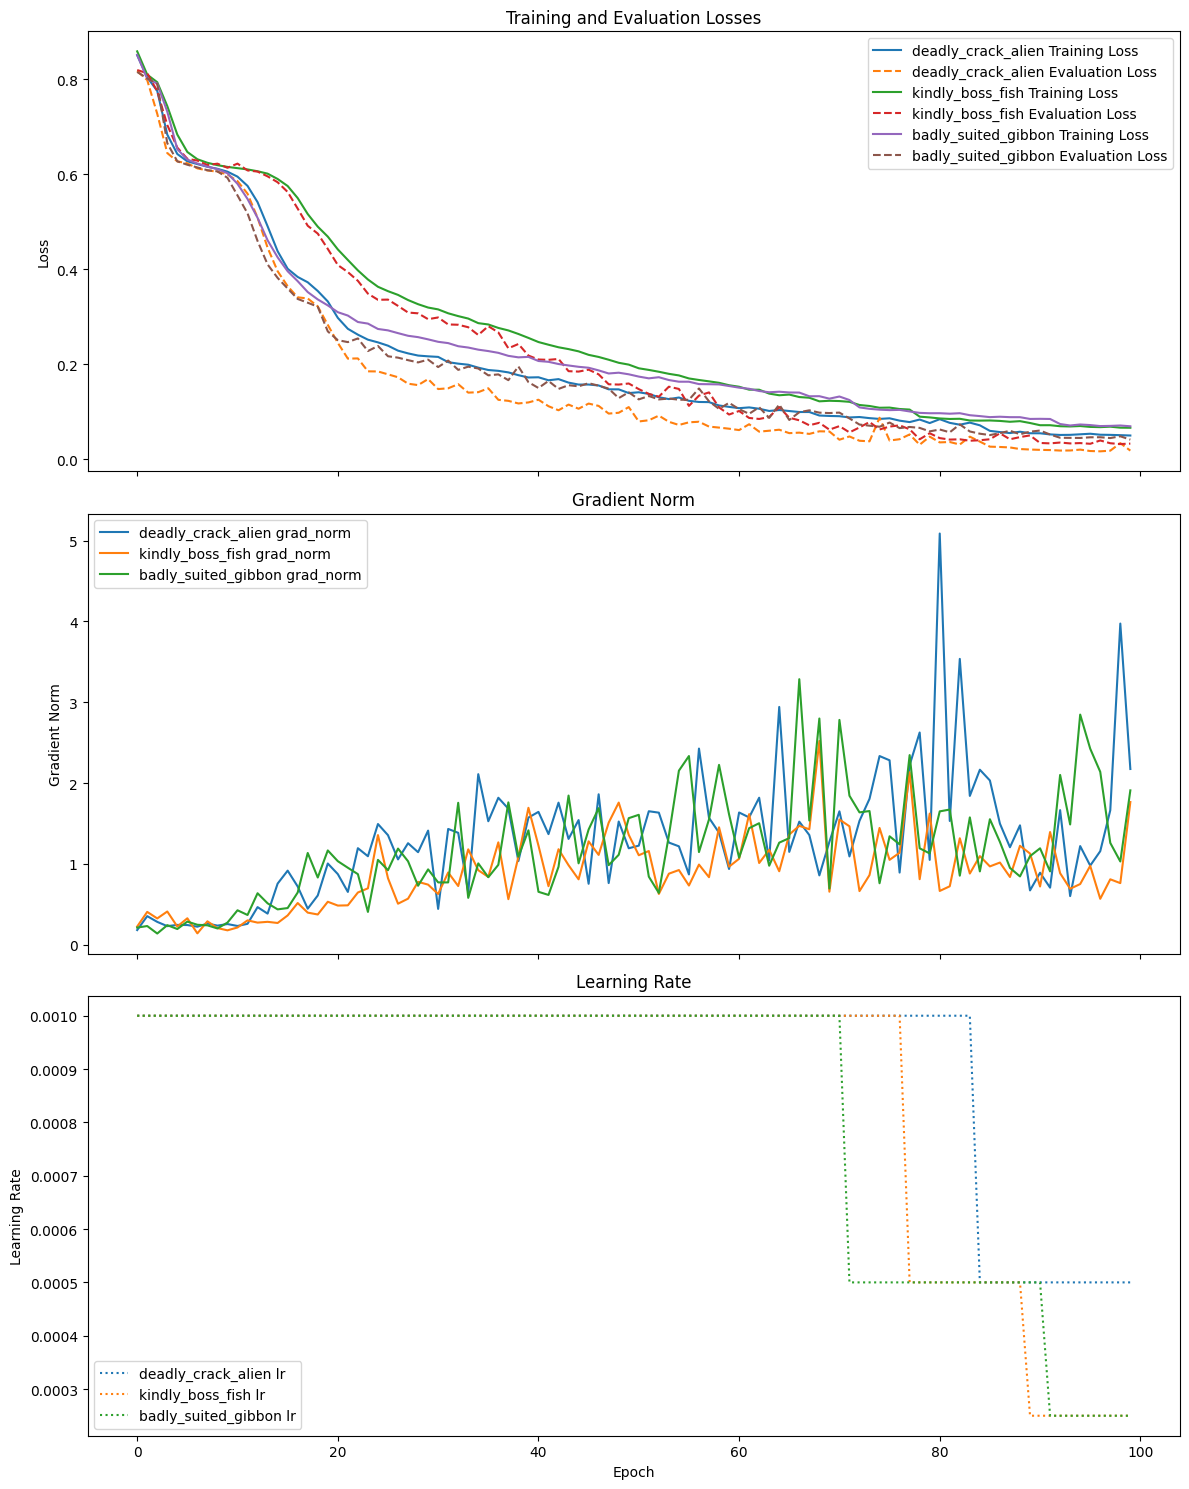

In [10]:
from arc_prize.vis import visualize_all_heads


def visualize_group(model_names: list[str]):
  epochs = {}
  get_model = modal.Function.lookup("arc-prize", "get_model")
  for name in model_names:
    checkpoint = ARCModelState(**get_model.remote(name))
    print(name, len(checkpoint.epochs), checkpoint.epochs[-1], checkpoint.model_params)
    epochs[name] = checkpoint.epochs


    # print(len(checkpoint.encoder_attn_weights))
    # for b, batch in enumerate(checkpoint.encoder_attn_weights):
    #   for i, layer in enumerate(batch):
    #     visualize_all_heads(layer, title=f"Batch {b}, layer {i}")
    

  visualize_epochs(epochs)

  


groups = [
  ['deadly_crack_alien', 'kindly_boss_fish', 'badly_suited_gibbon'],
  ['fairly_select_boa', 'deeply_trusty_vervet', 'nearly_tidy_serval']
]

for group in groups:
  visualize_group(group)

In [ ]:
from arc_prize.train import visualize_all_heads


model_name = "lovely_upward_monkey"
model_filename = f"models/{model_name}.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoint = ARCModelState(**torch.load(model_filename, map_location=device))


for b, batch in enumerate(checkpoint.encoder_attn_weights):
    for i, layer in enumerate(batch):
        visualize_all_heads(layer, title=f"Batch {b}, layer {i}")

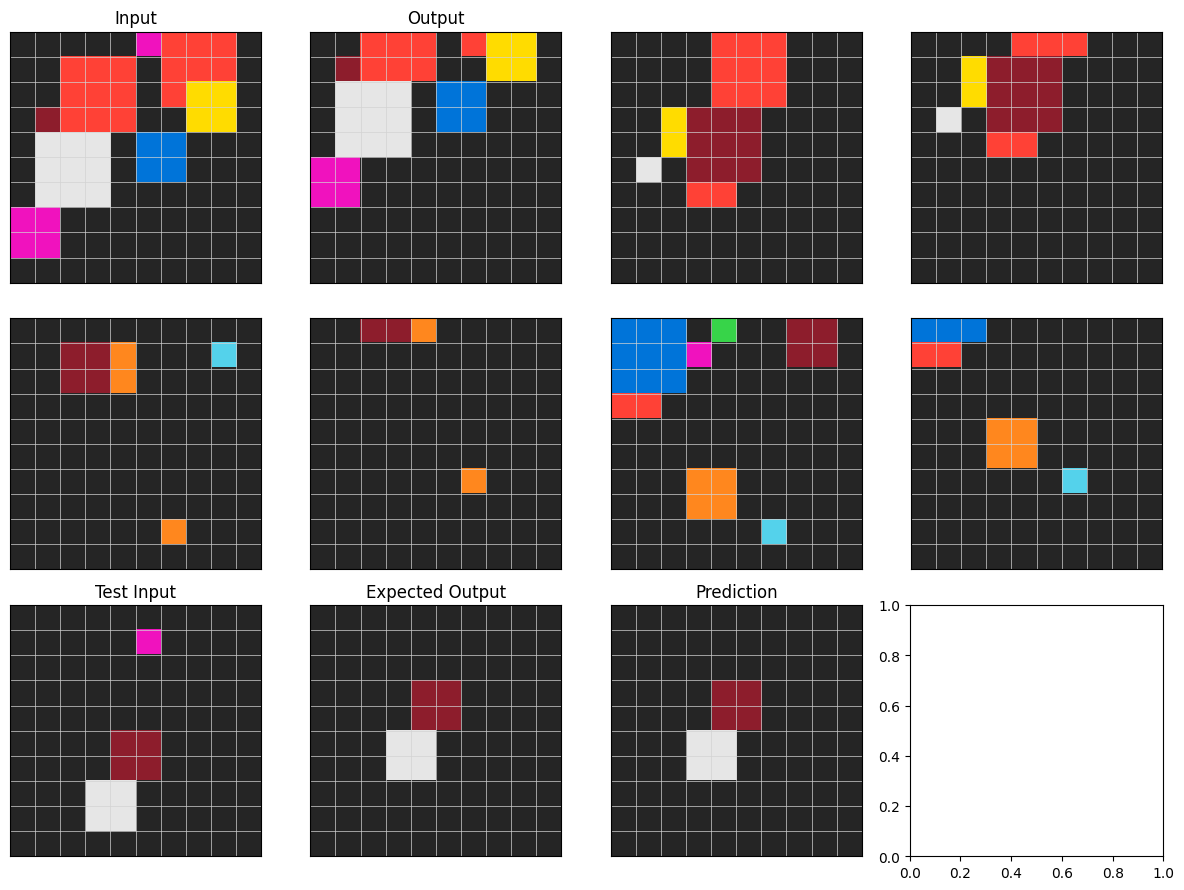

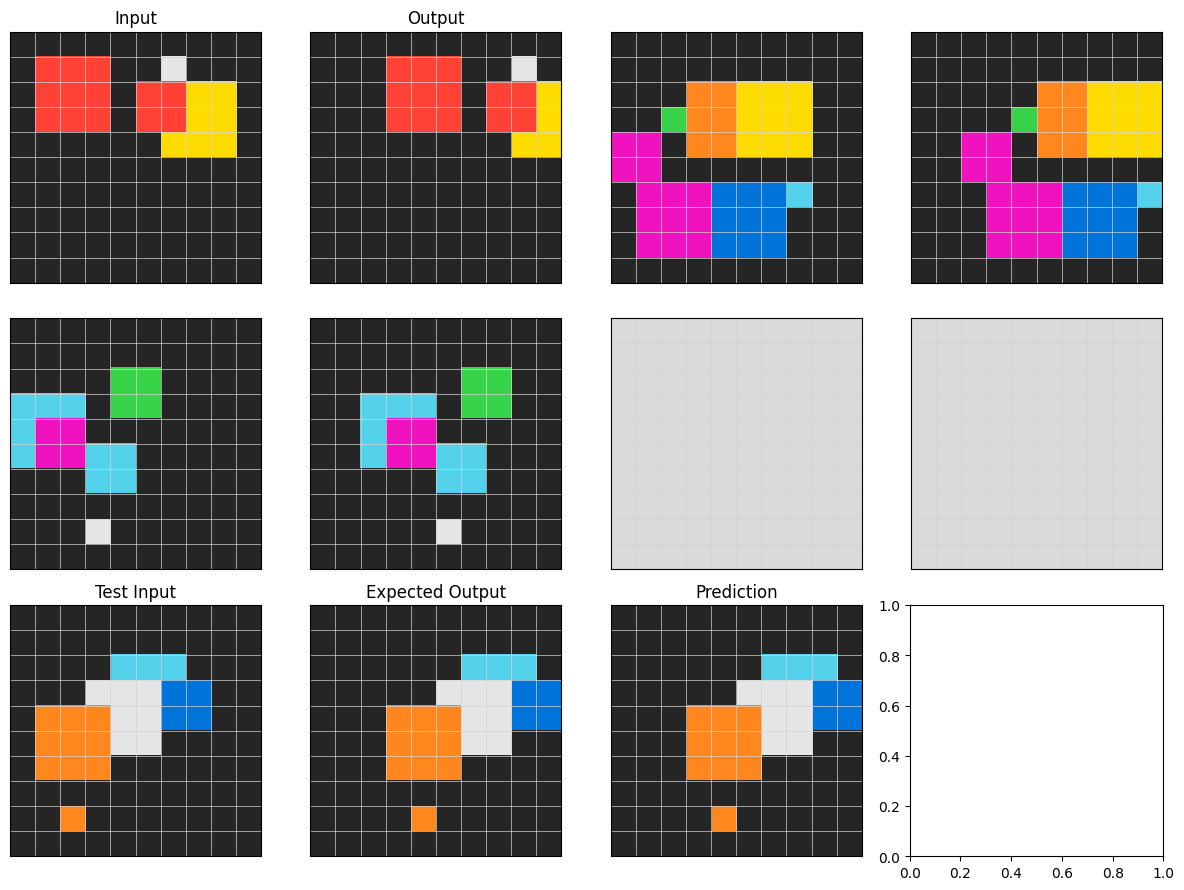

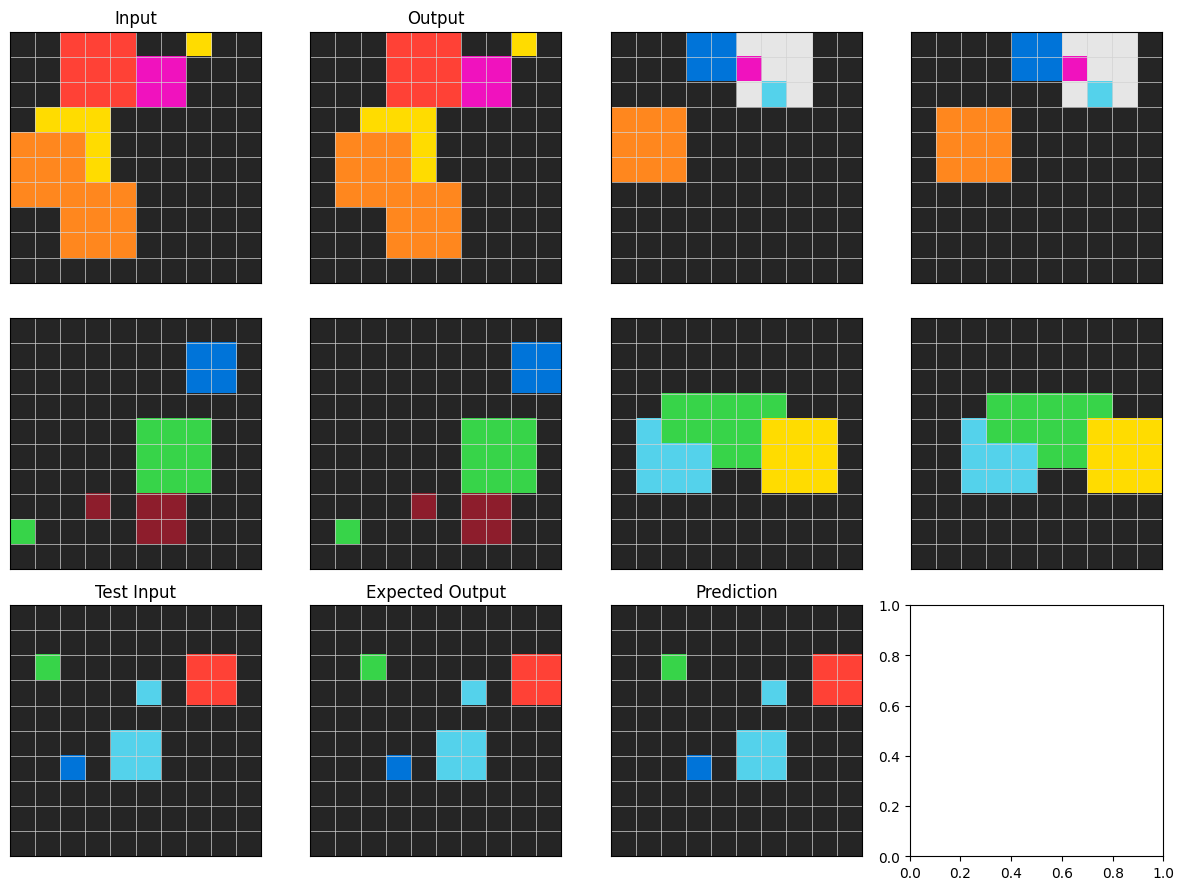

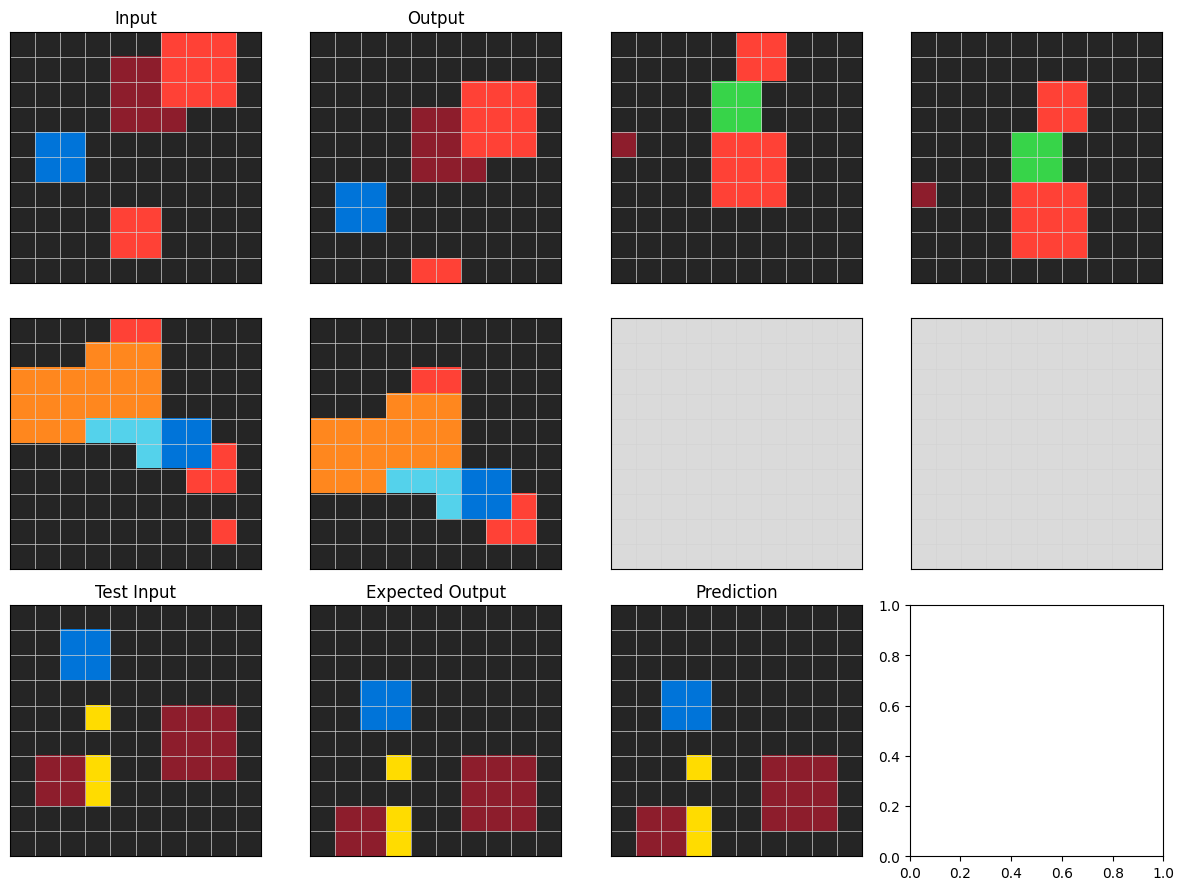

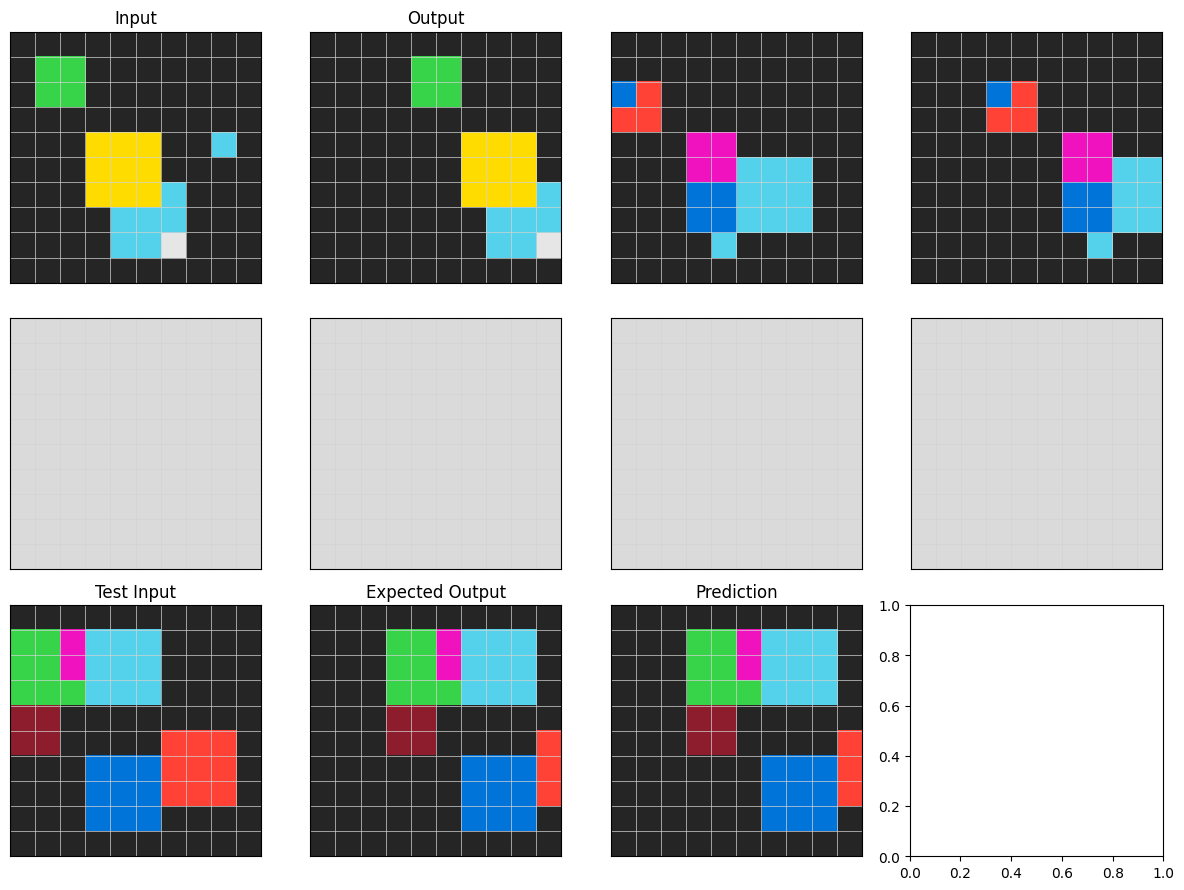

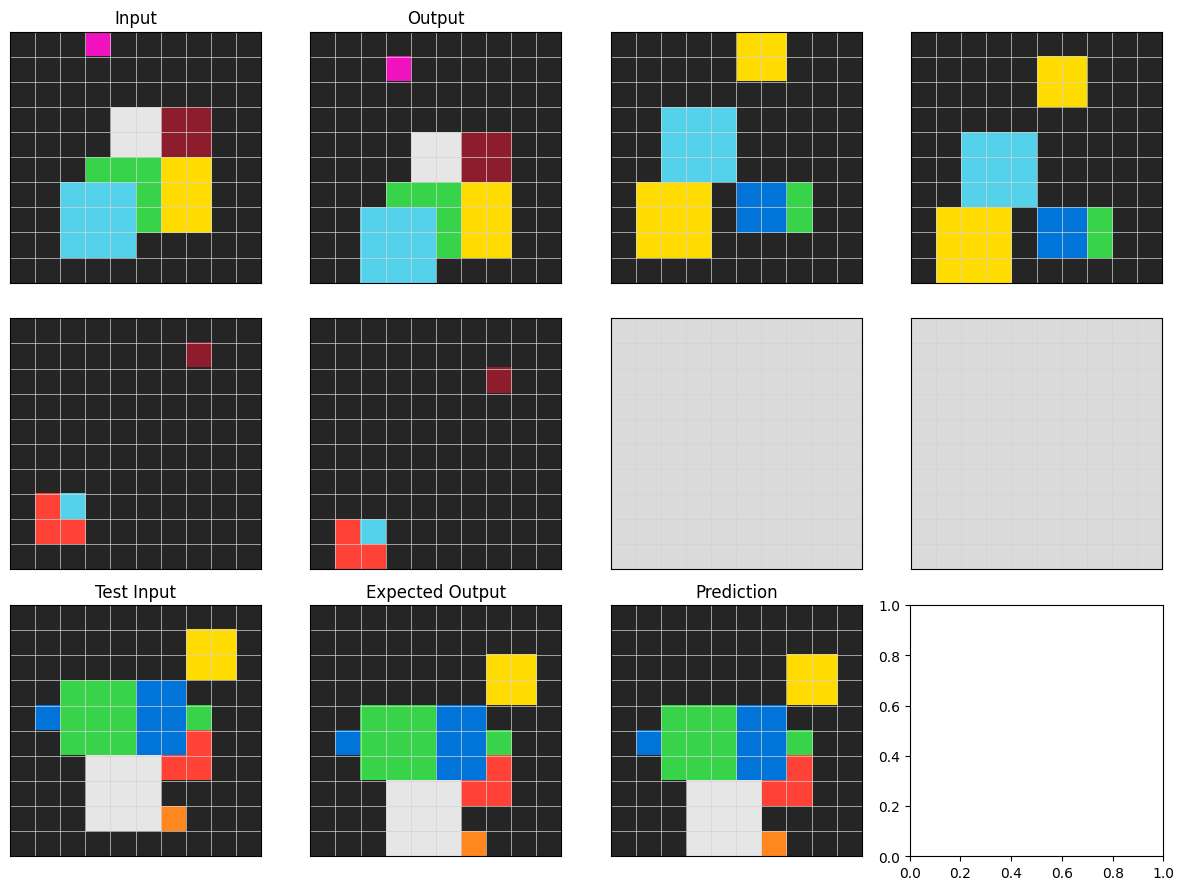

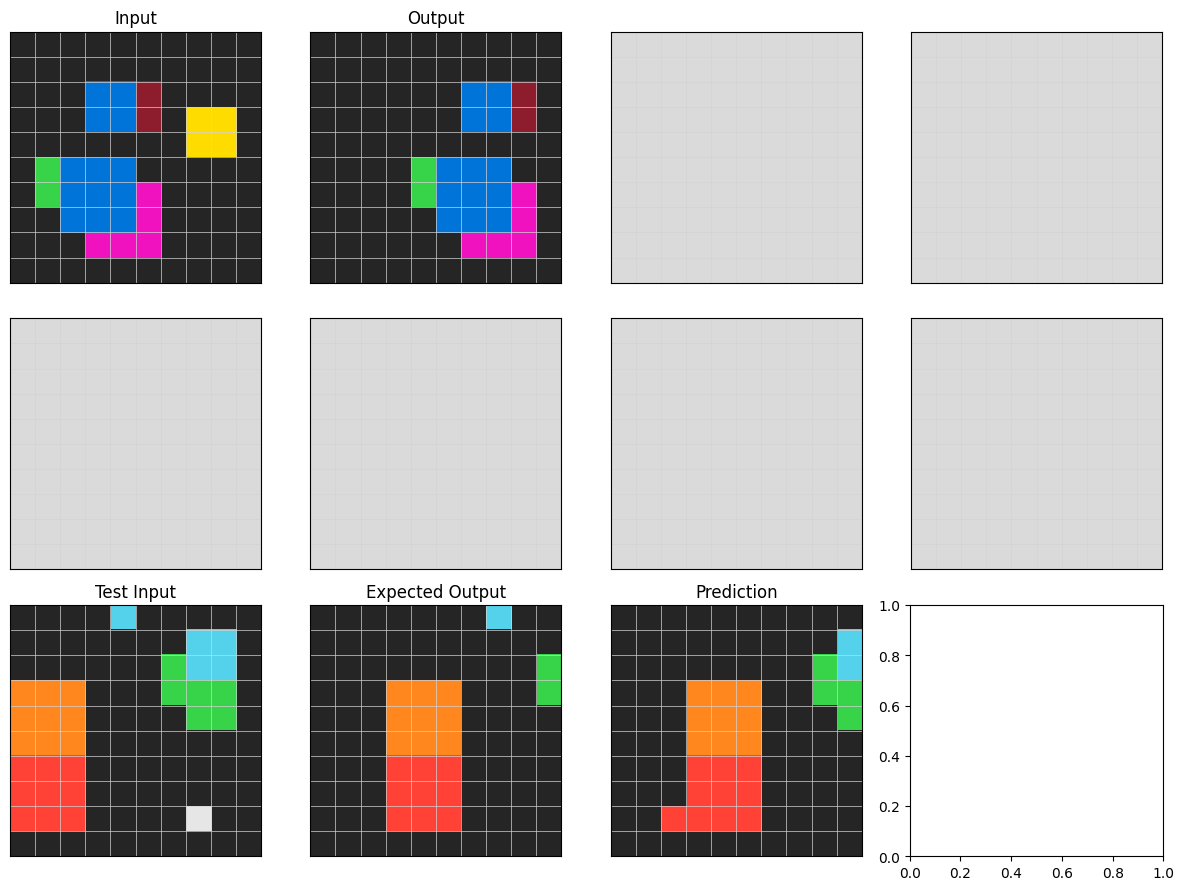

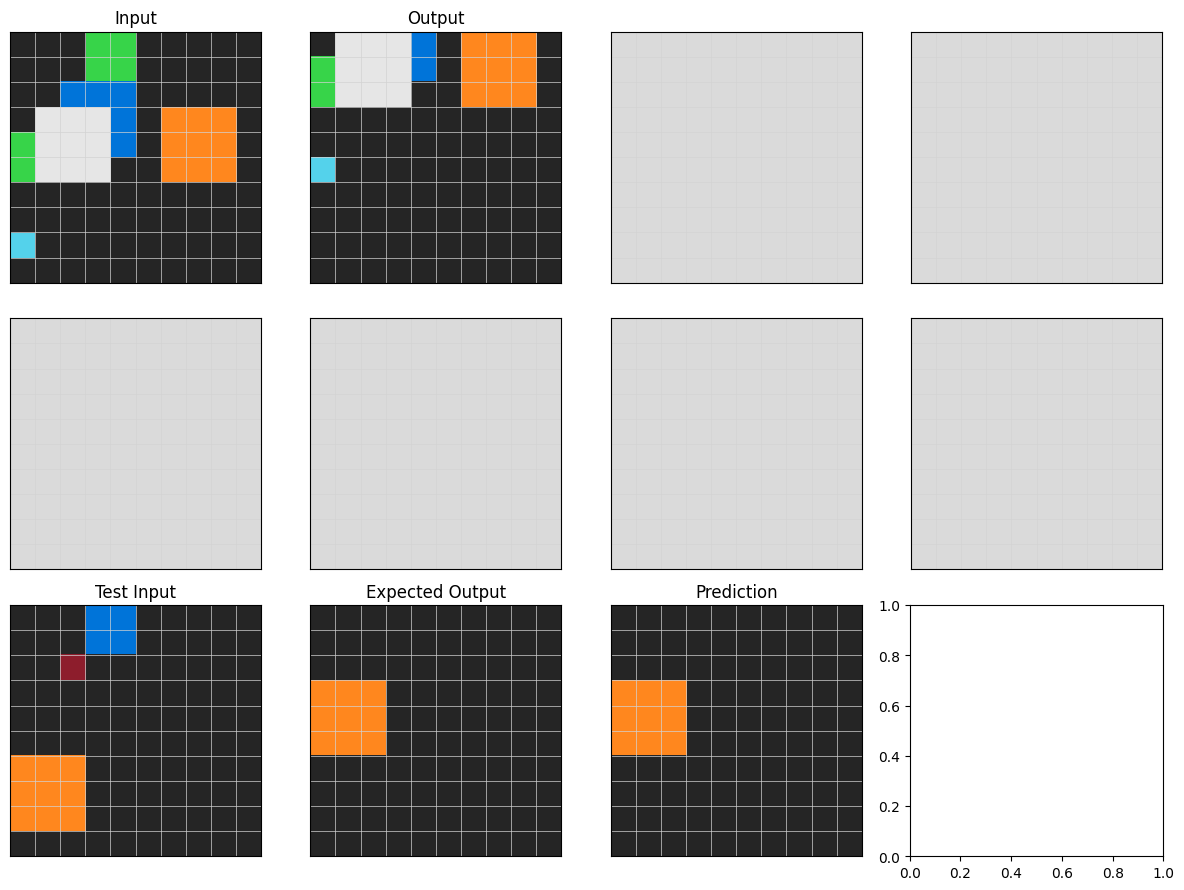

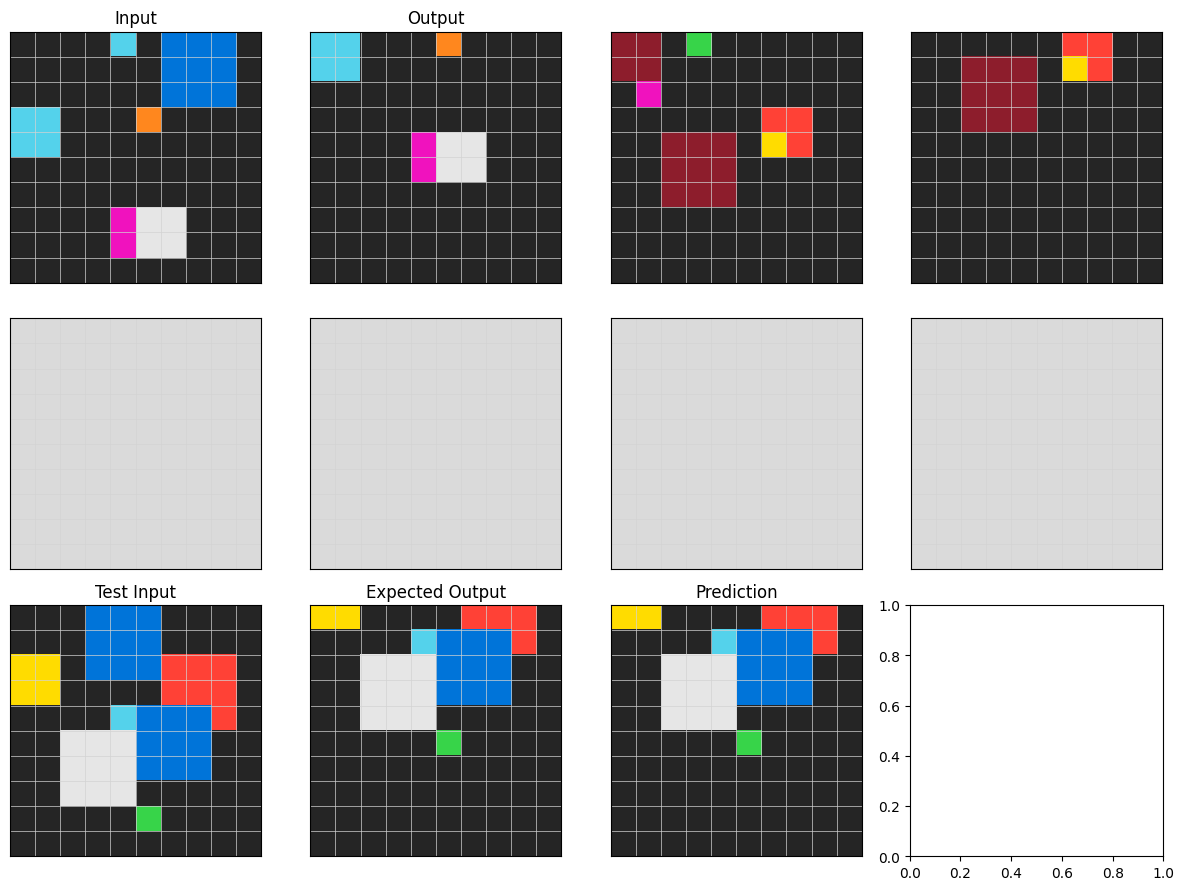

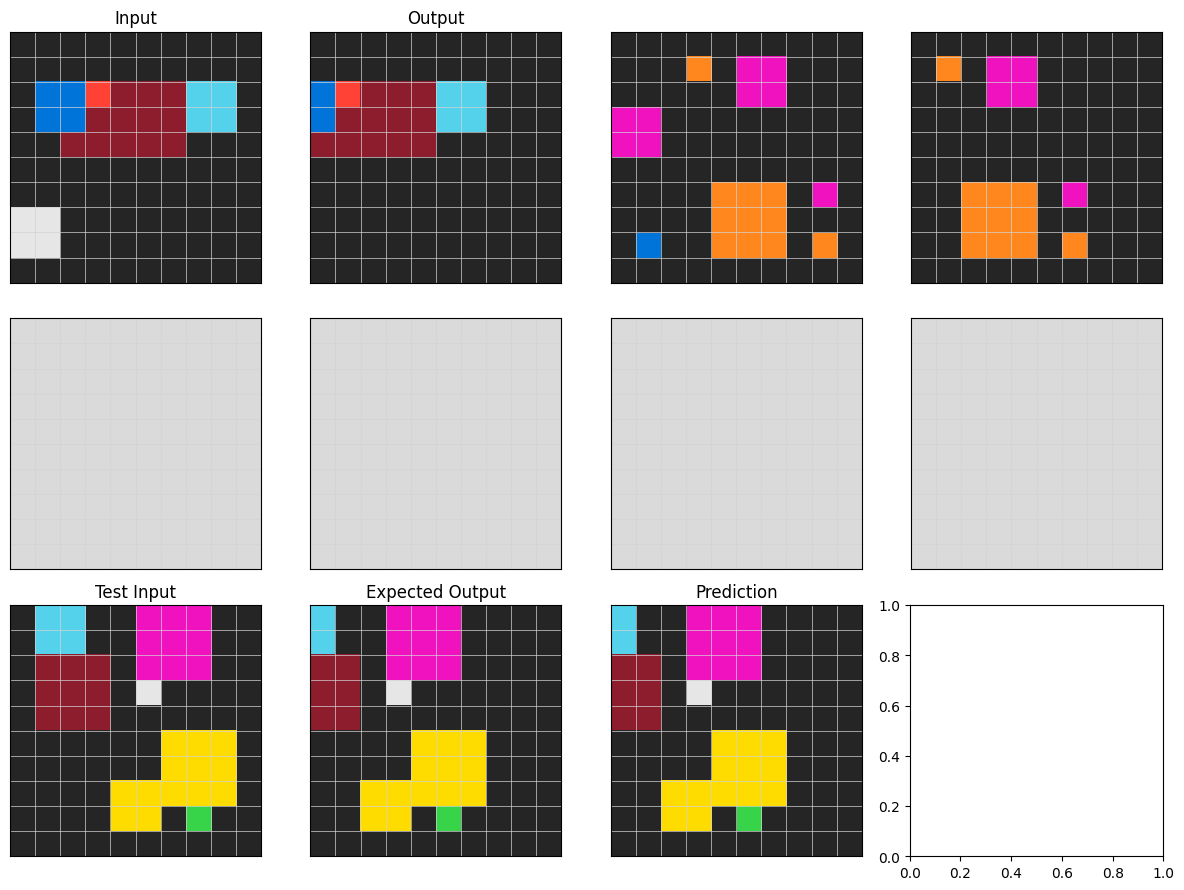

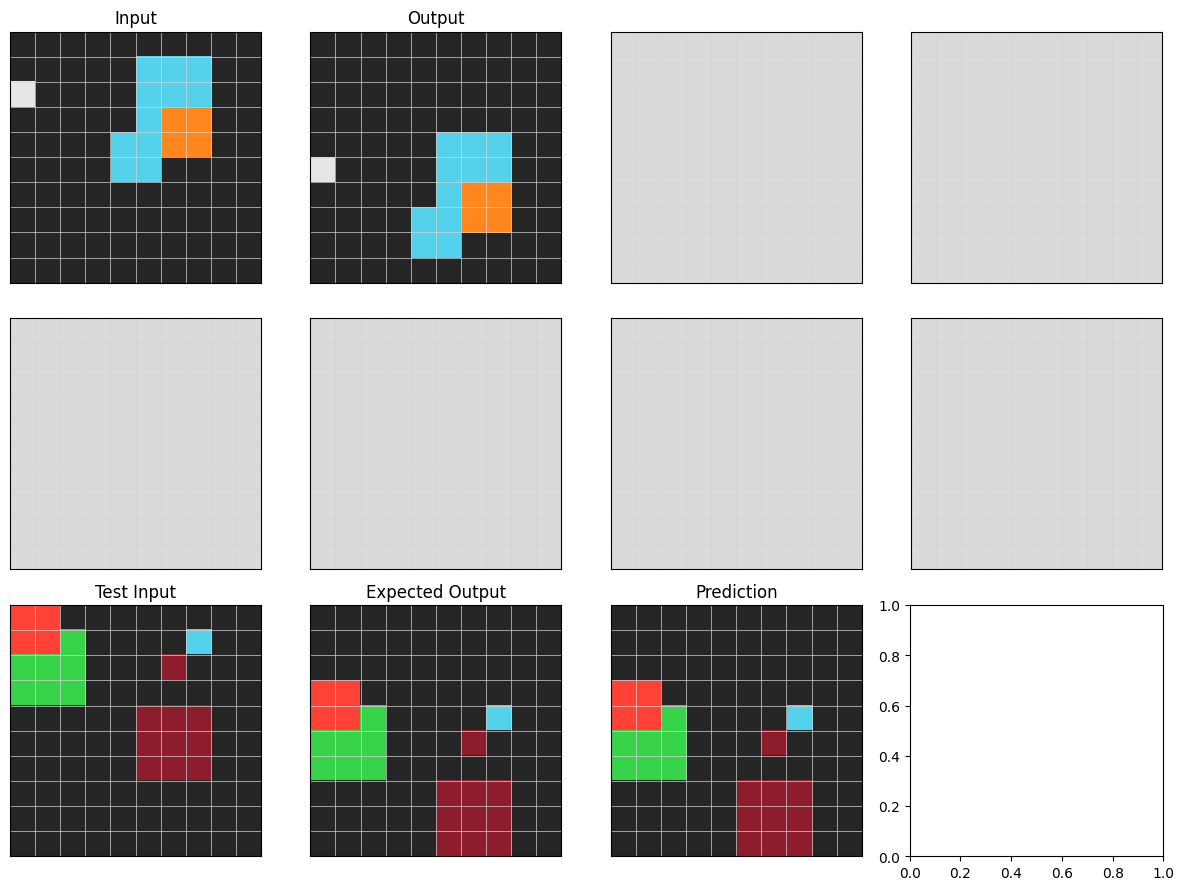

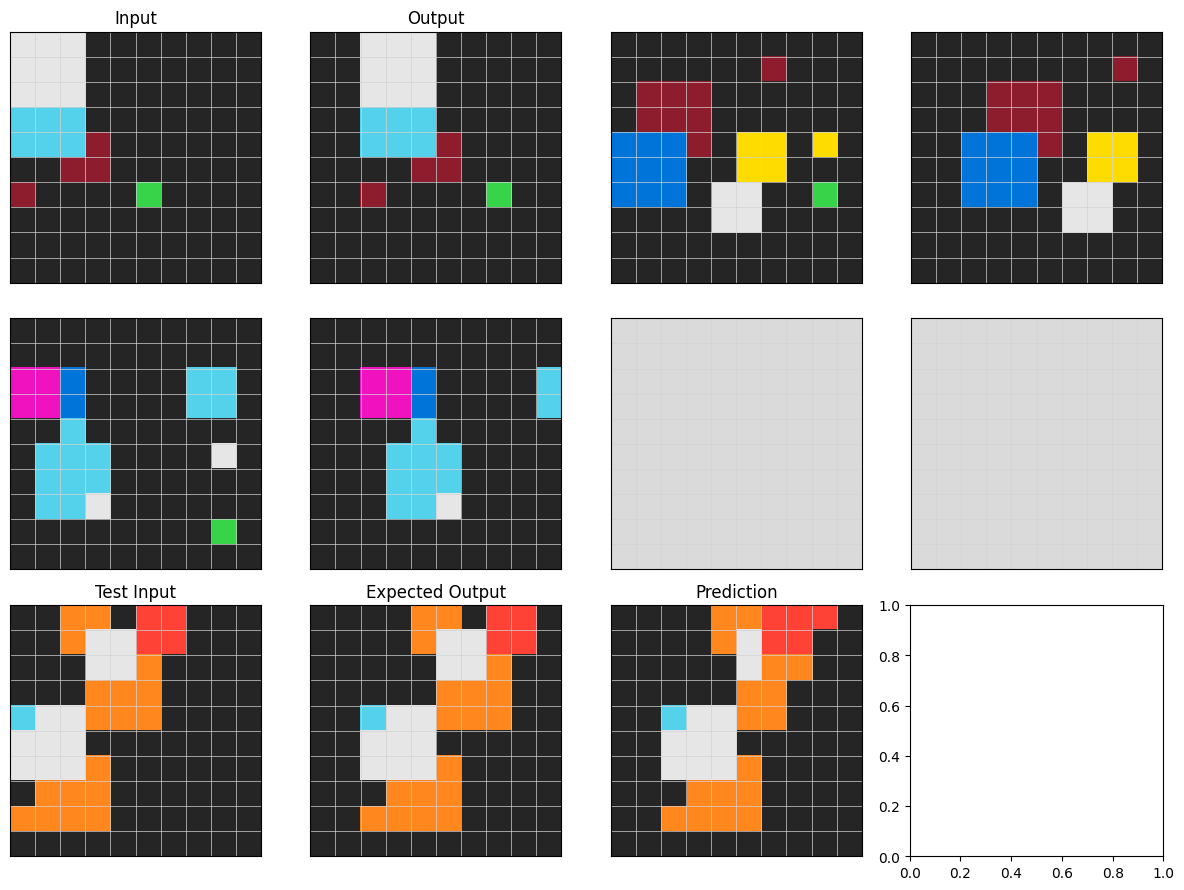

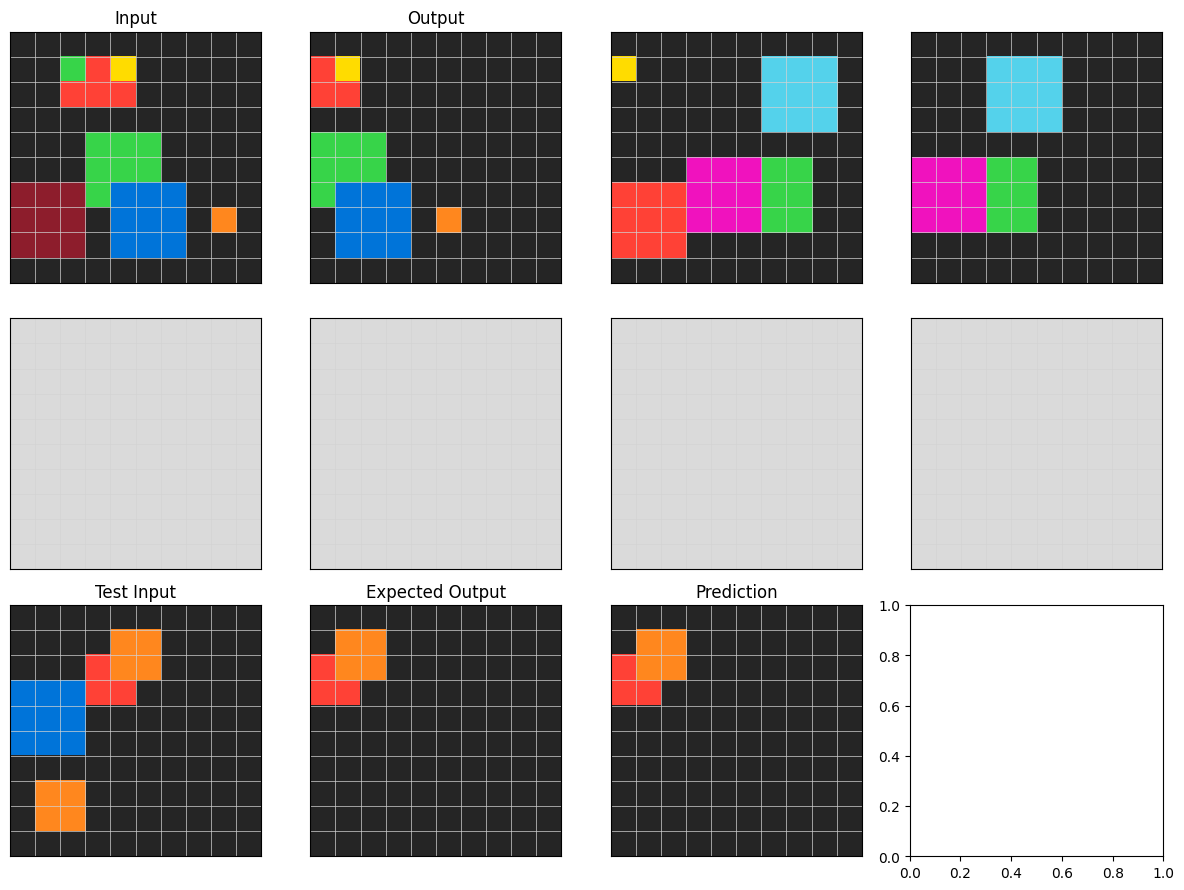

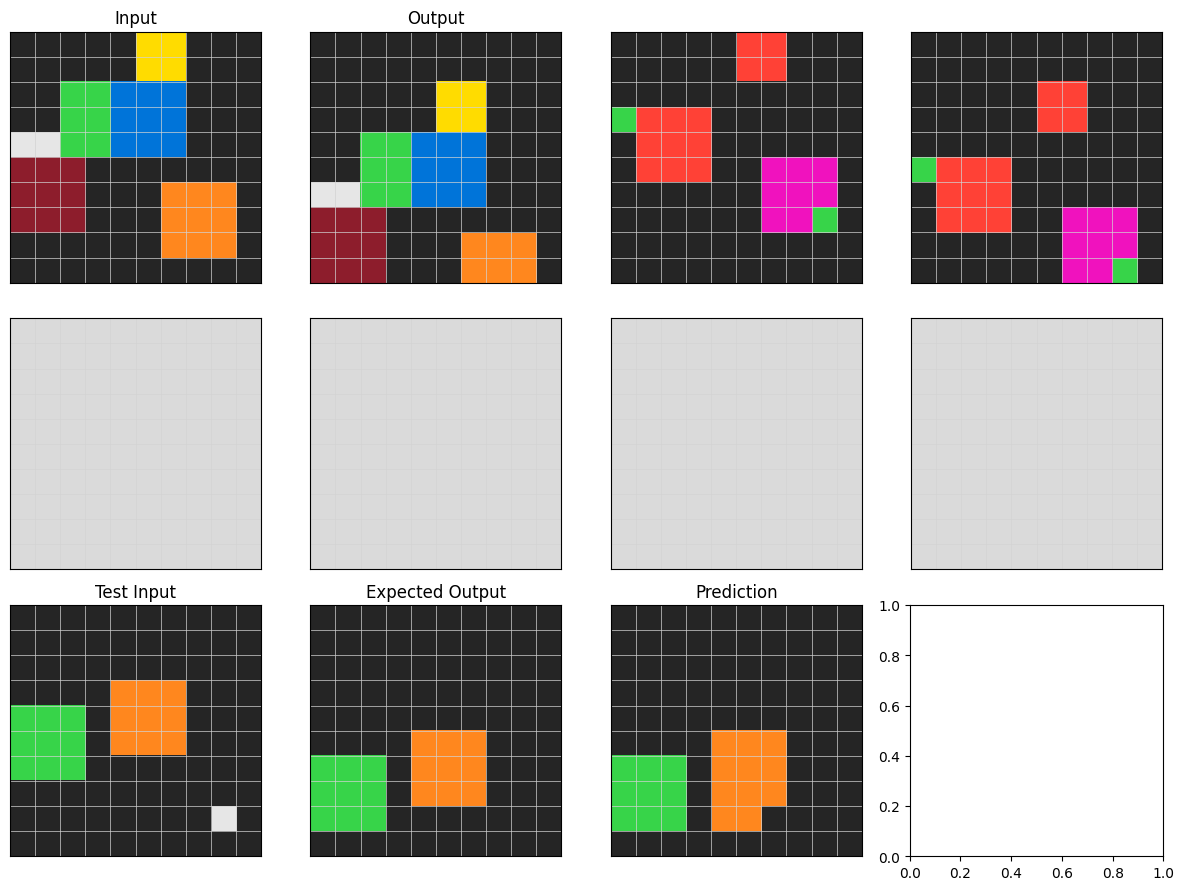

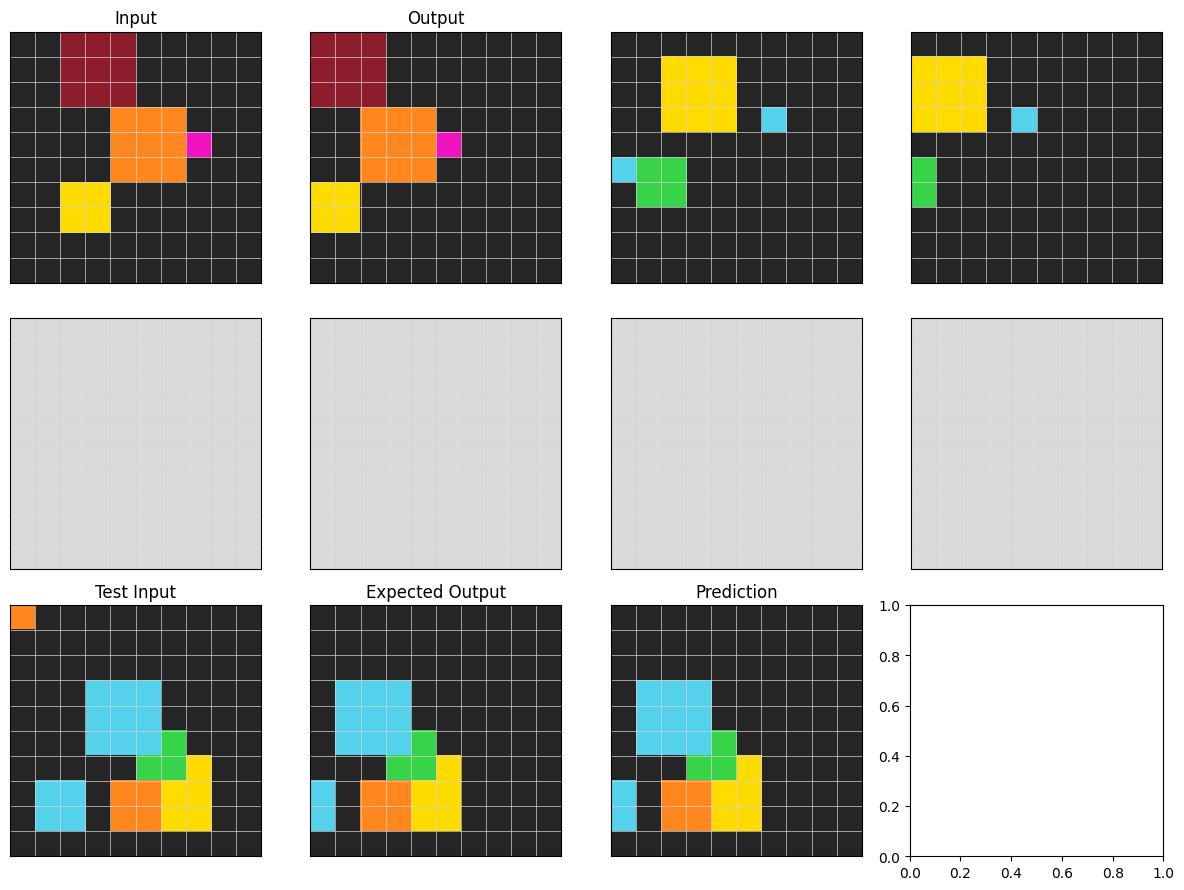

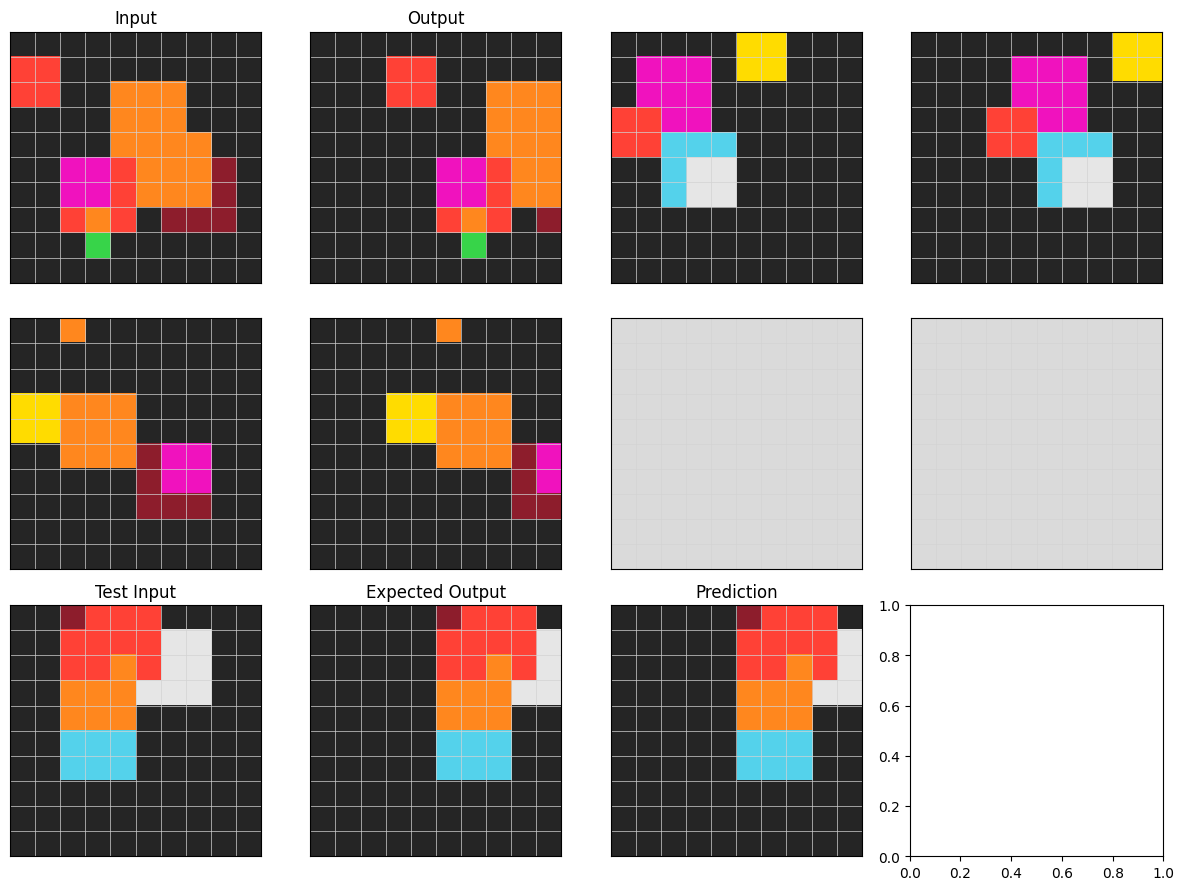

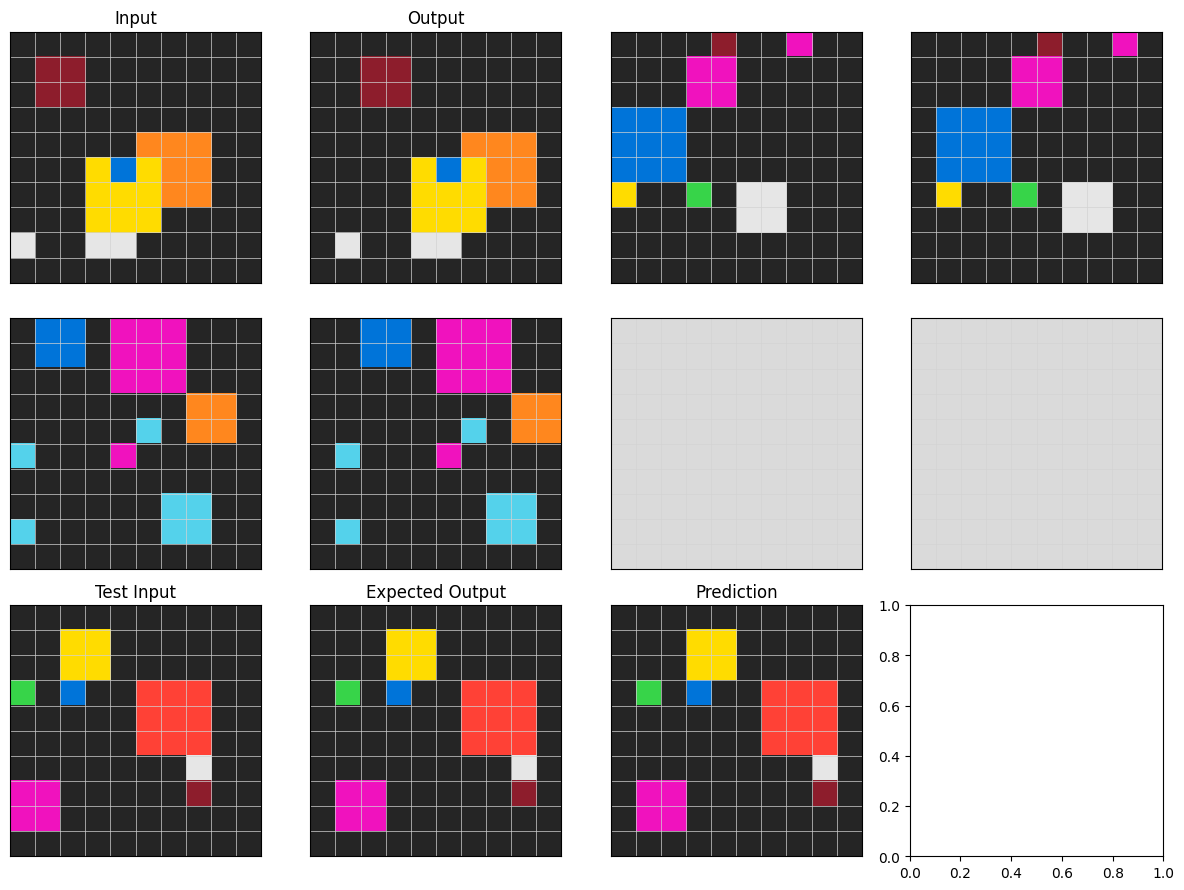

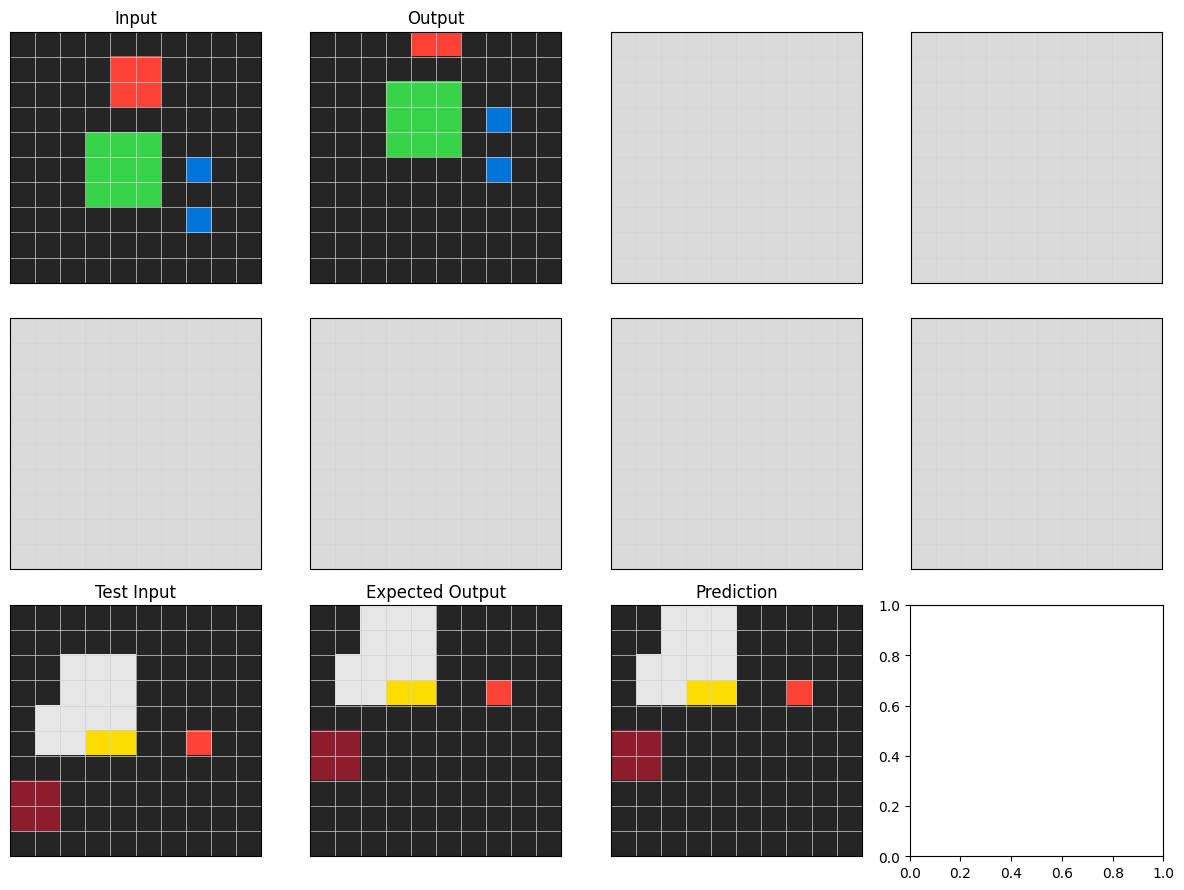

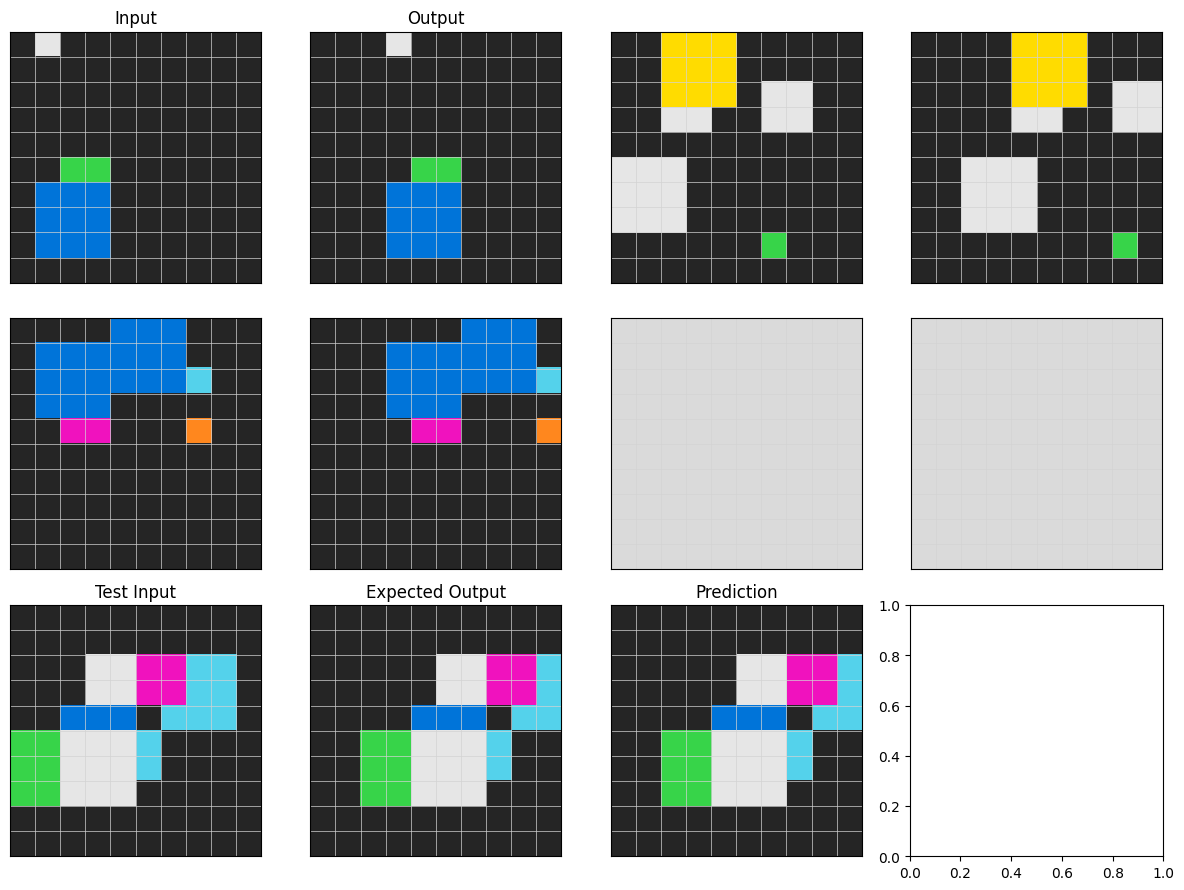

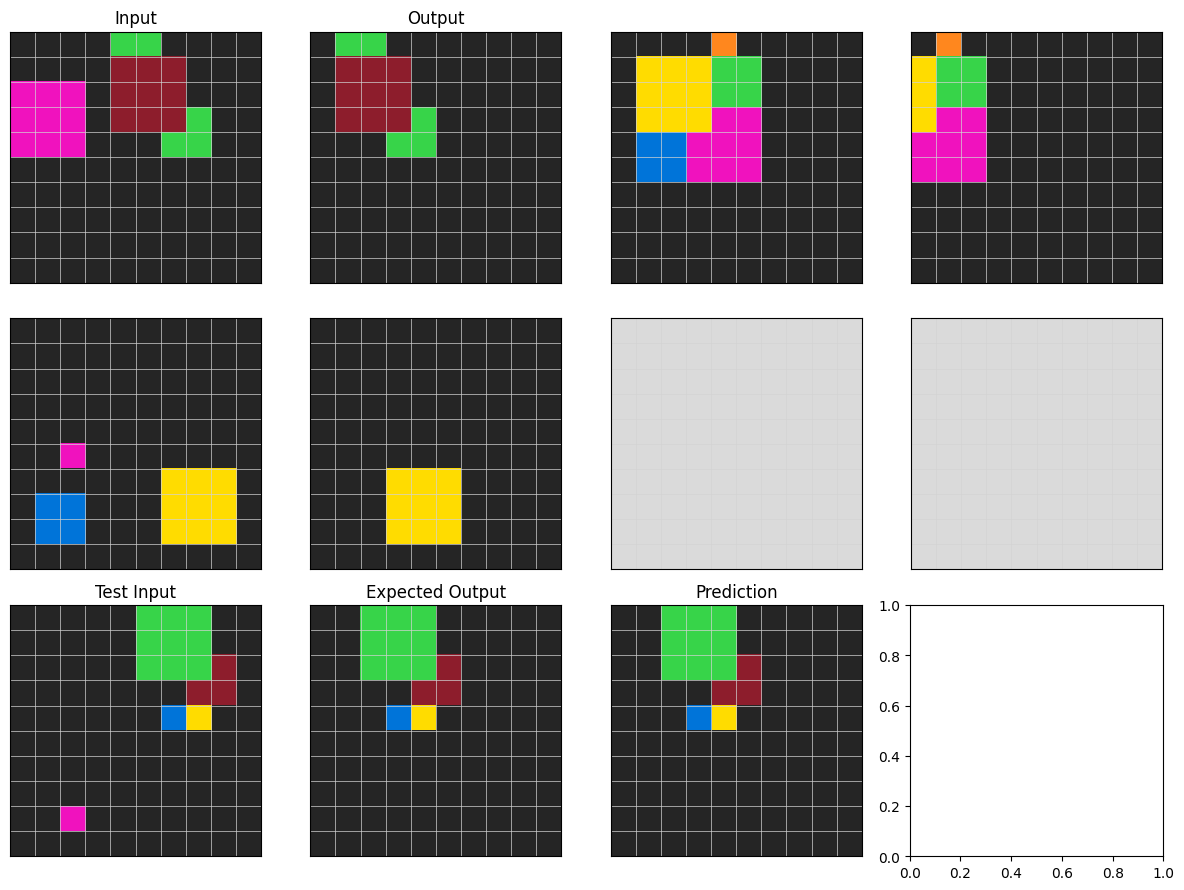

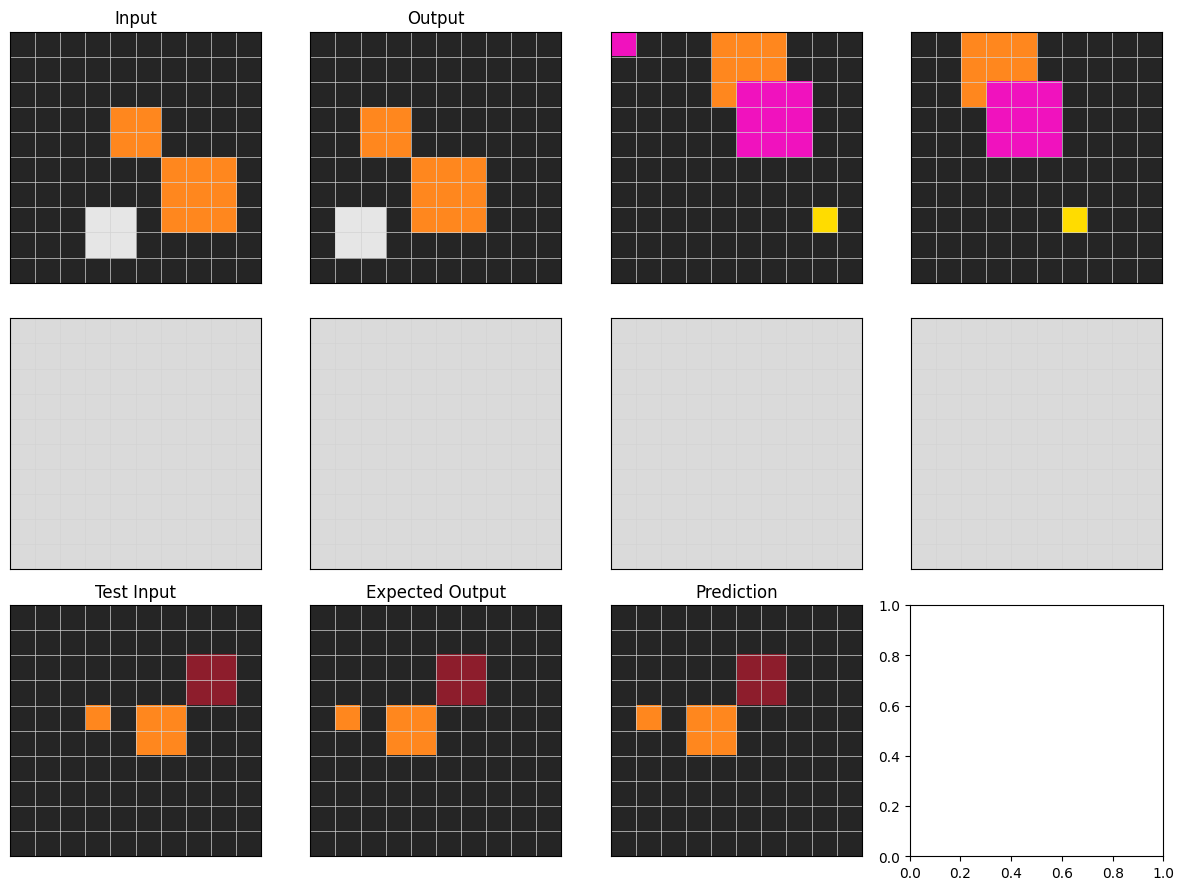

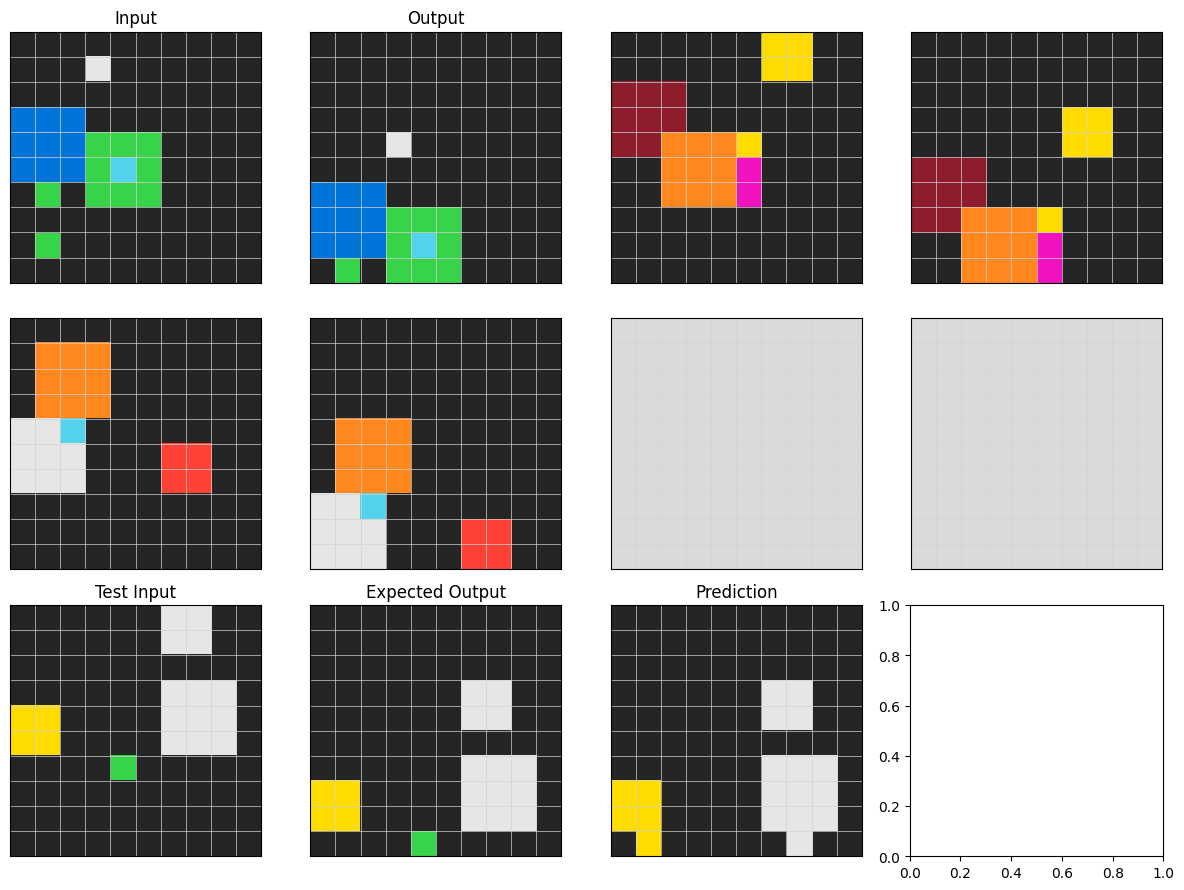

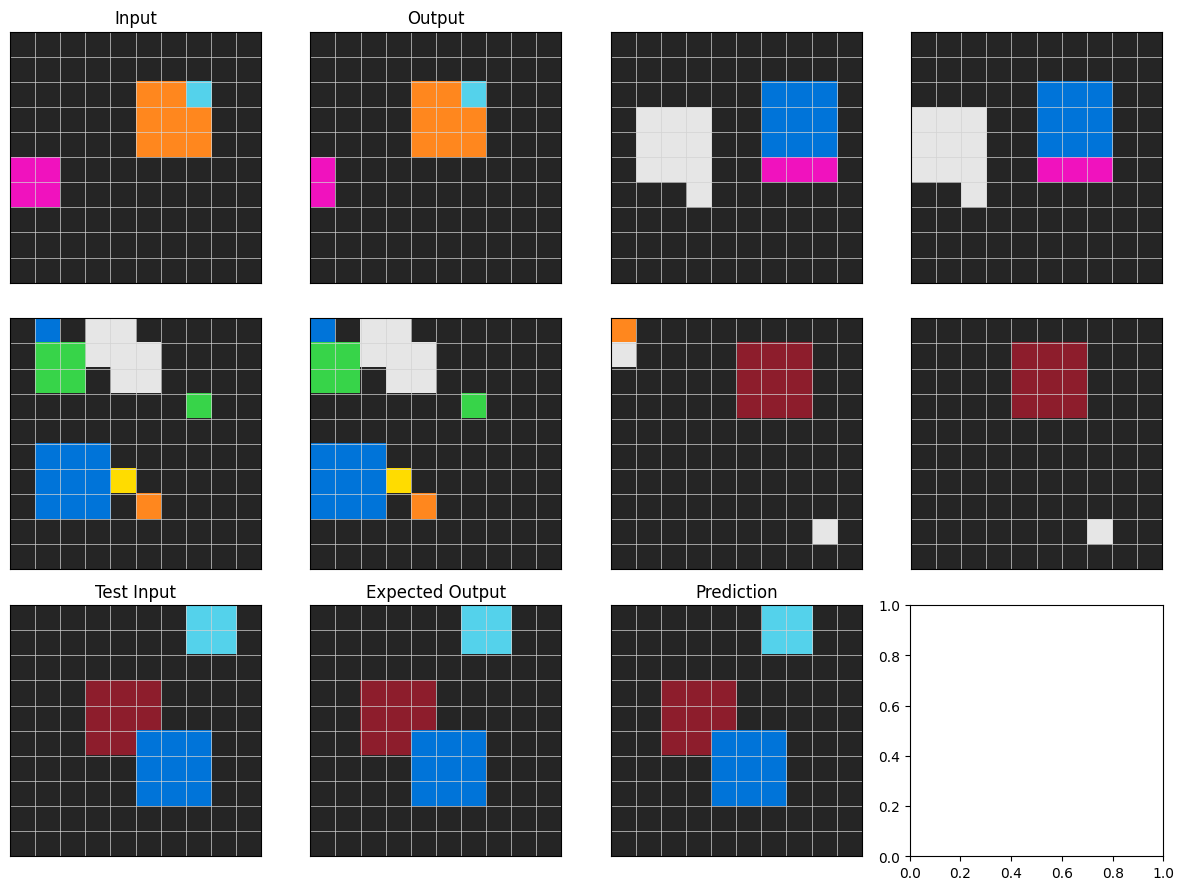

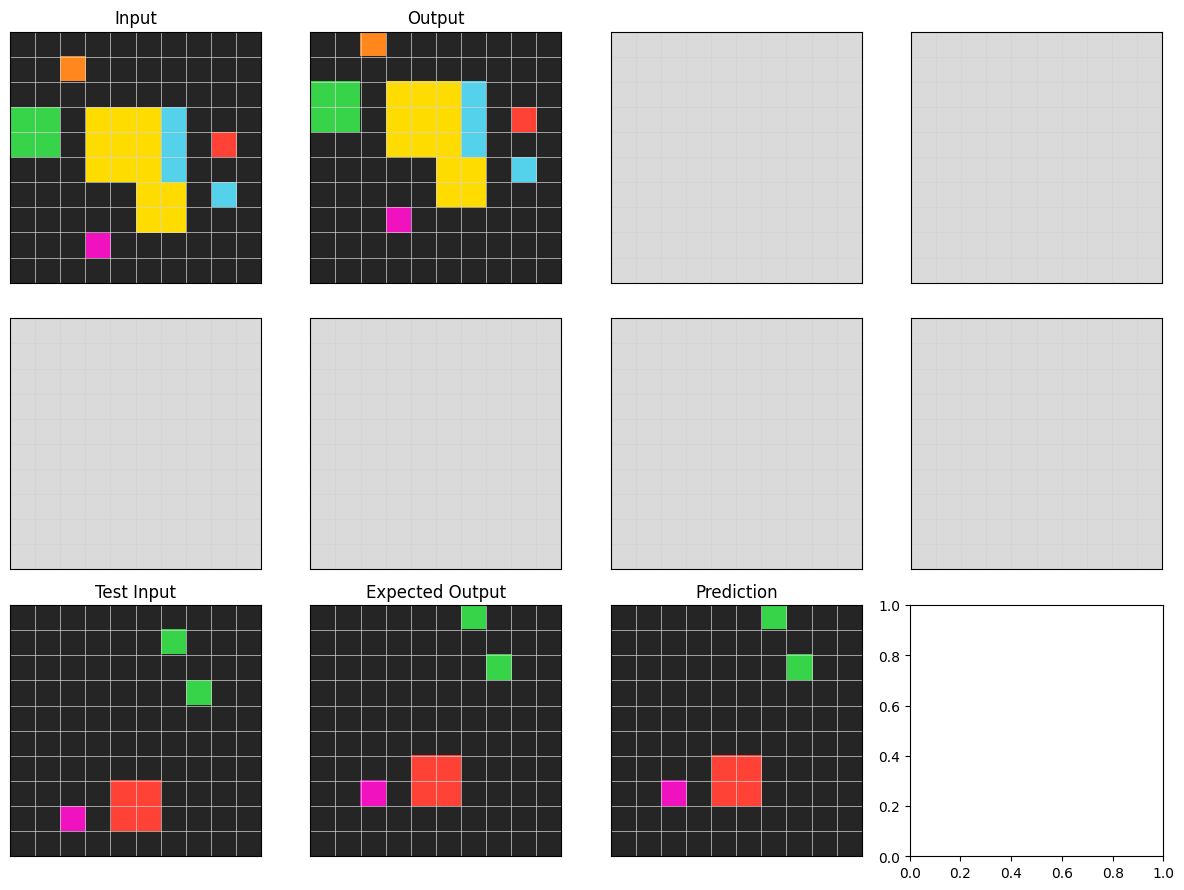

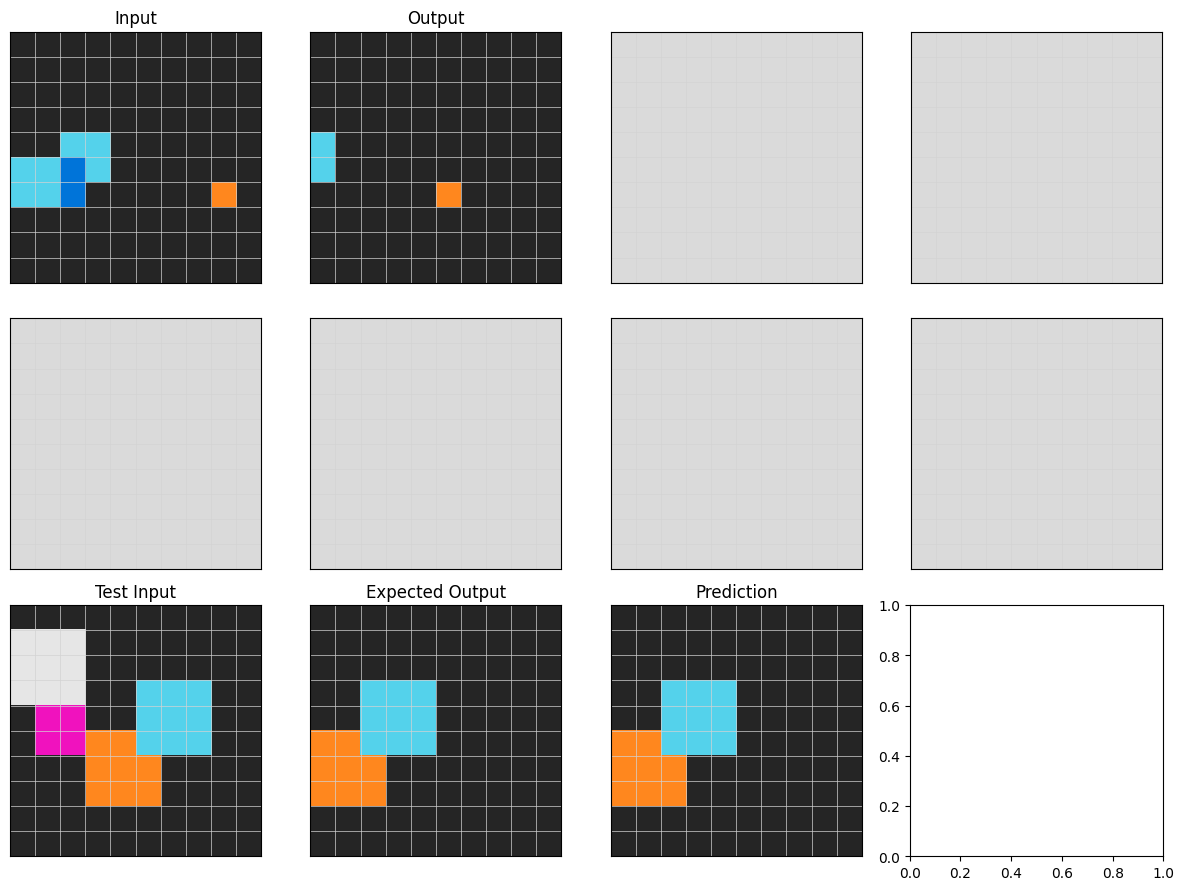

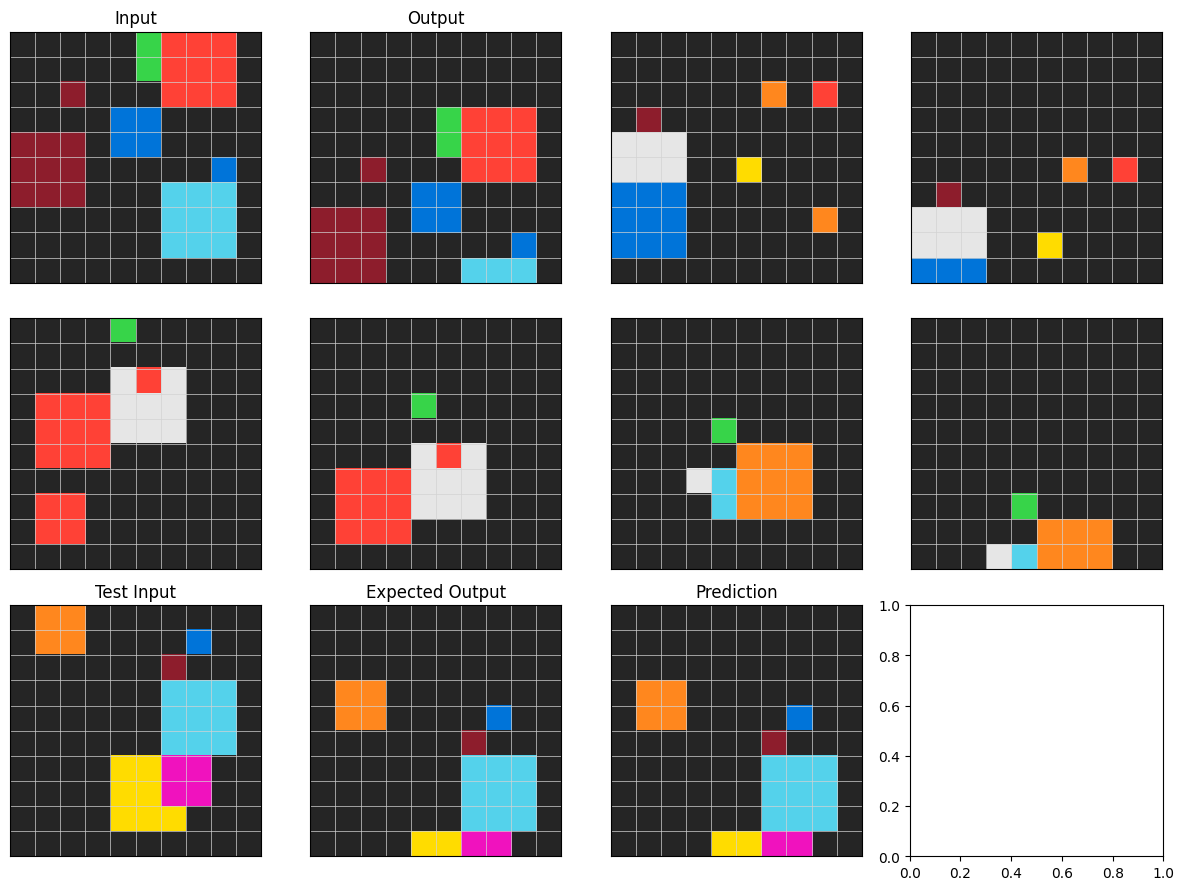

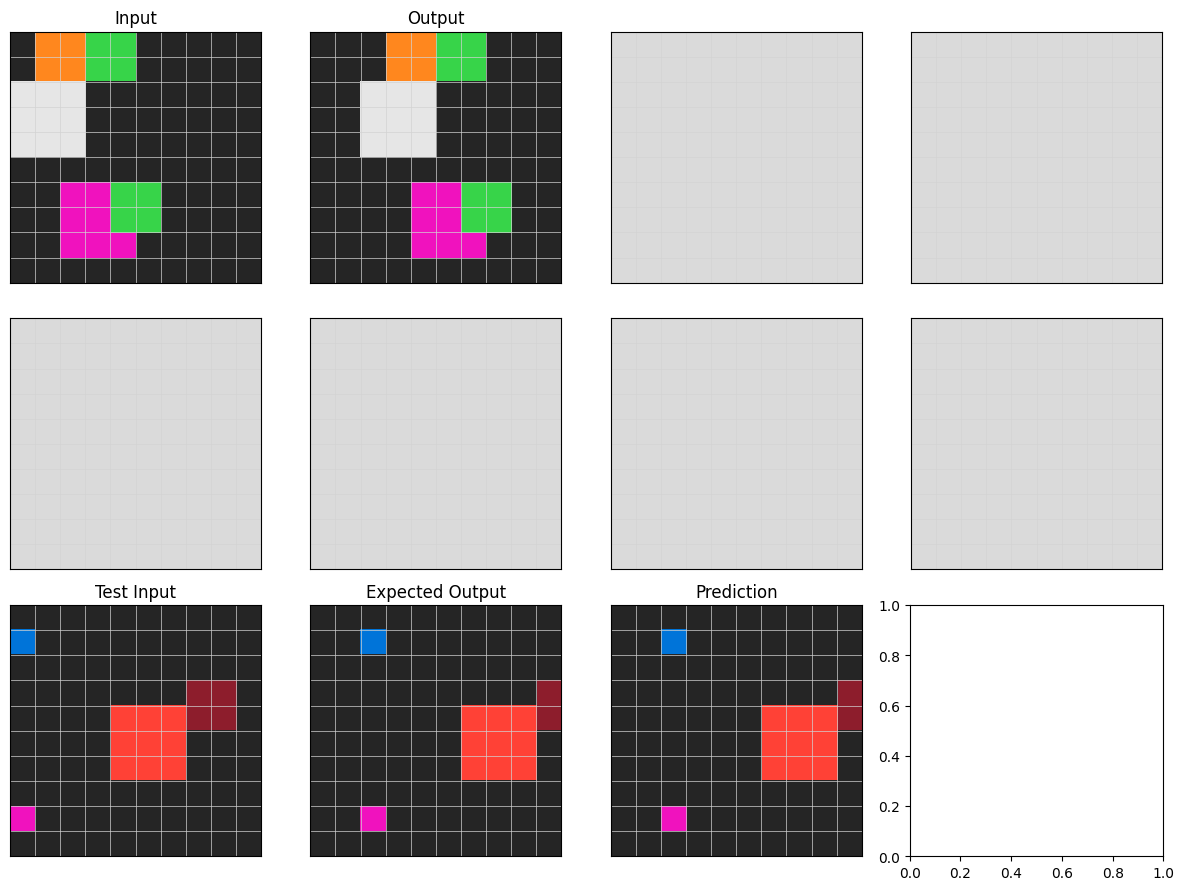

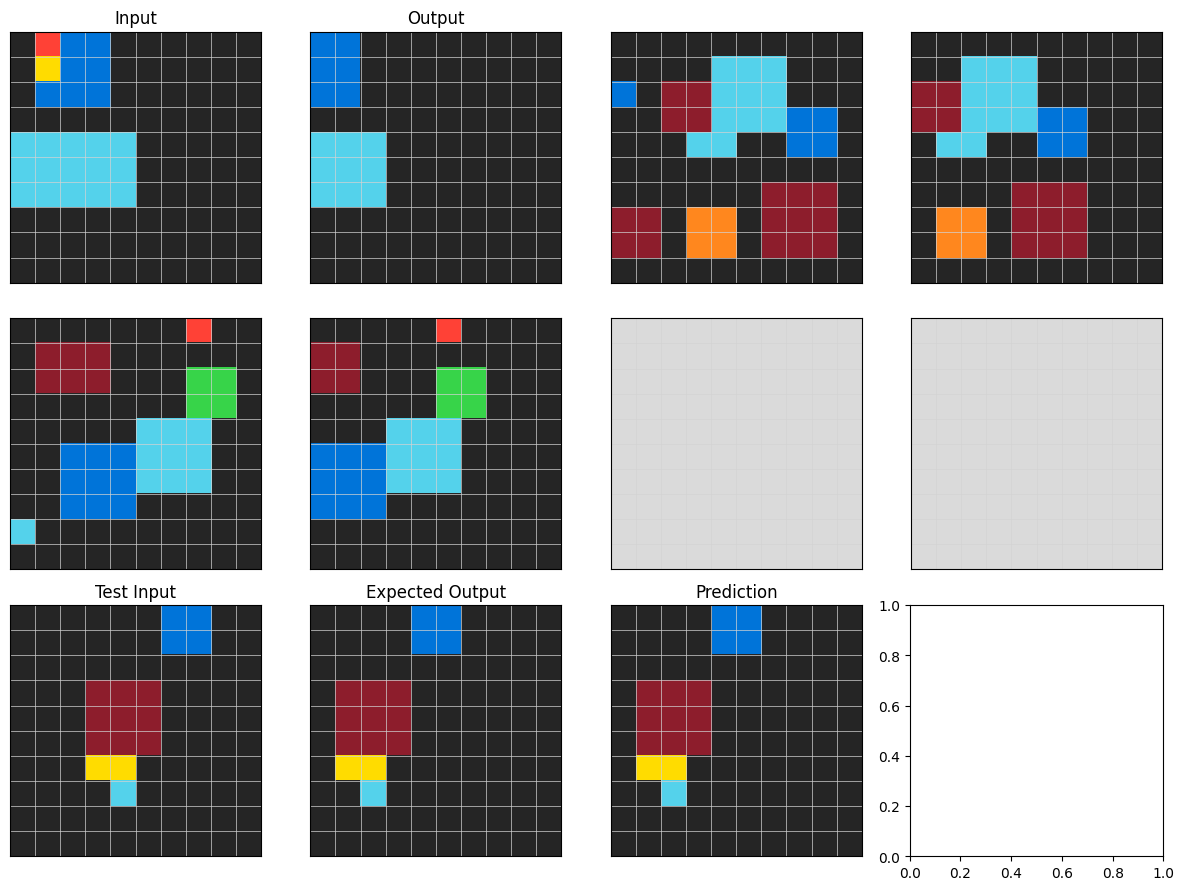

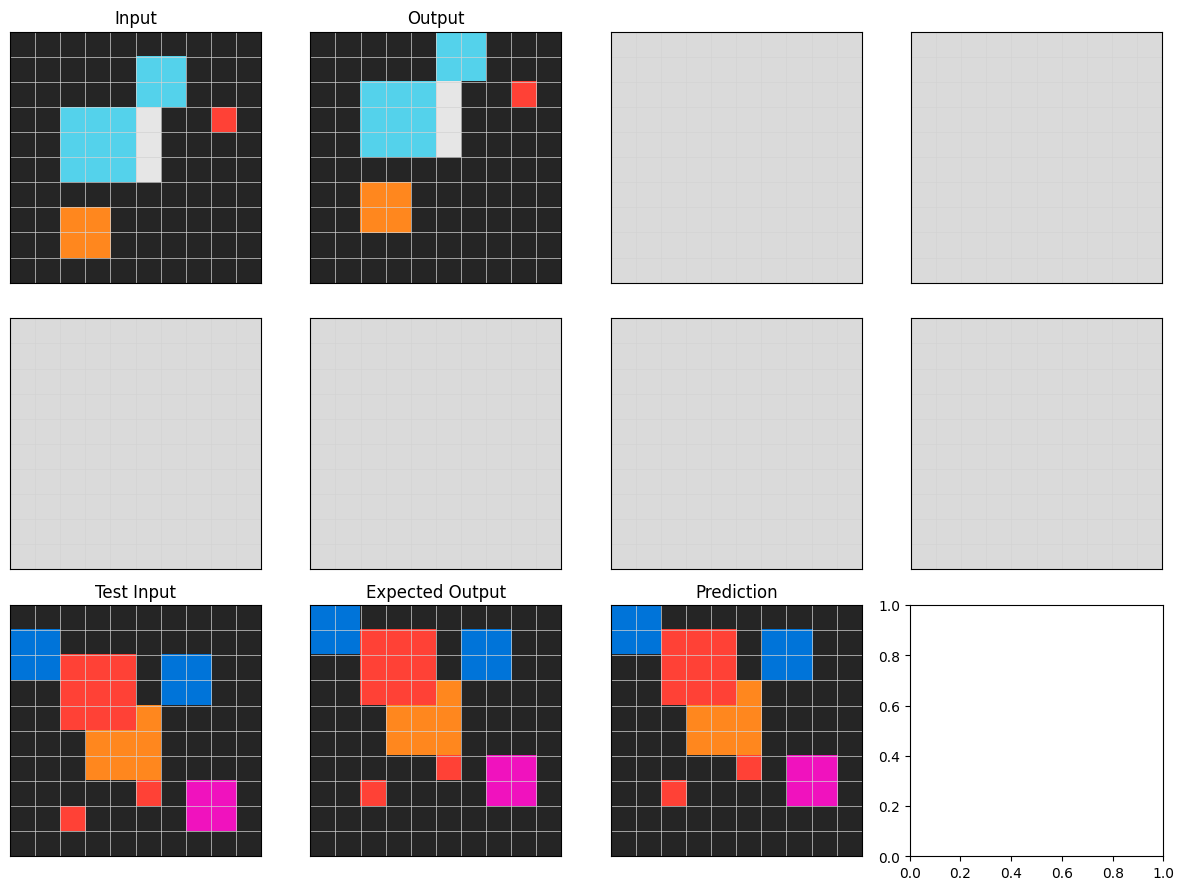

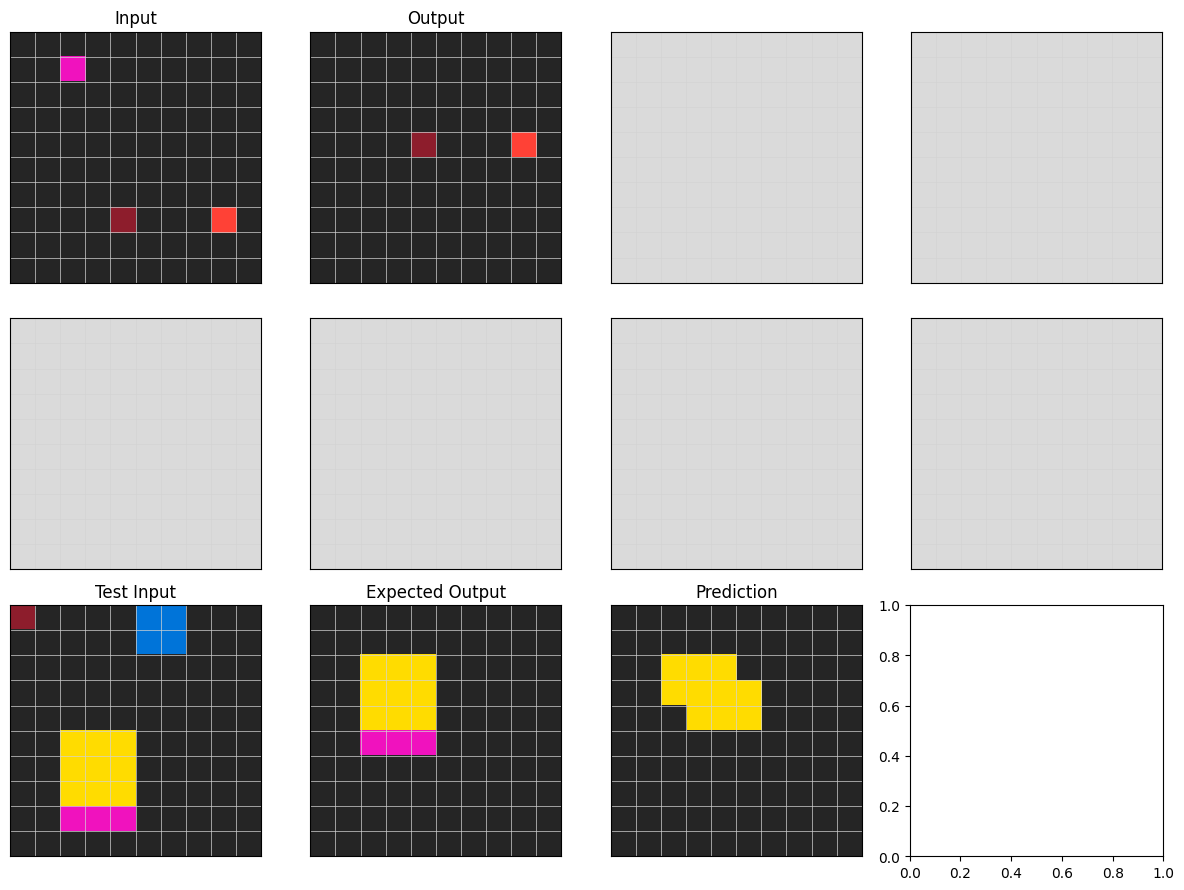

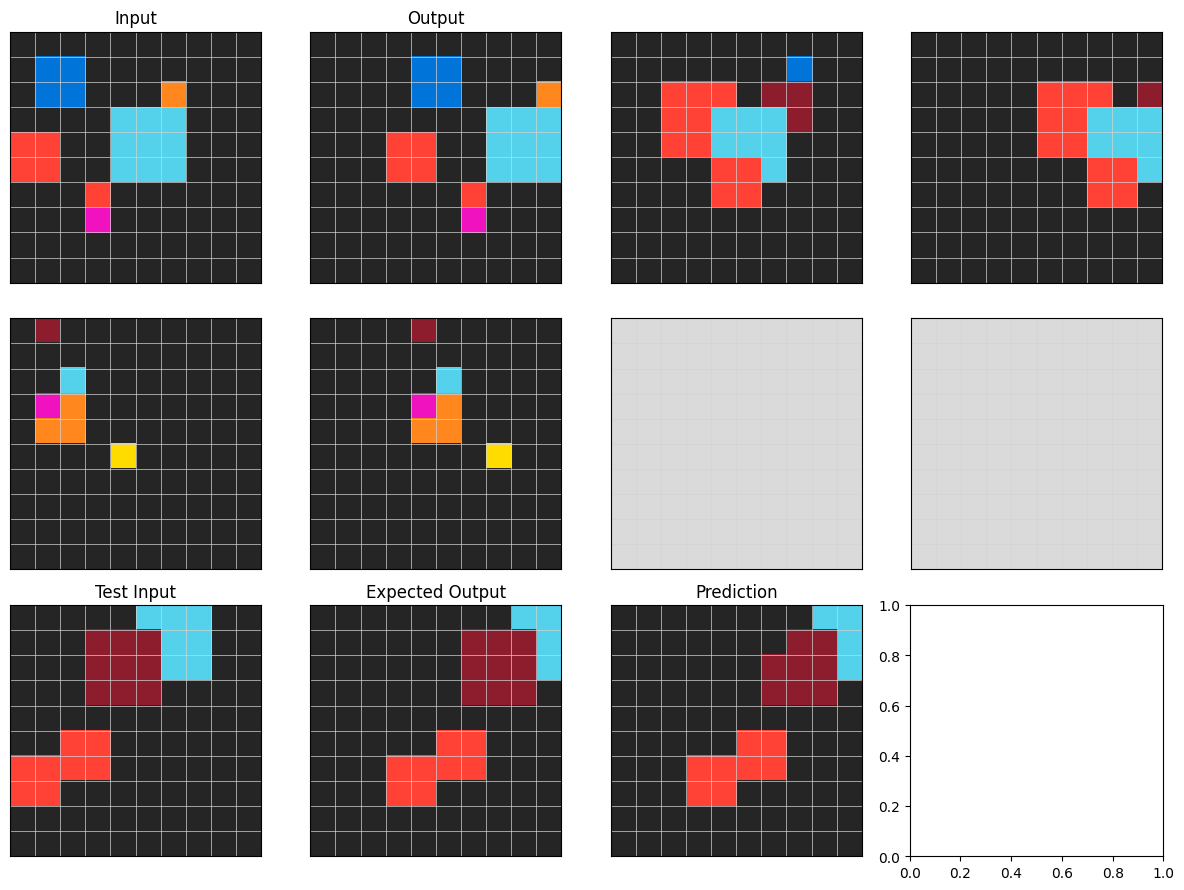

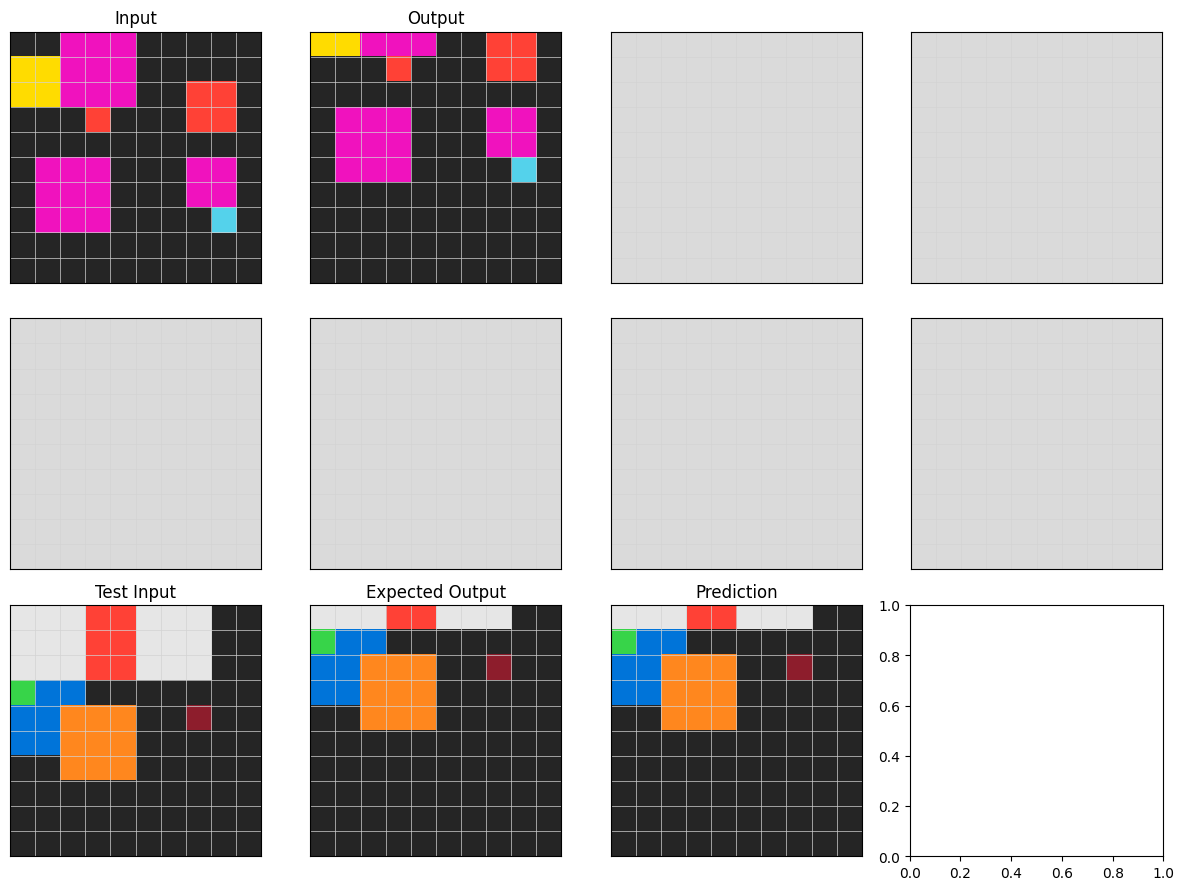

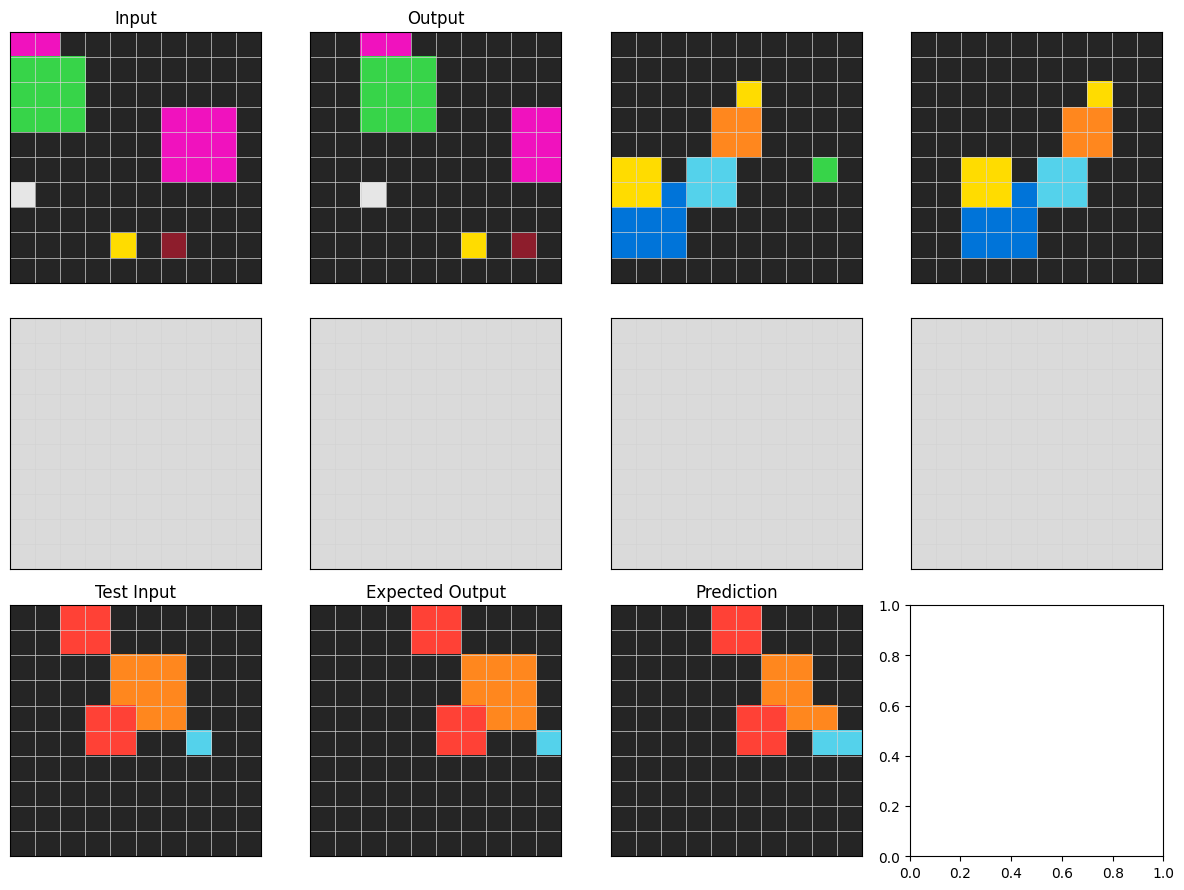

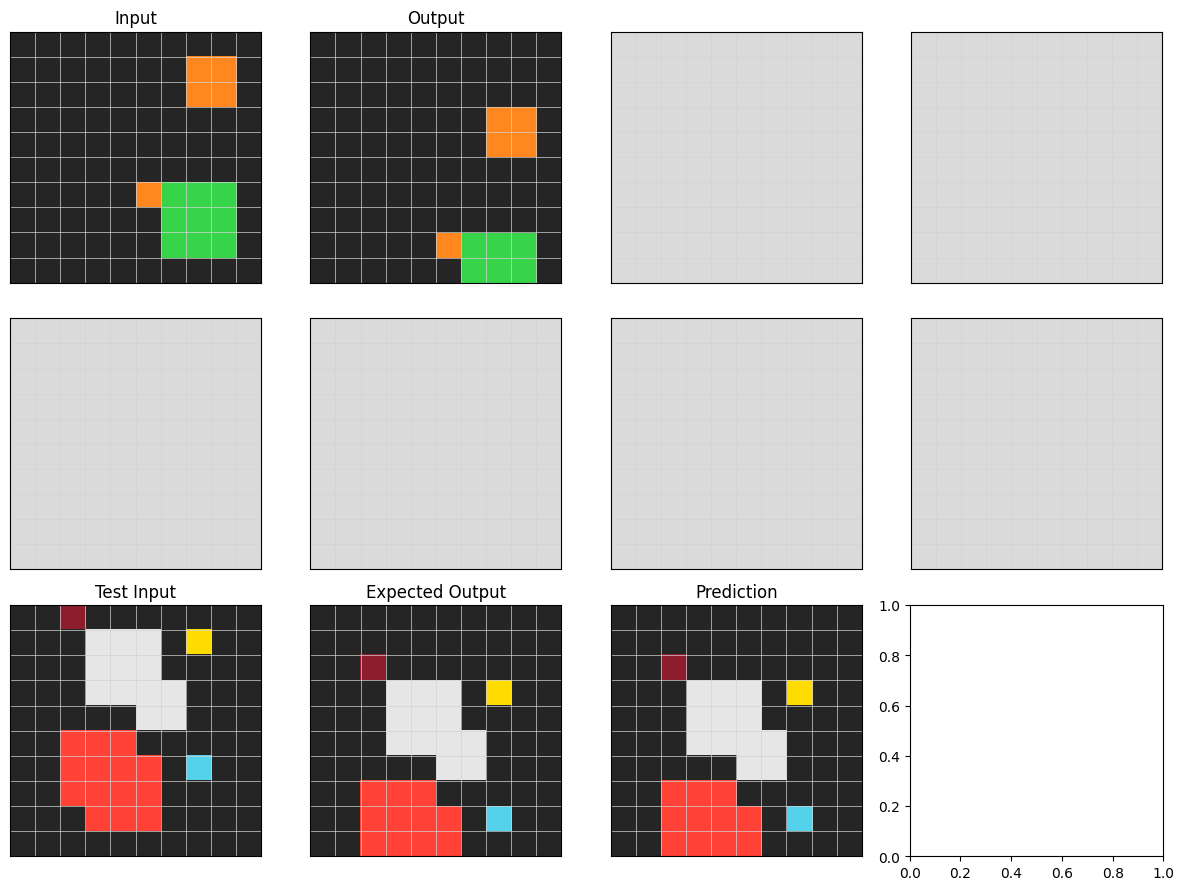

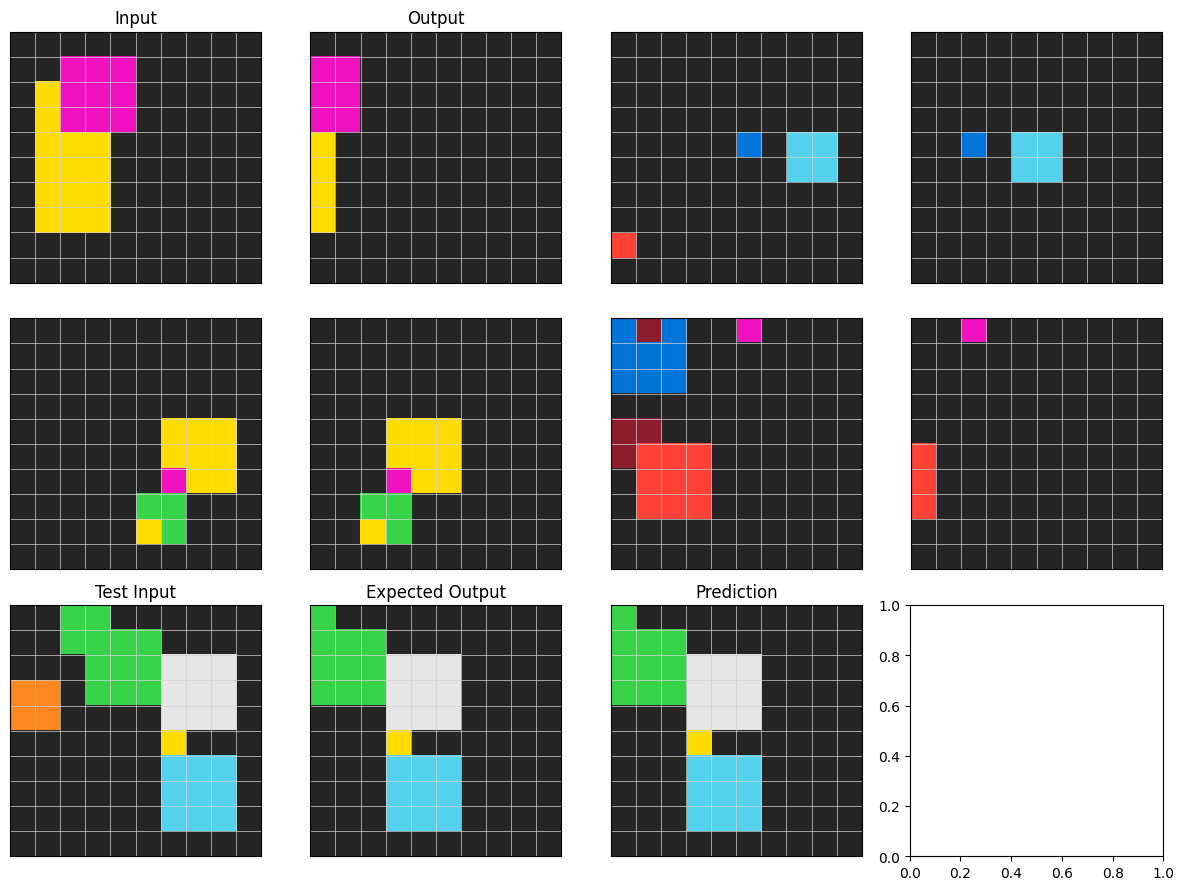

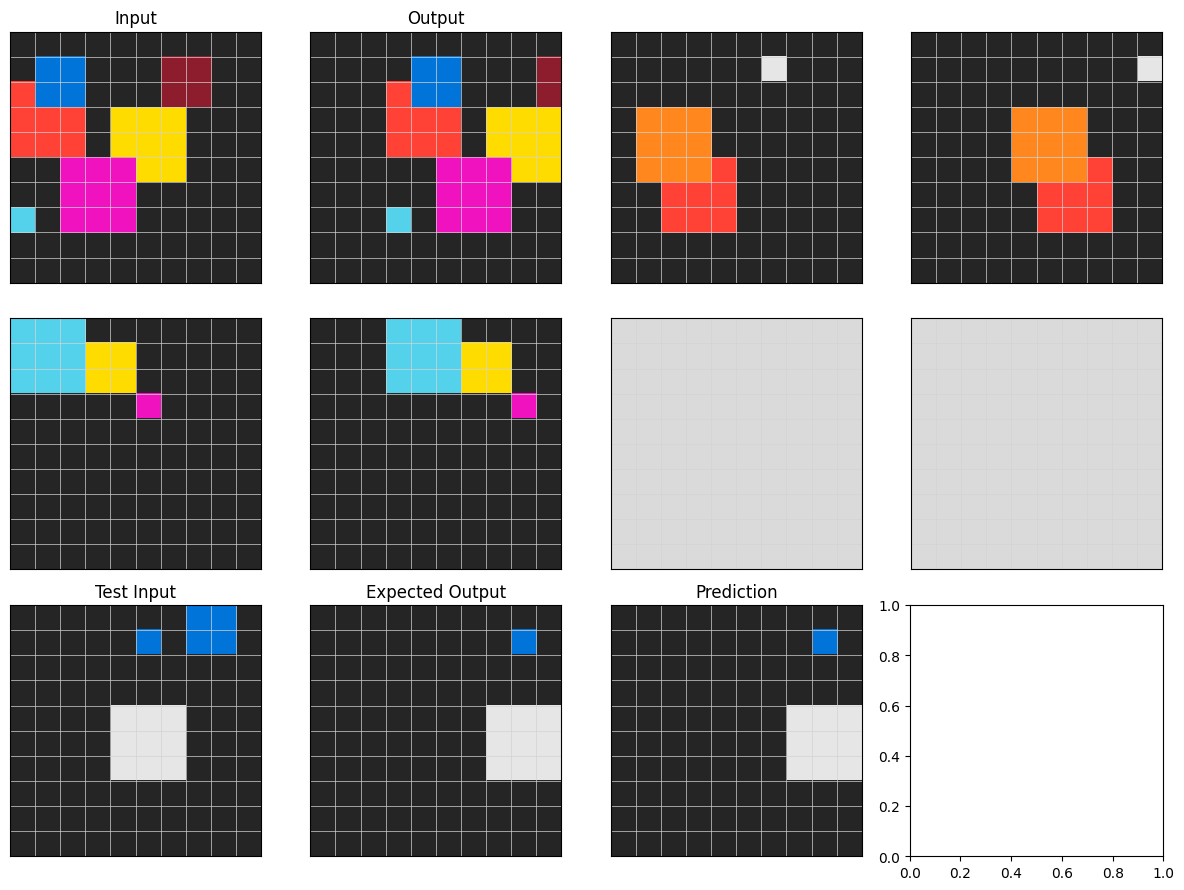

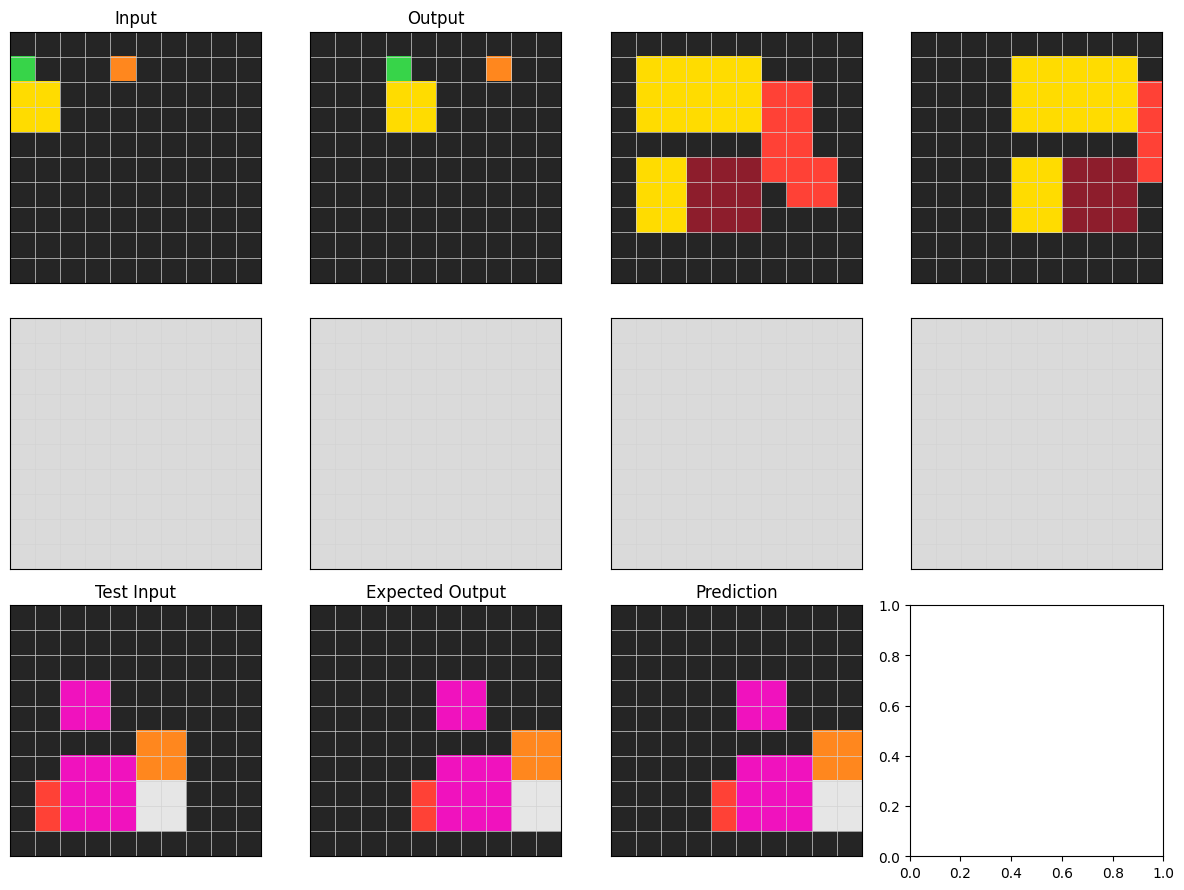

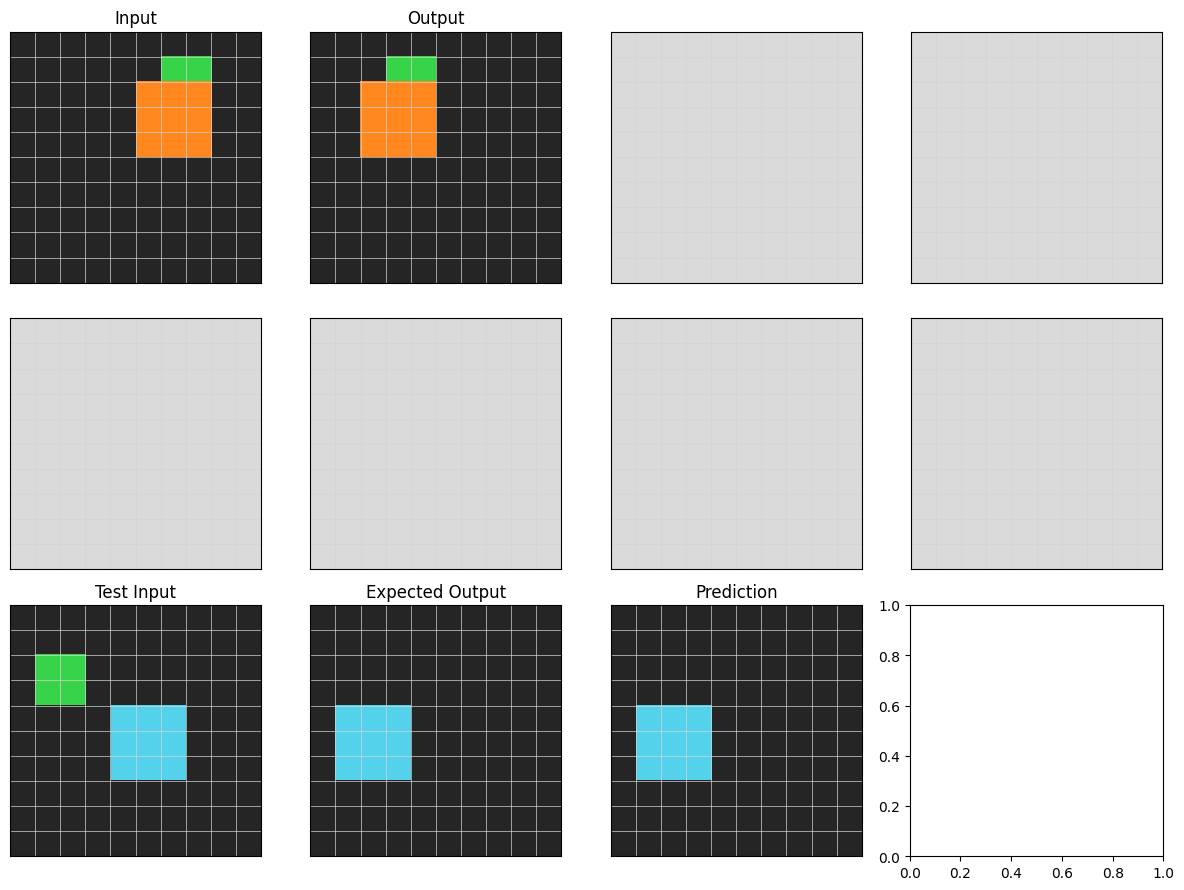

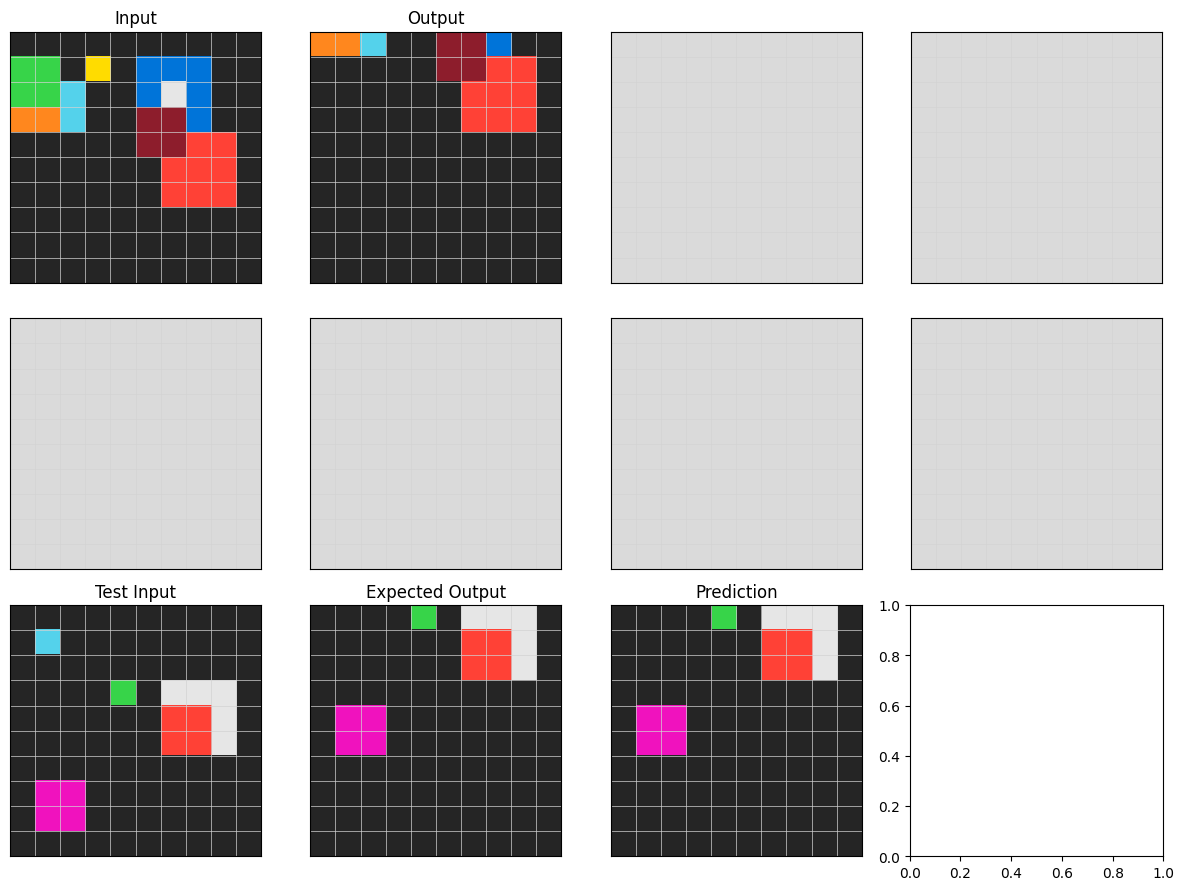

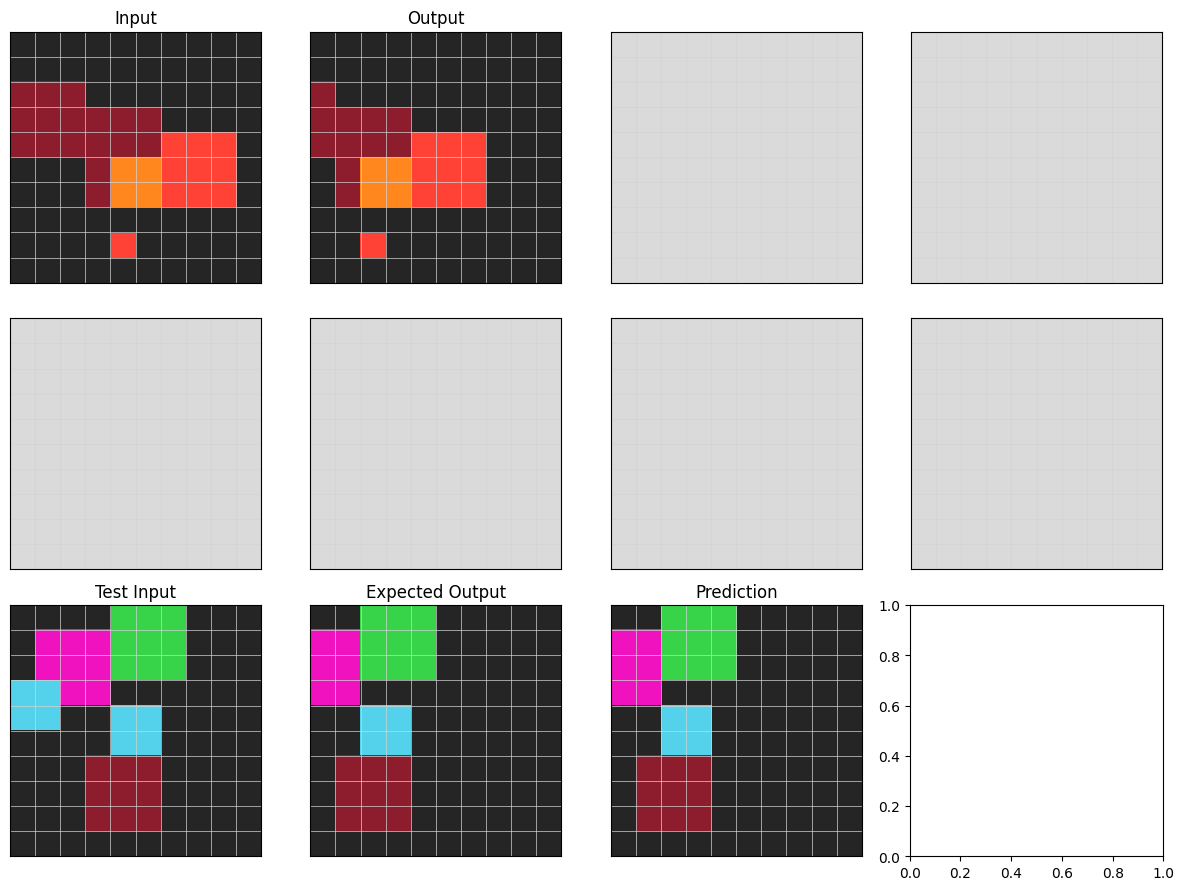

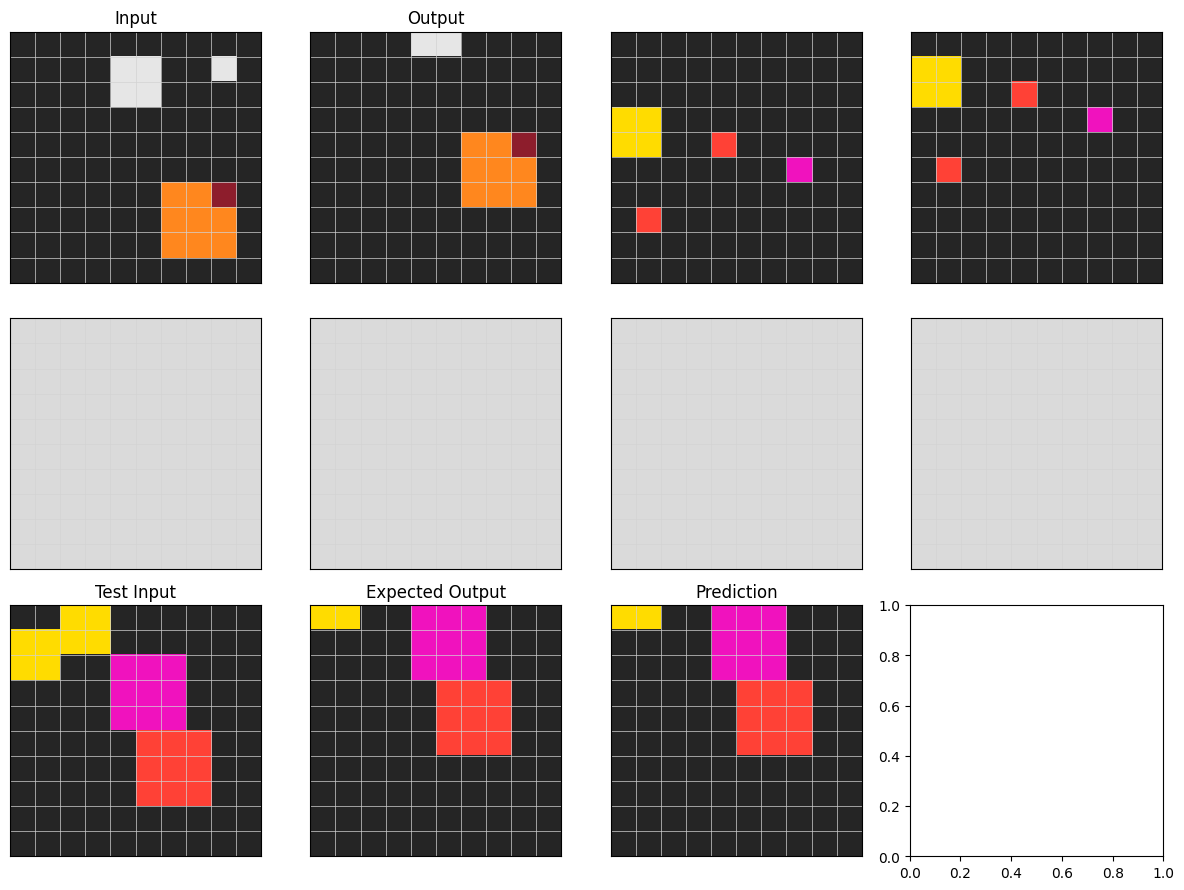

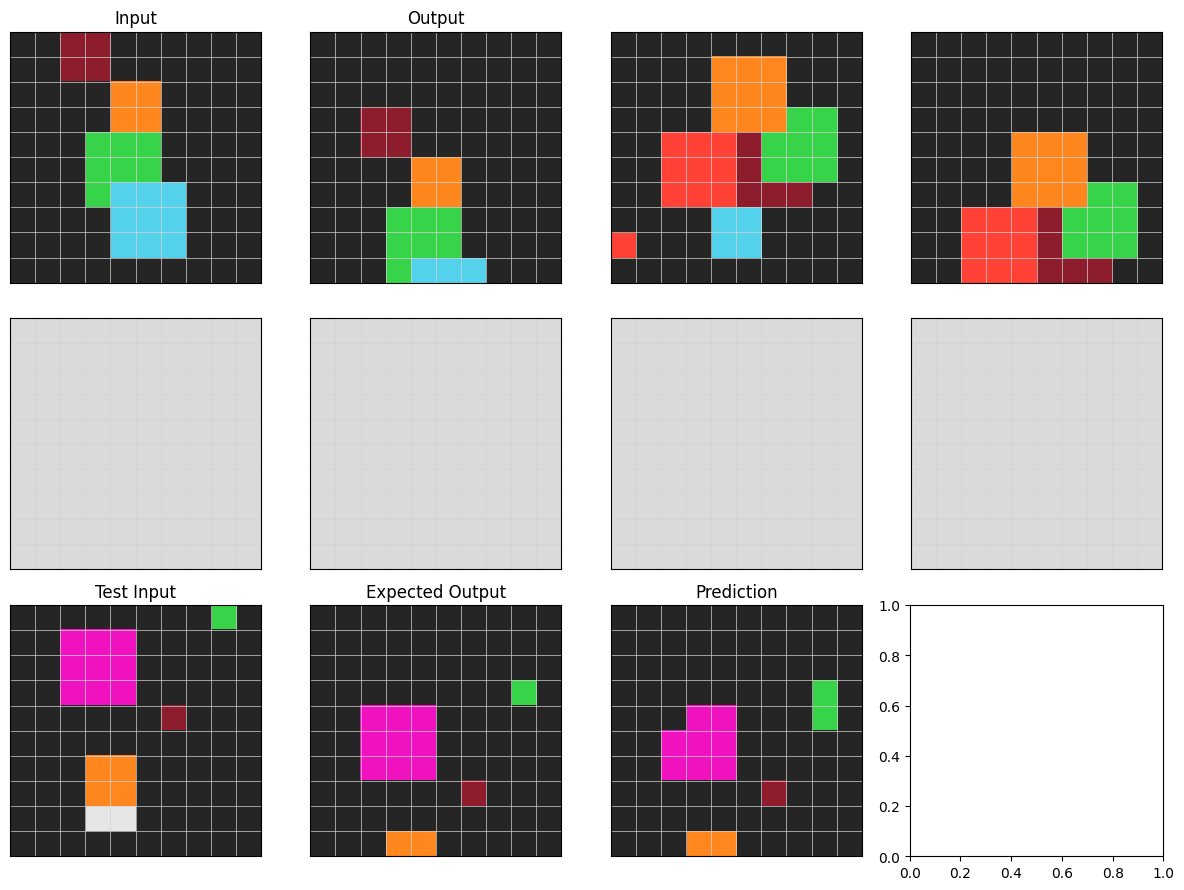

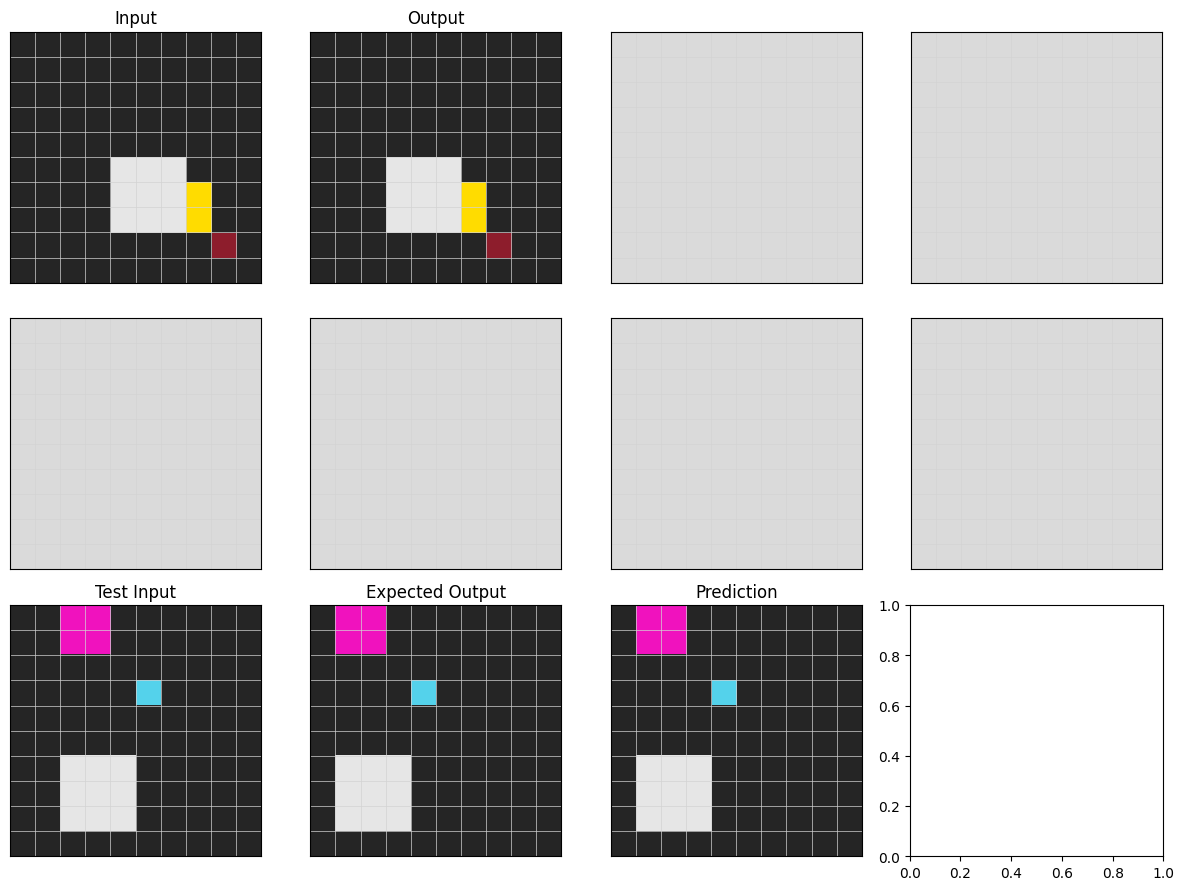

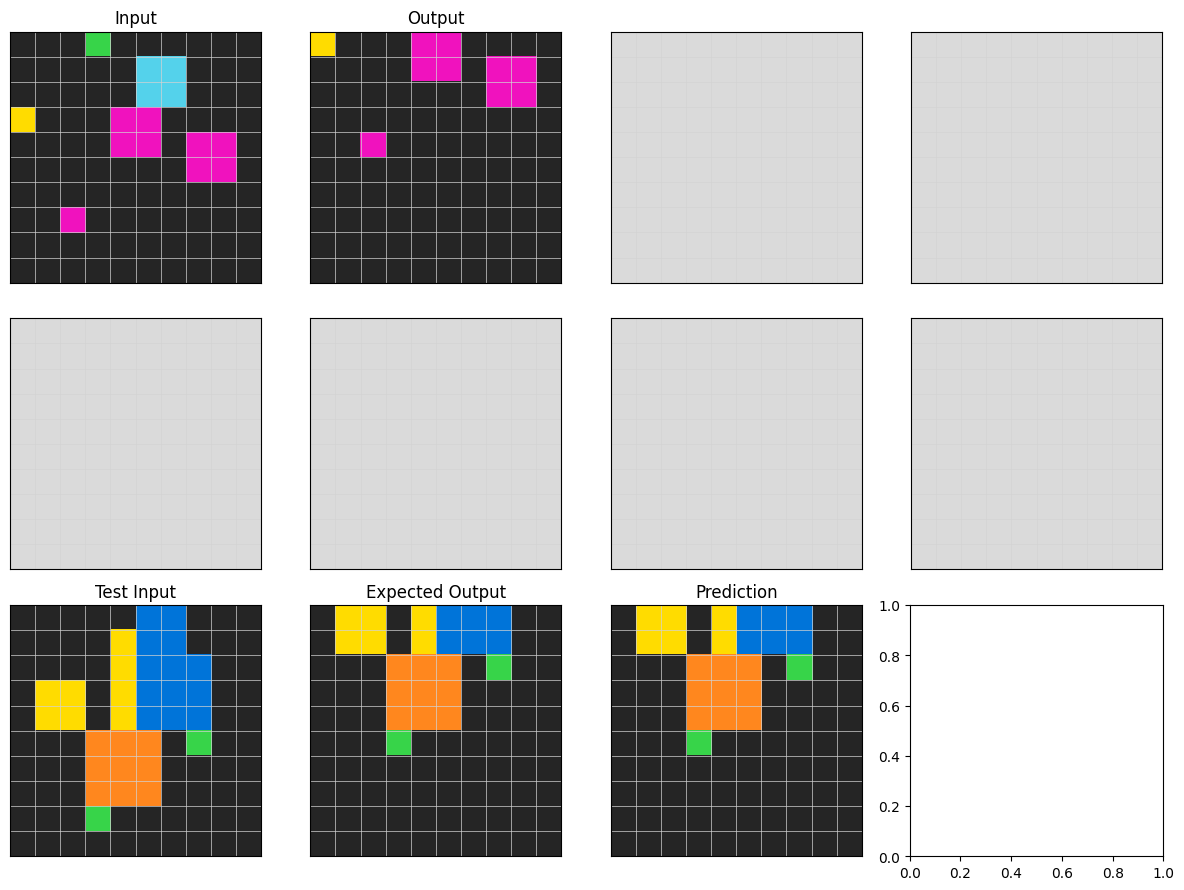

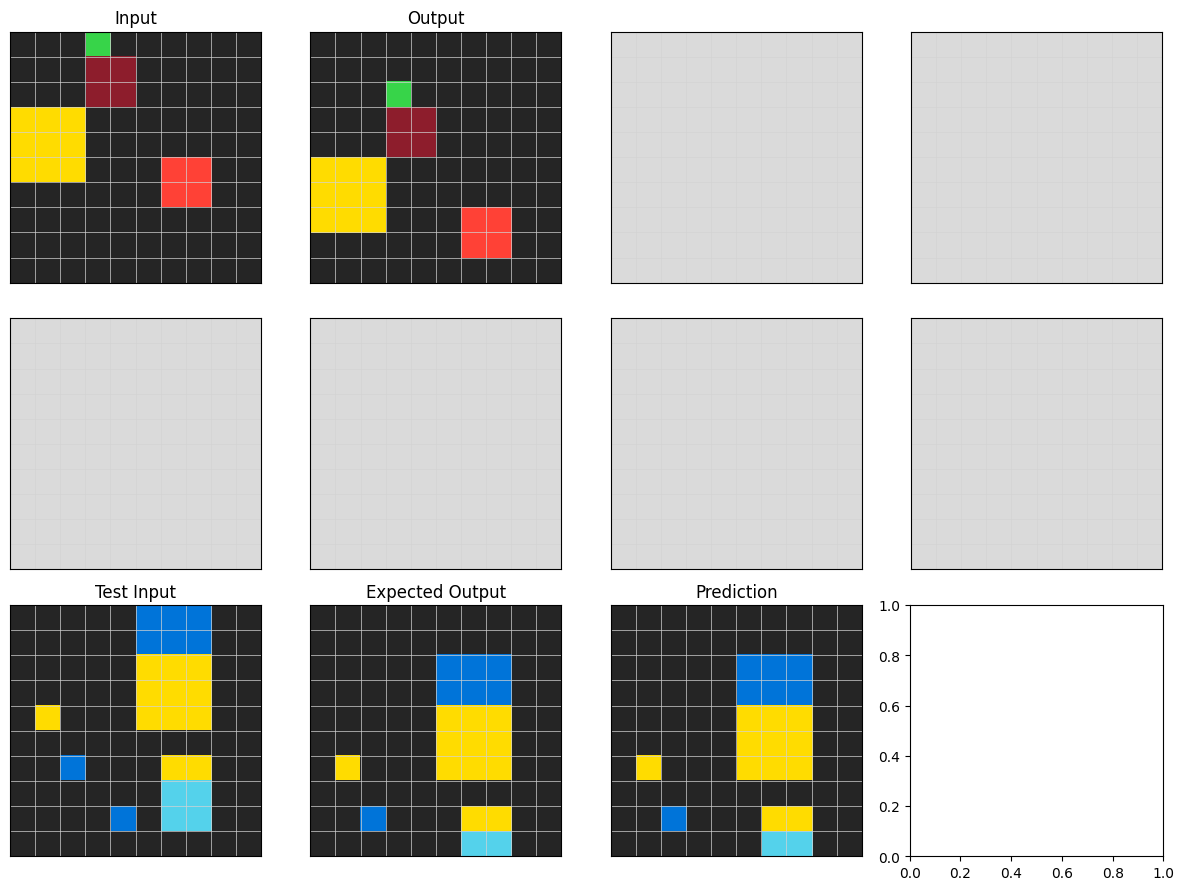

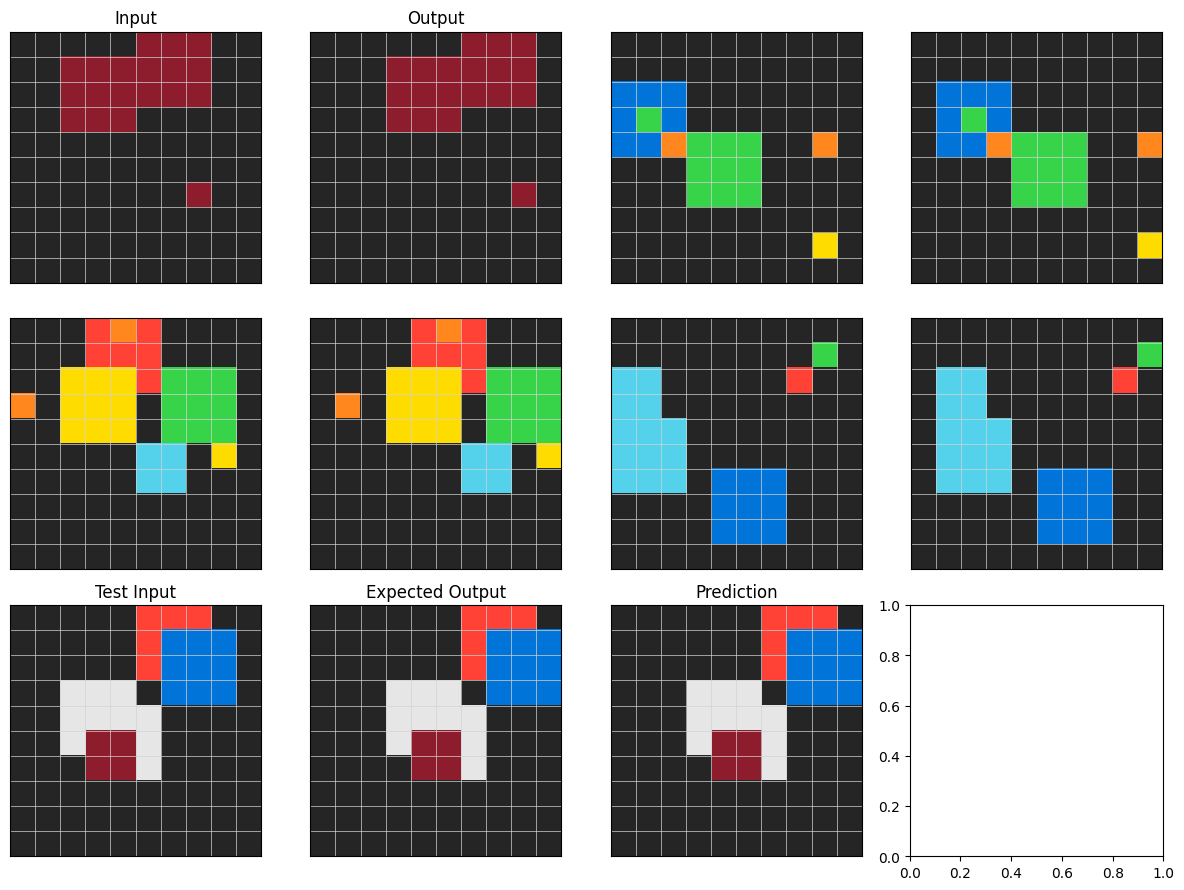

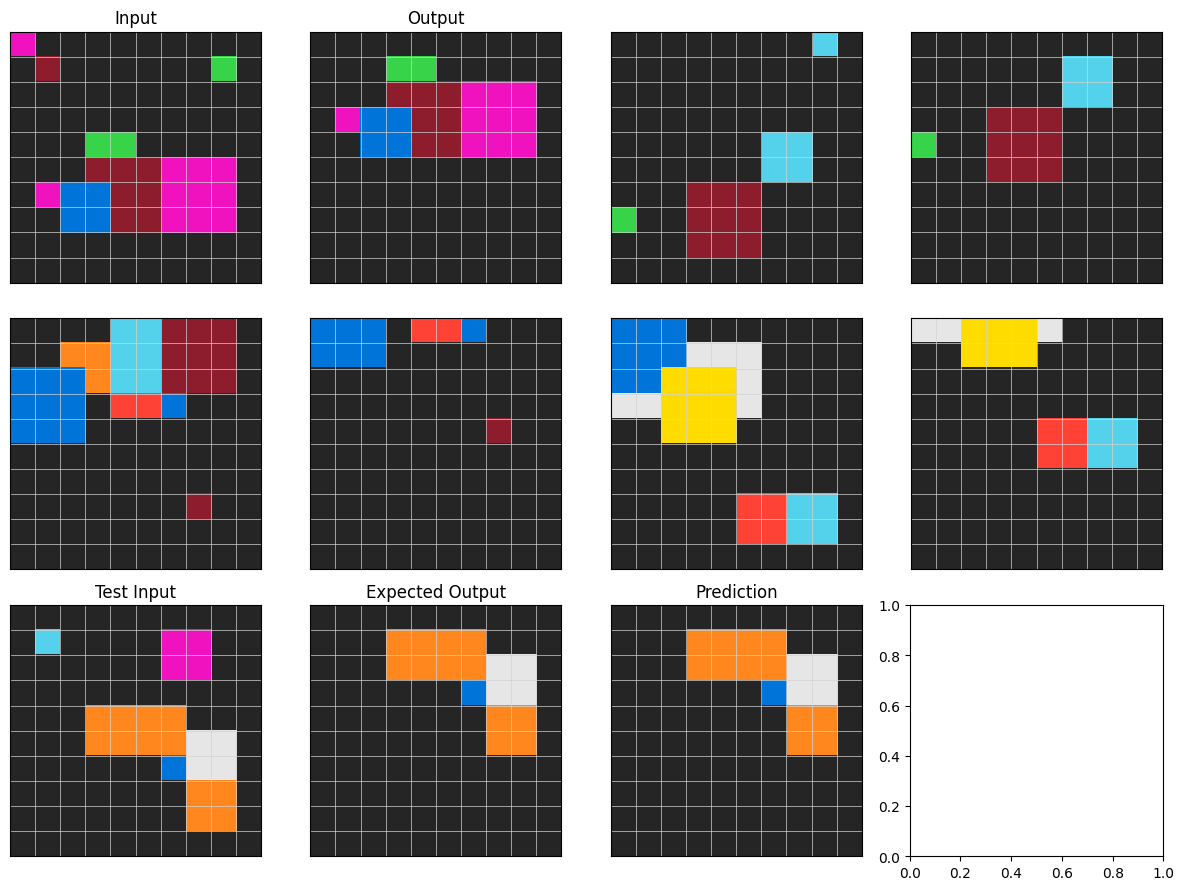

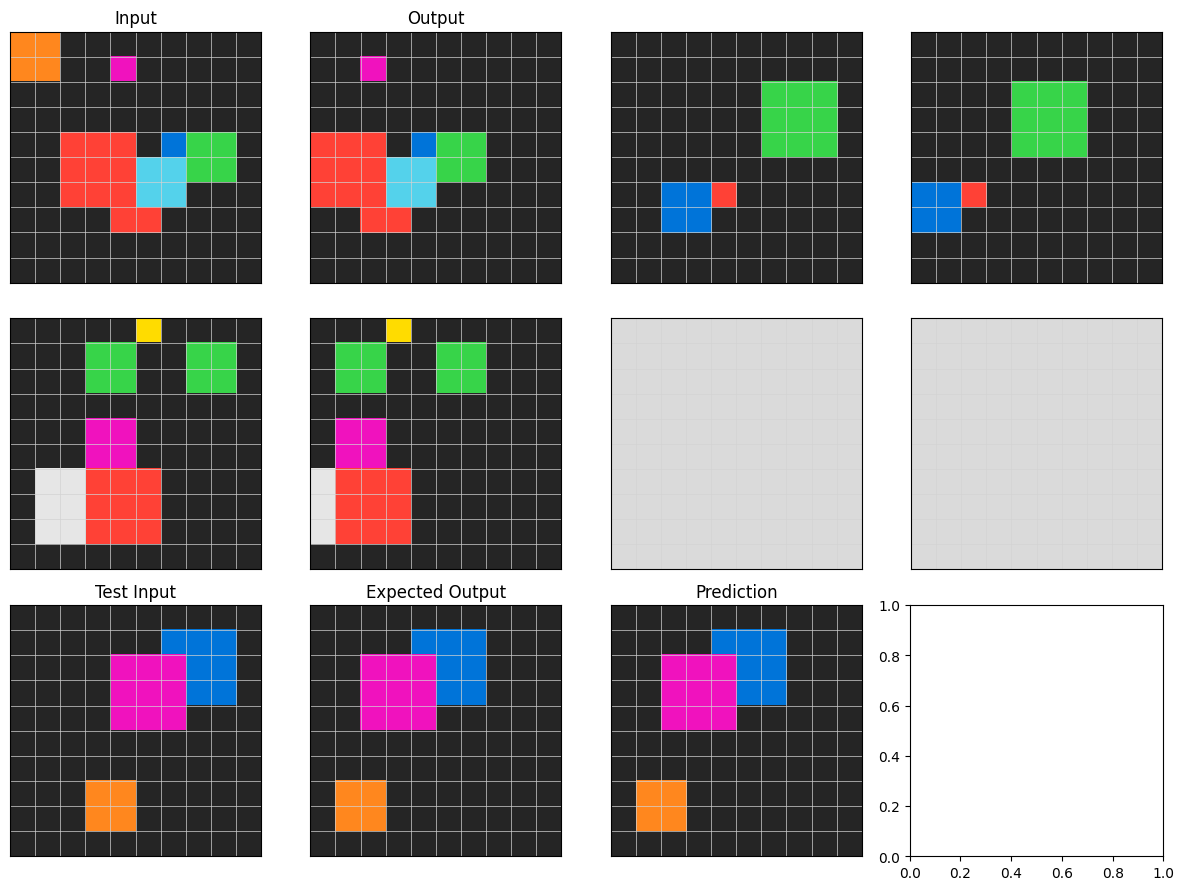

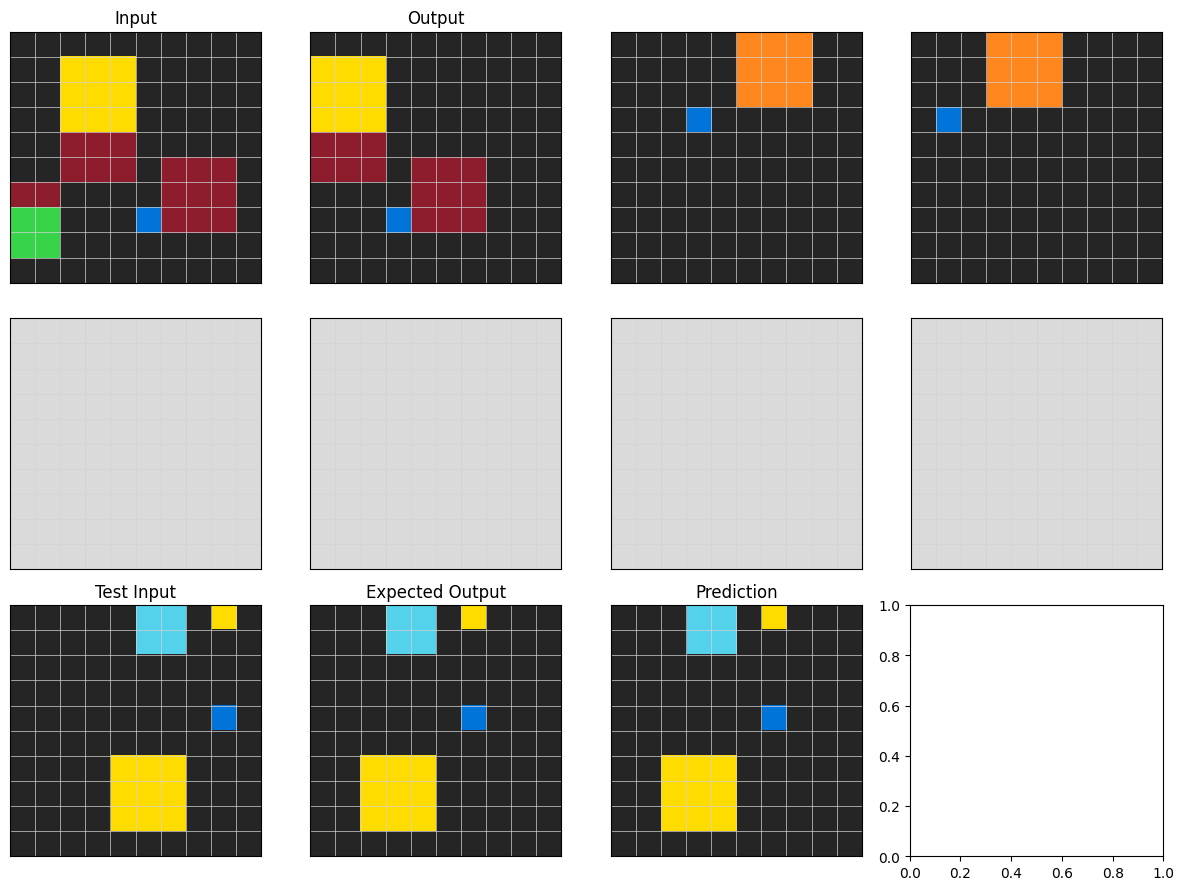

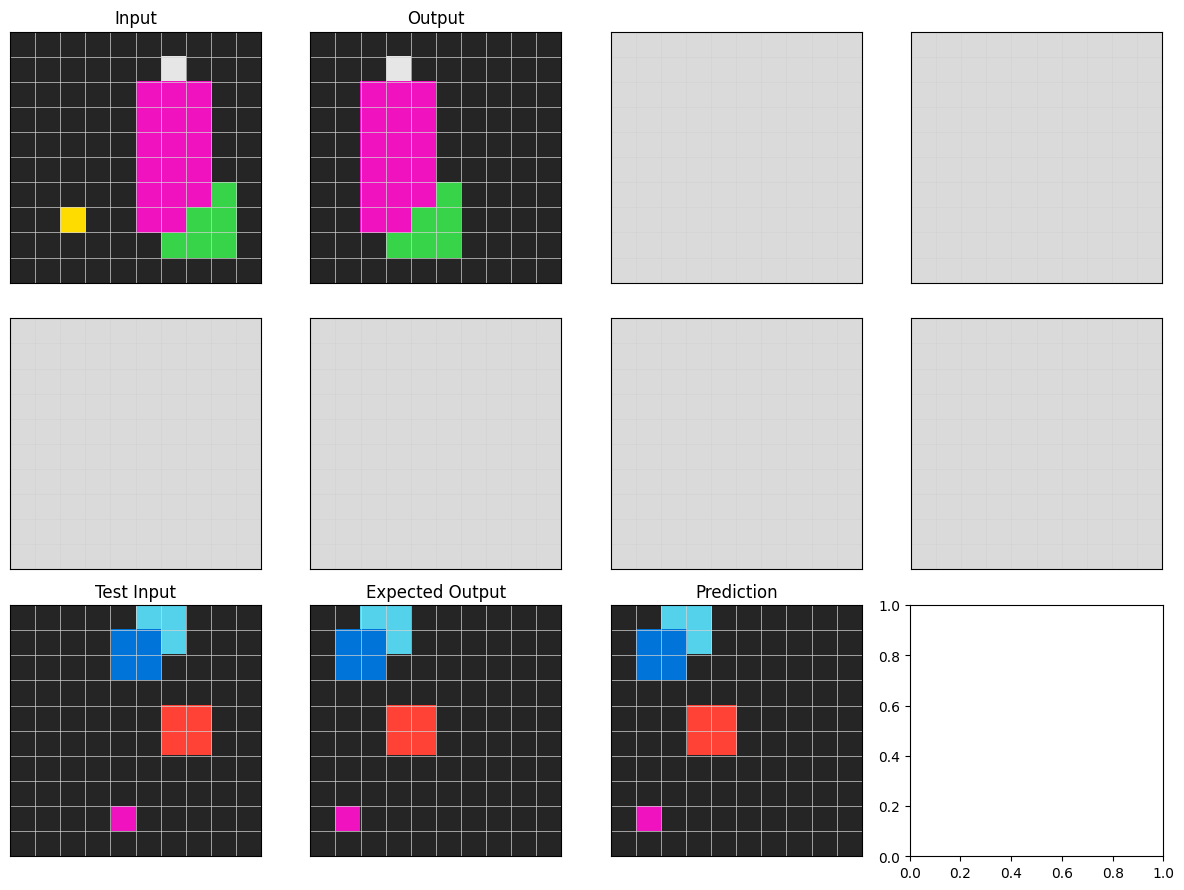

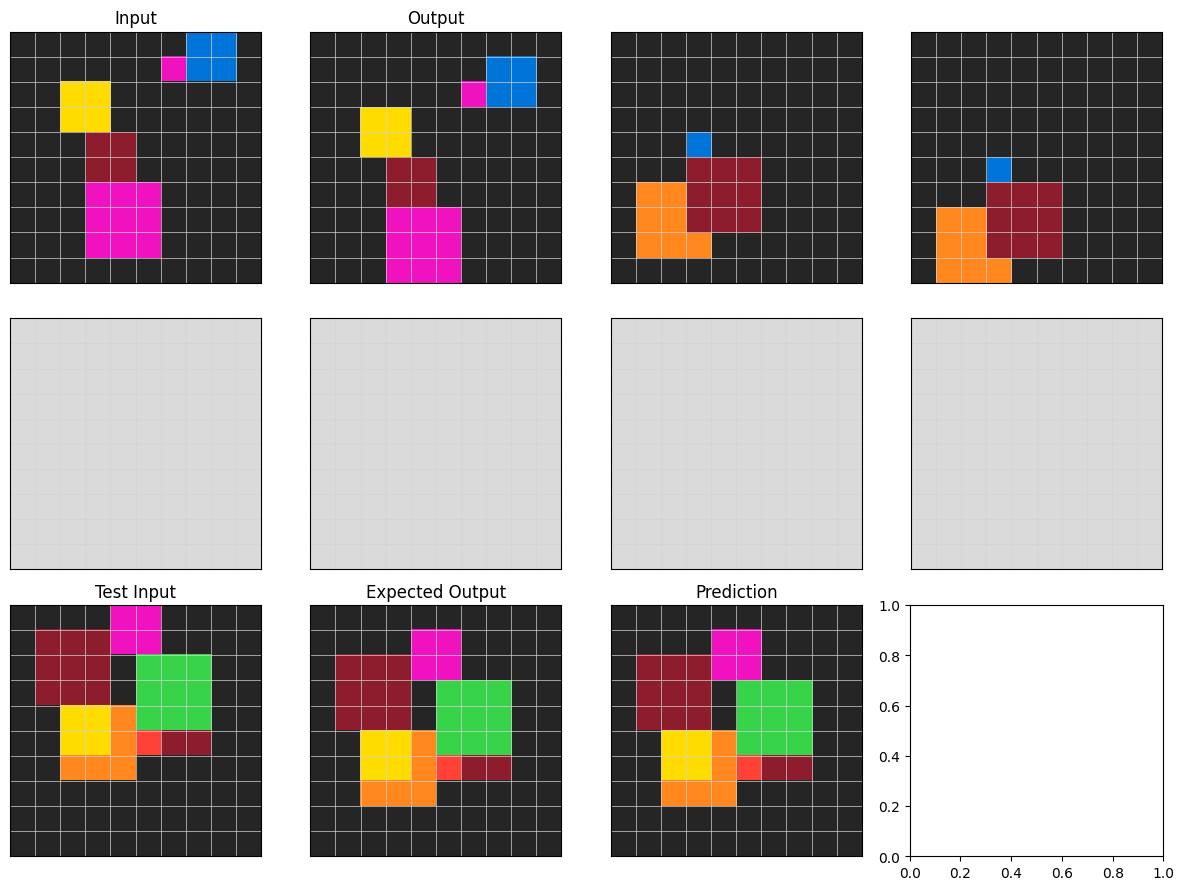

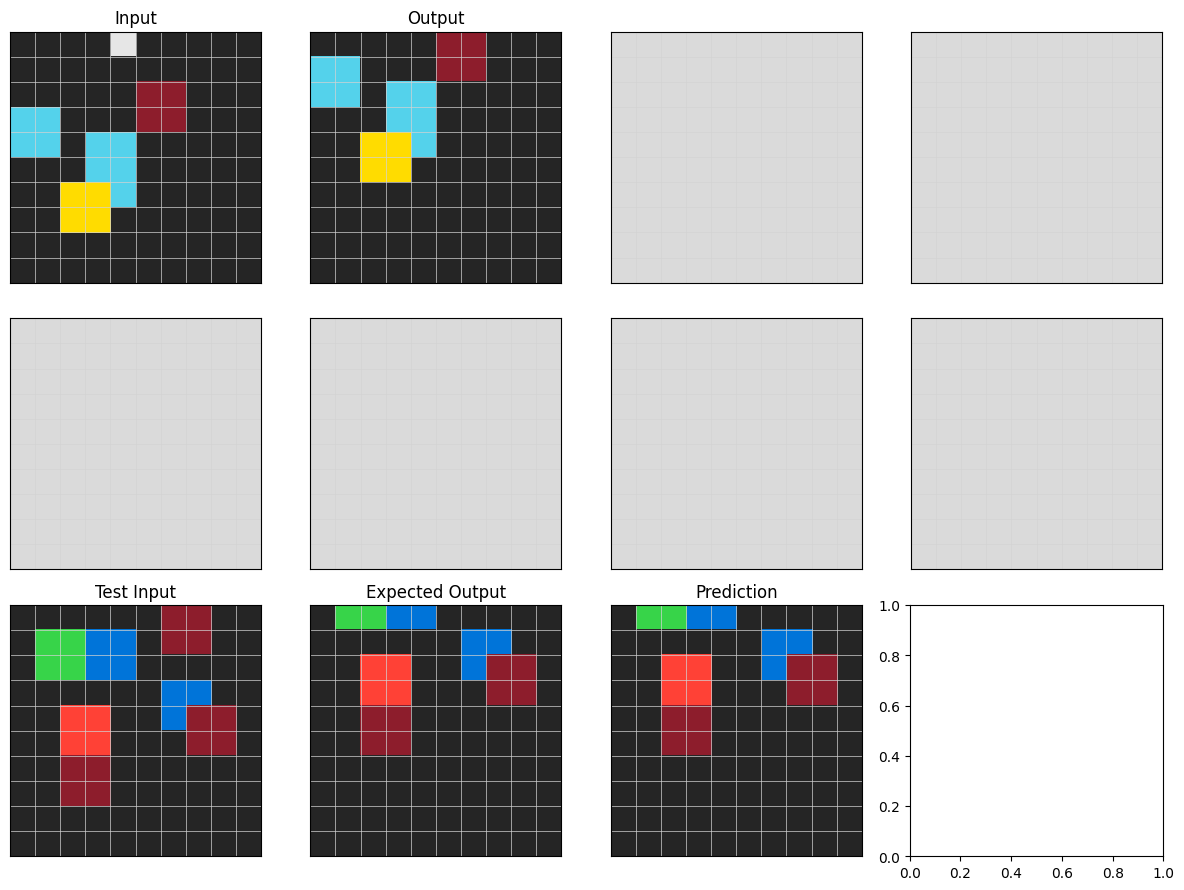

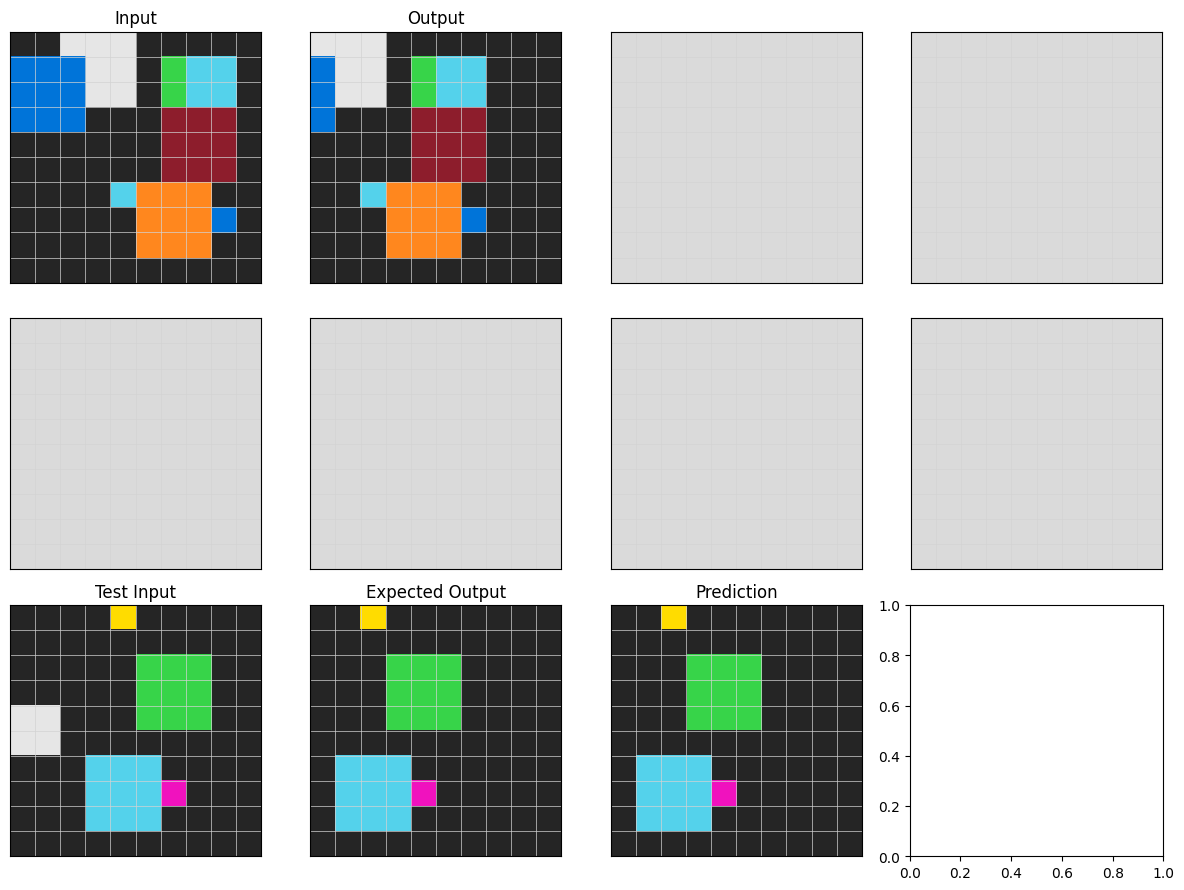

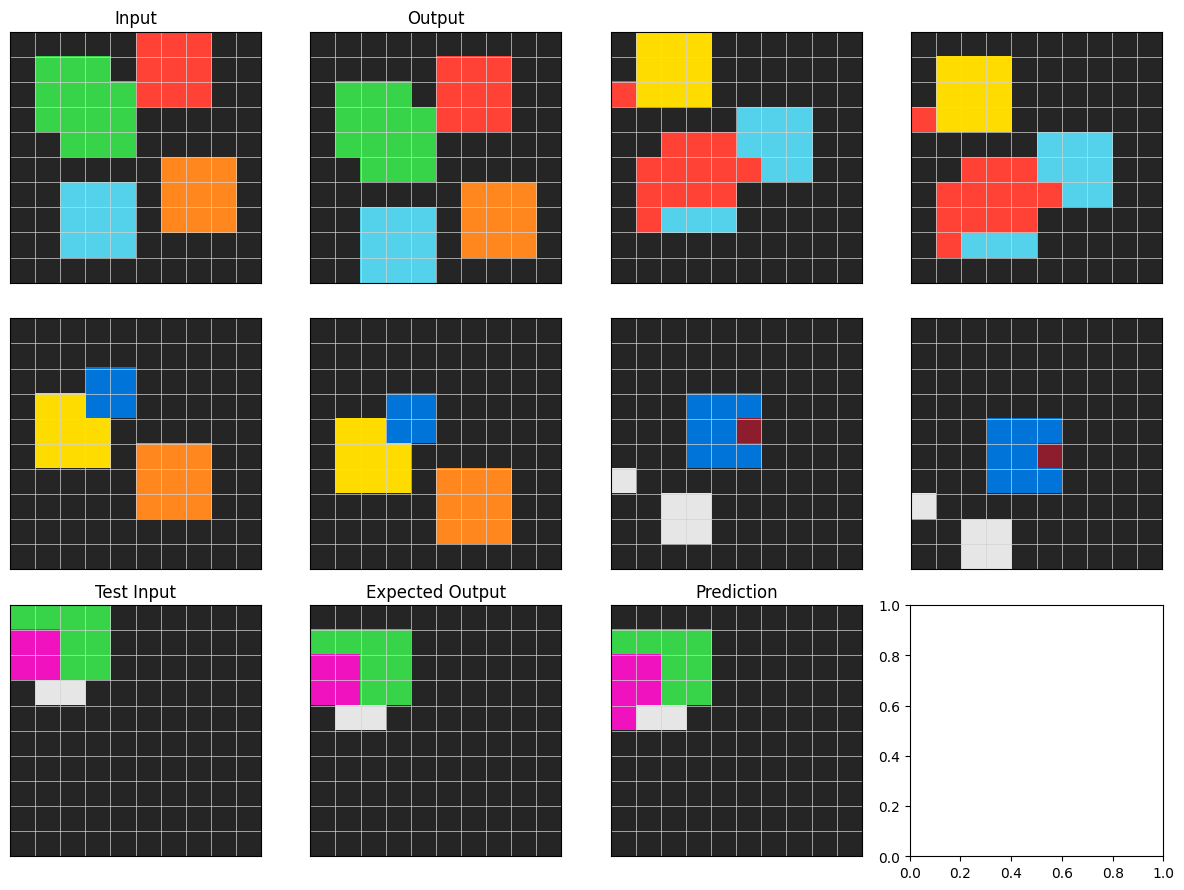

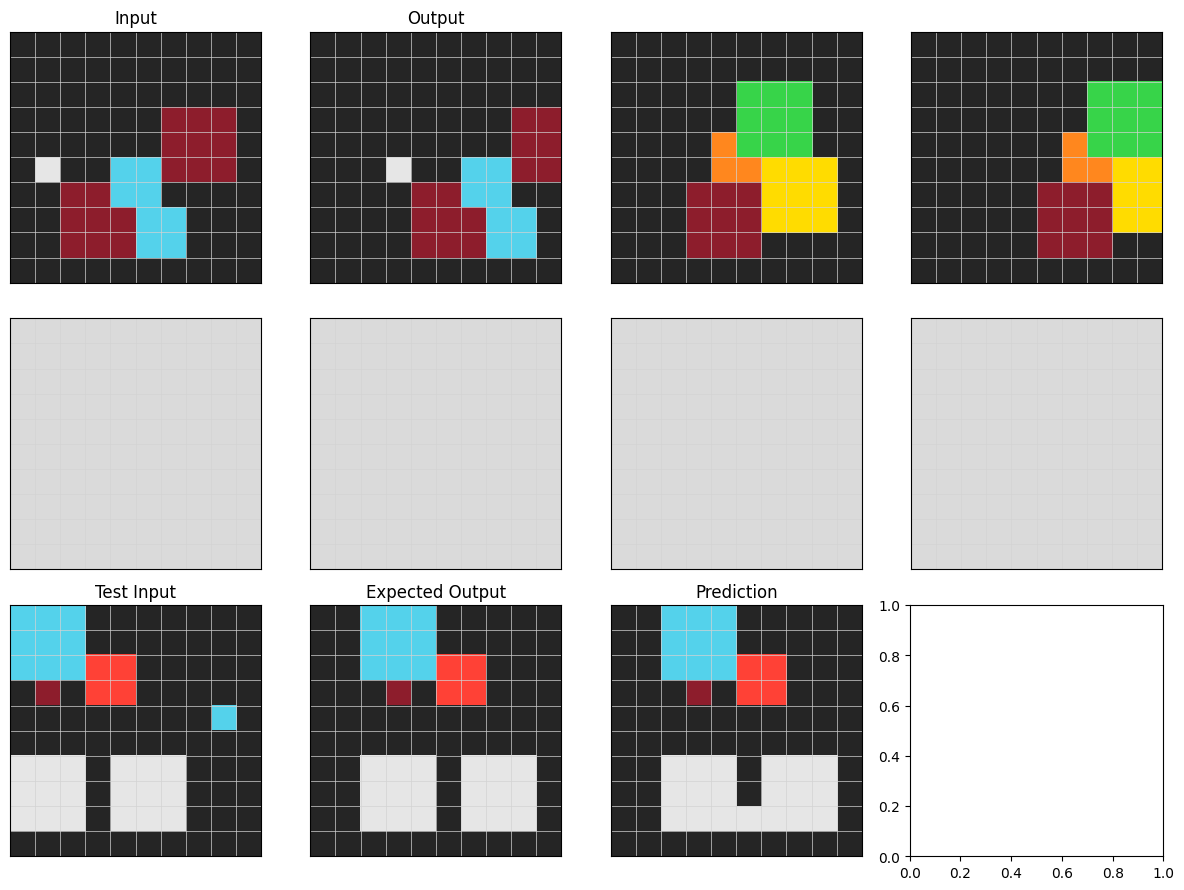

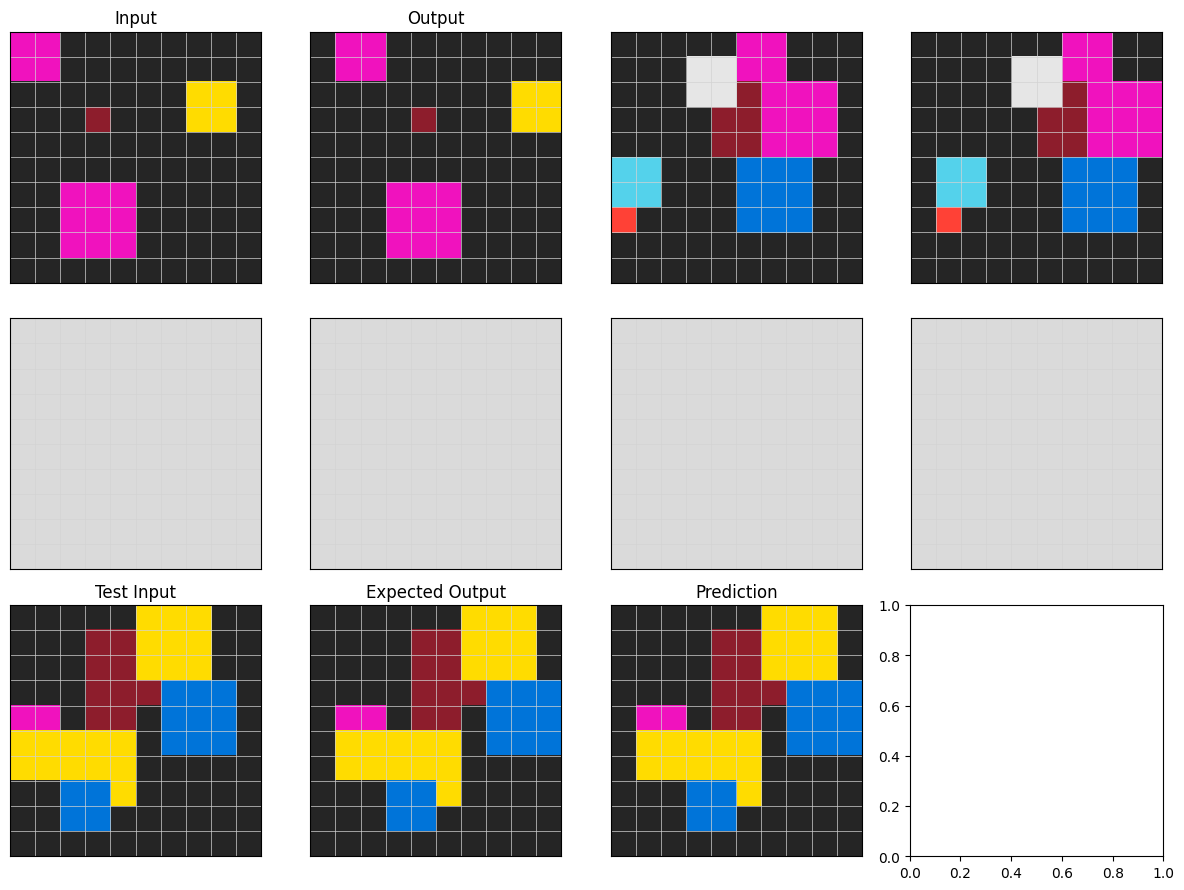

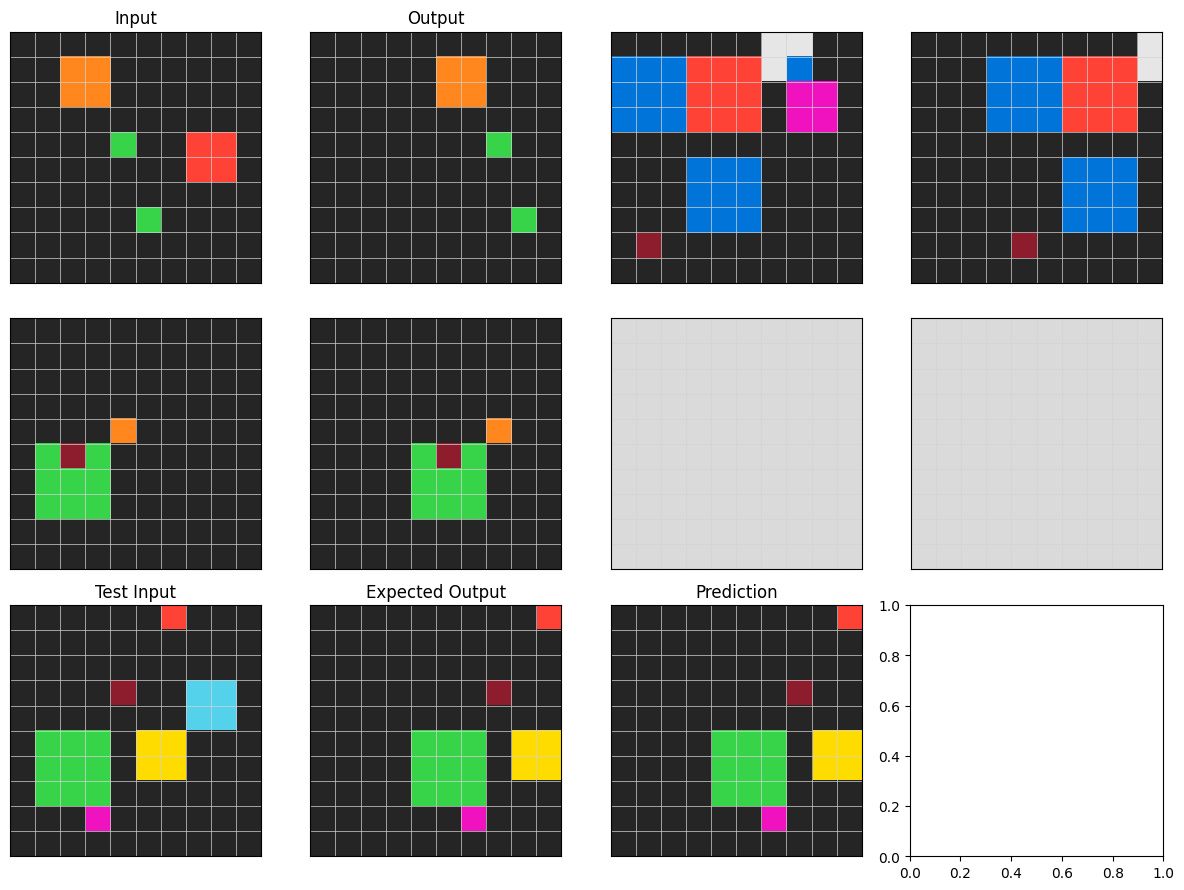

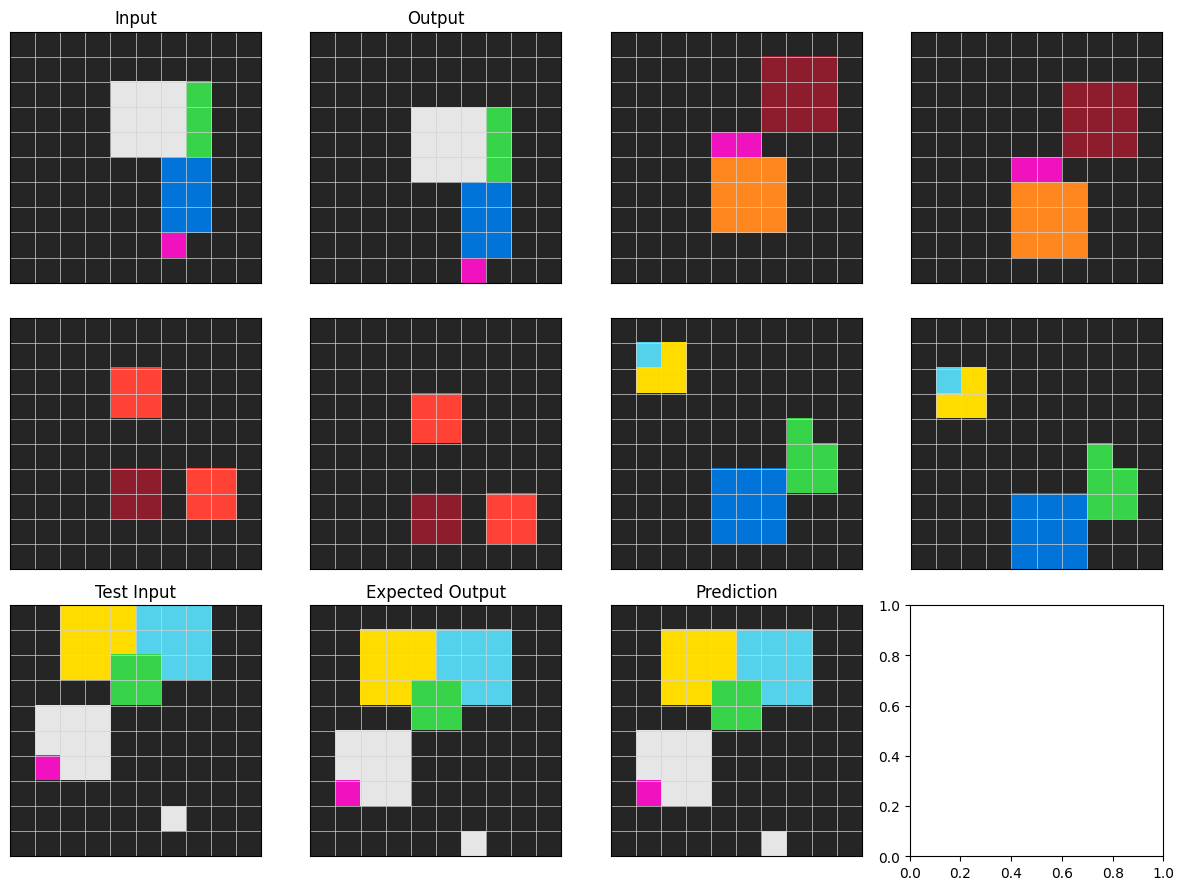

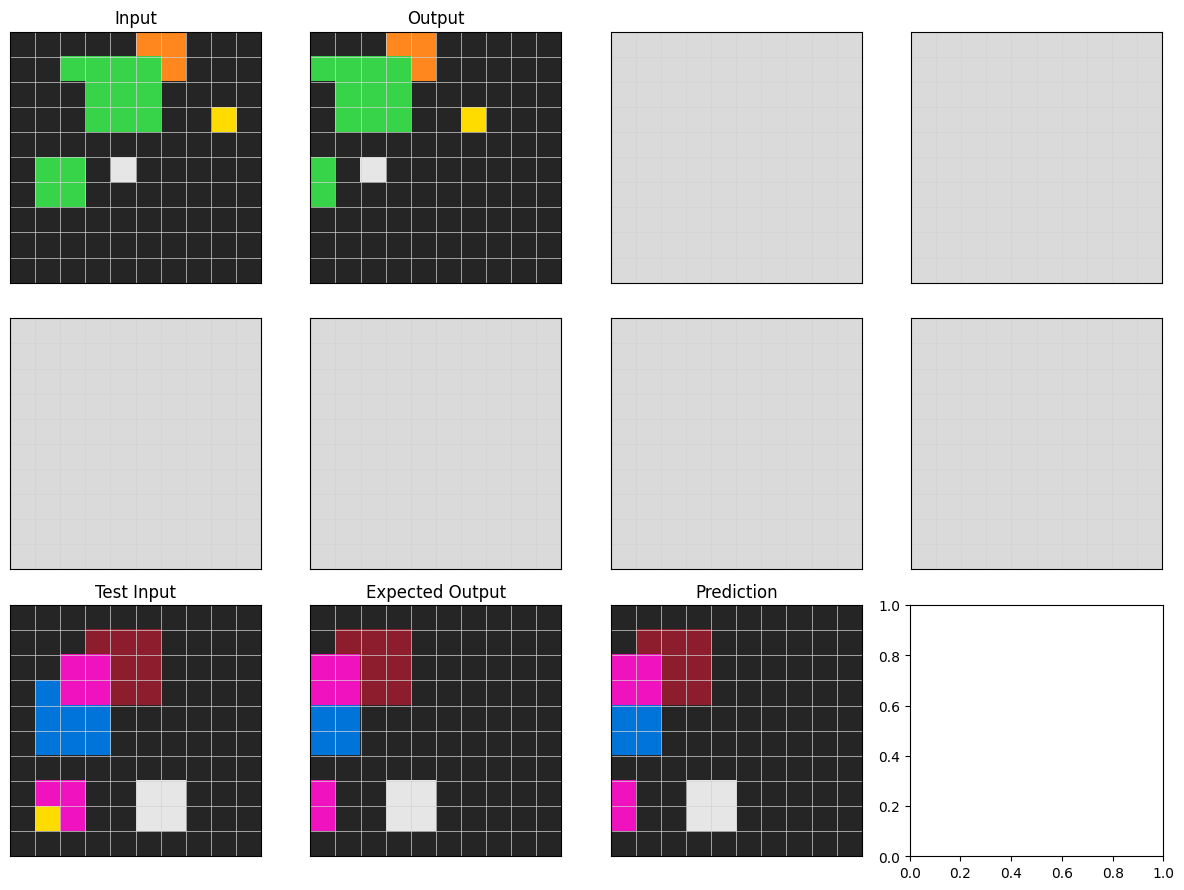

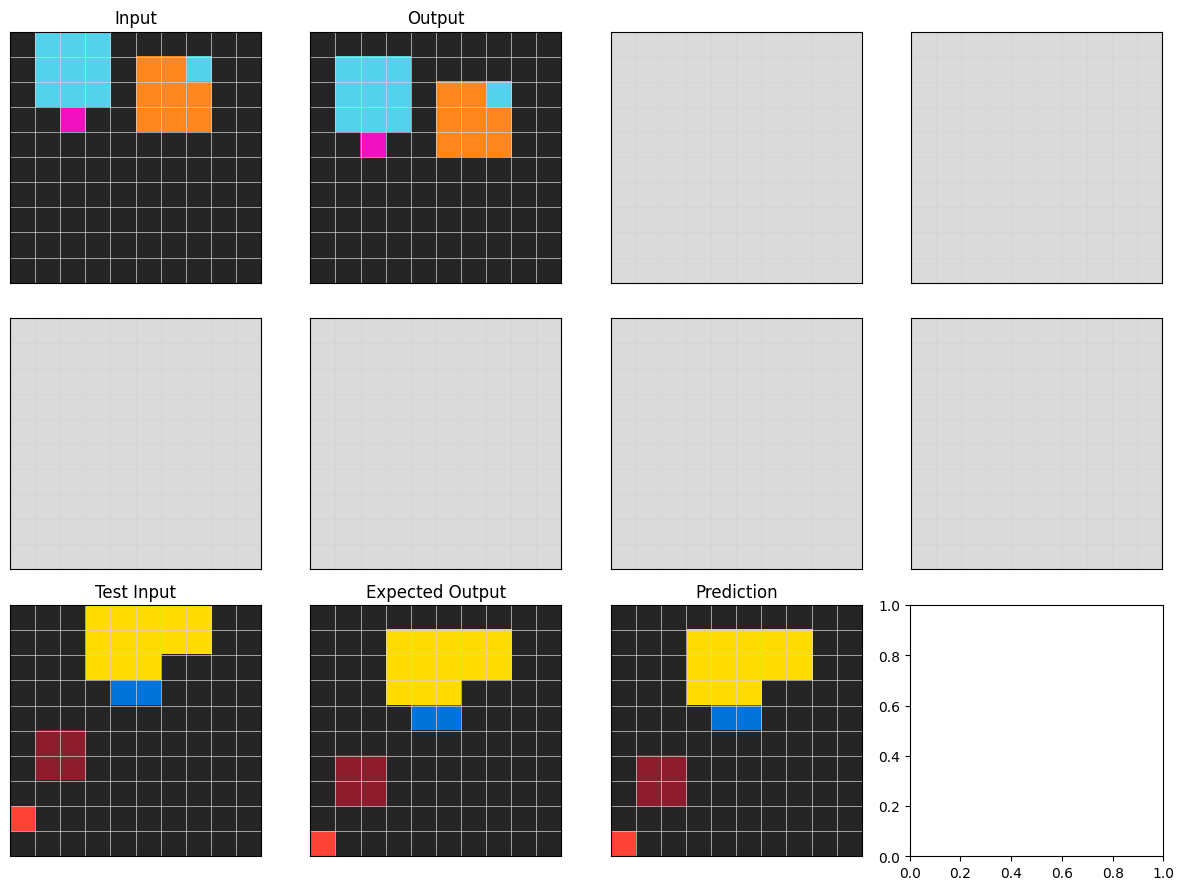

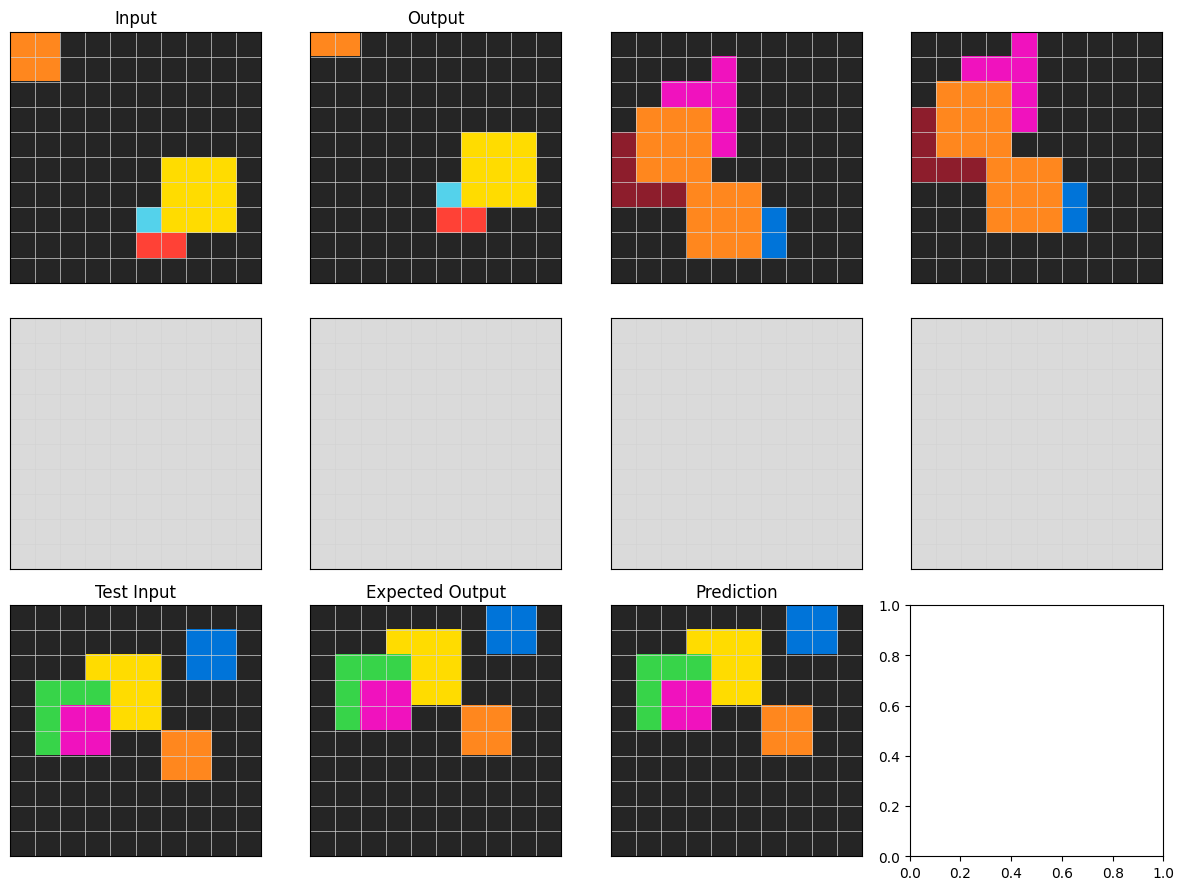

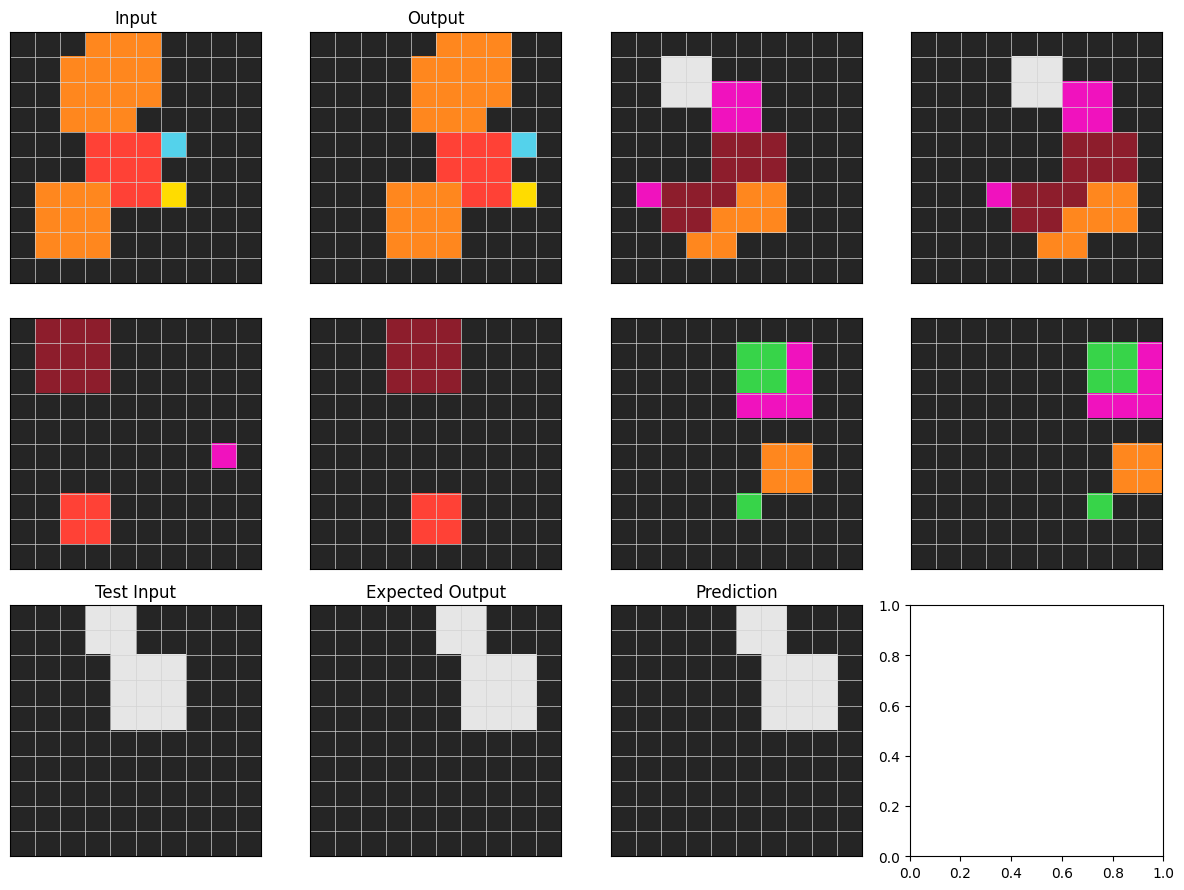

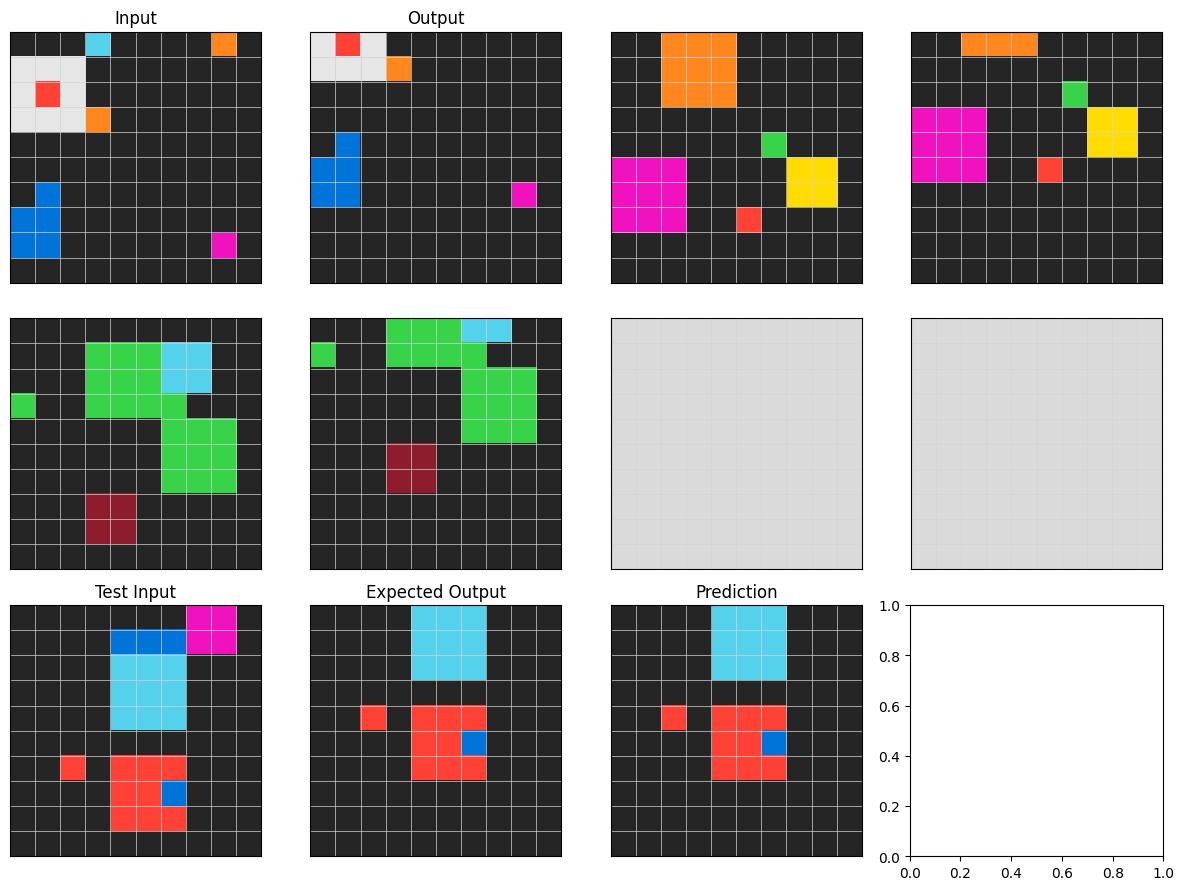

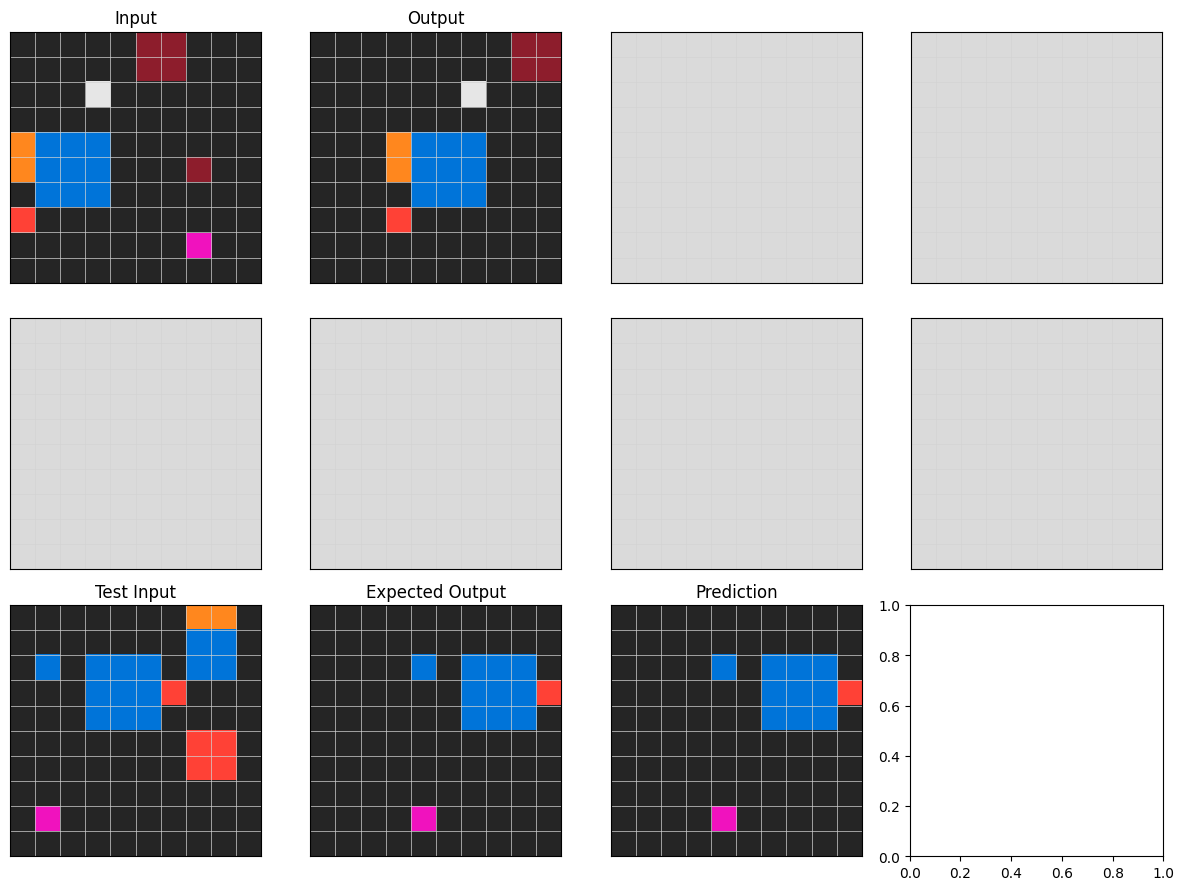

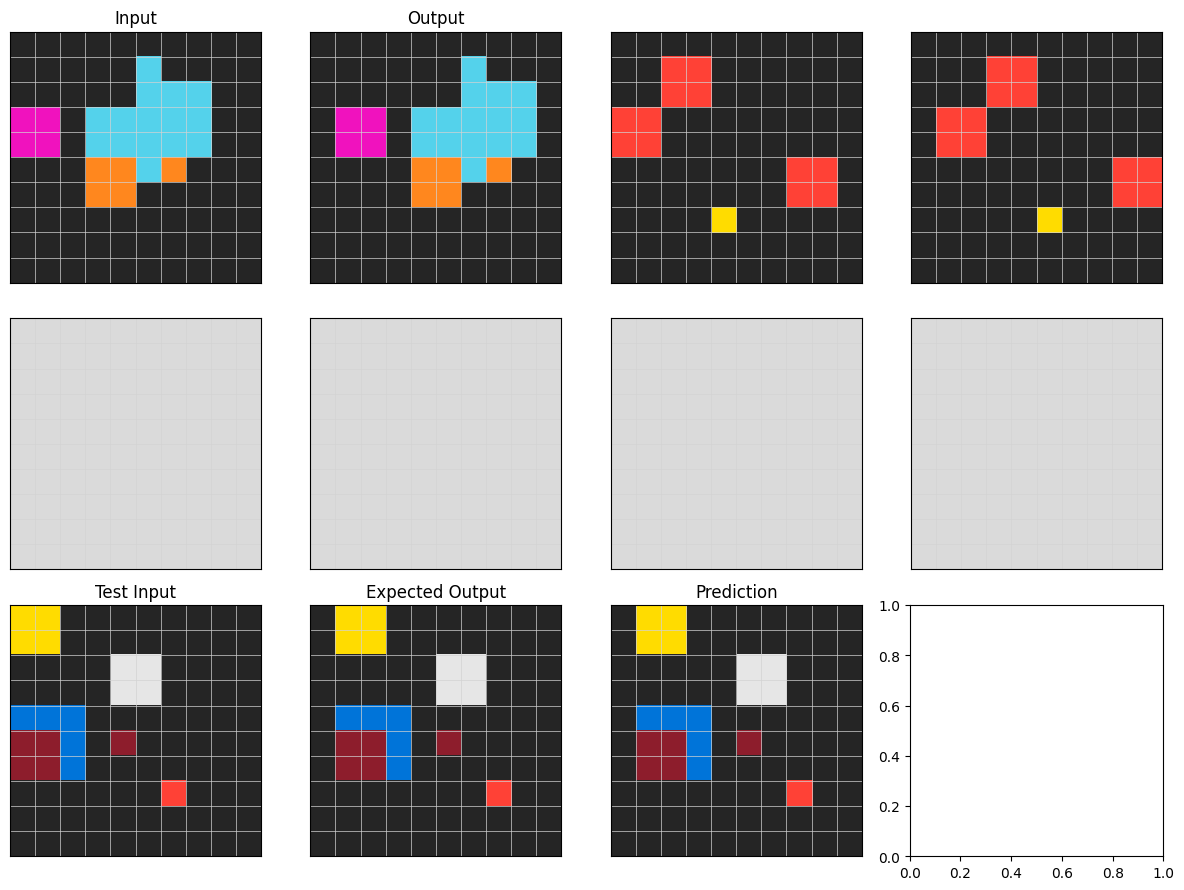

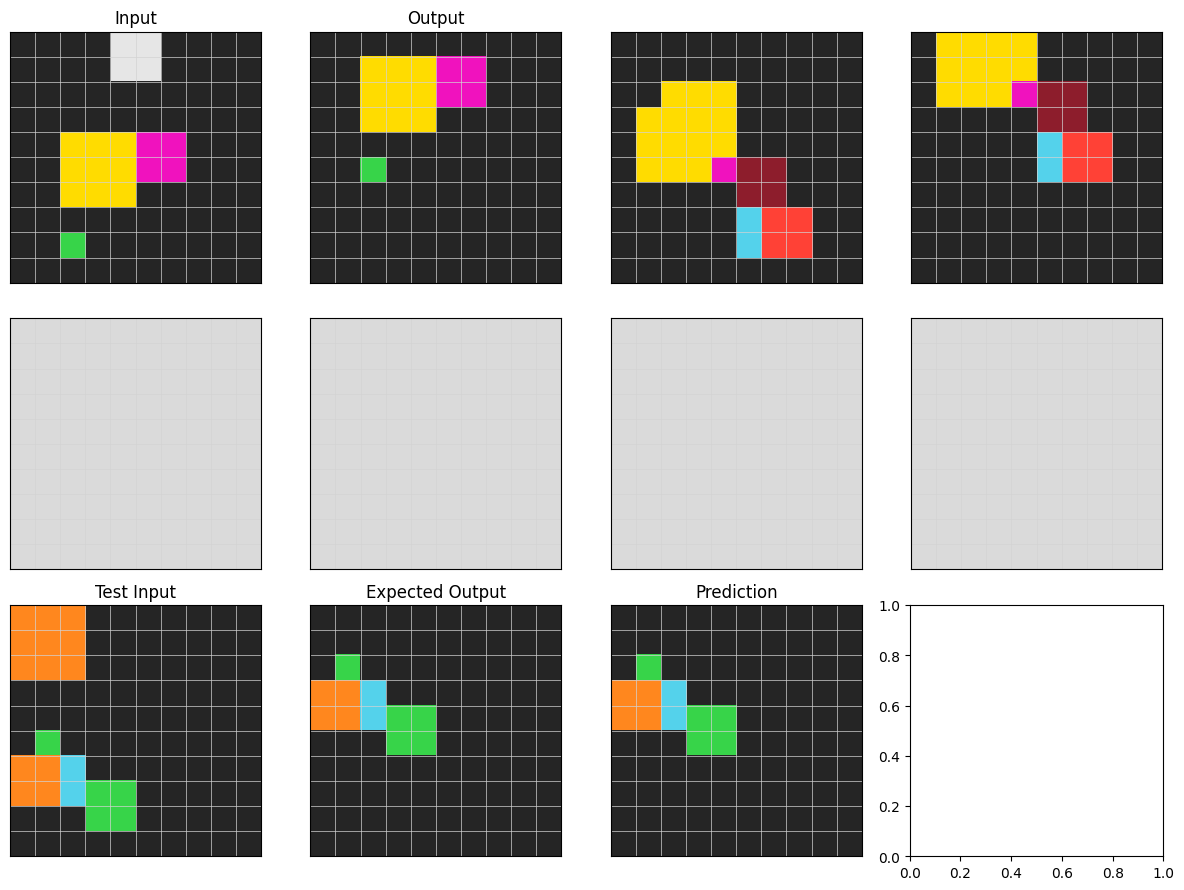

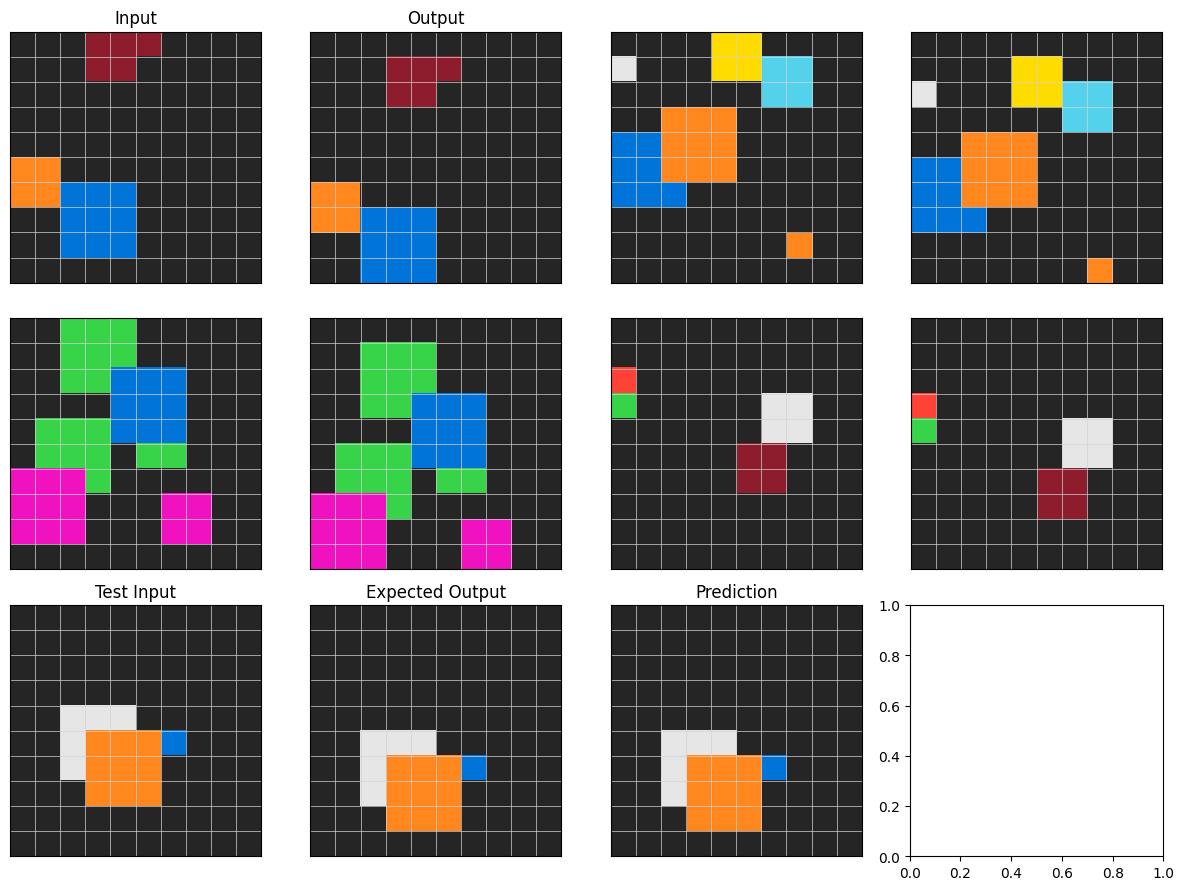

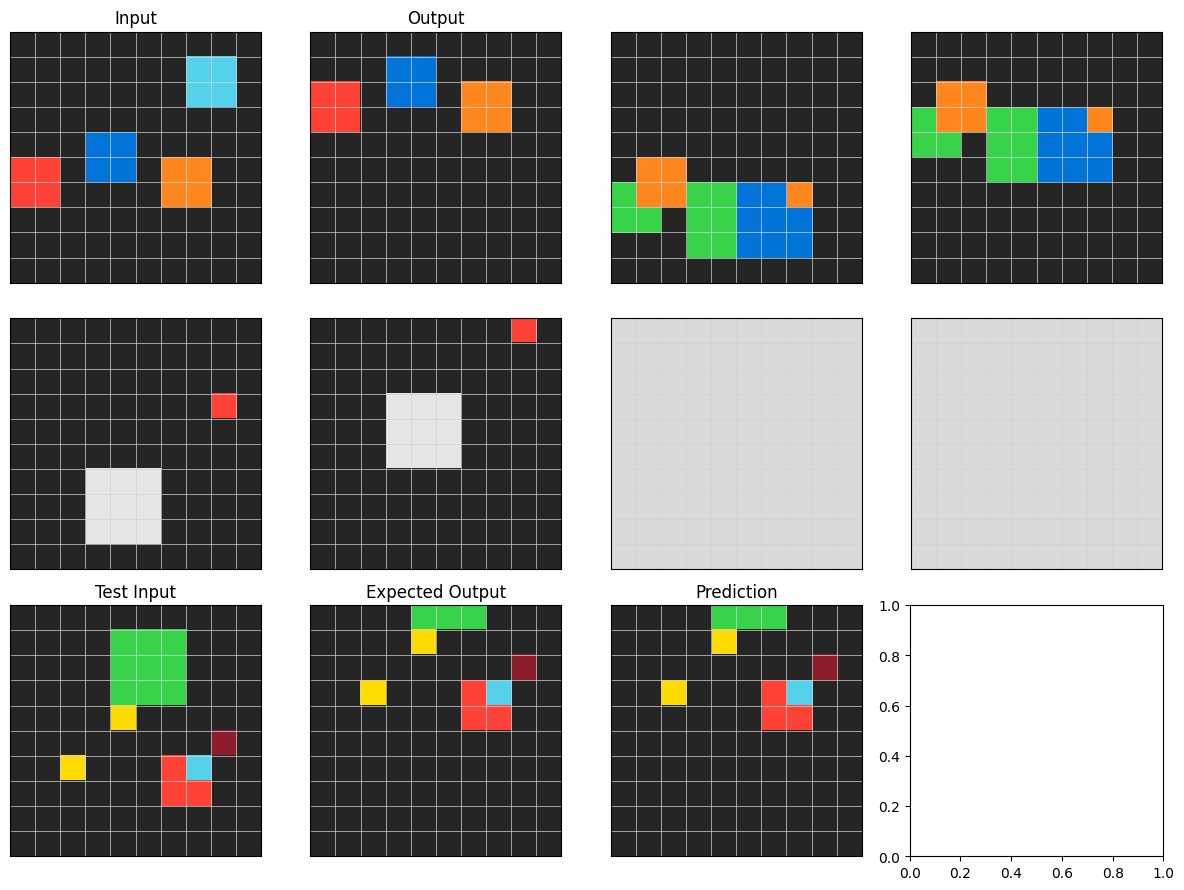

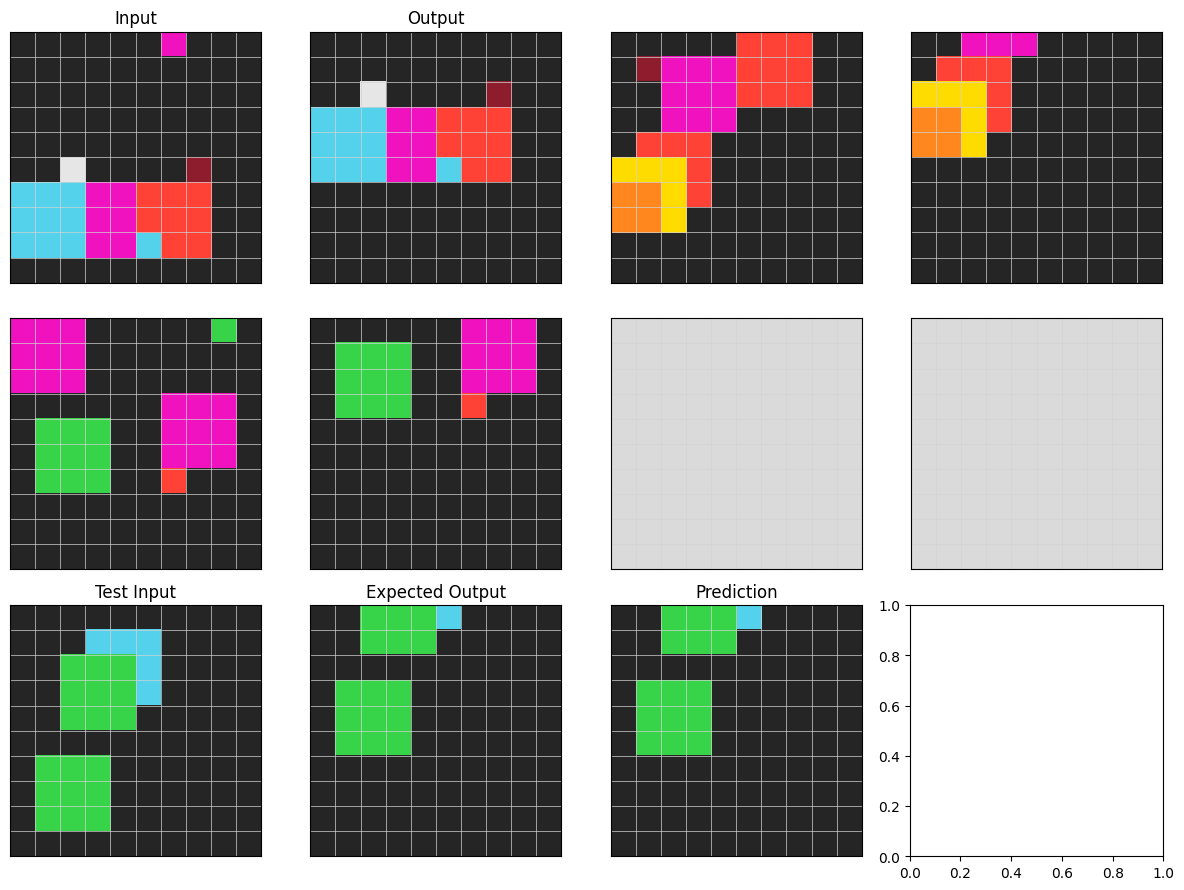

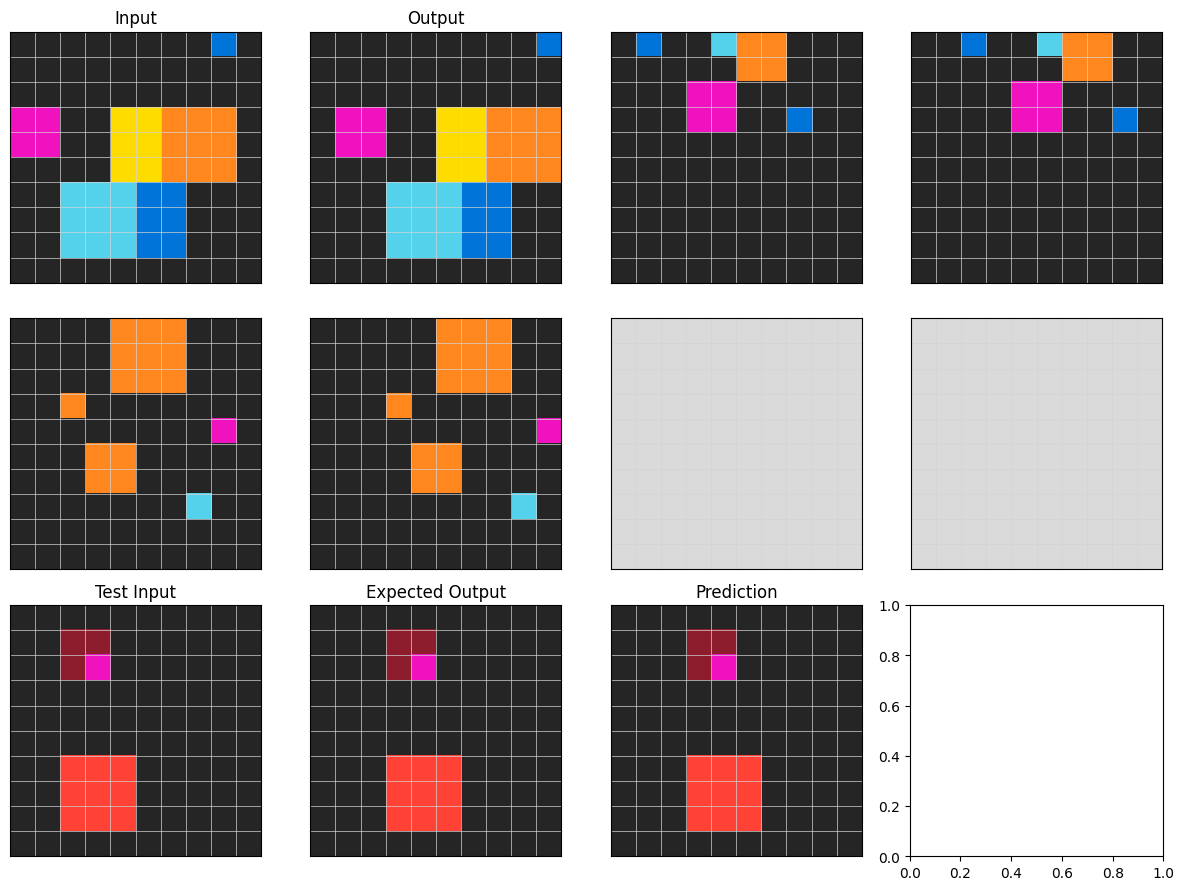

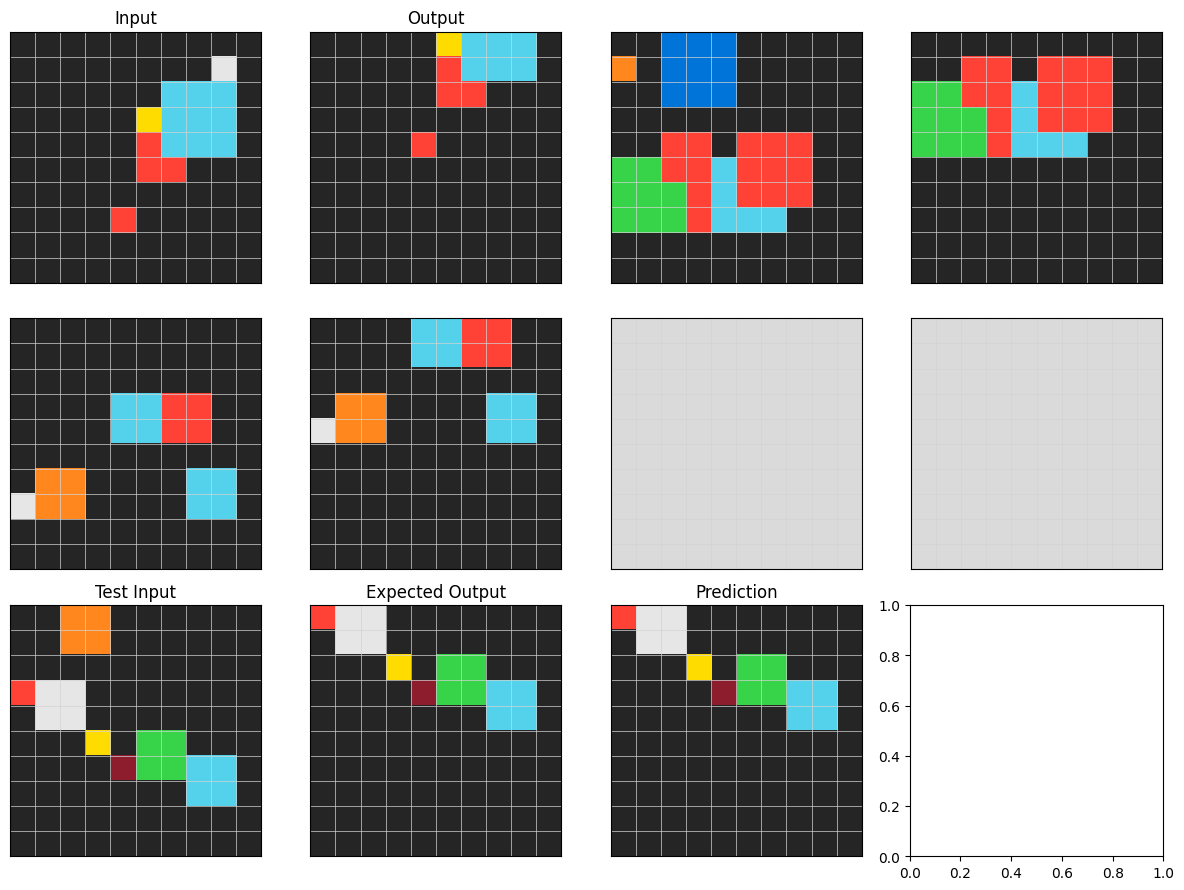

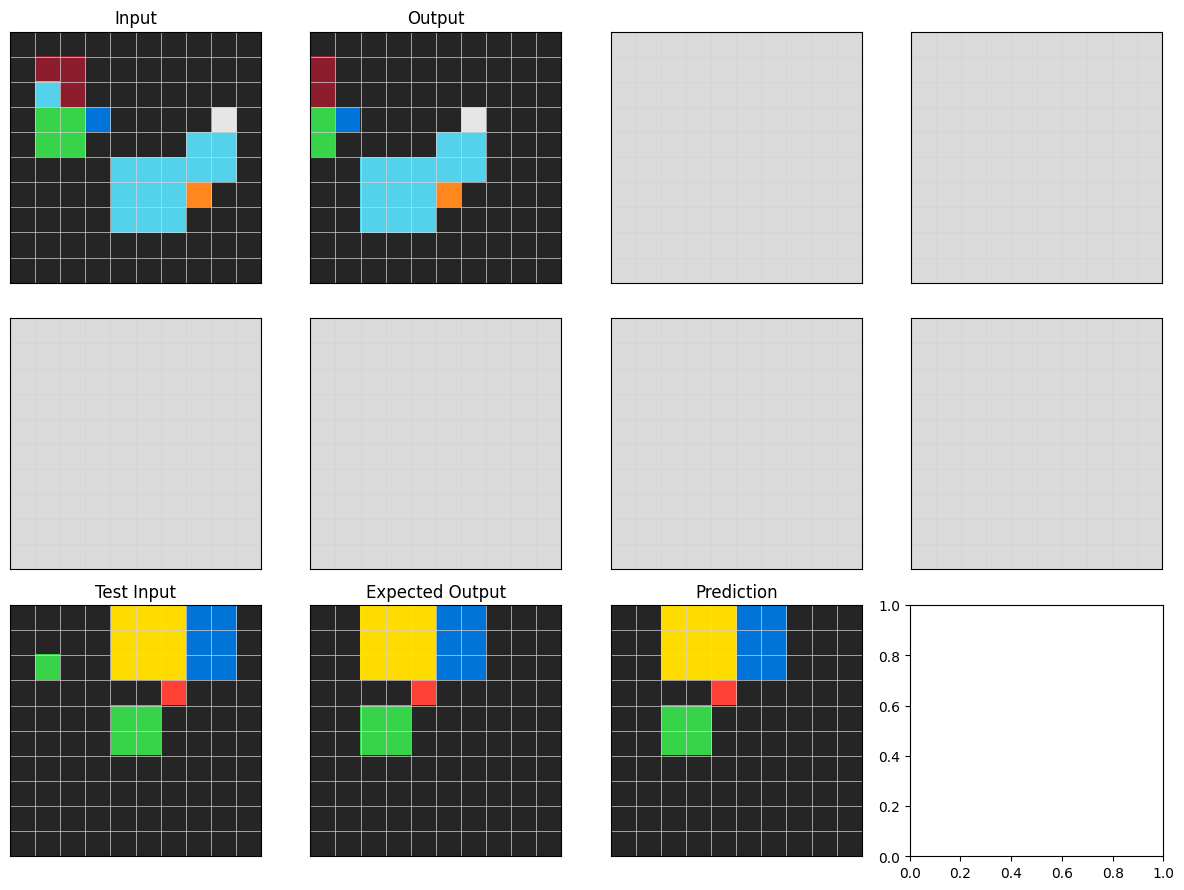

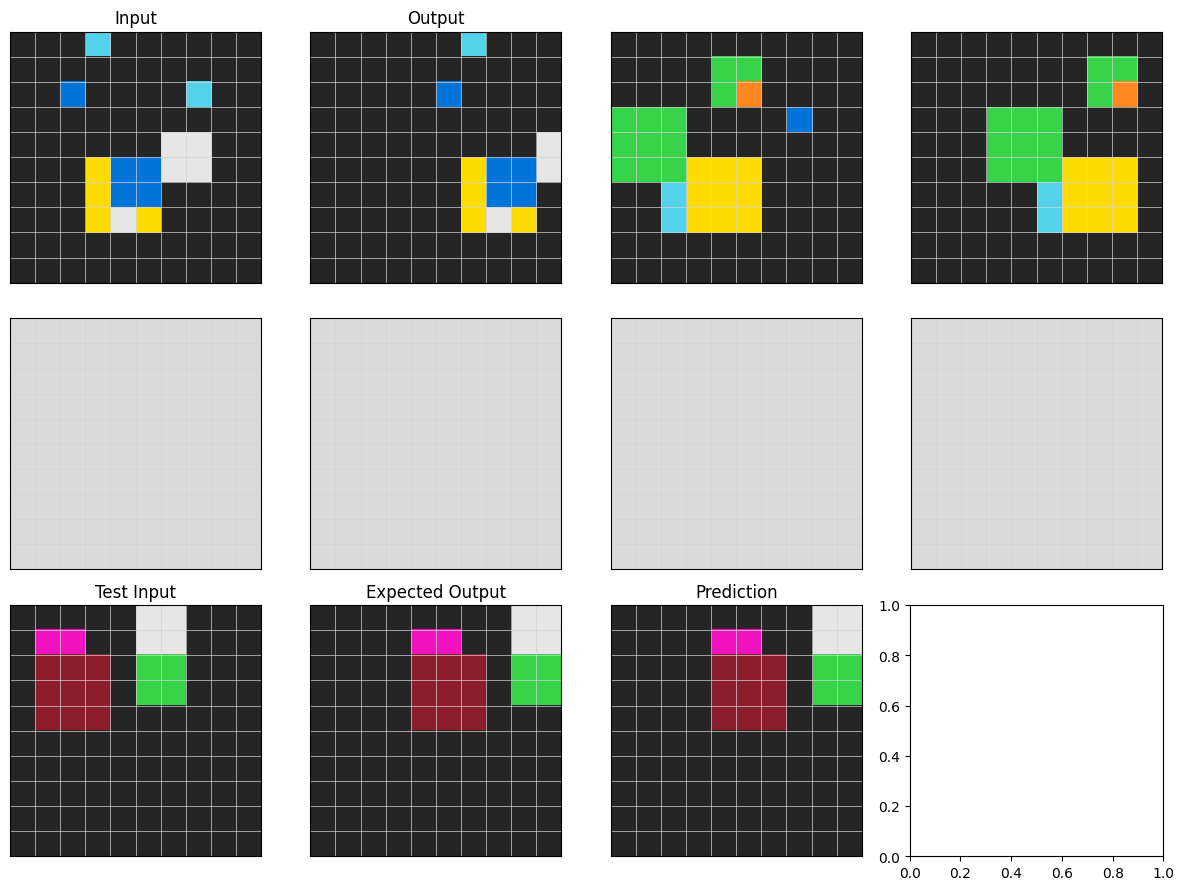

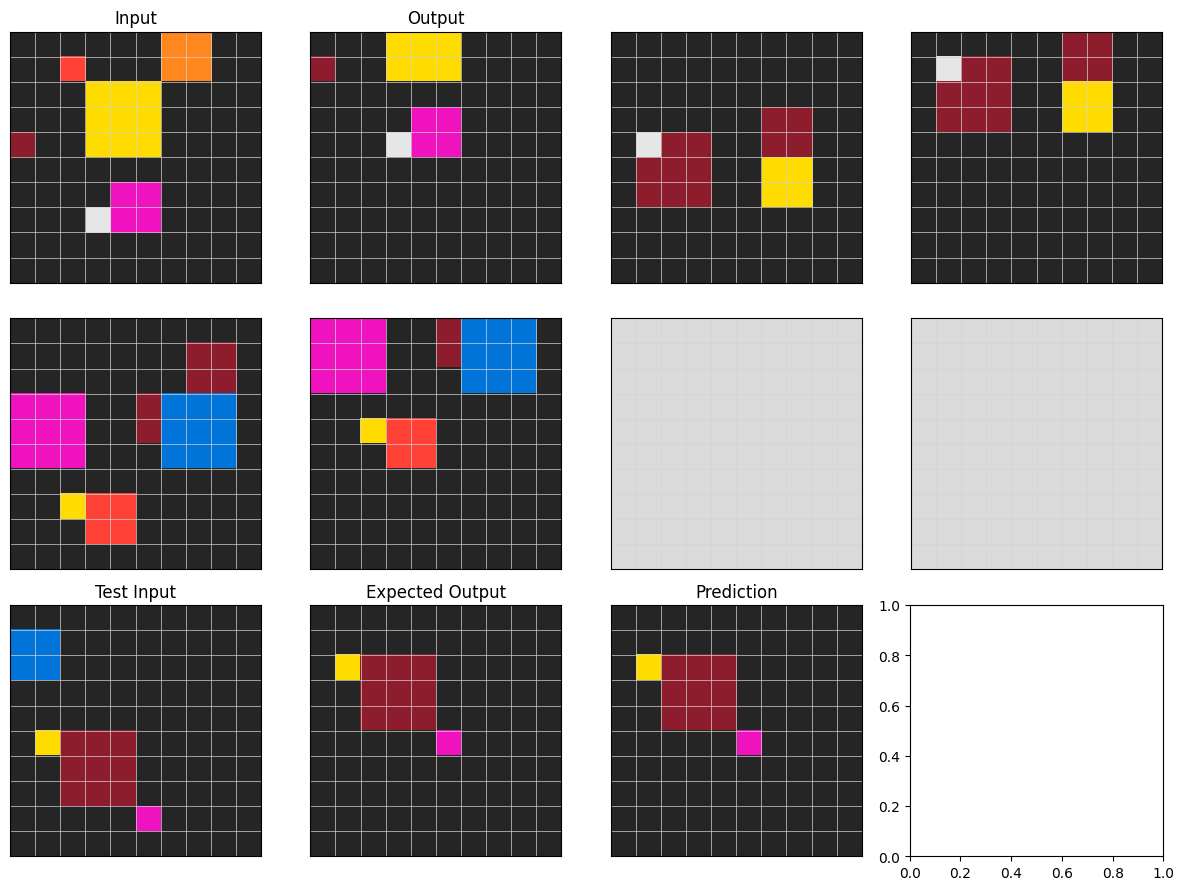

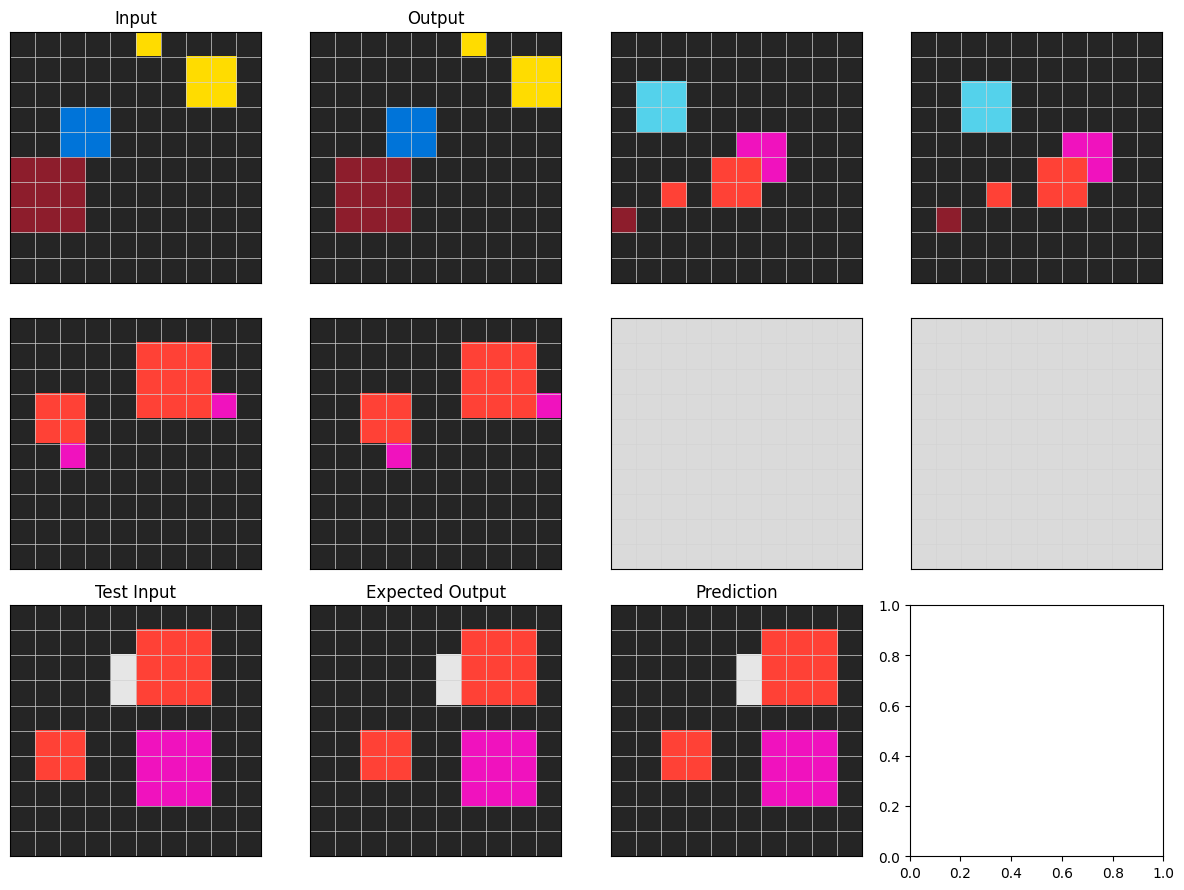

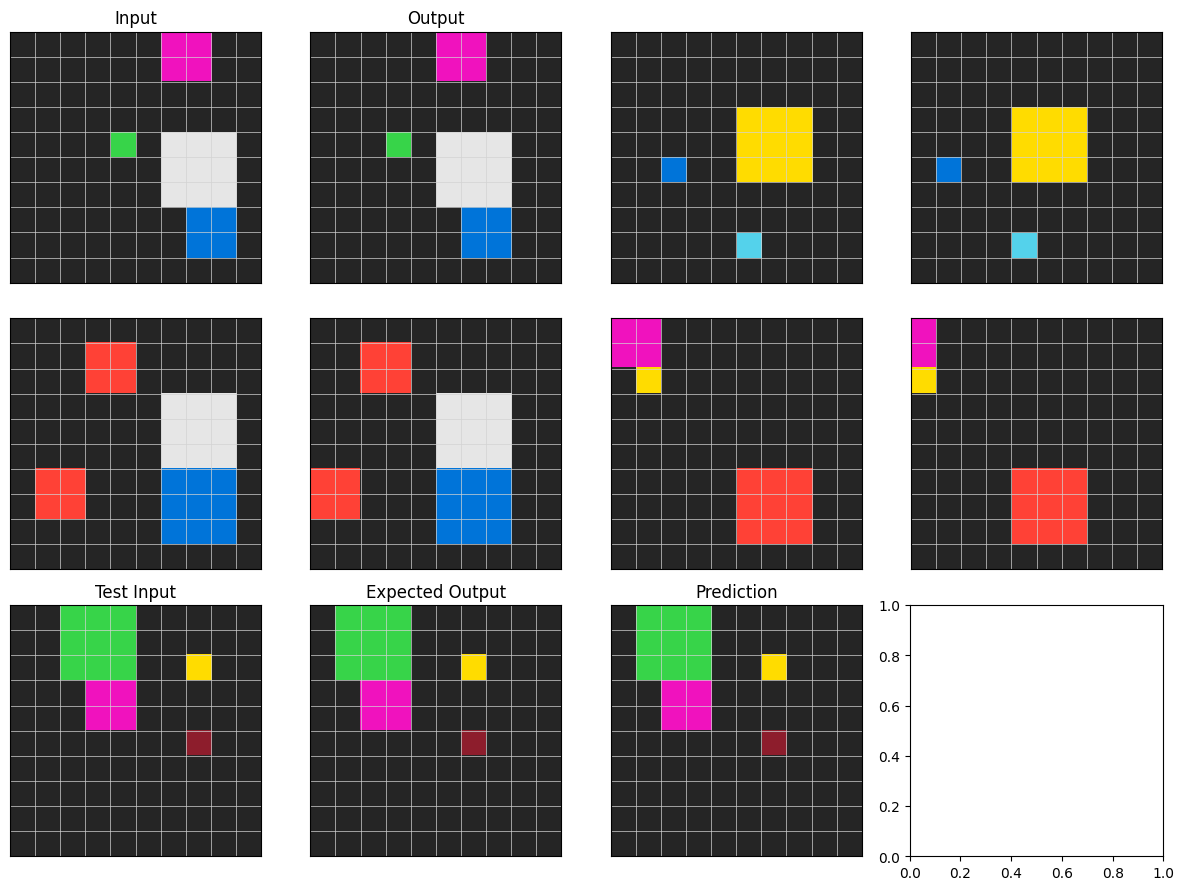

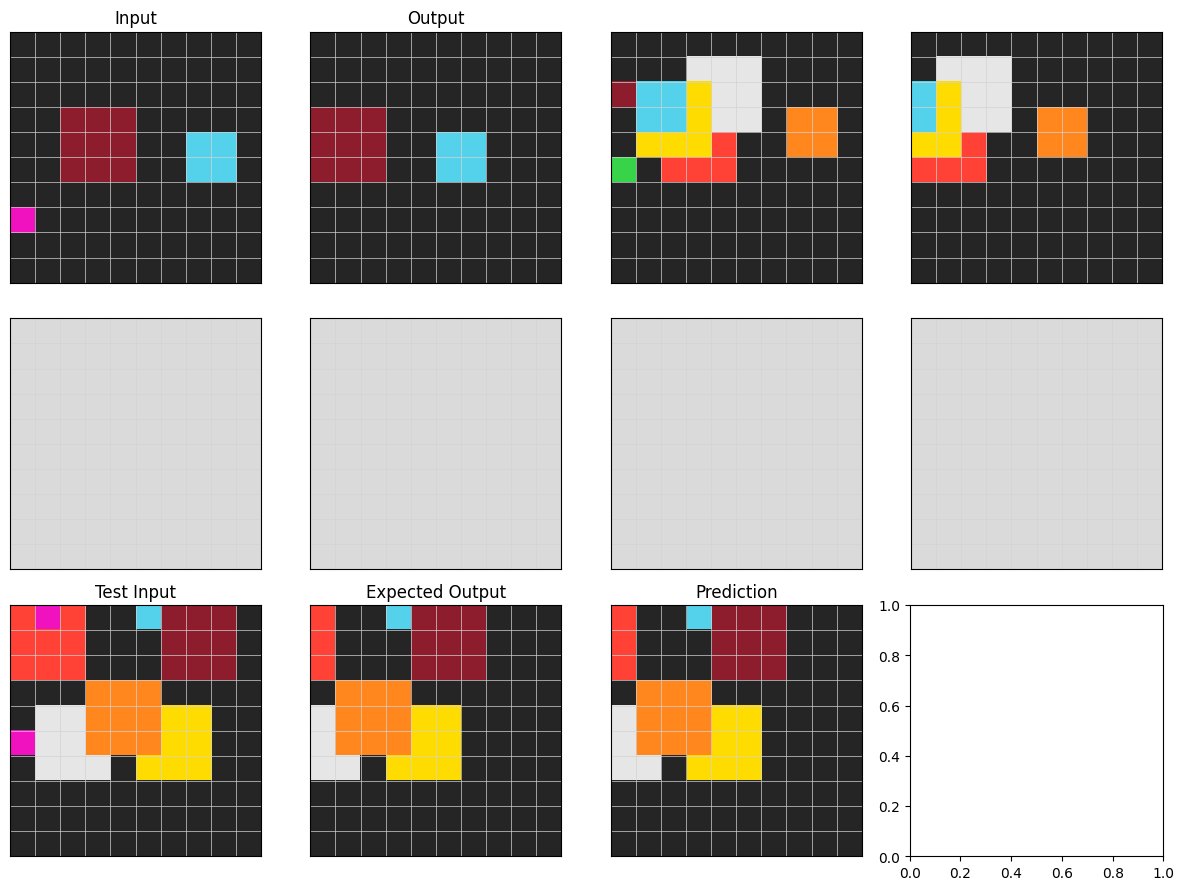

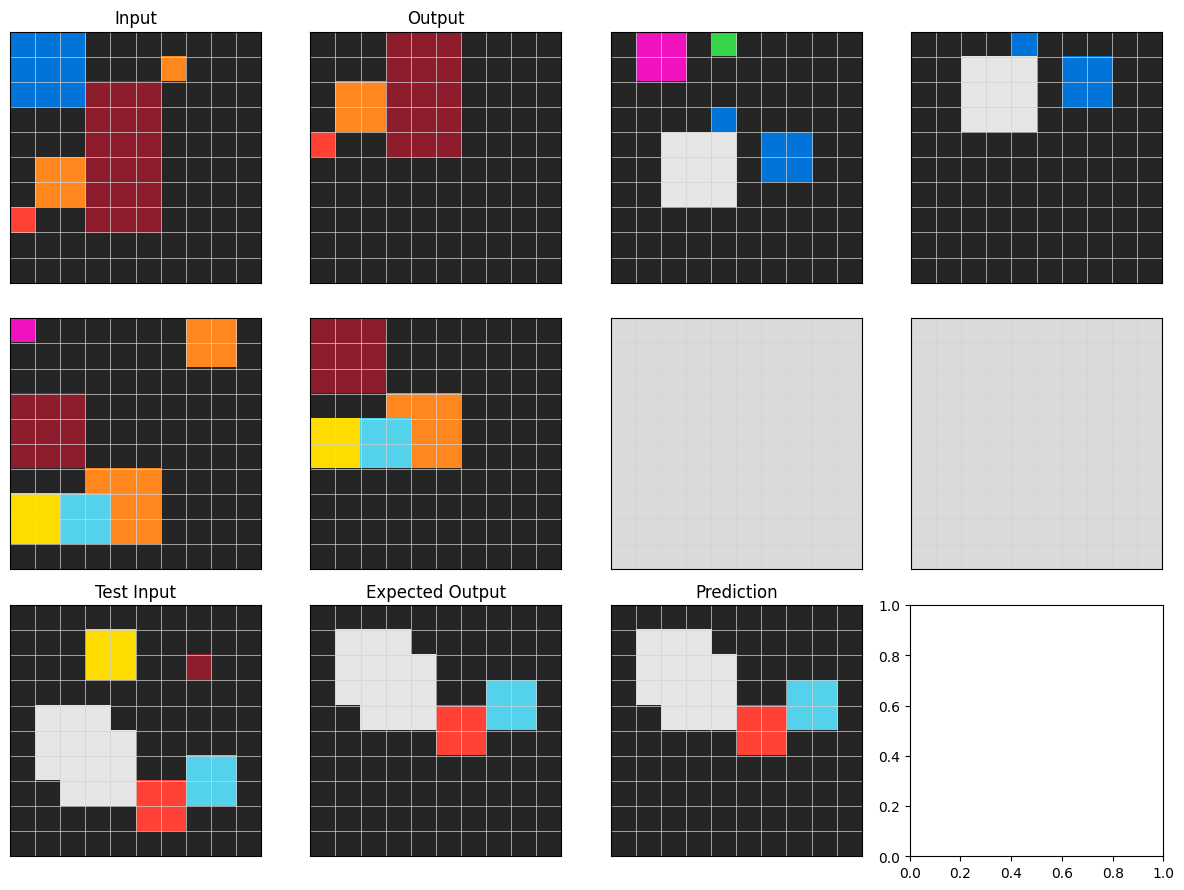

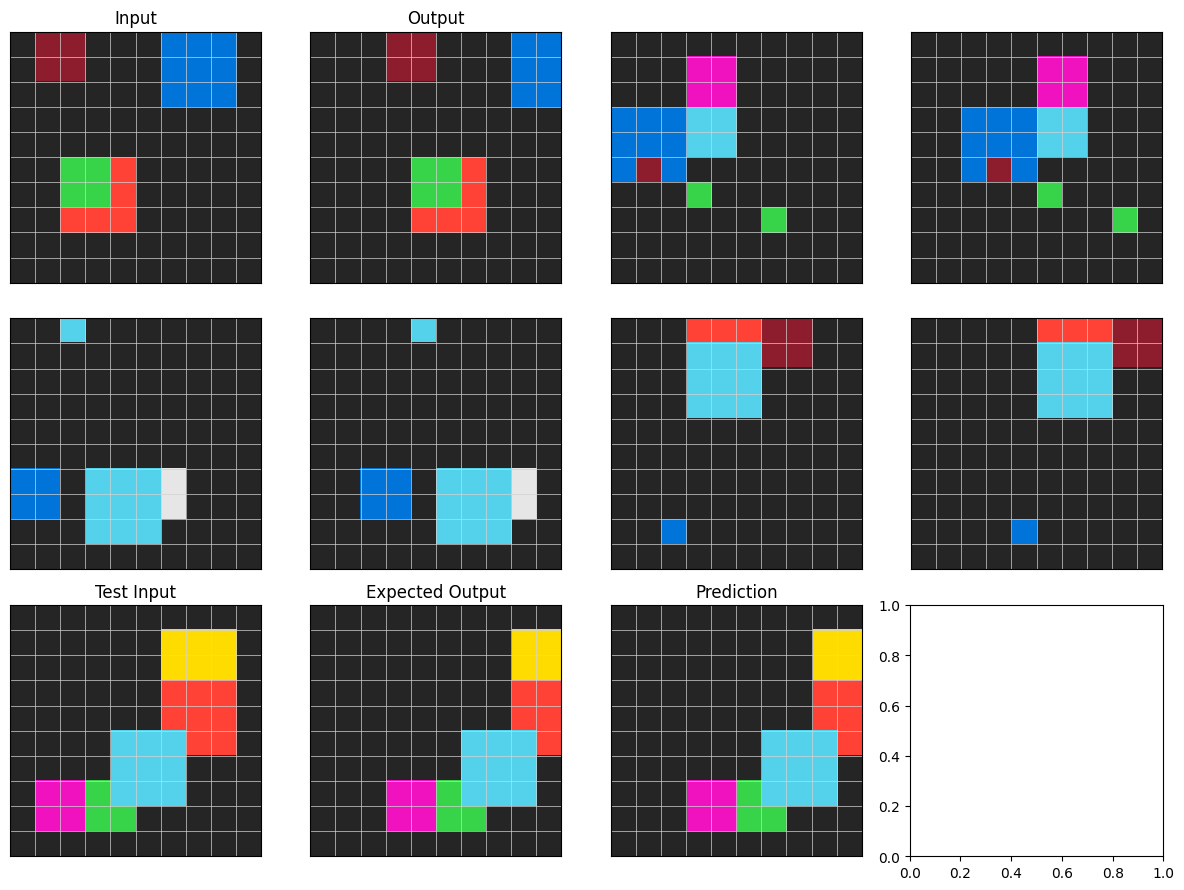

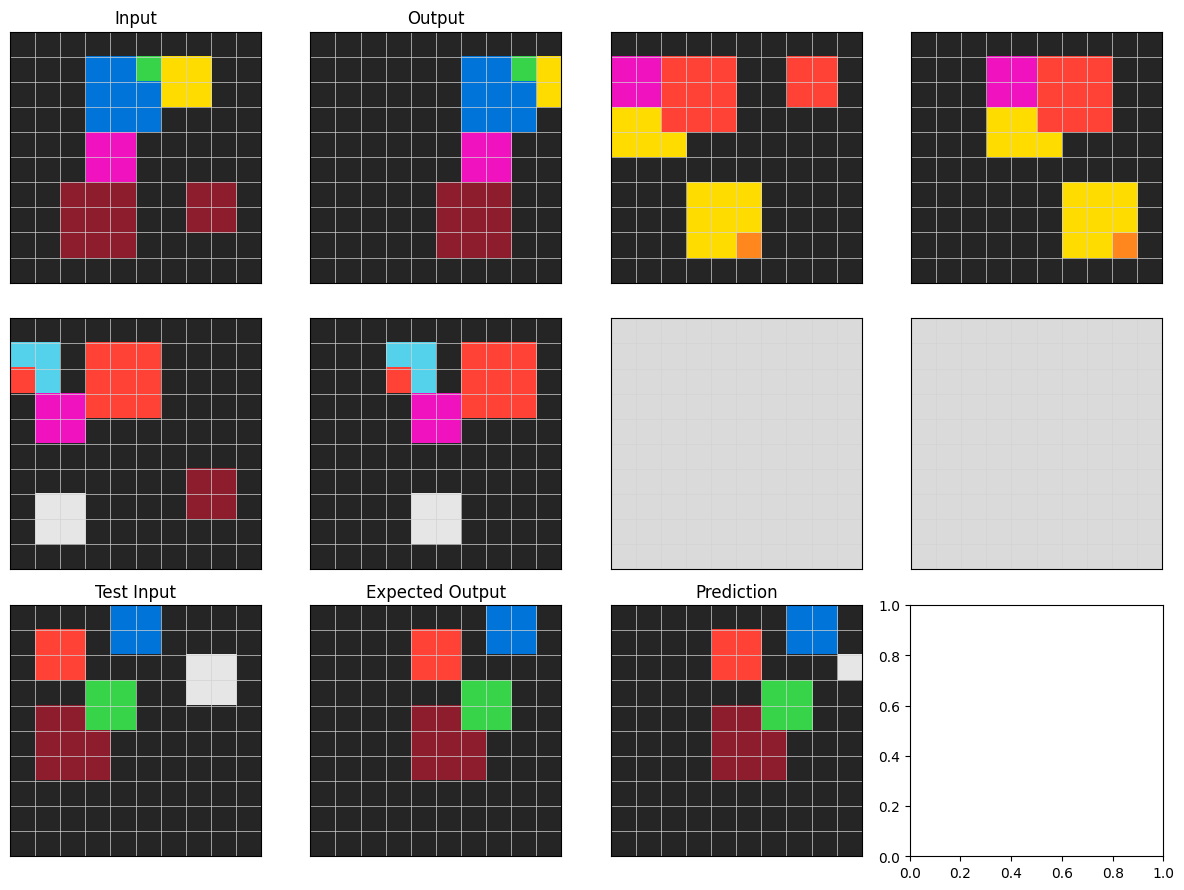

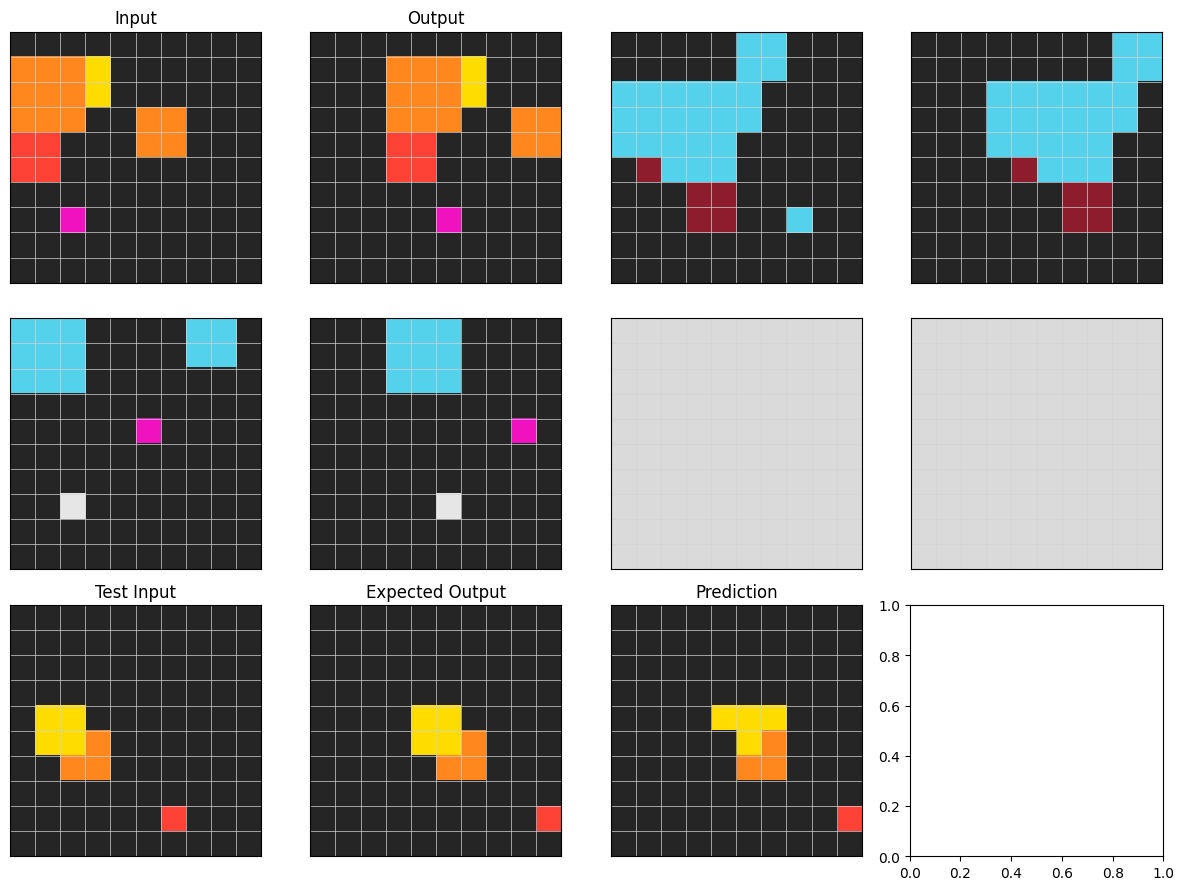

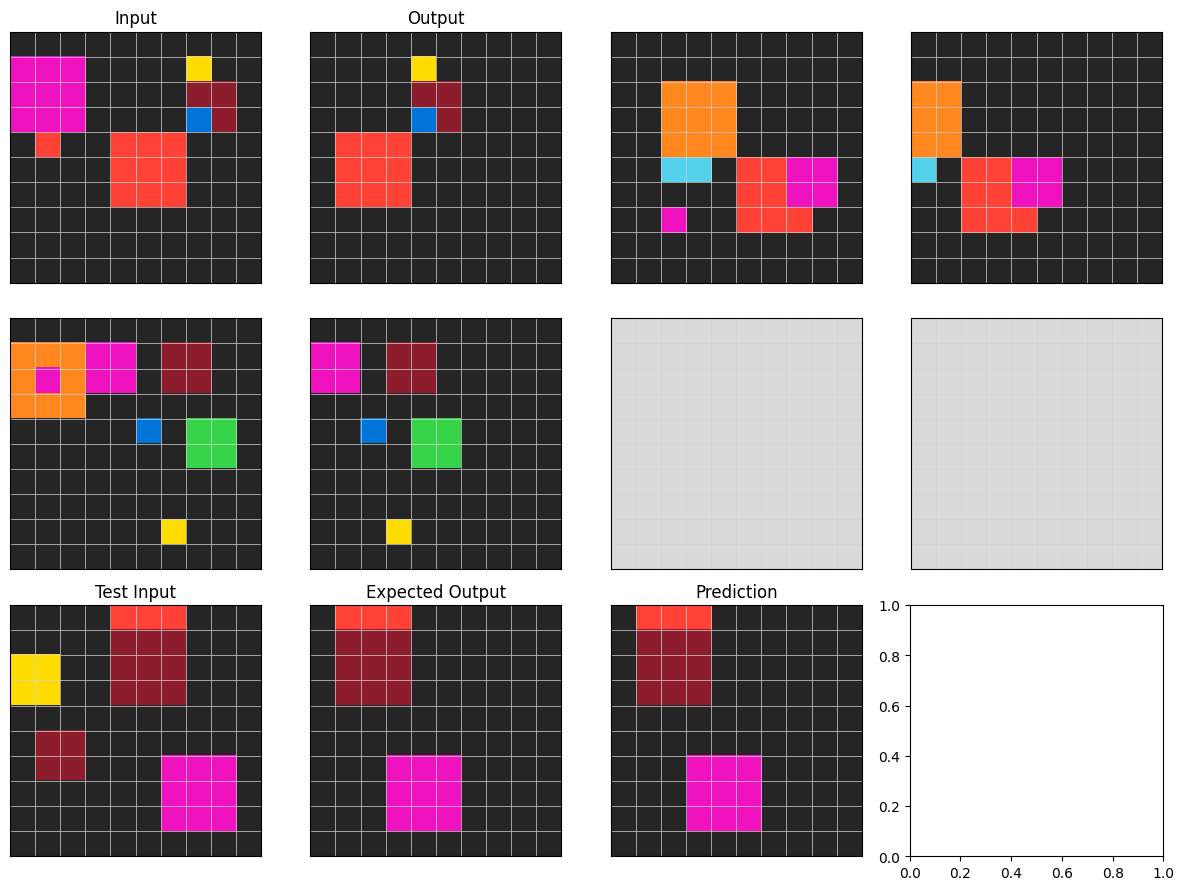

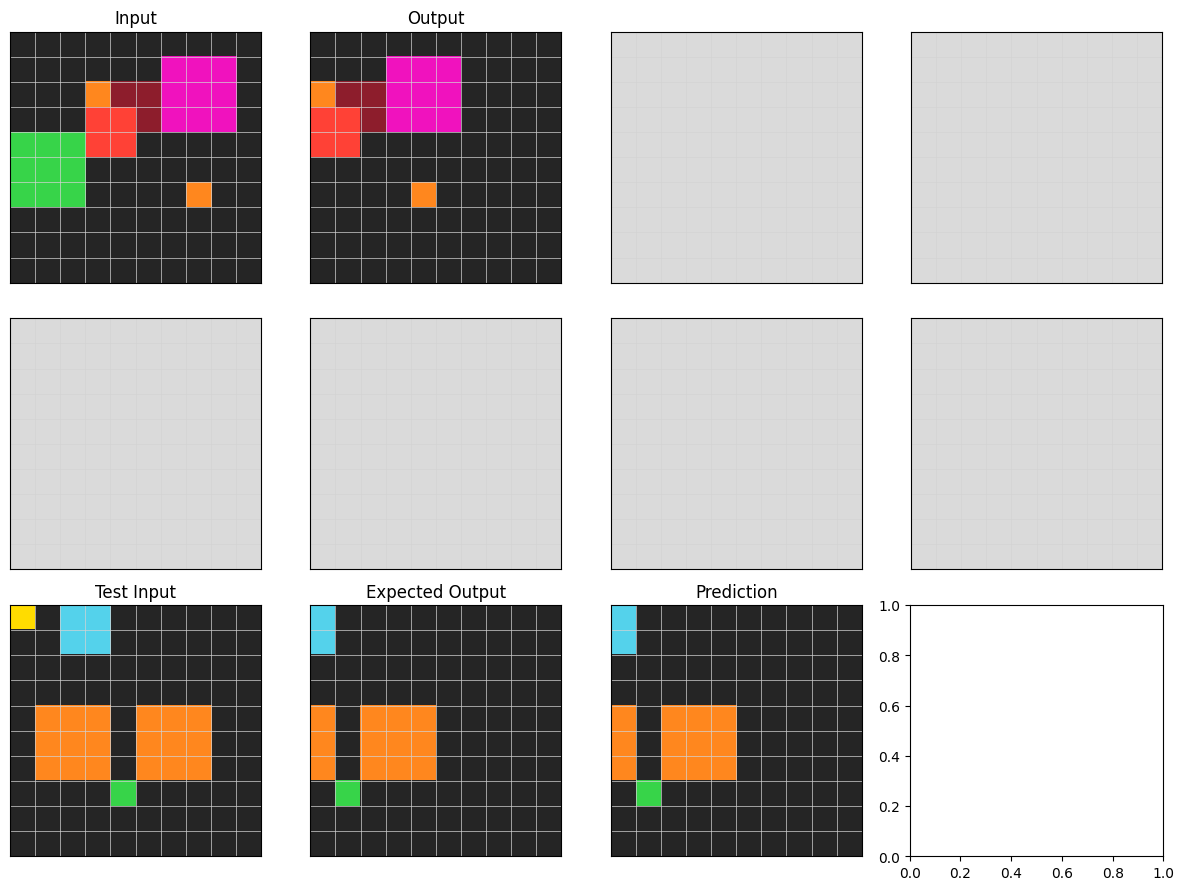

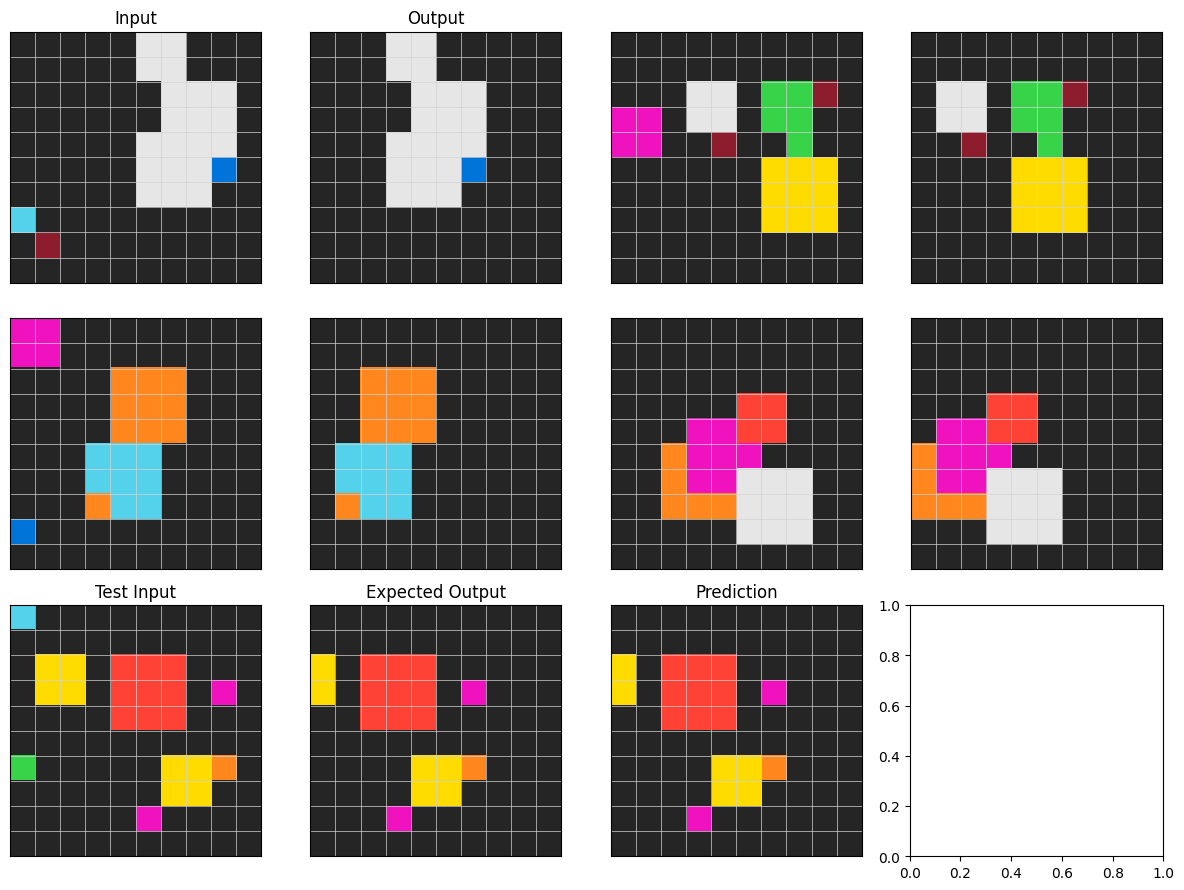

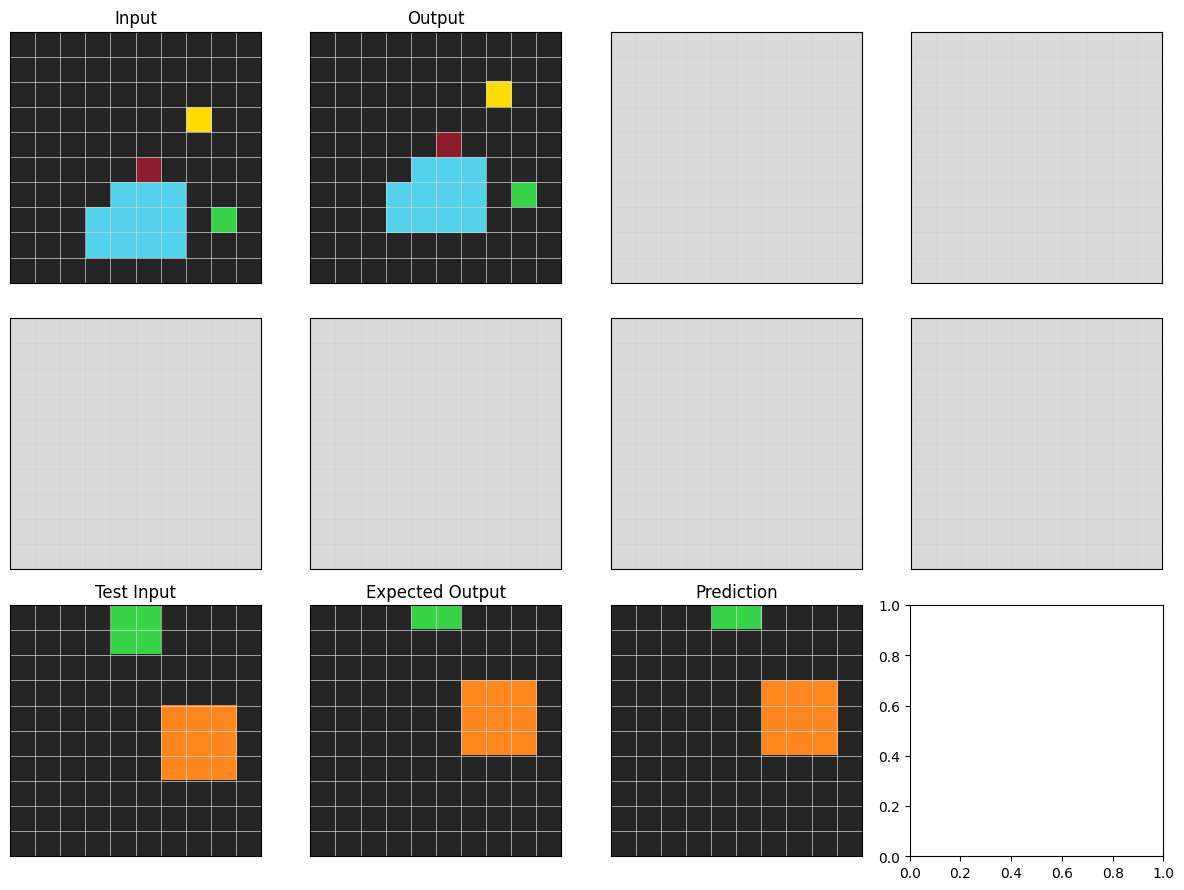

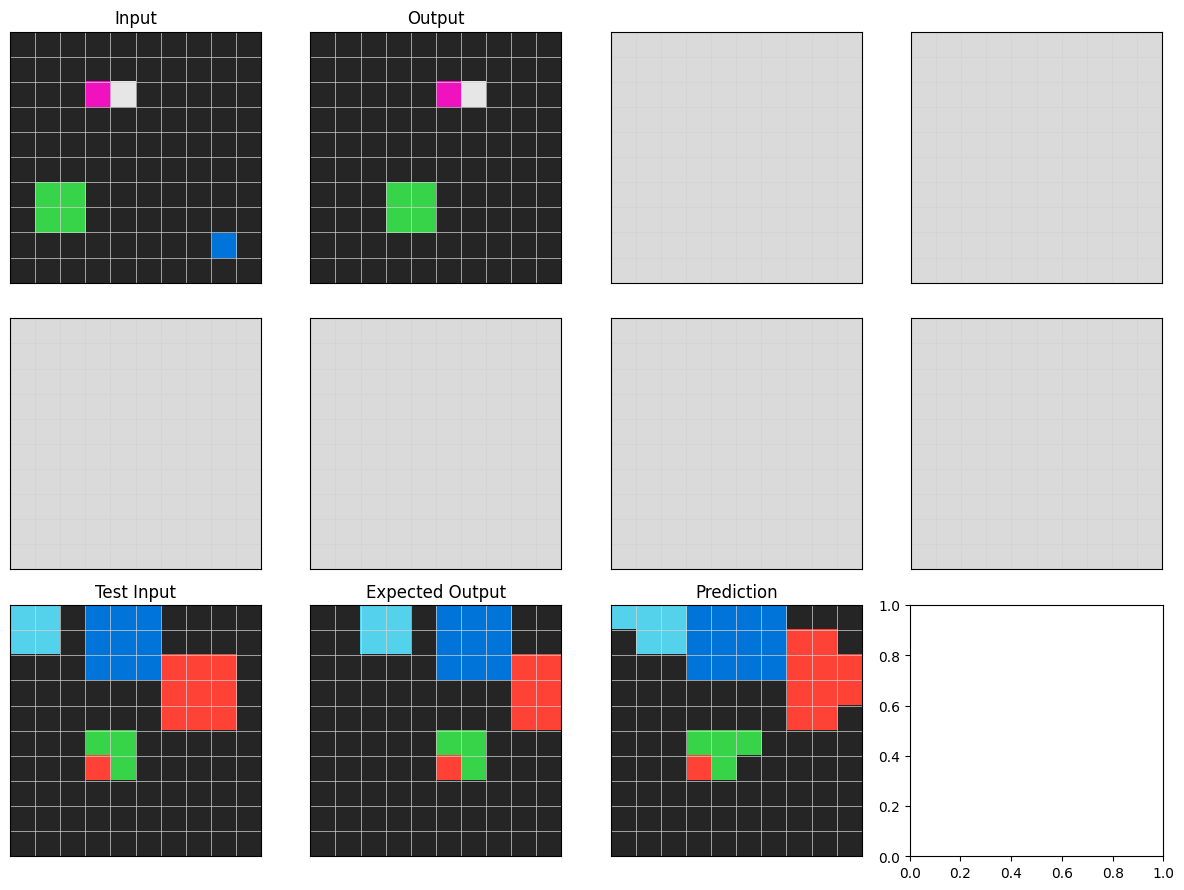

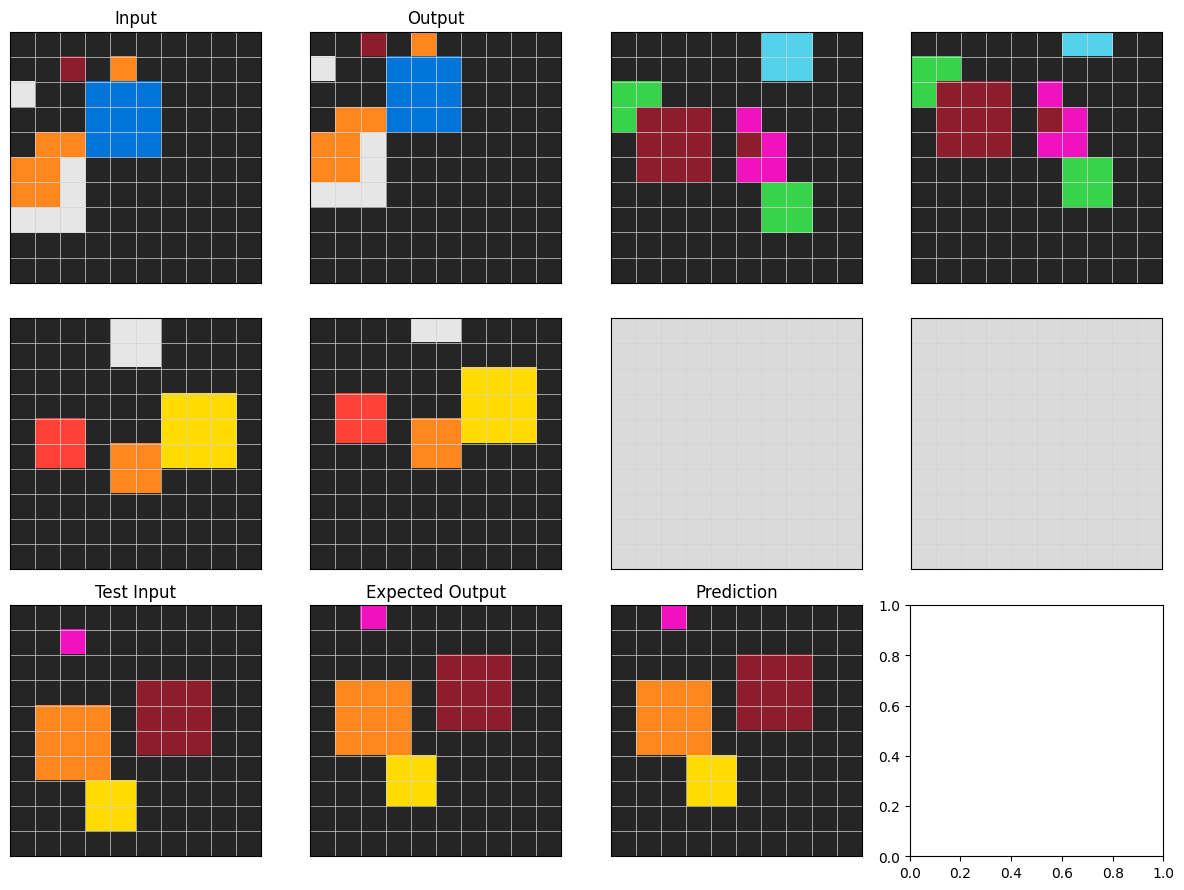

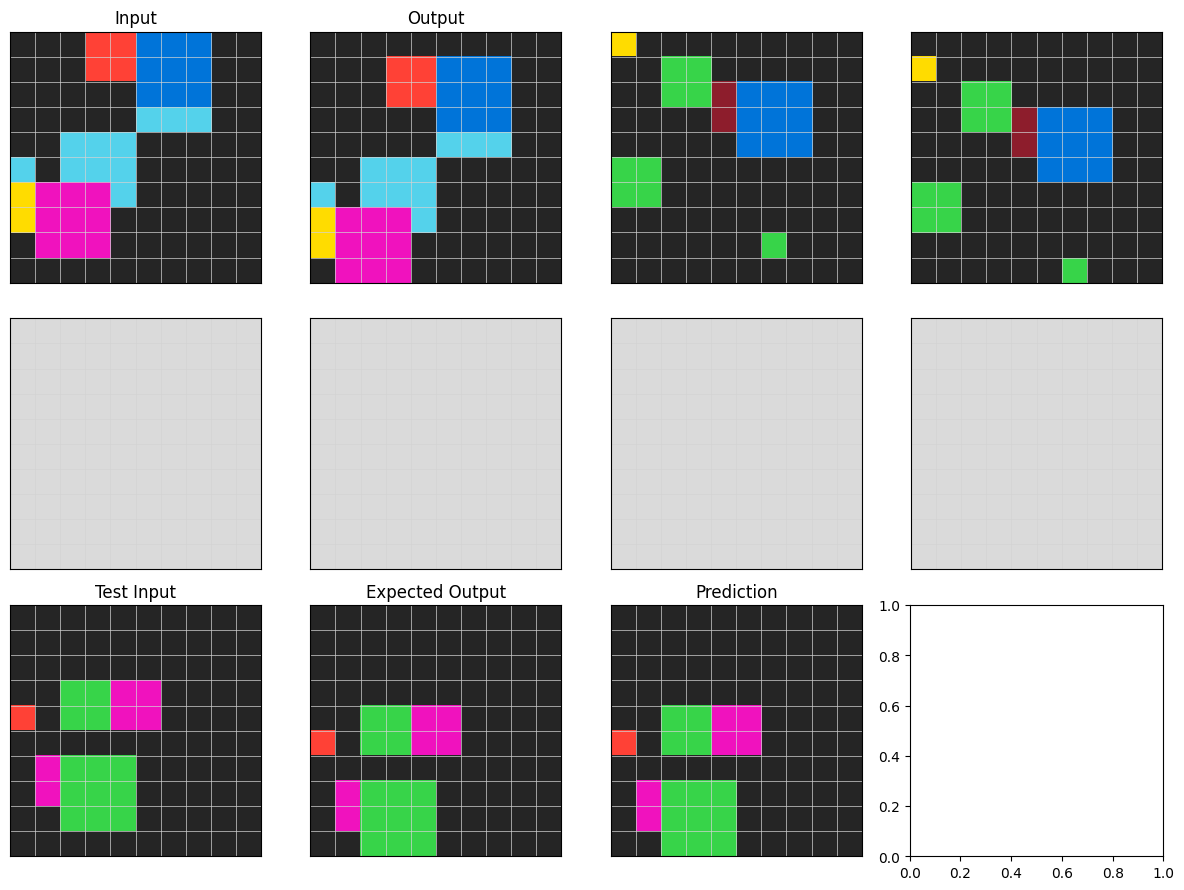

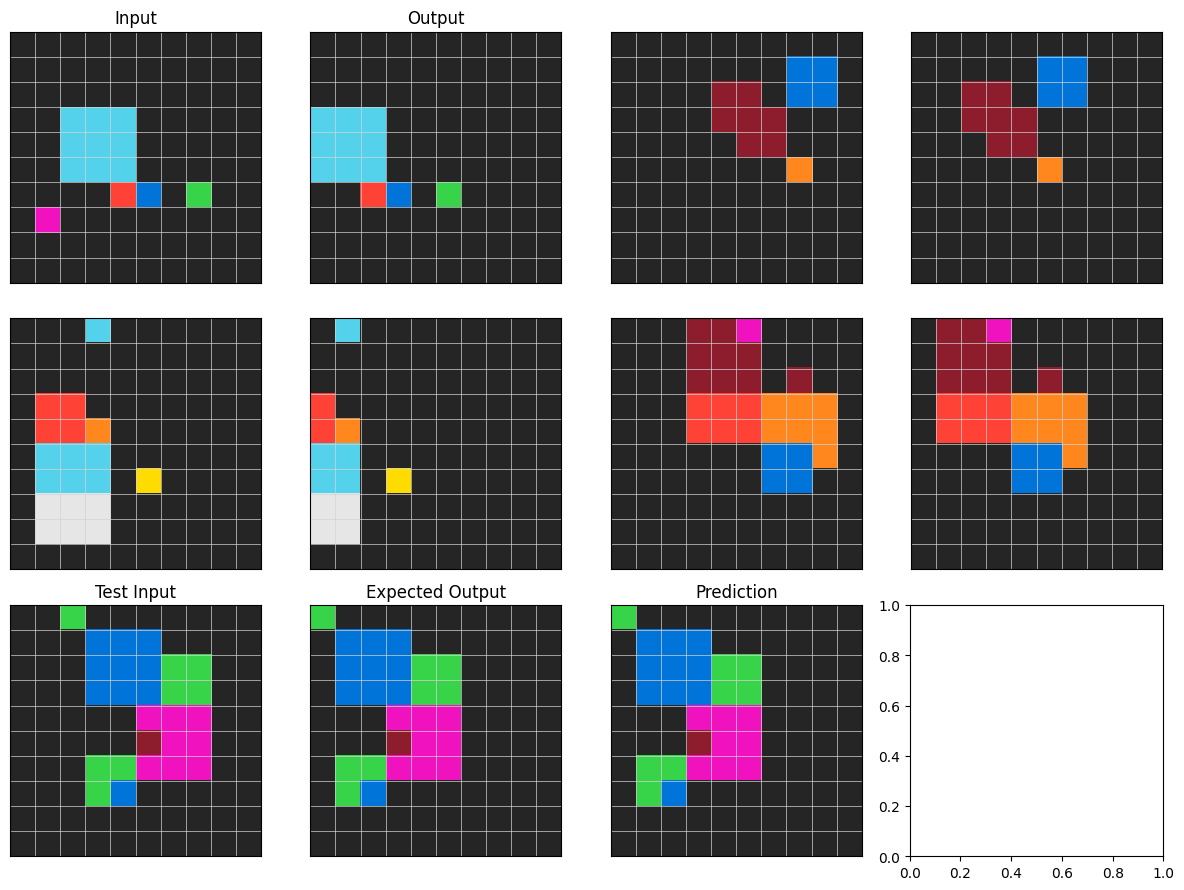

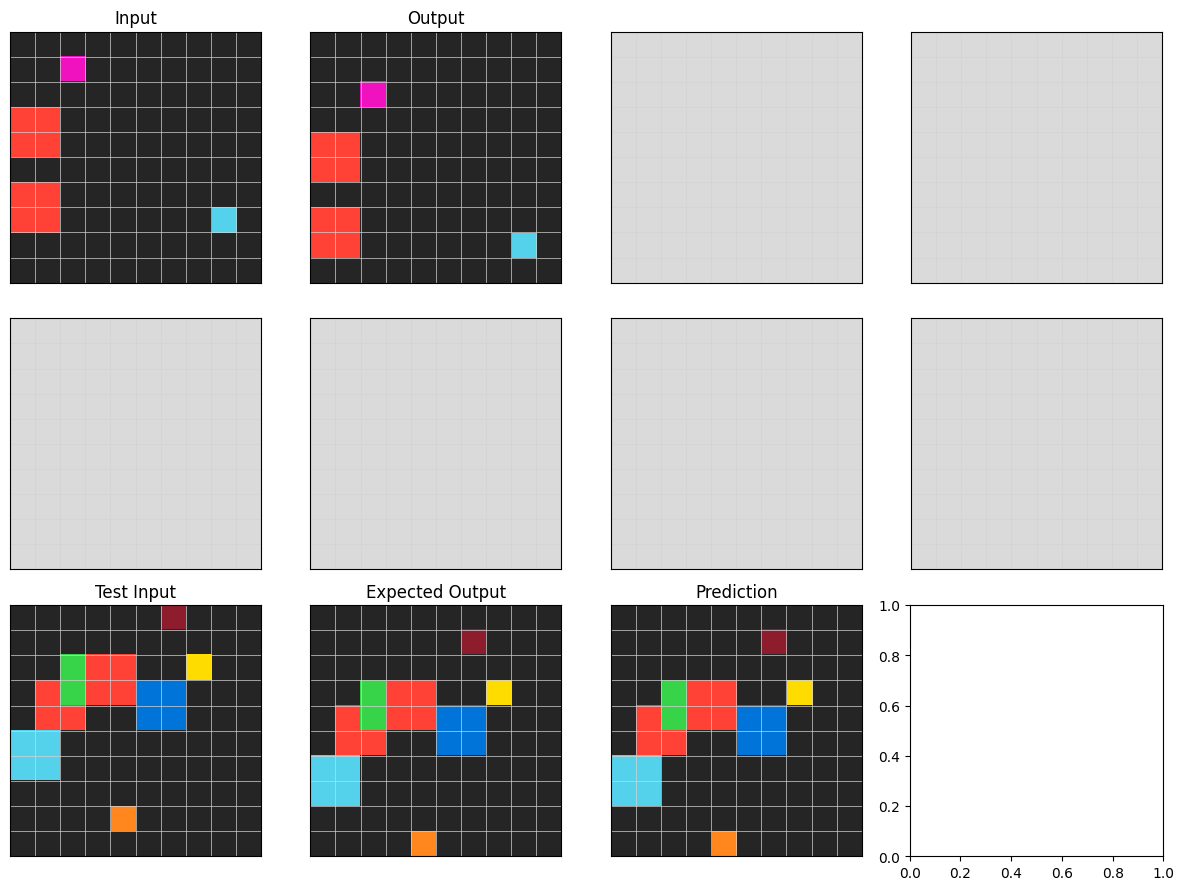

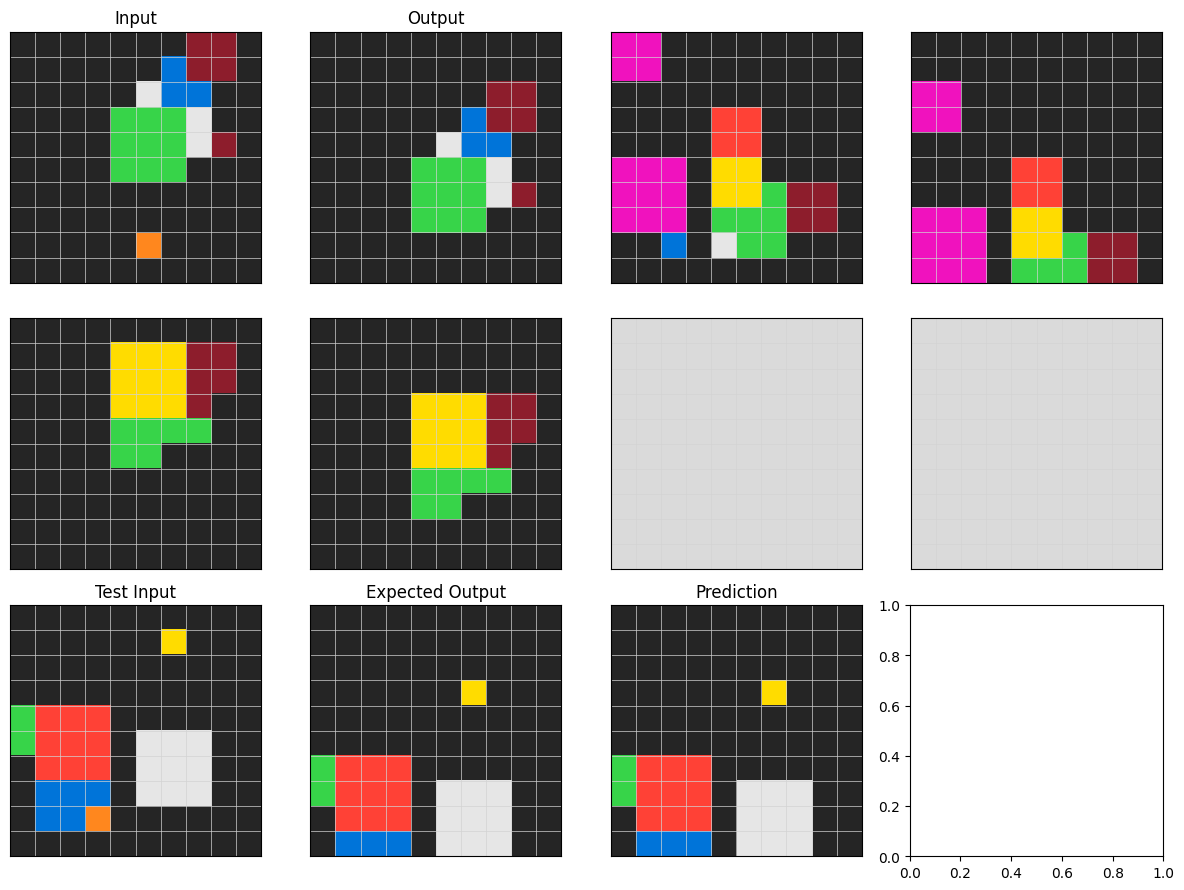

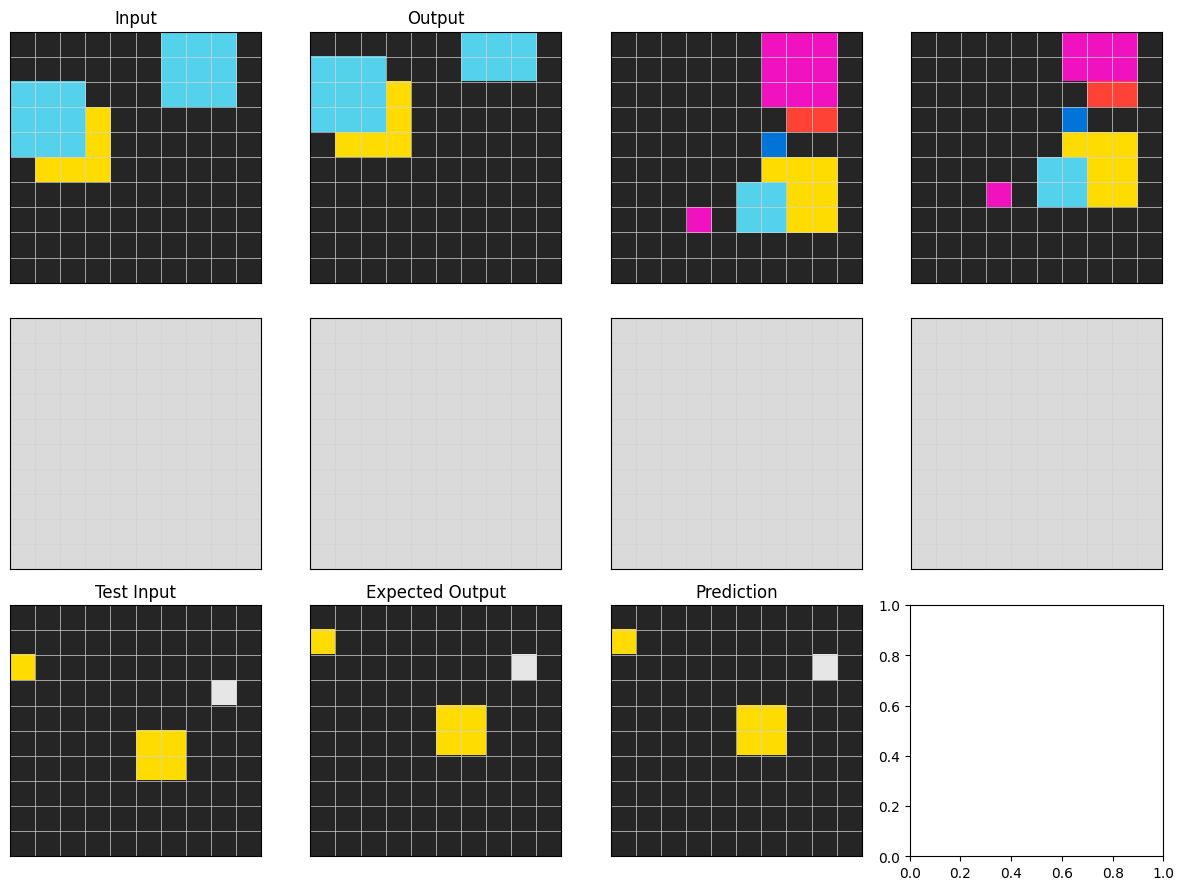

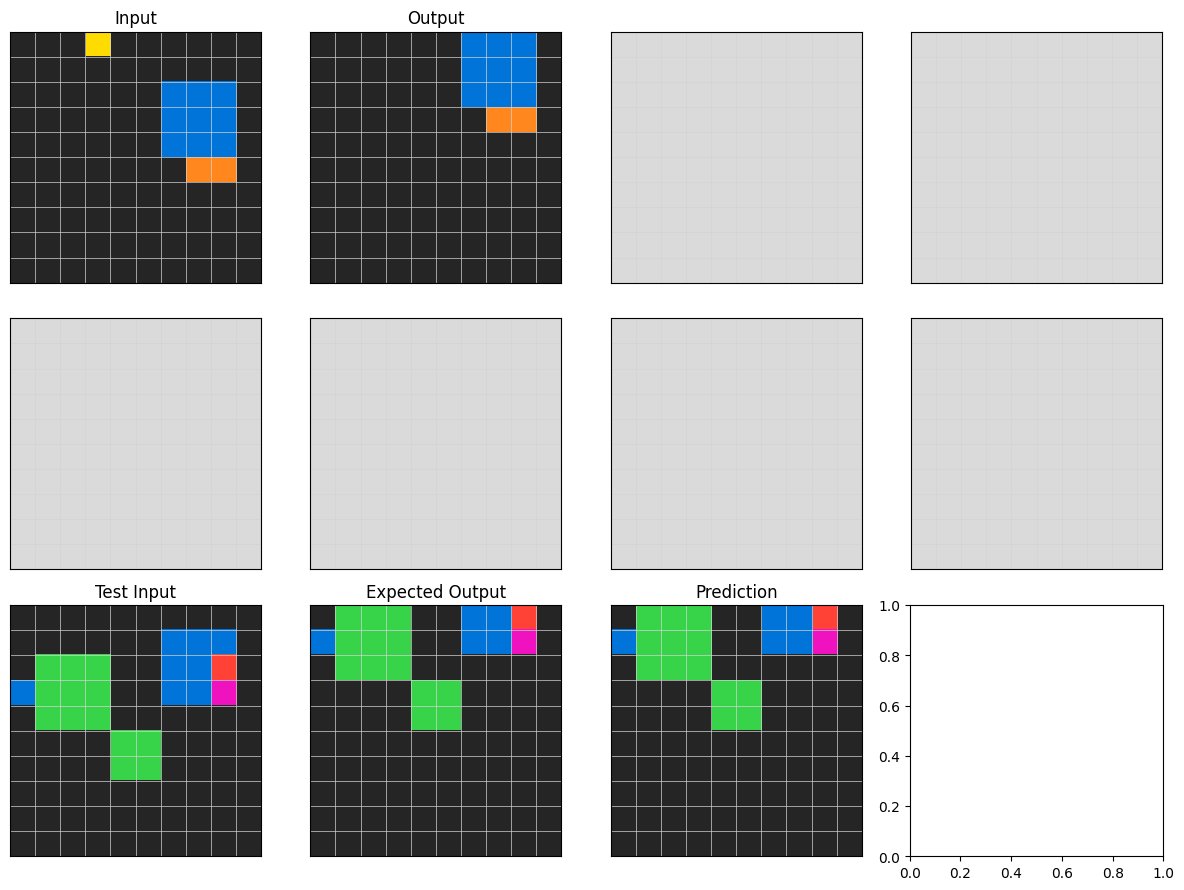

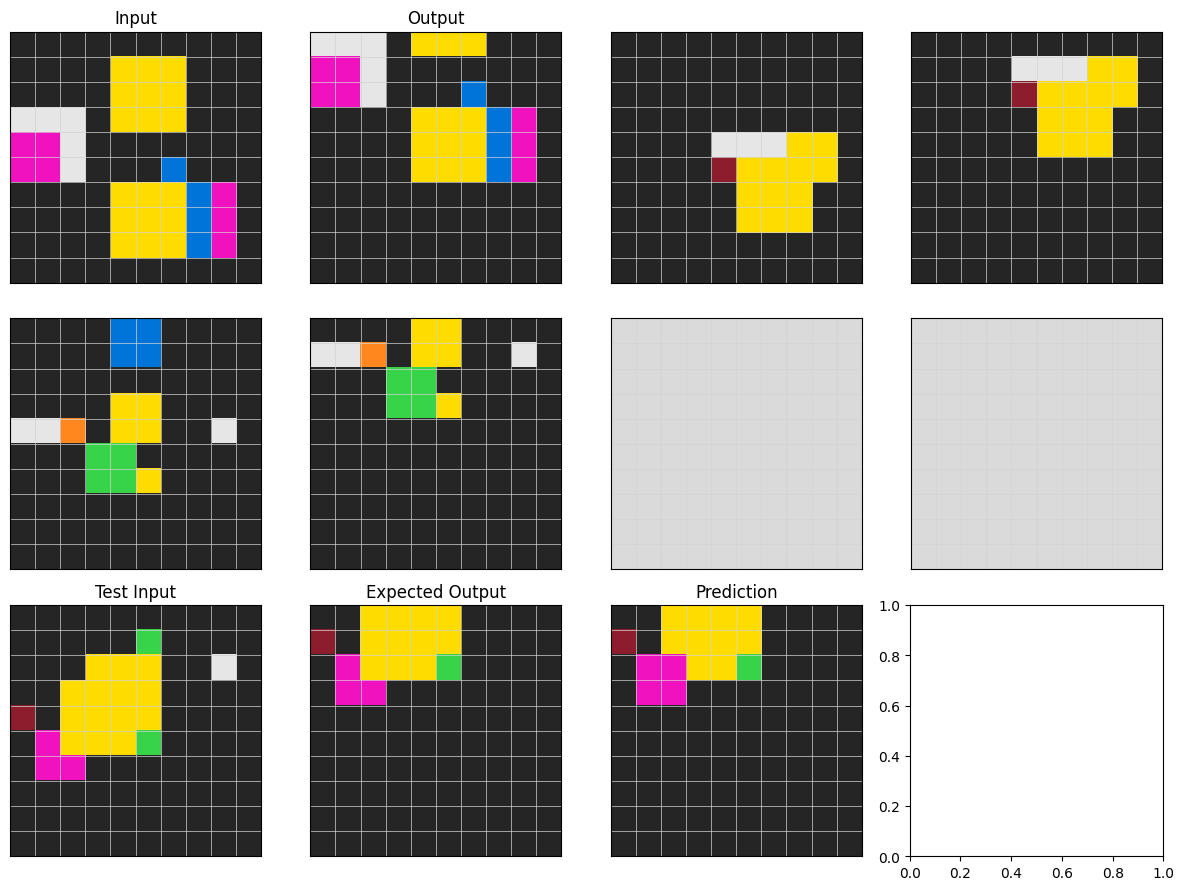

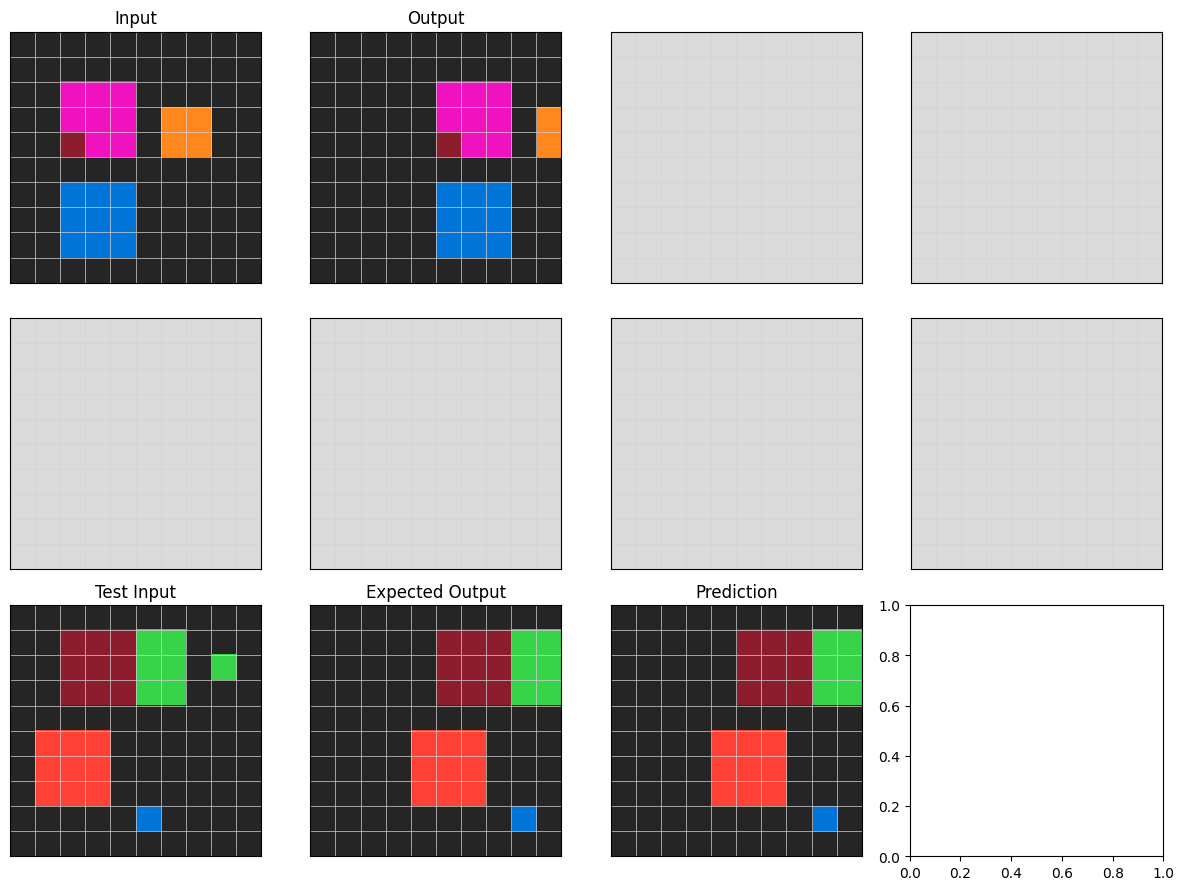

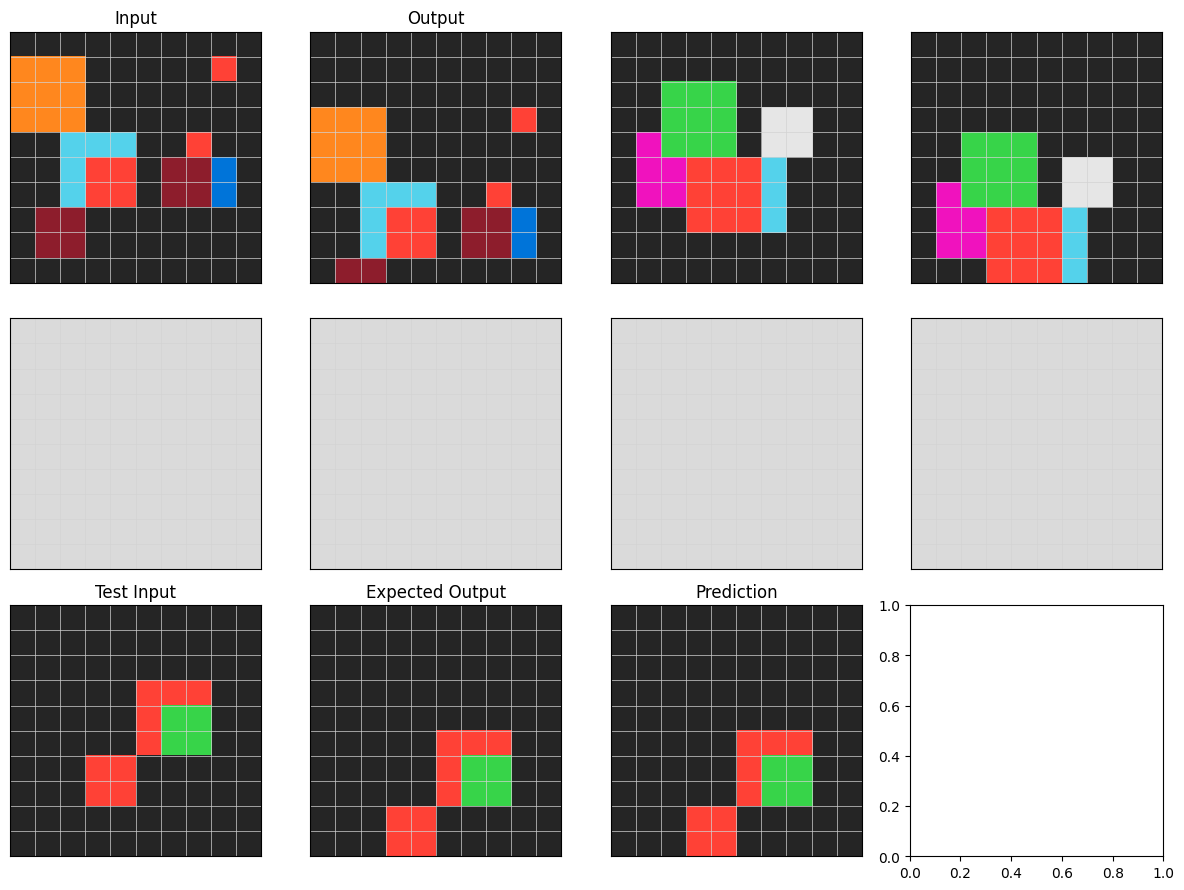

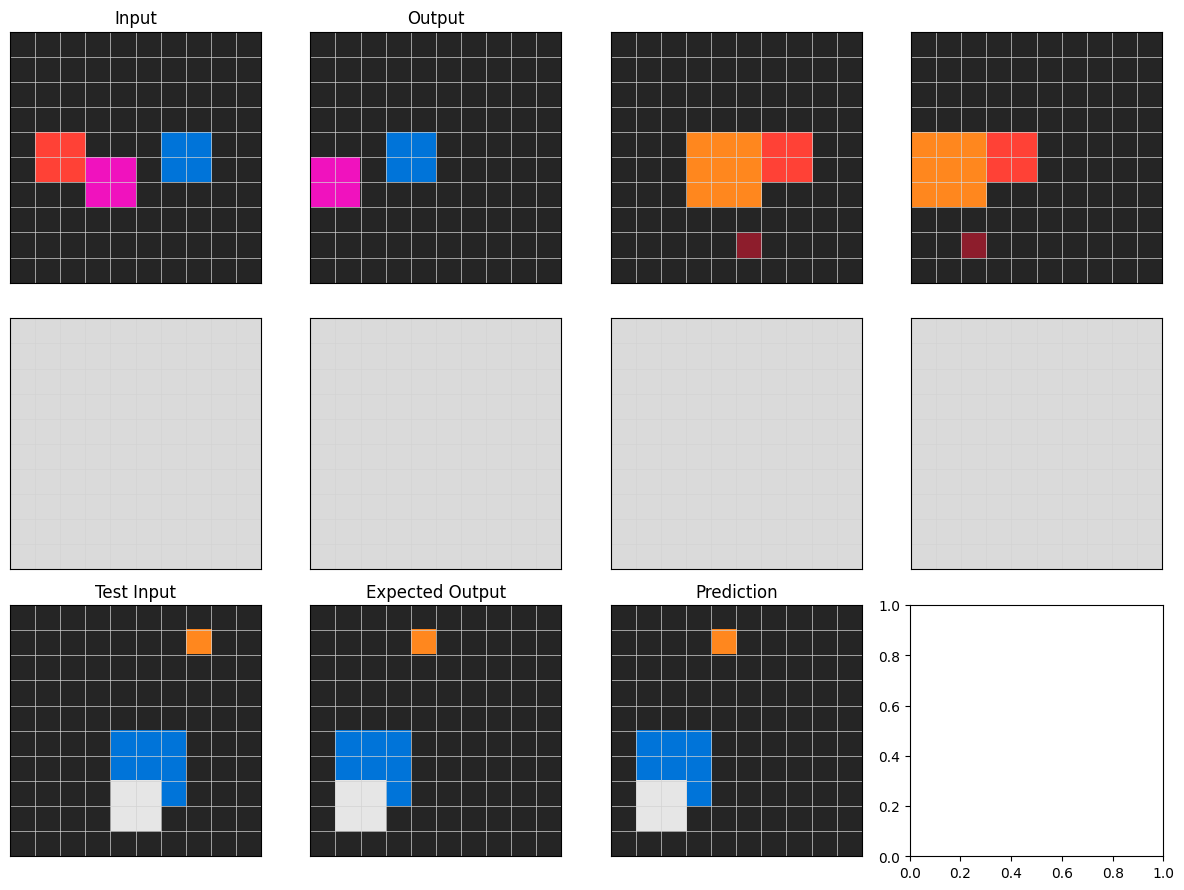

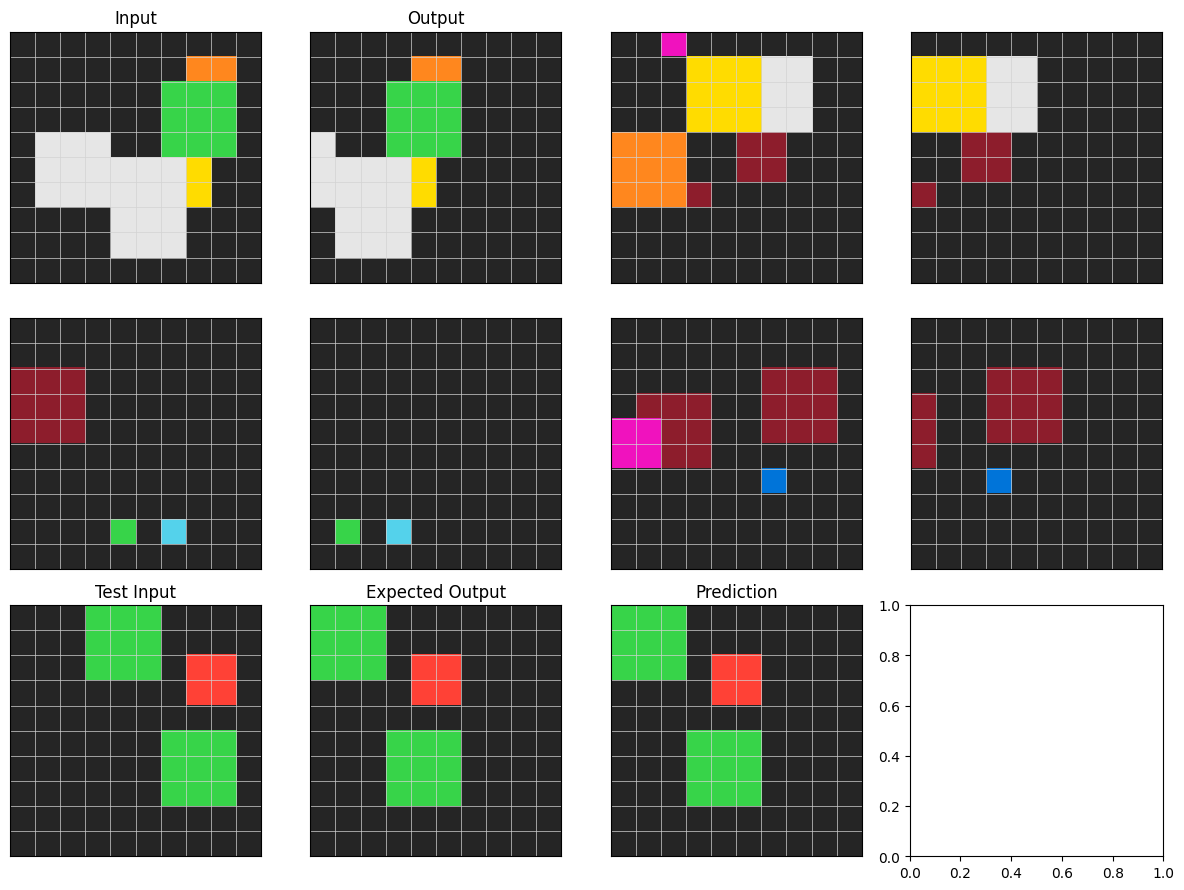

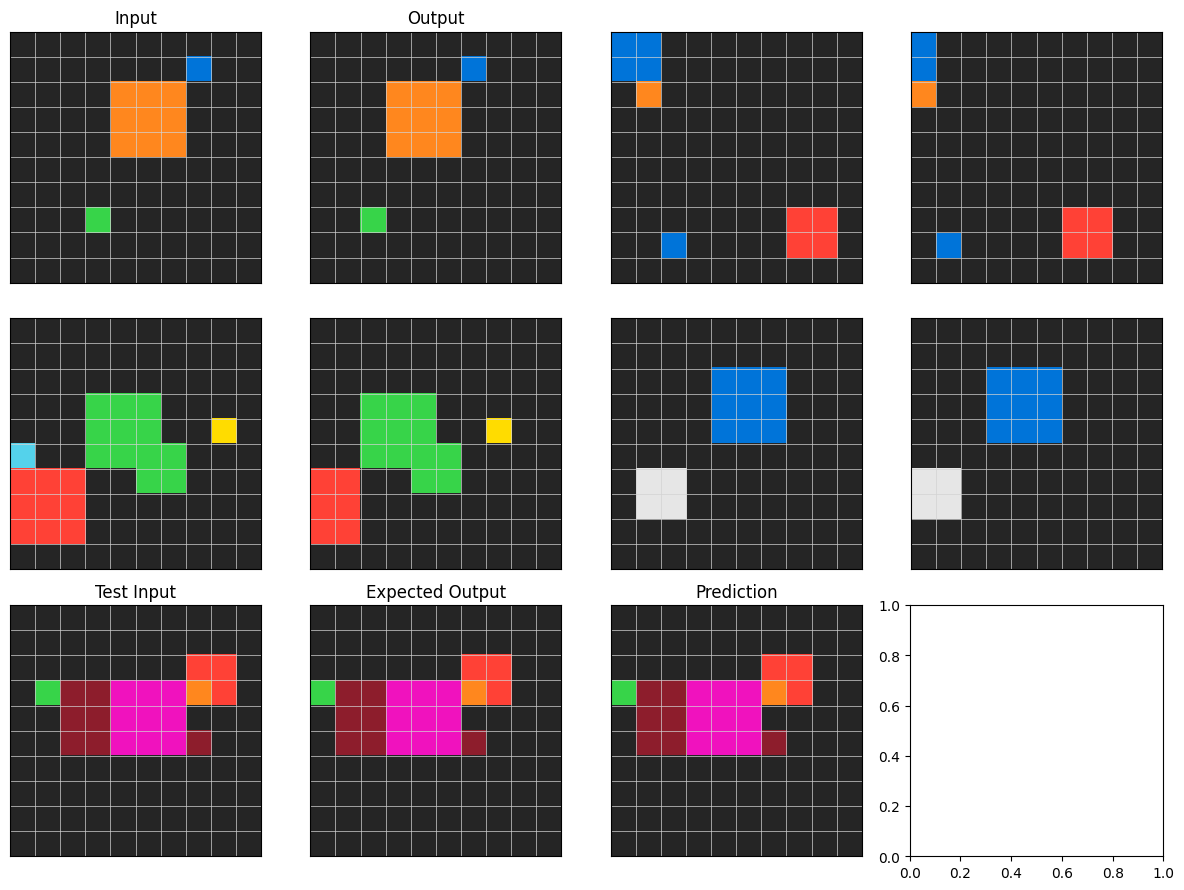

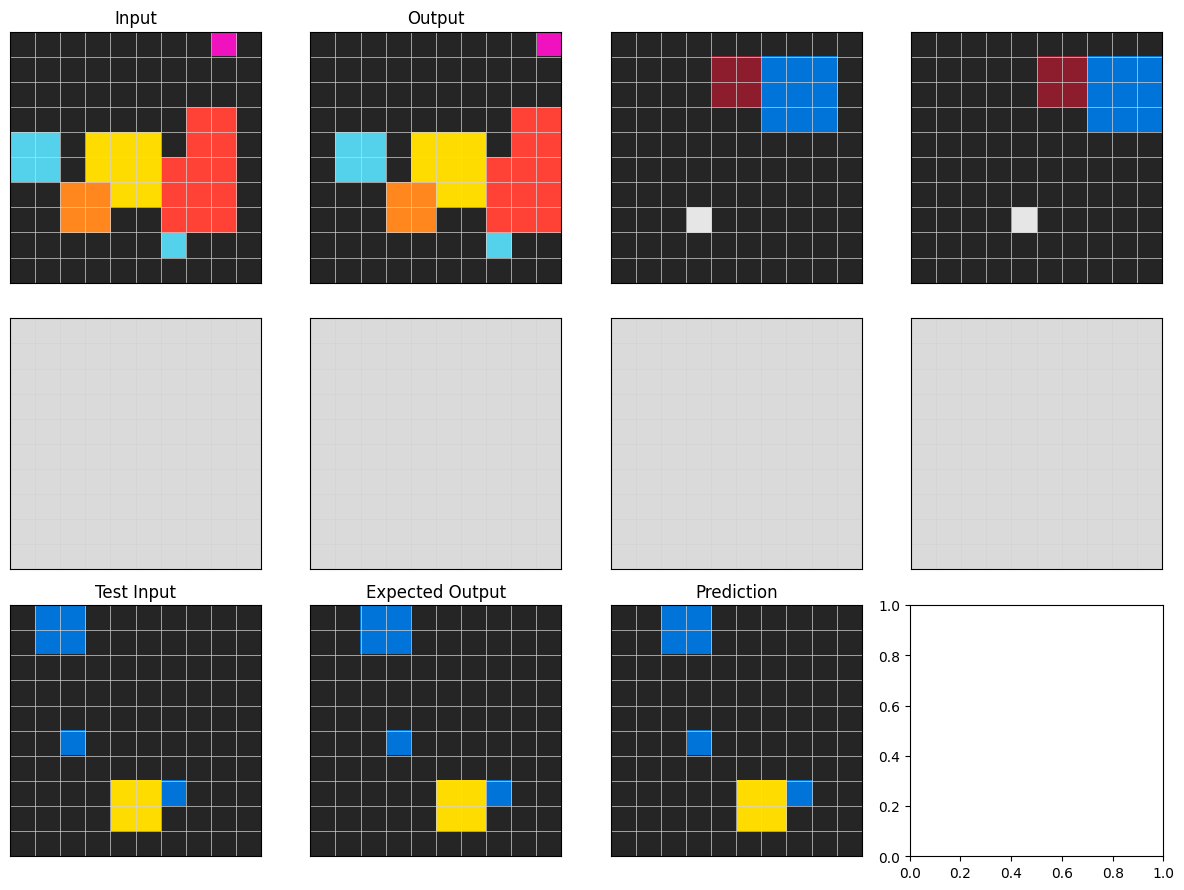

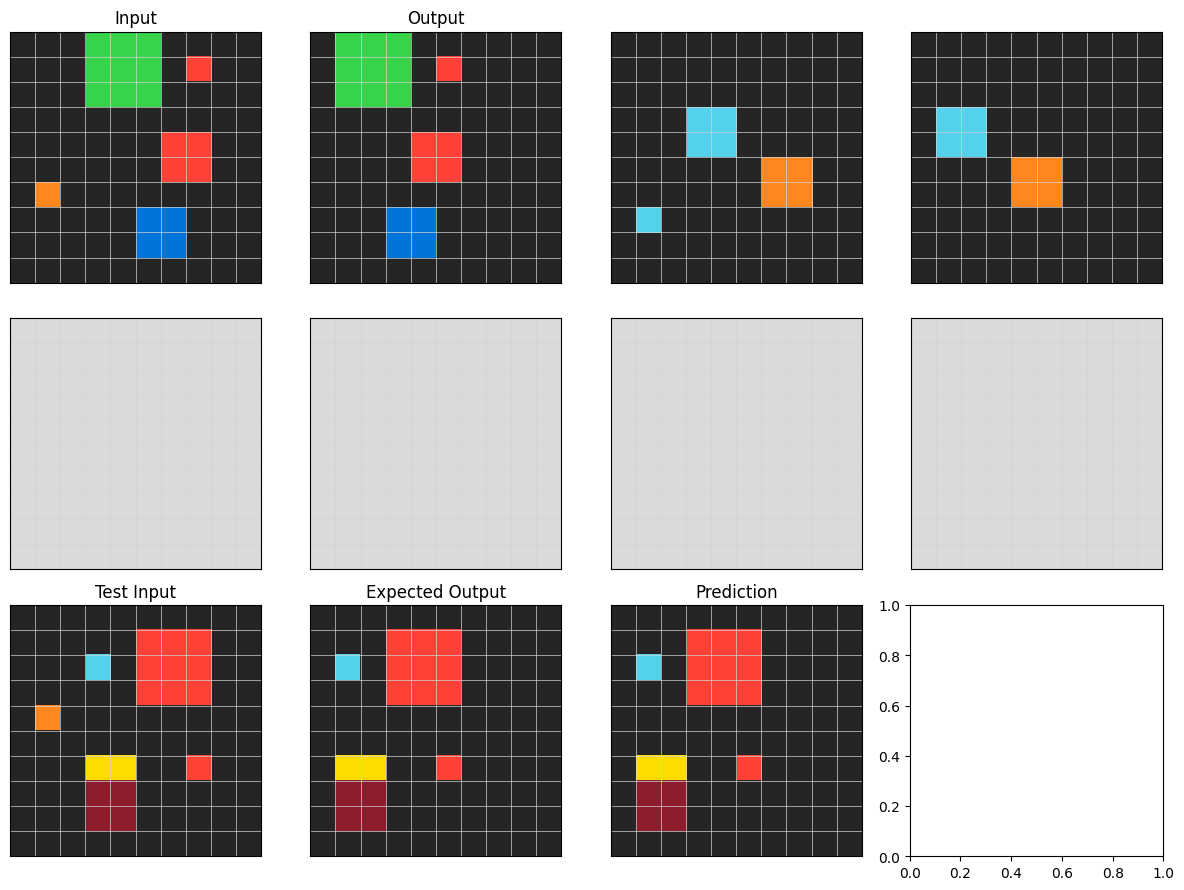

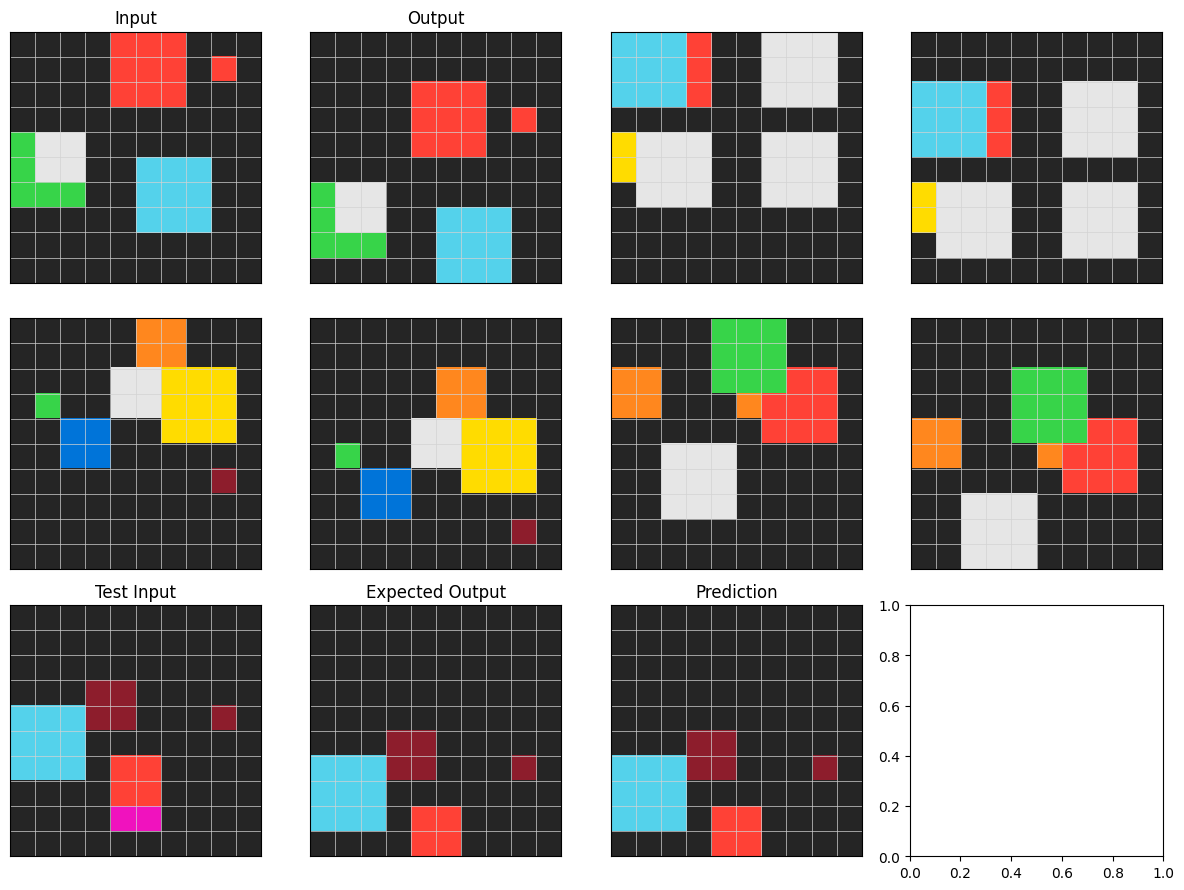

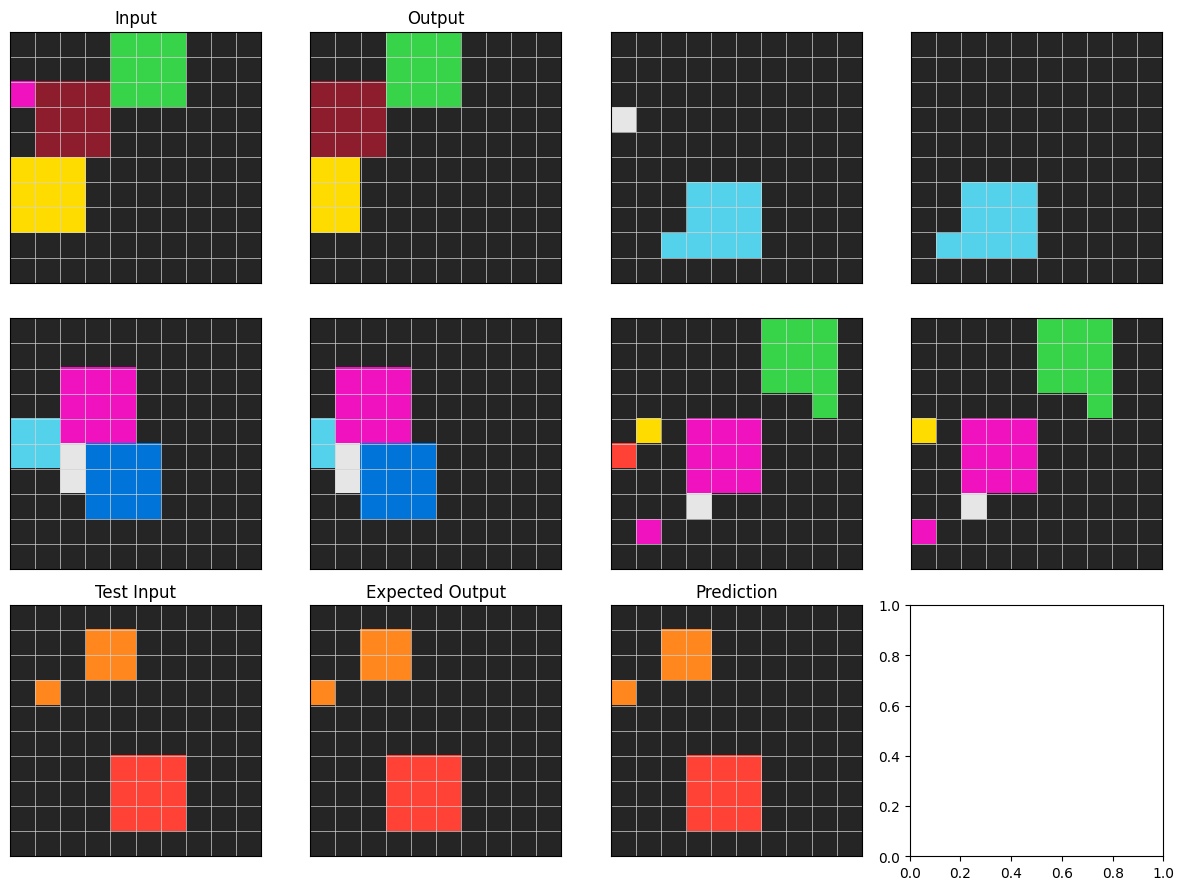

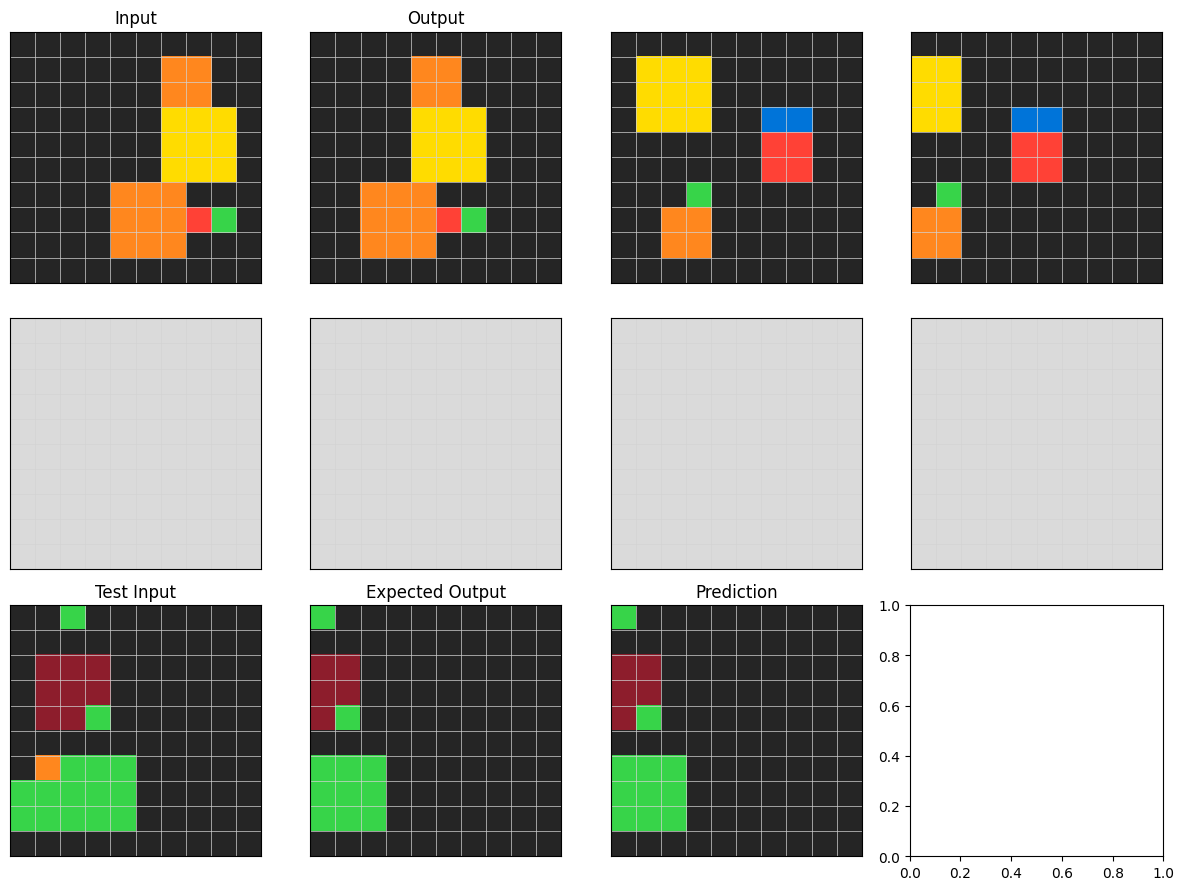

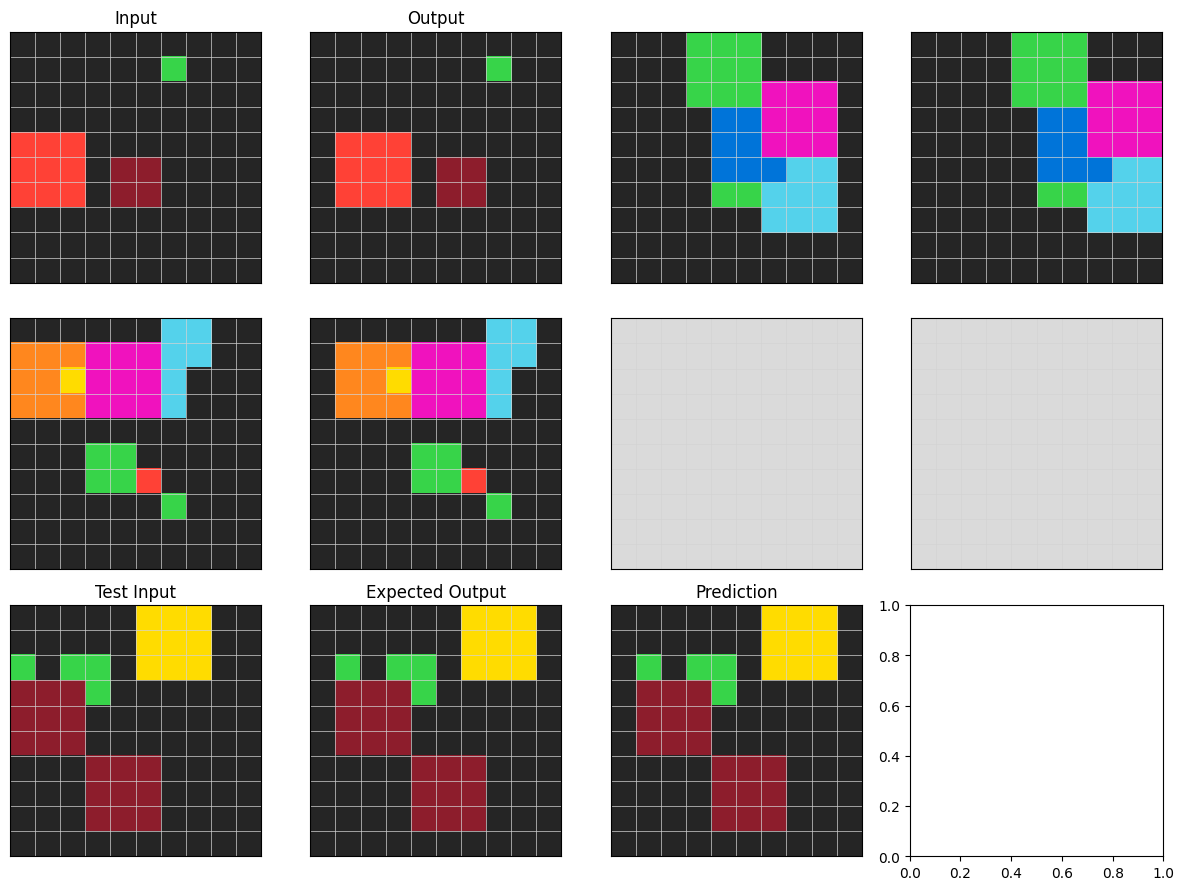

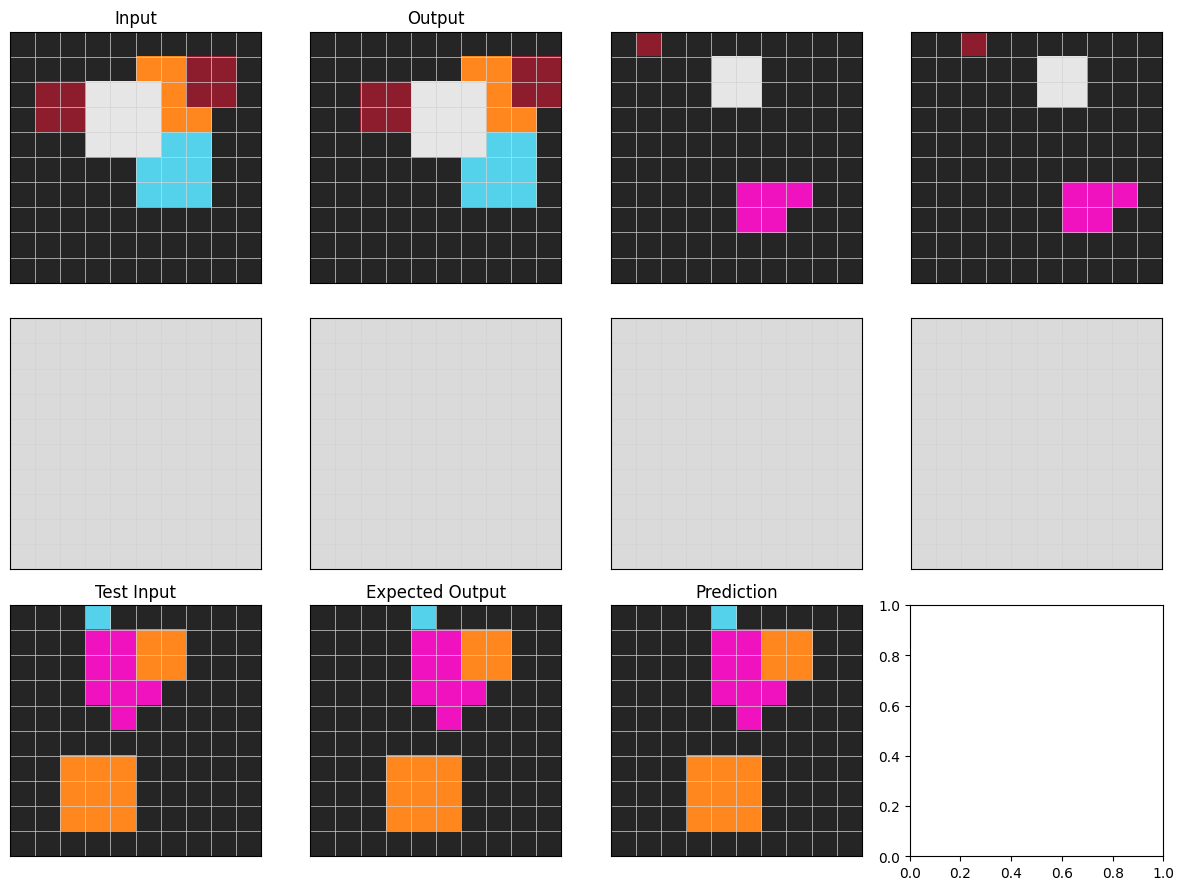

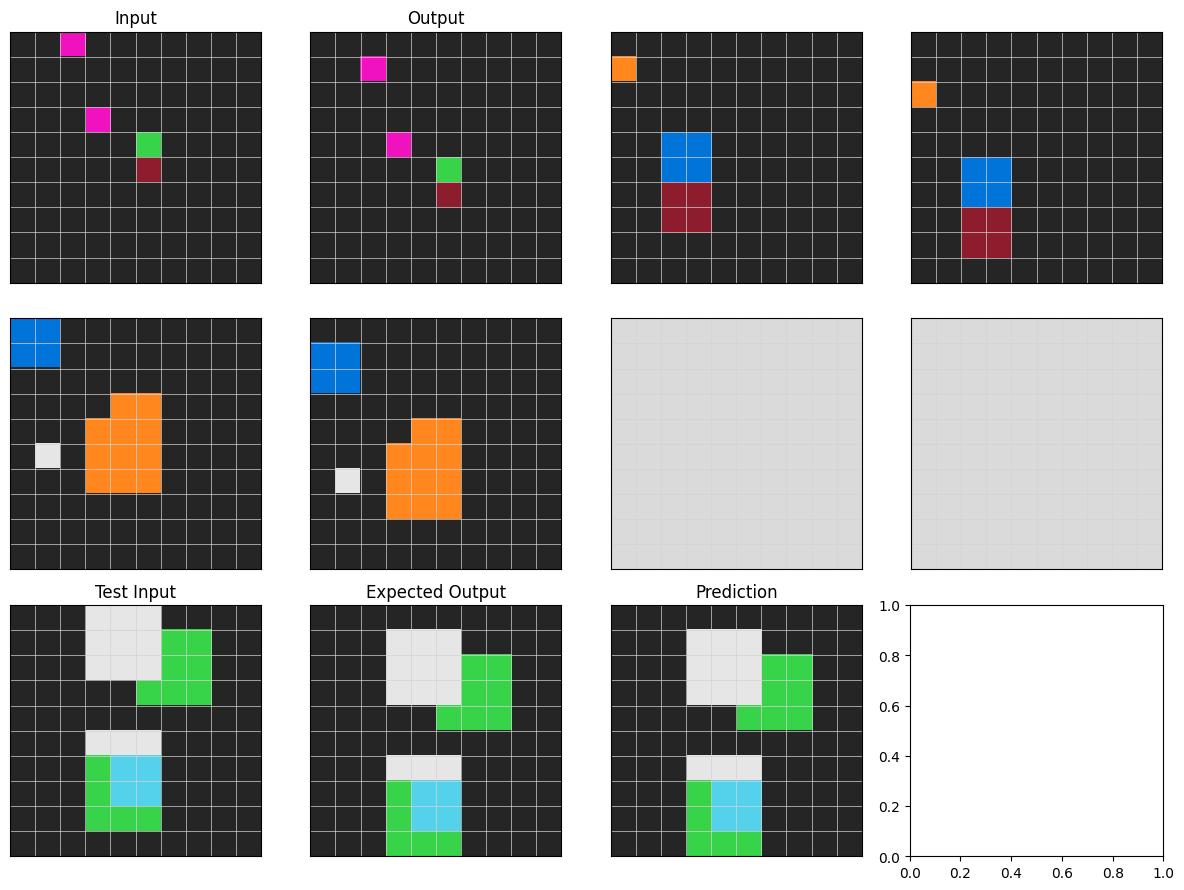

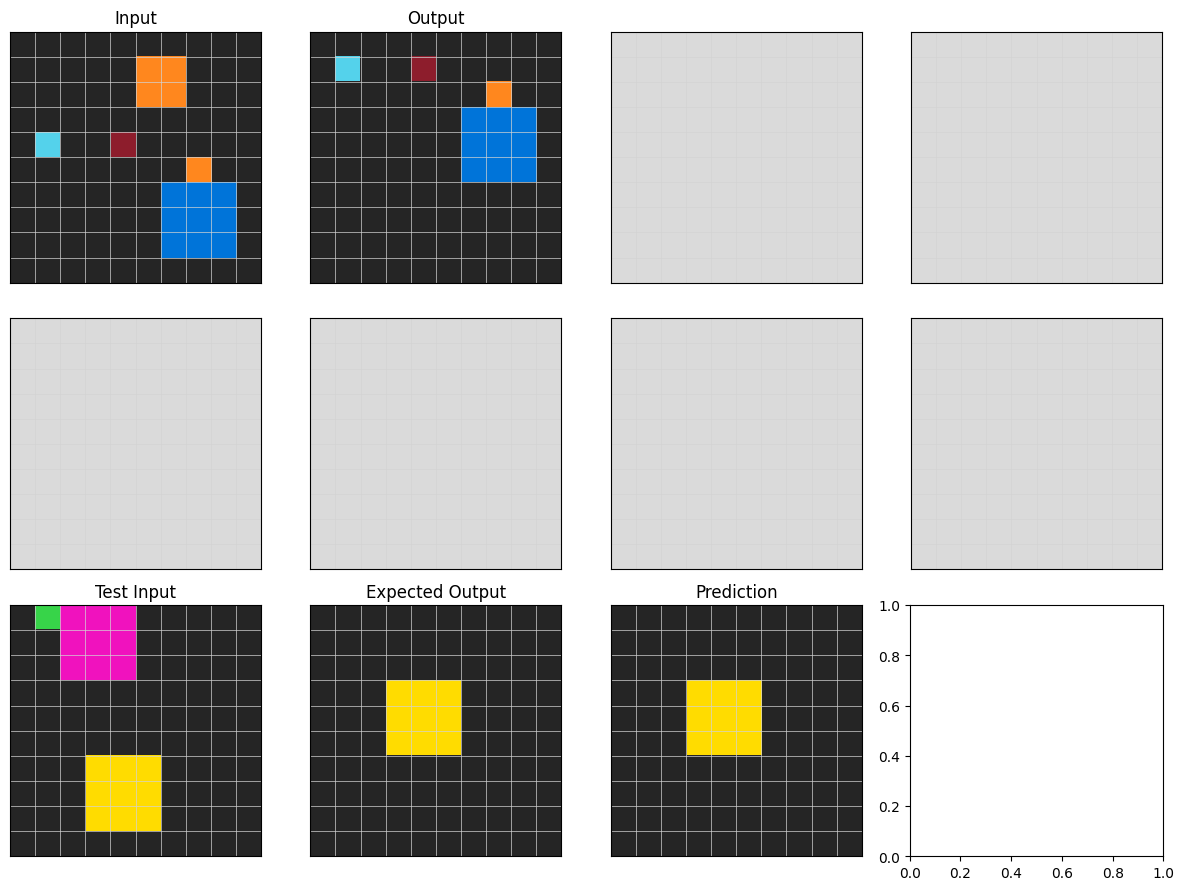

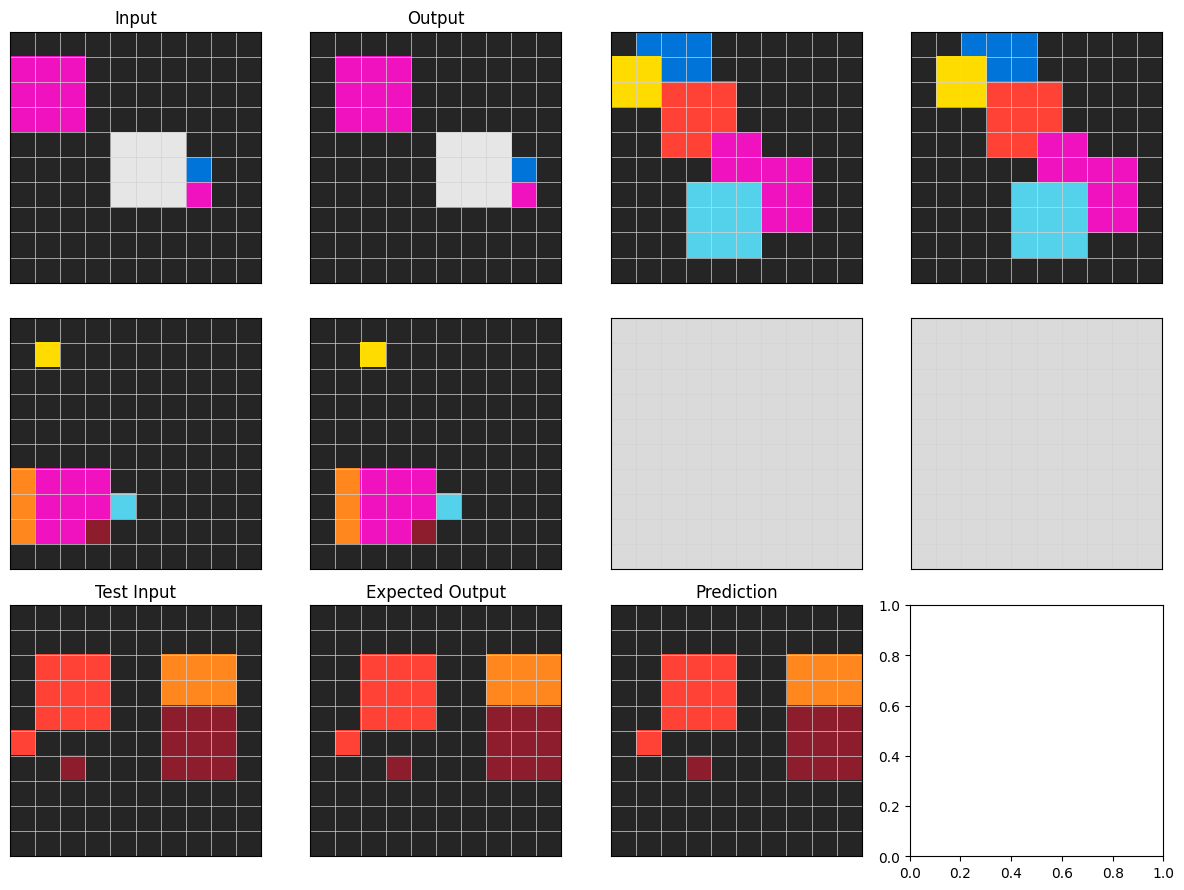

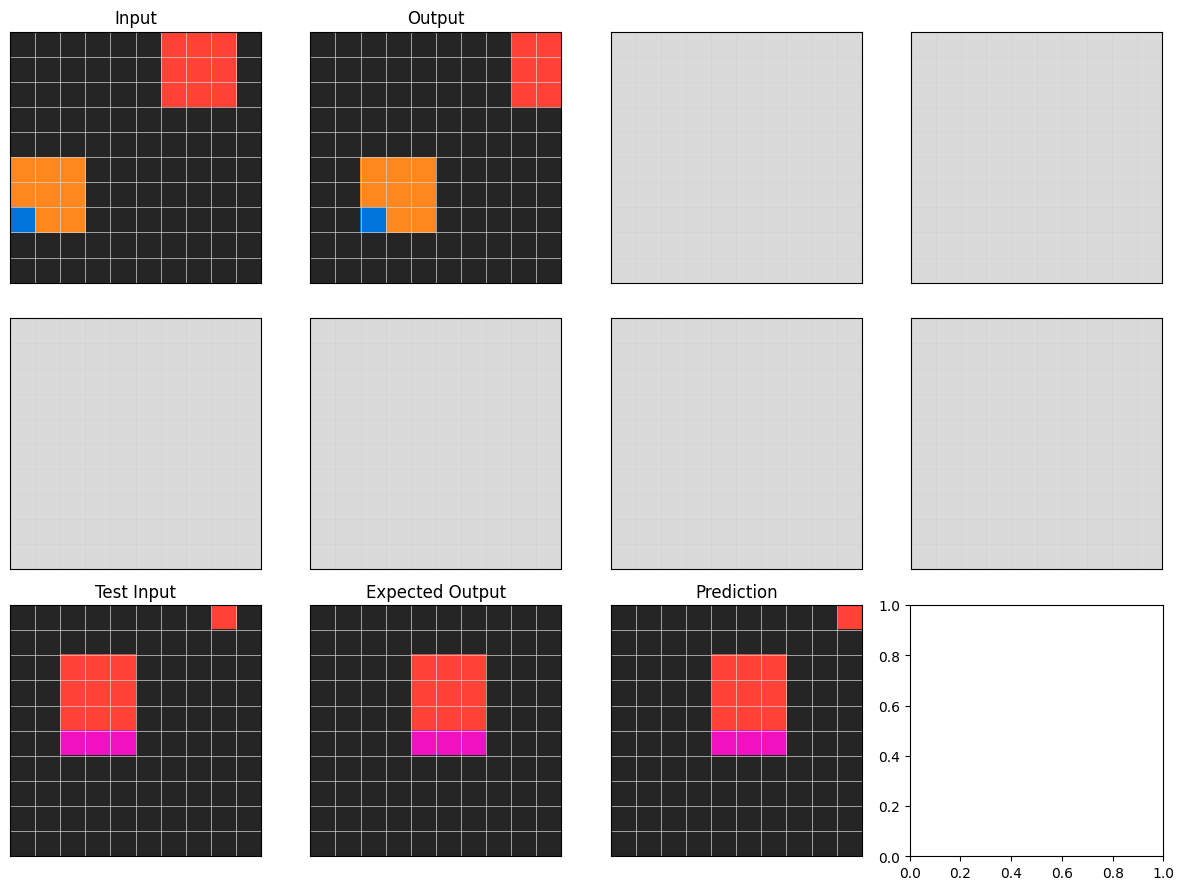

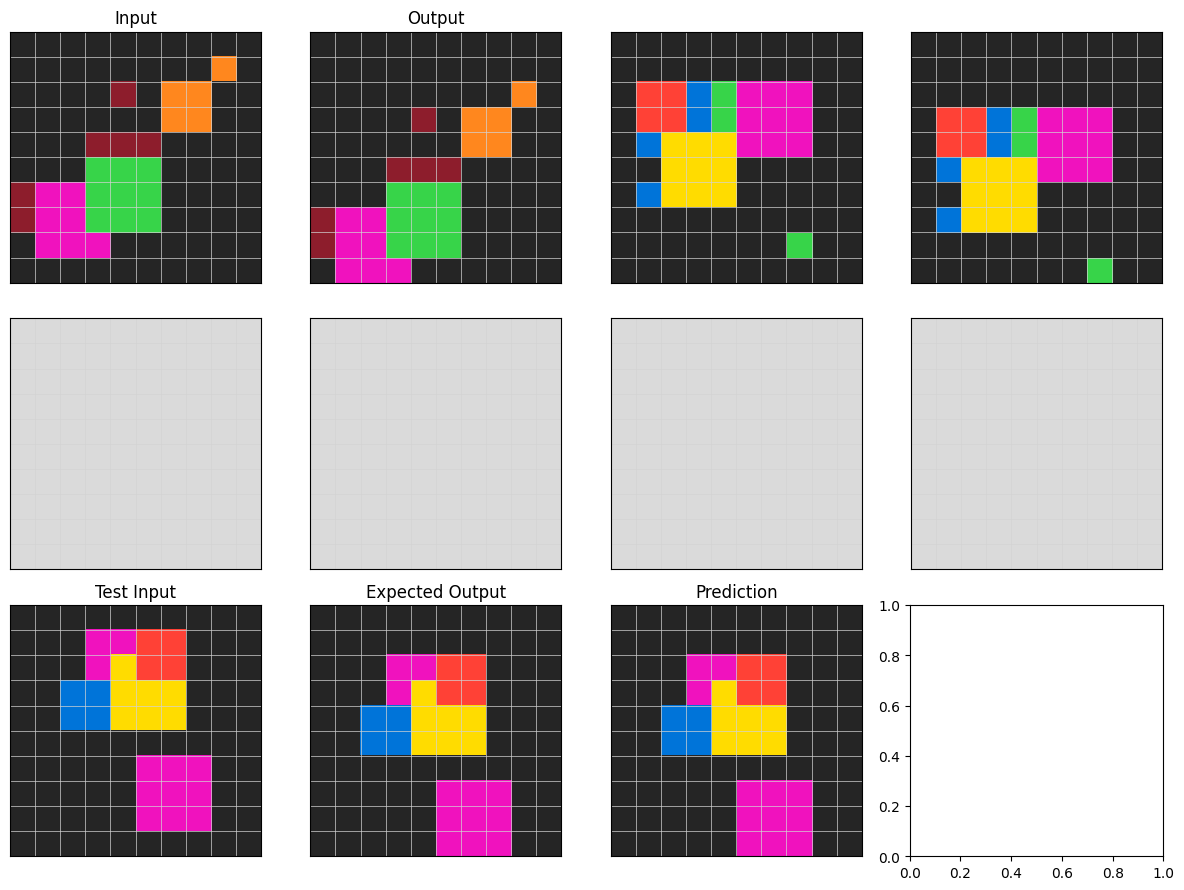

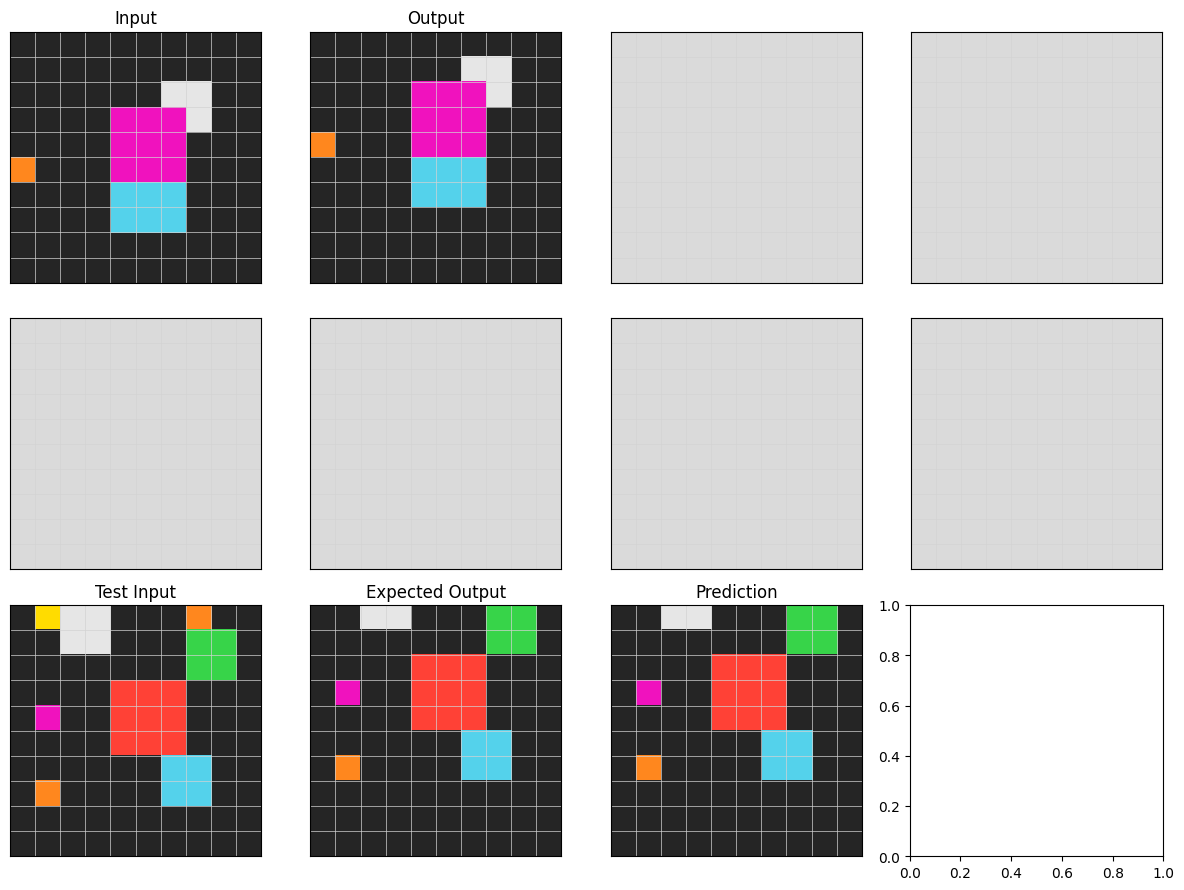

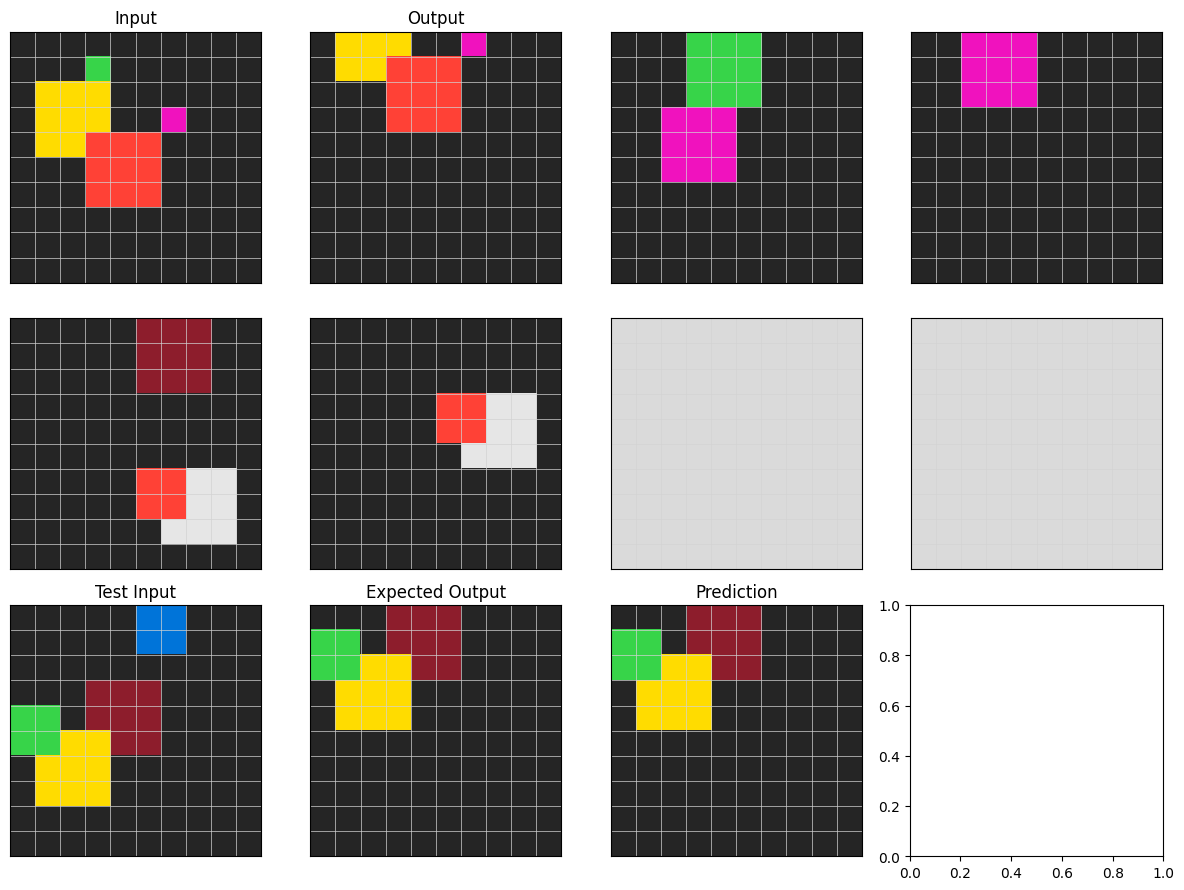

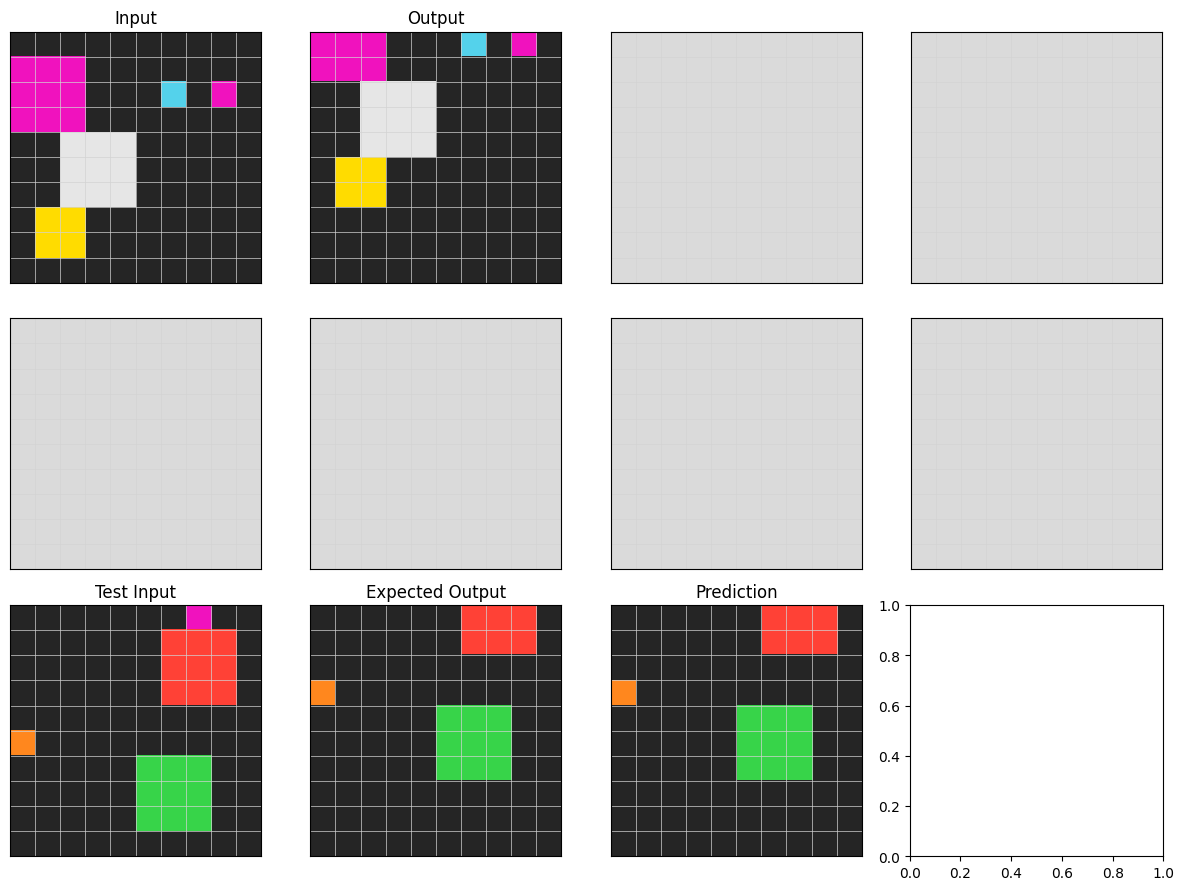

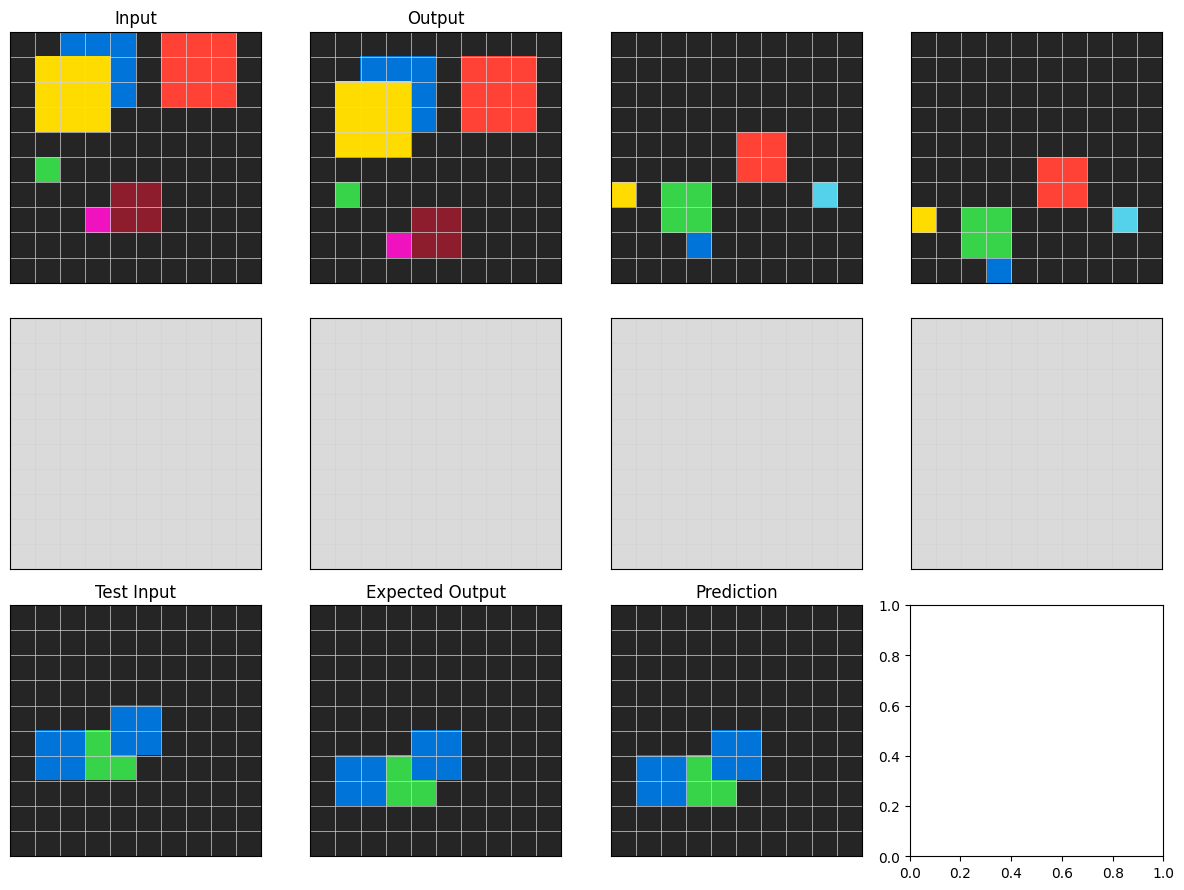

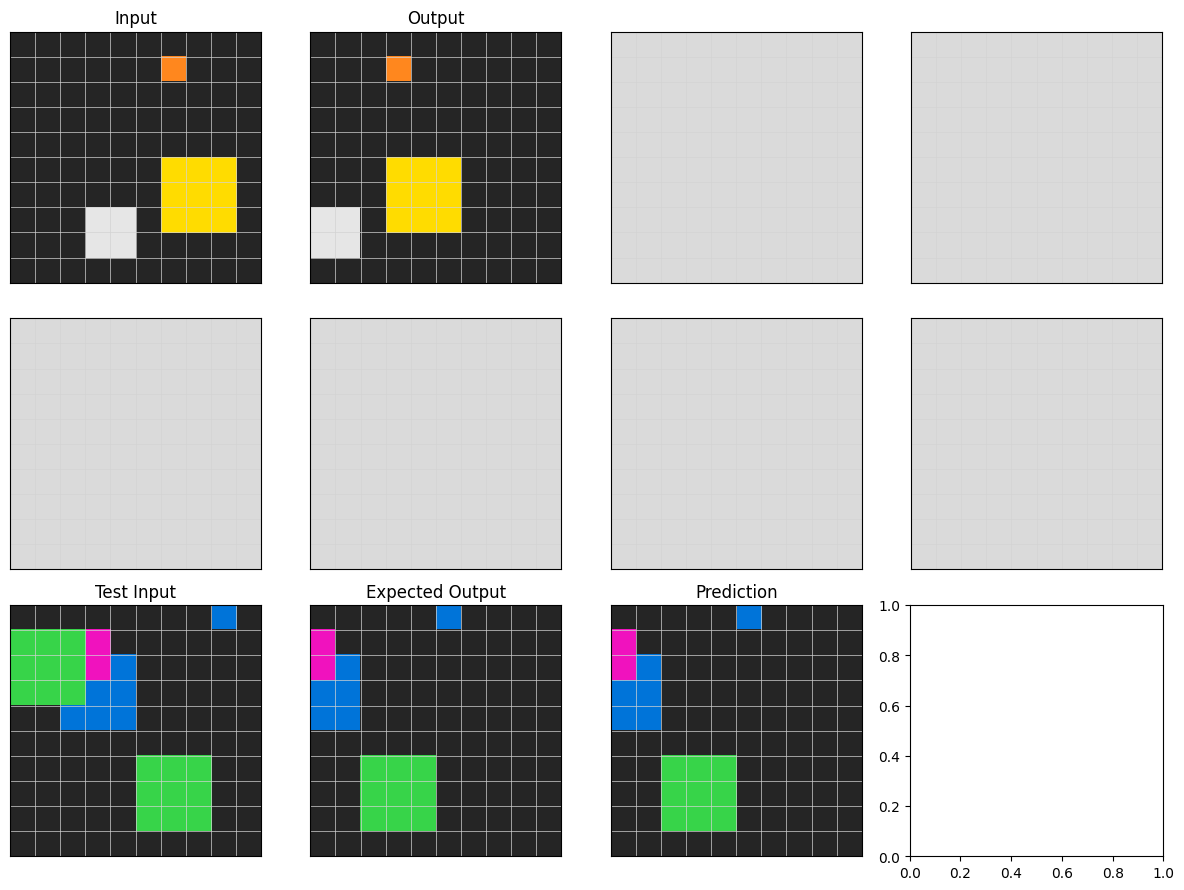

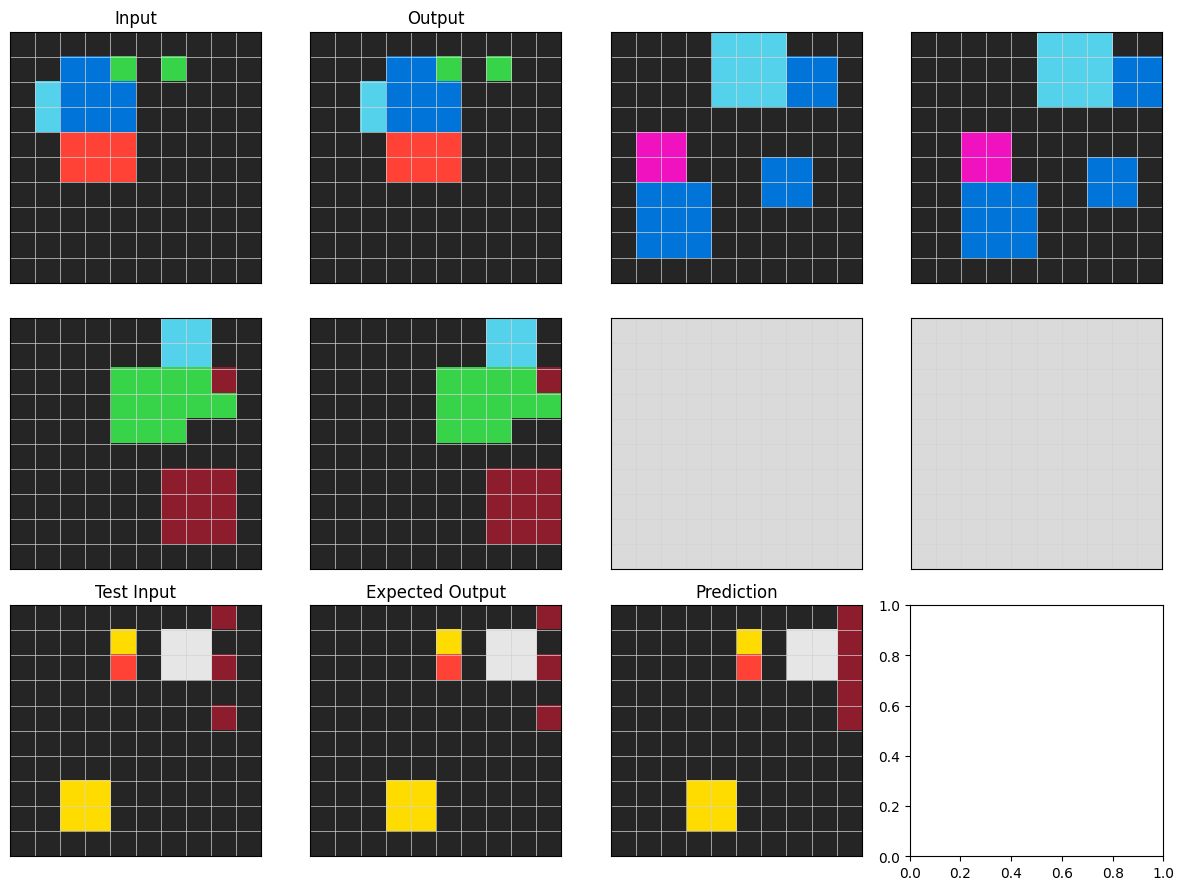

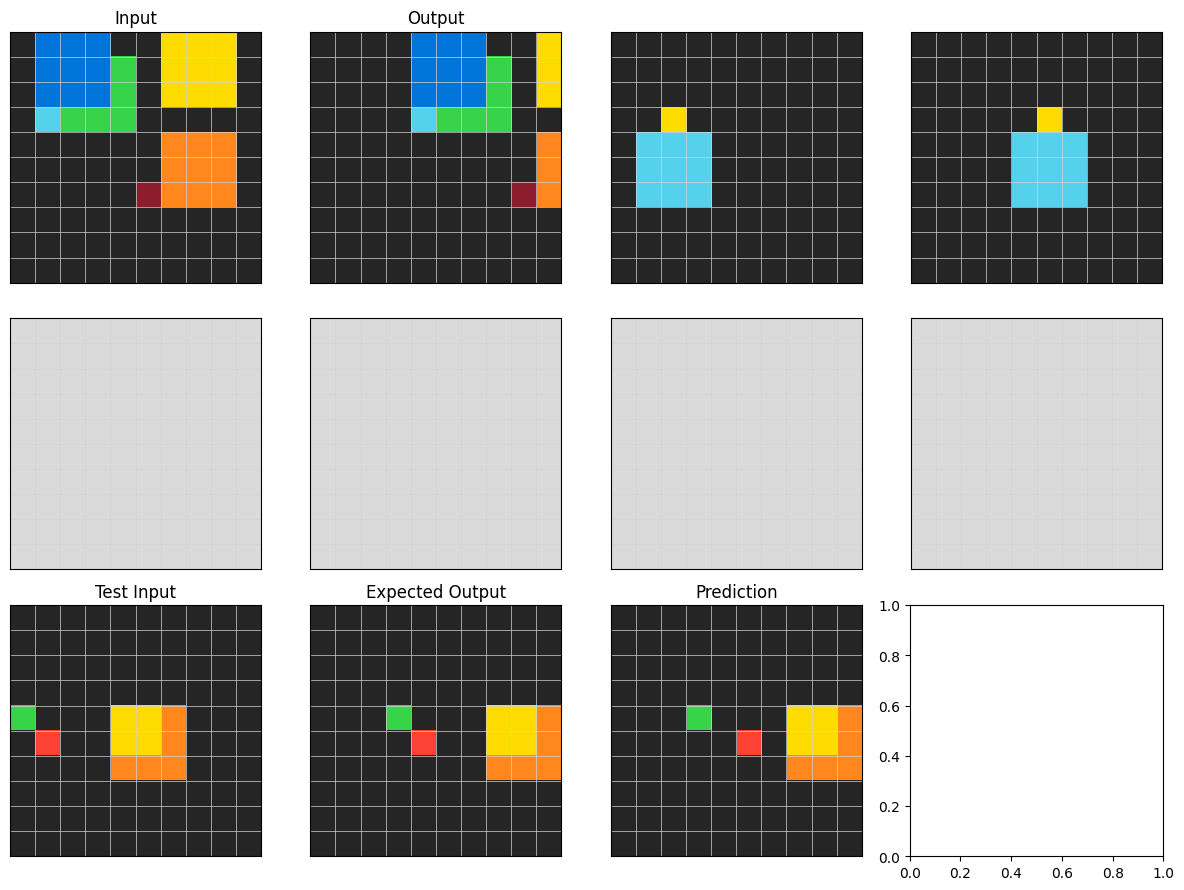

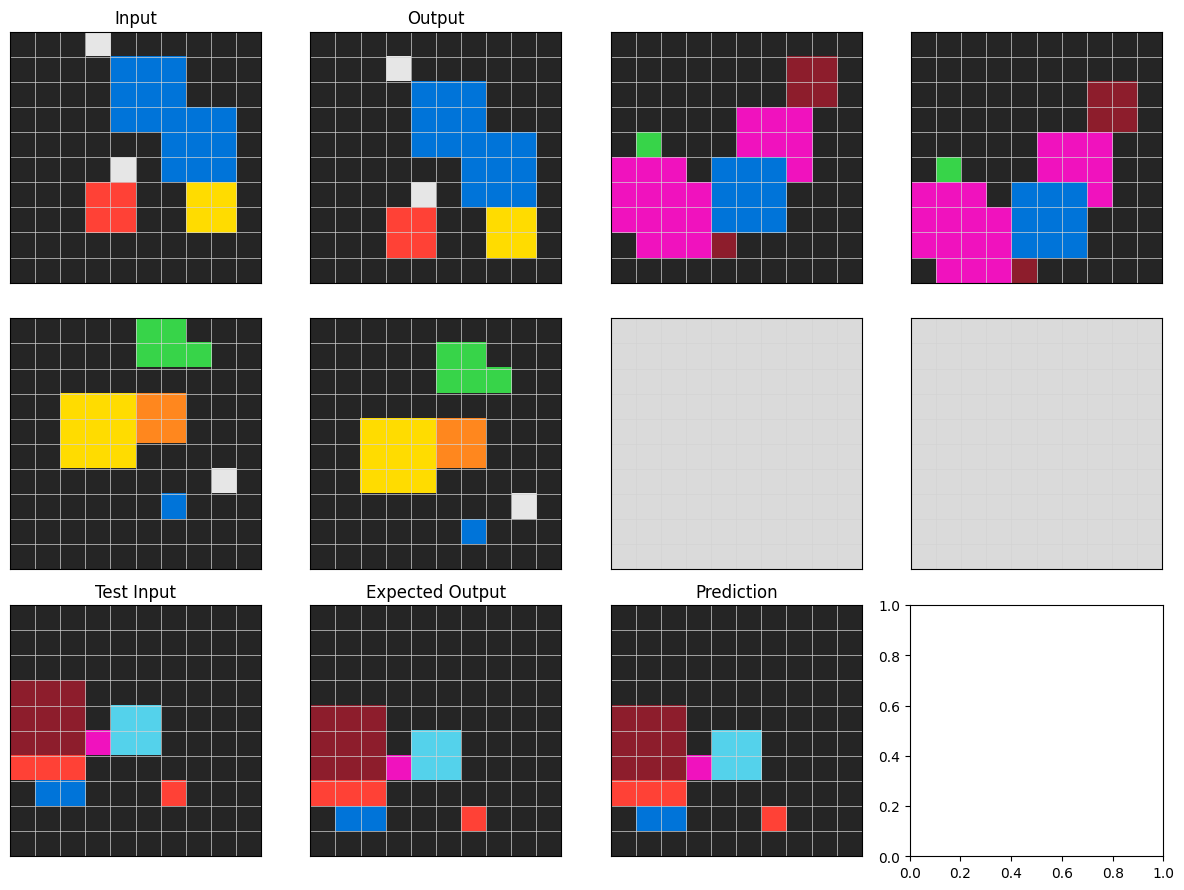

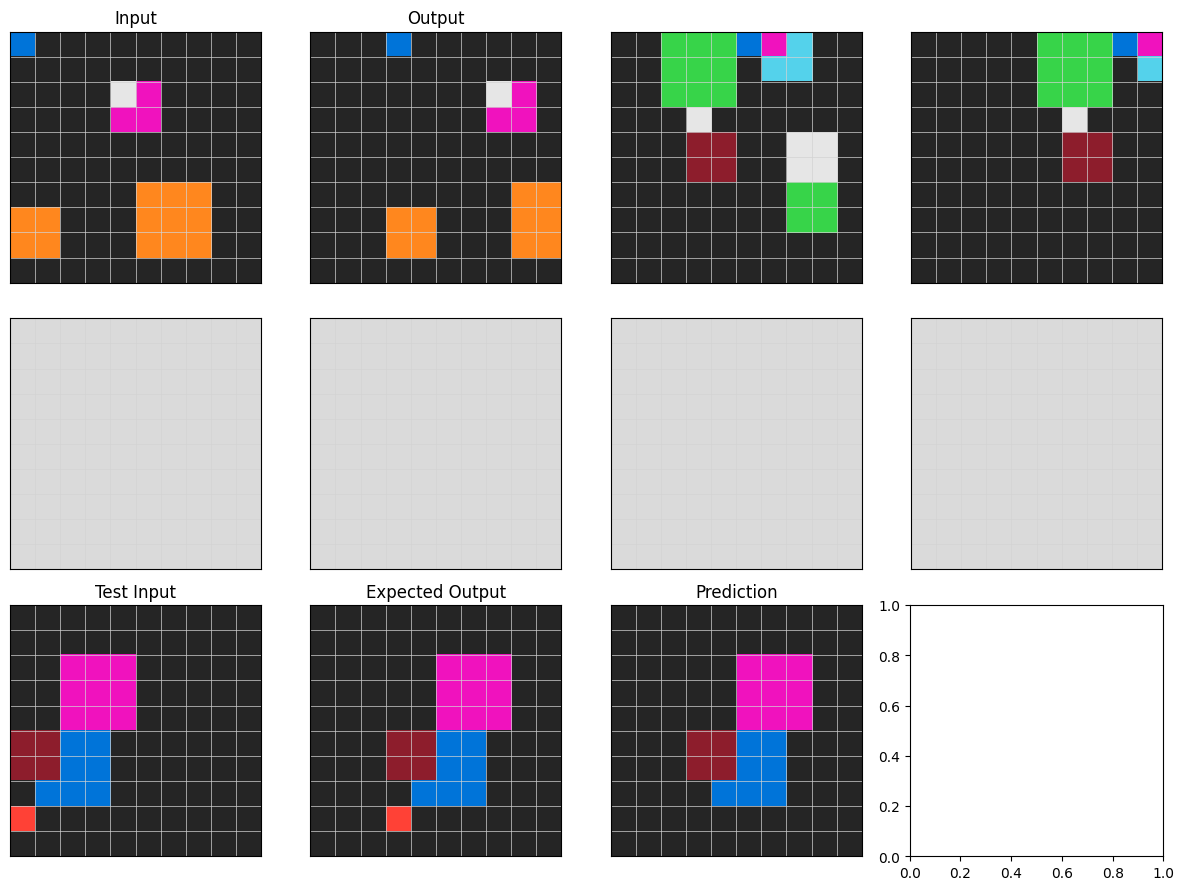

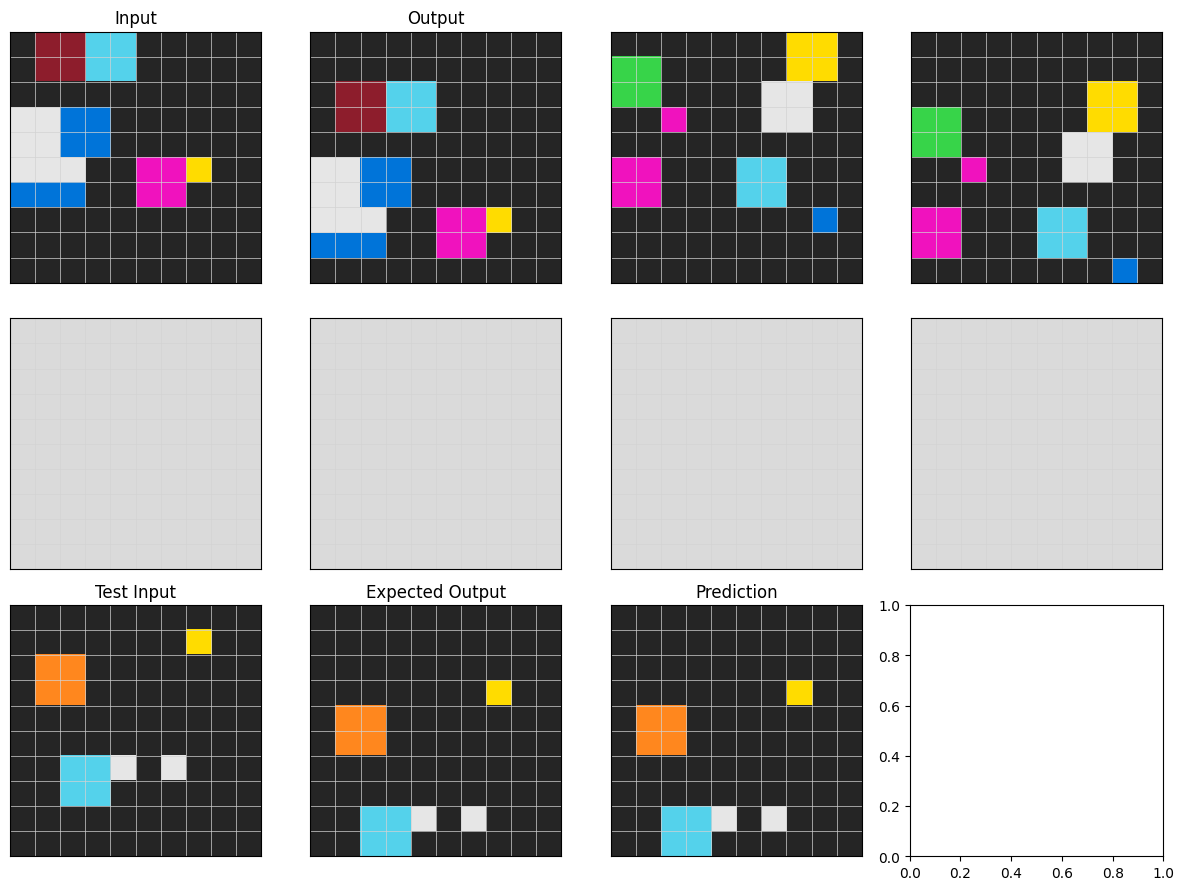

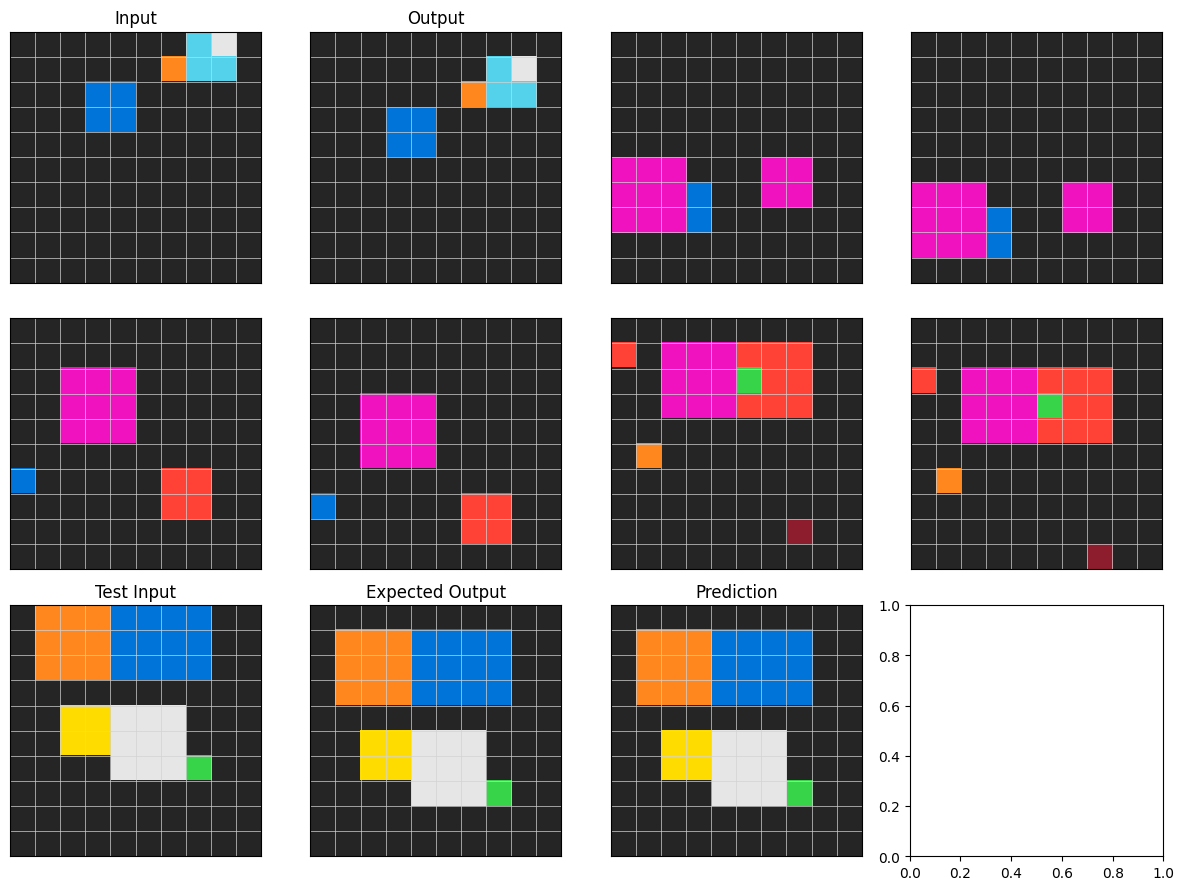

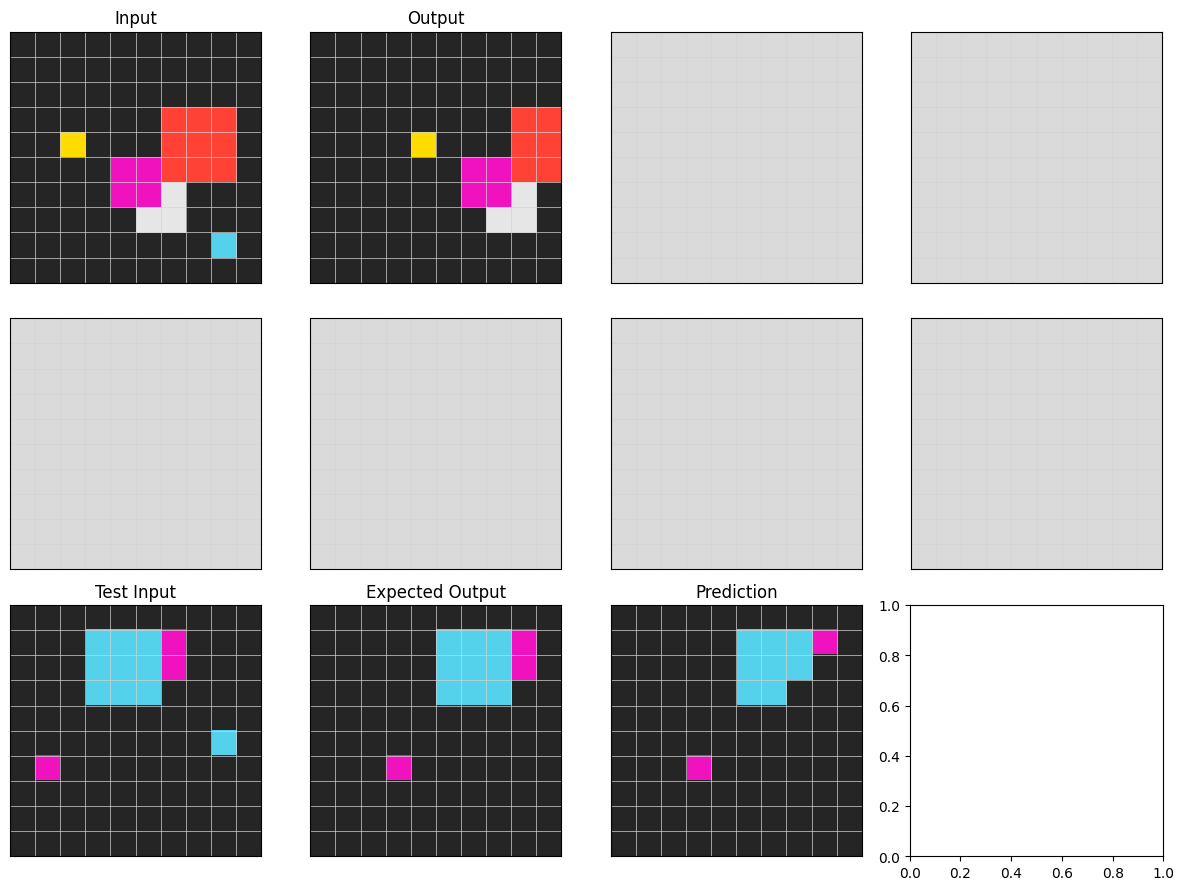

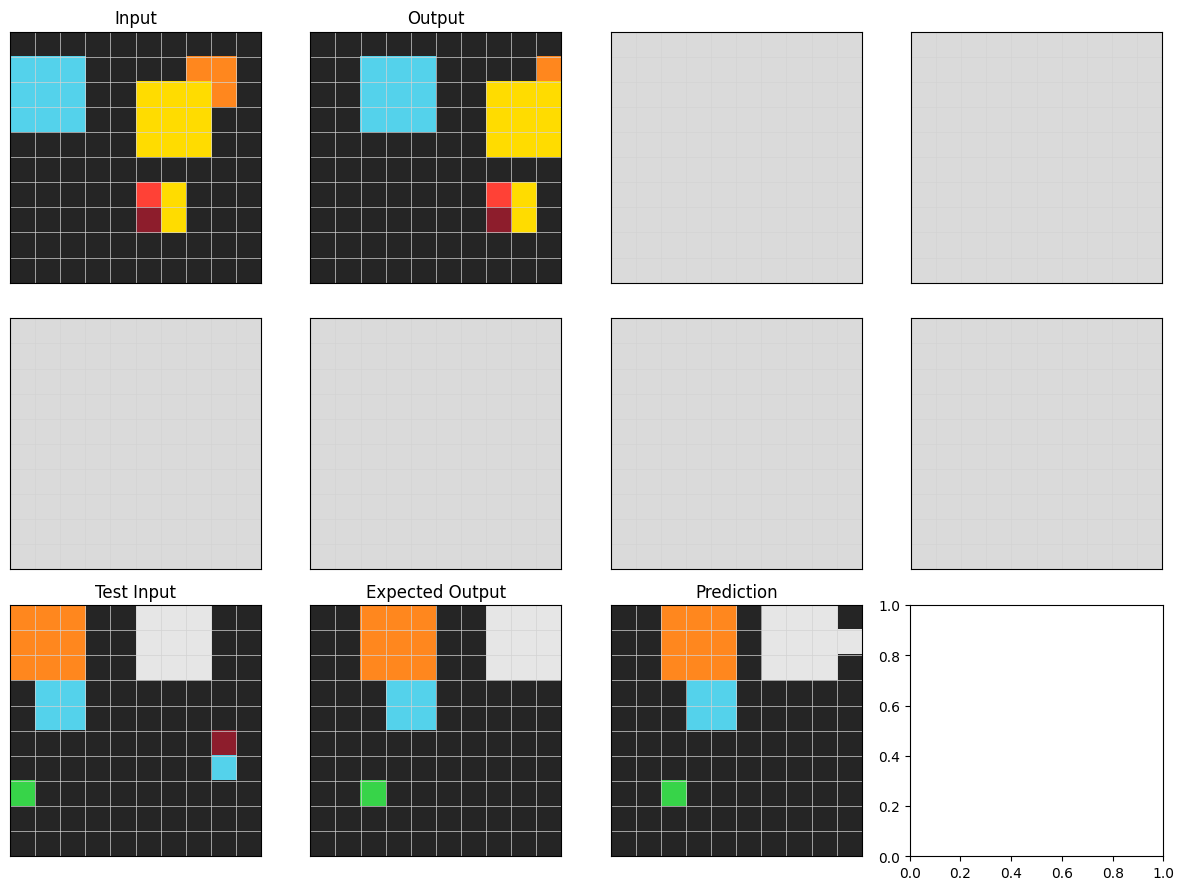

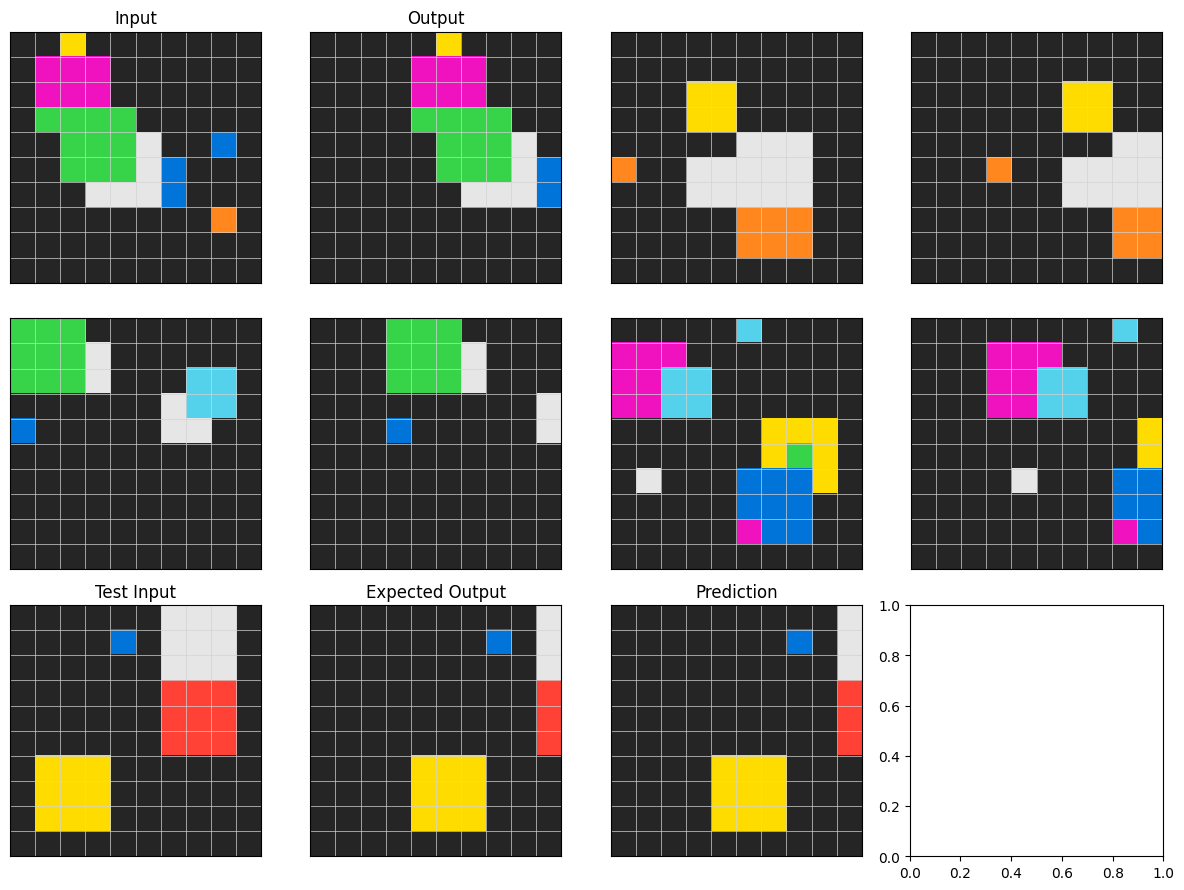

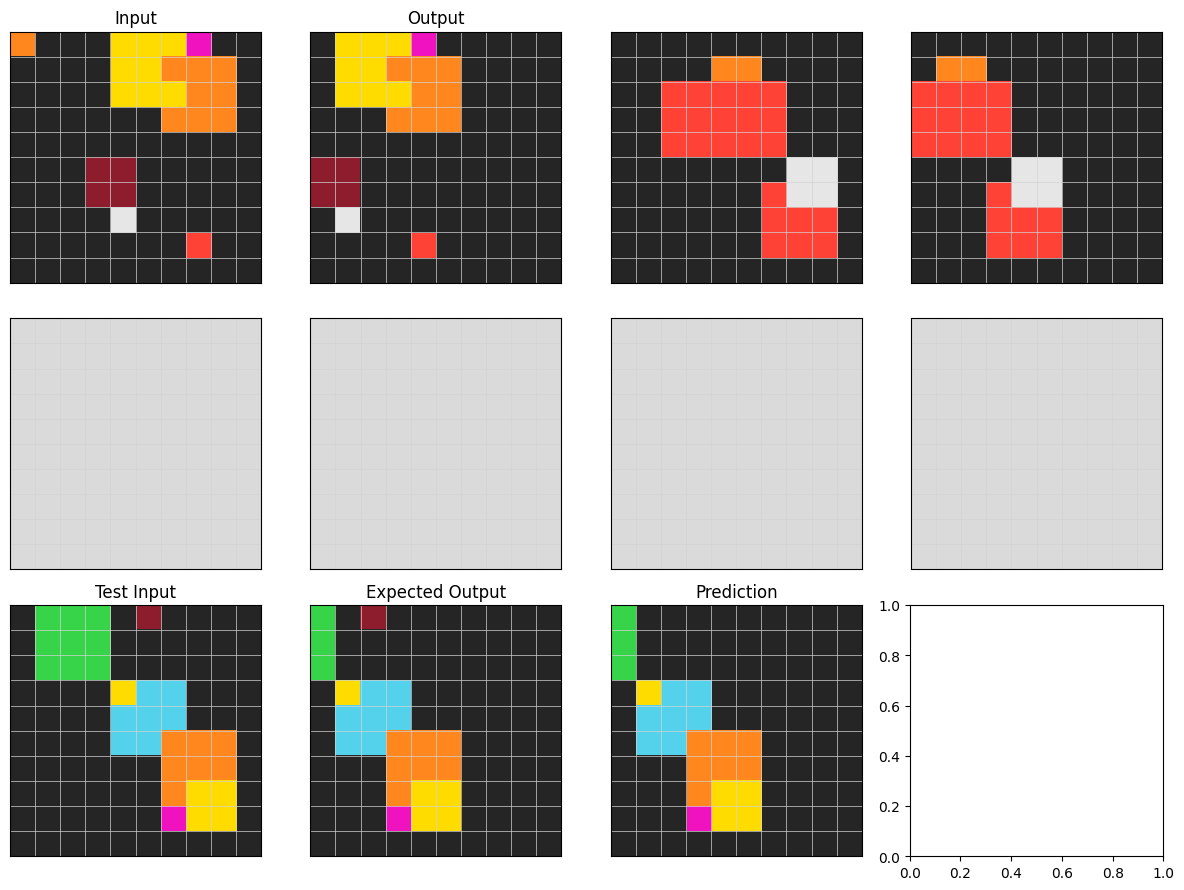

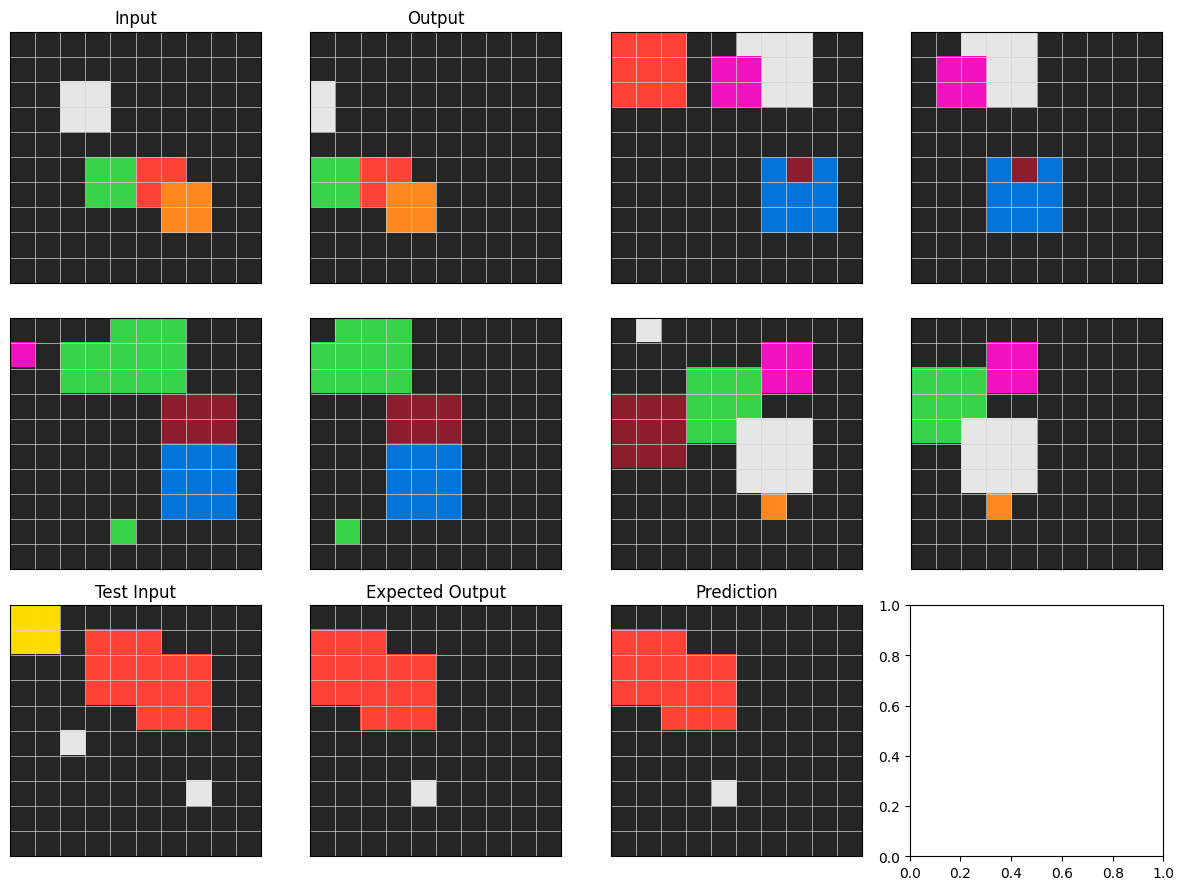

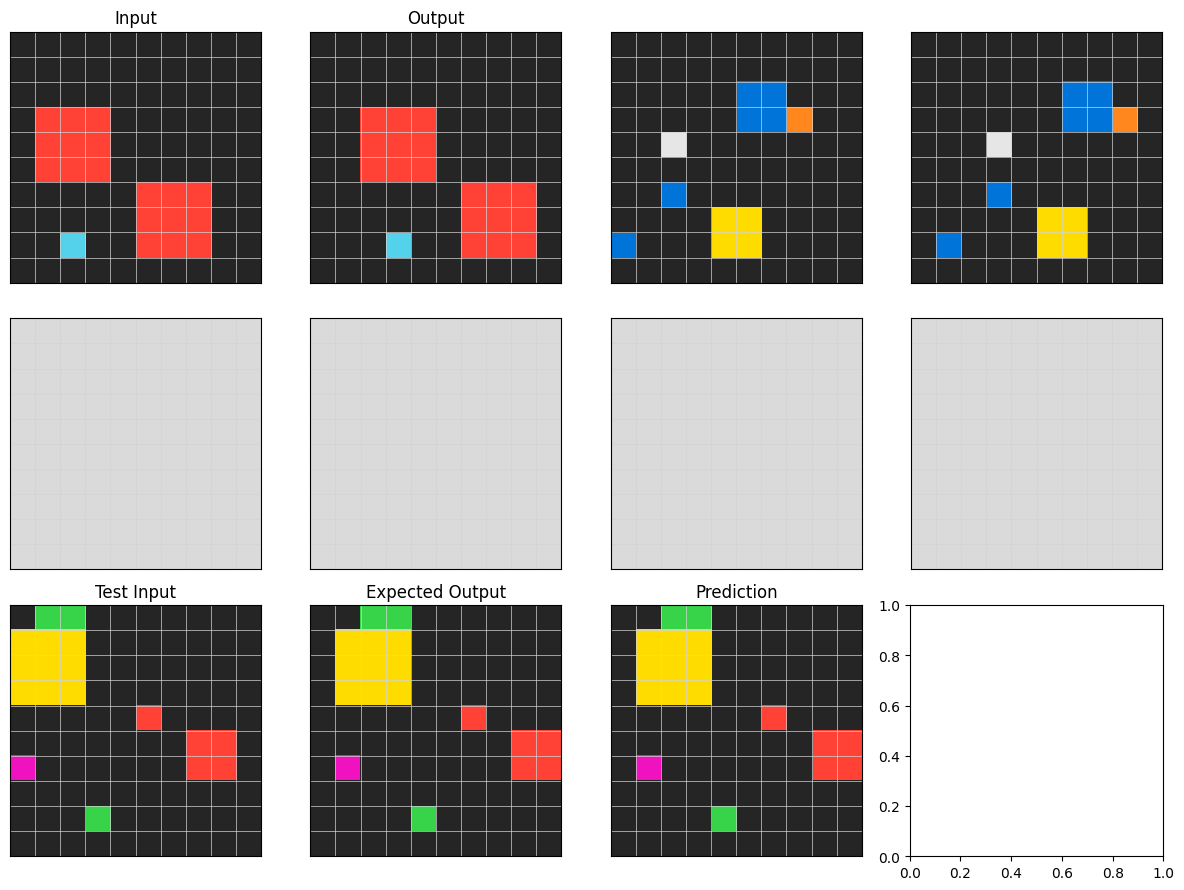

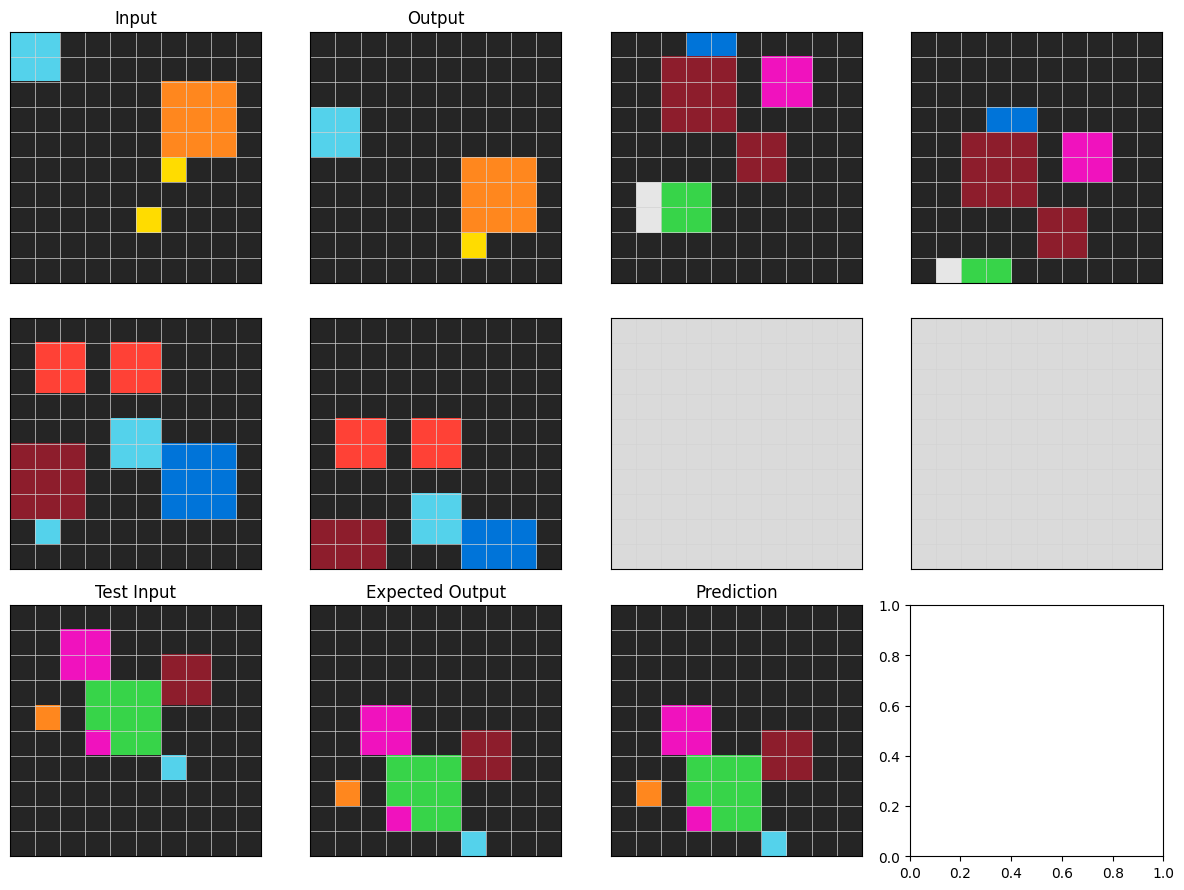

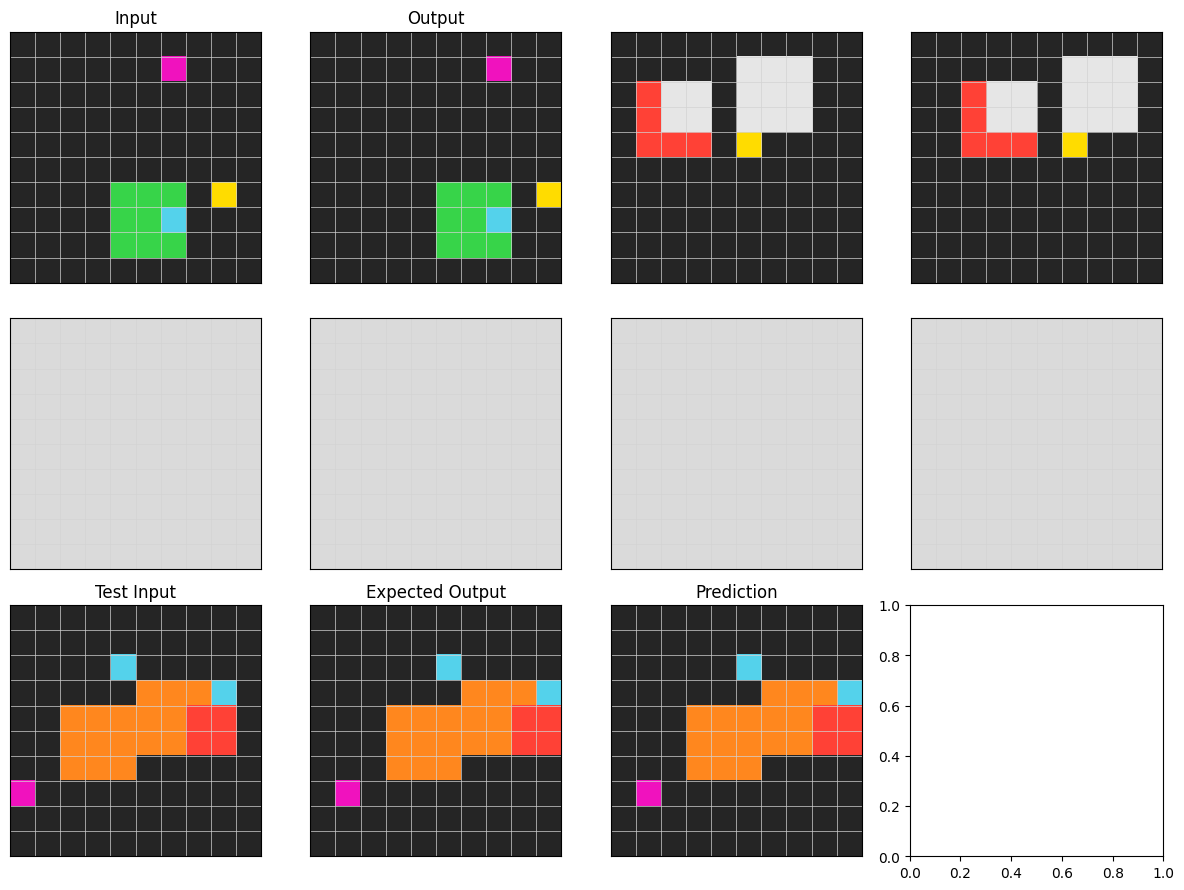

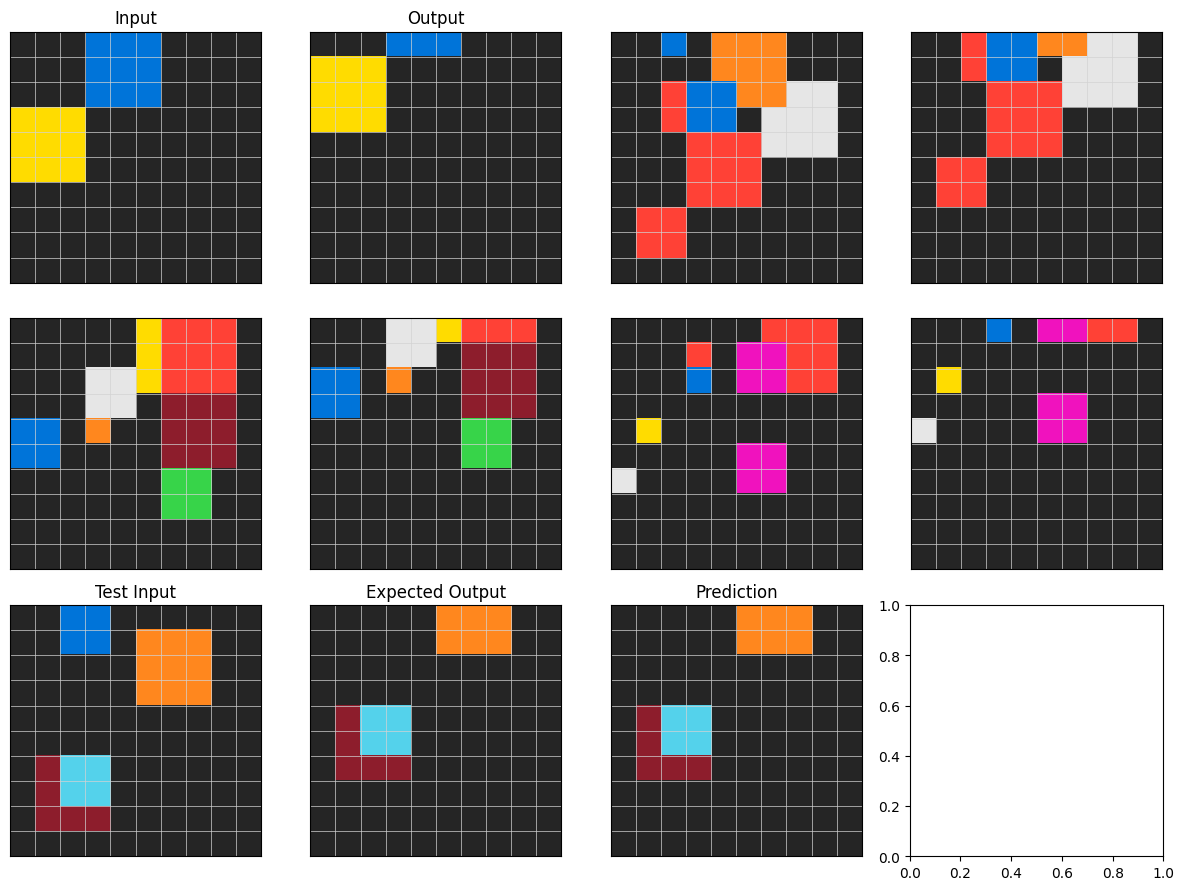

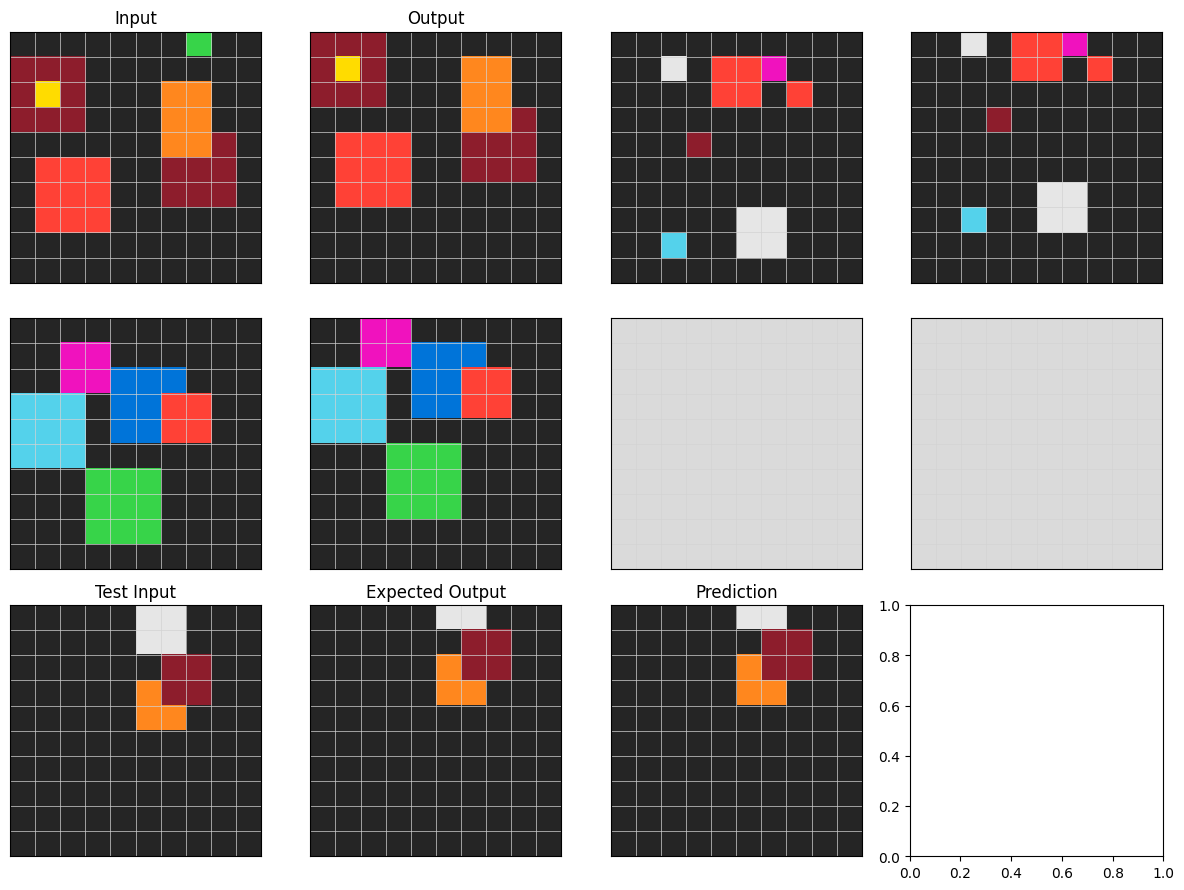

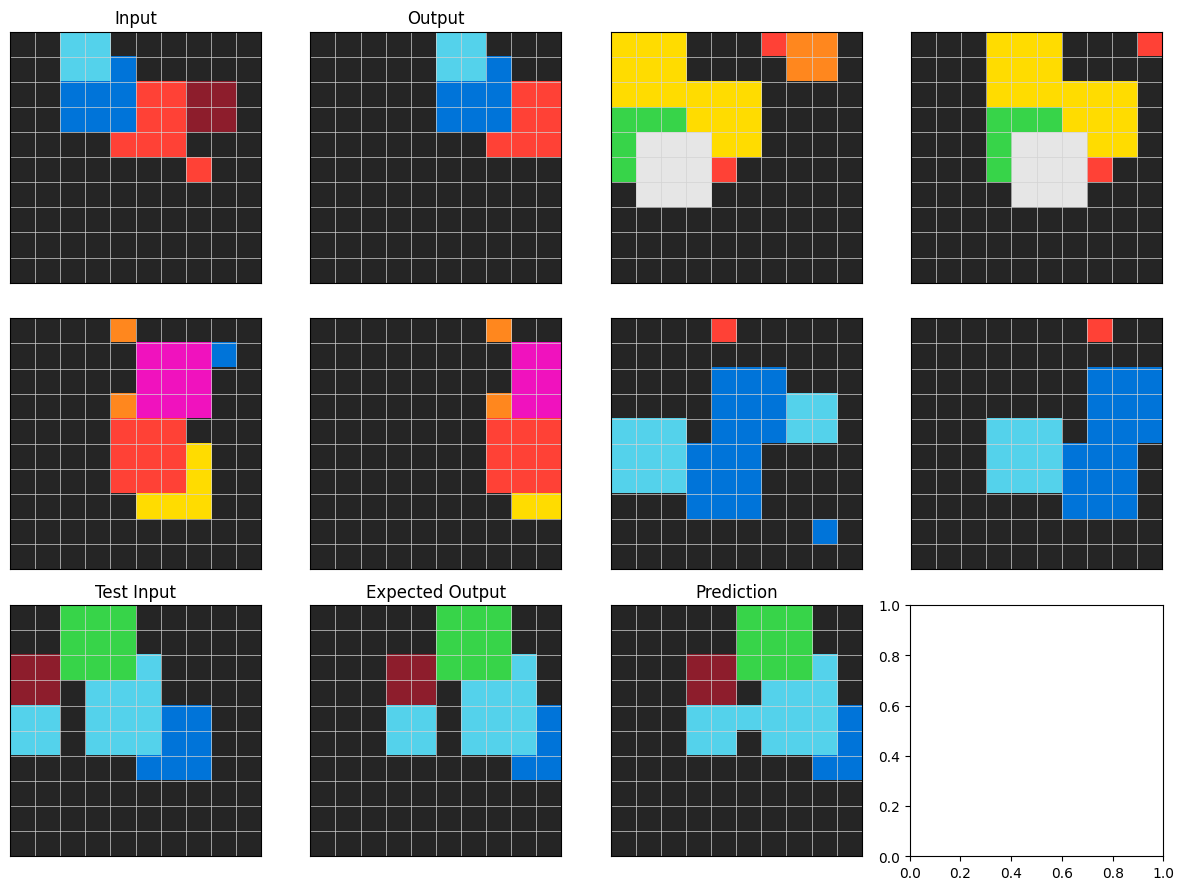

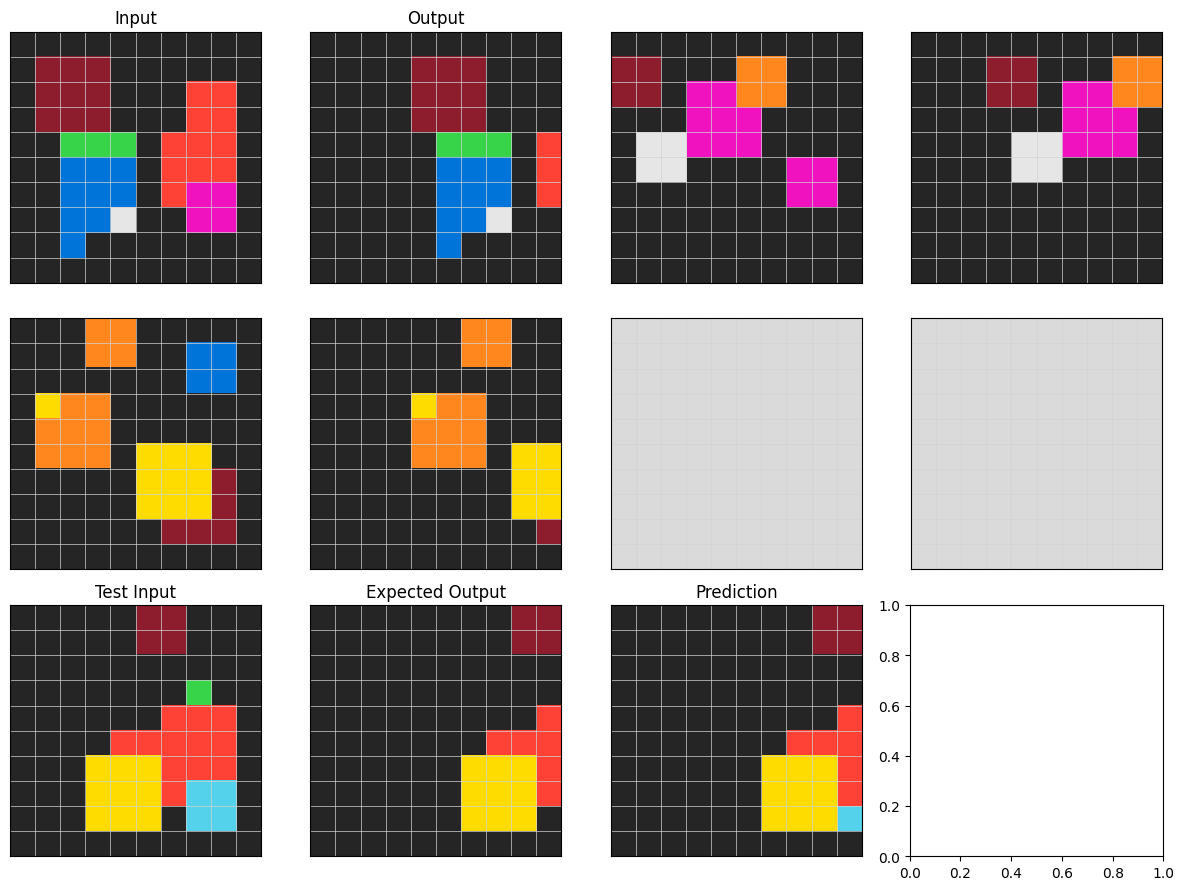

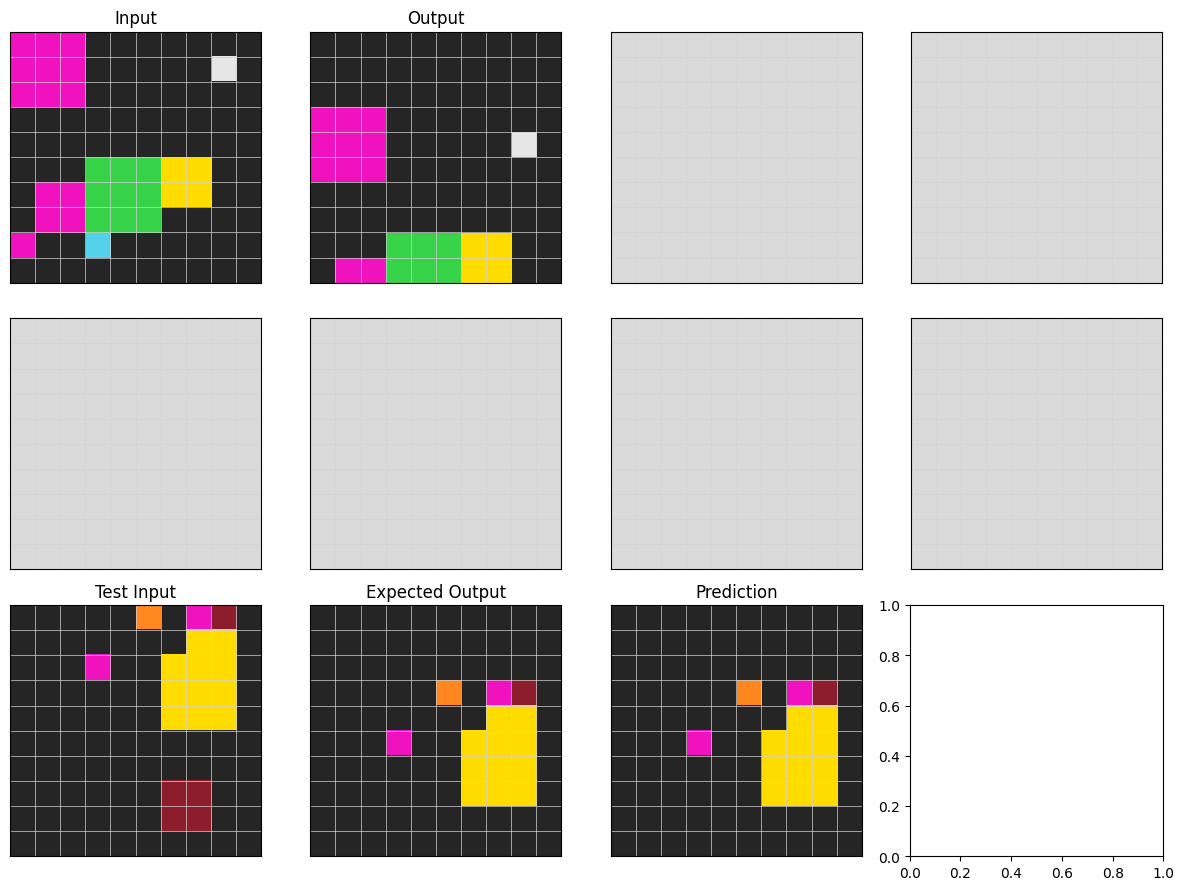

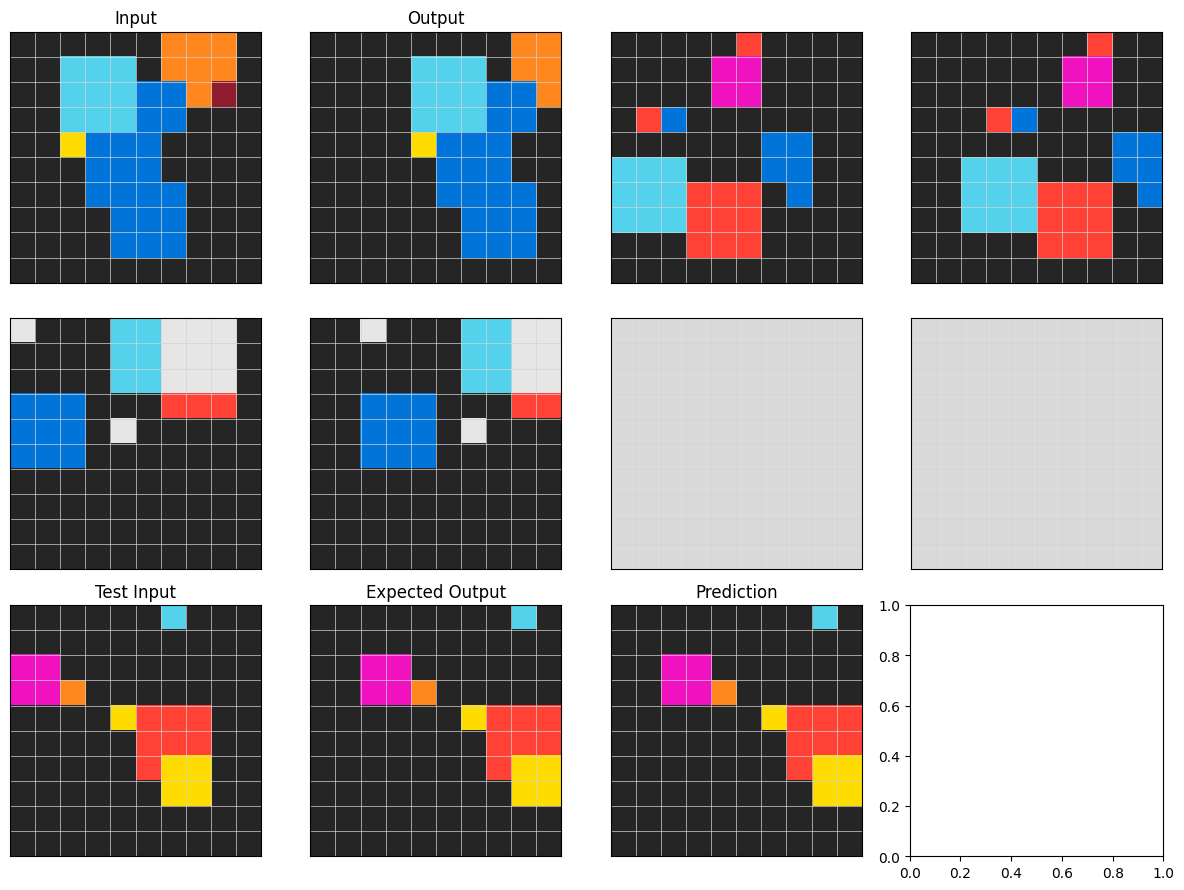

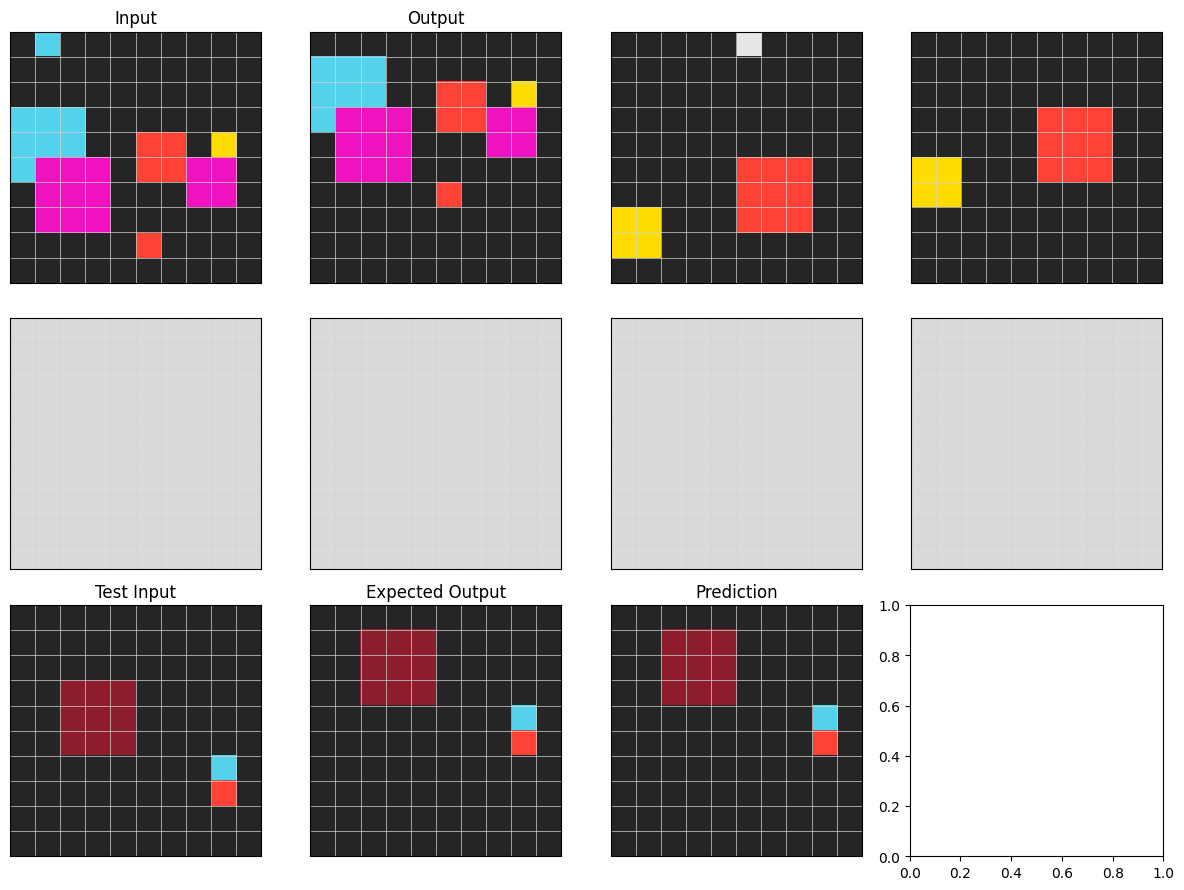

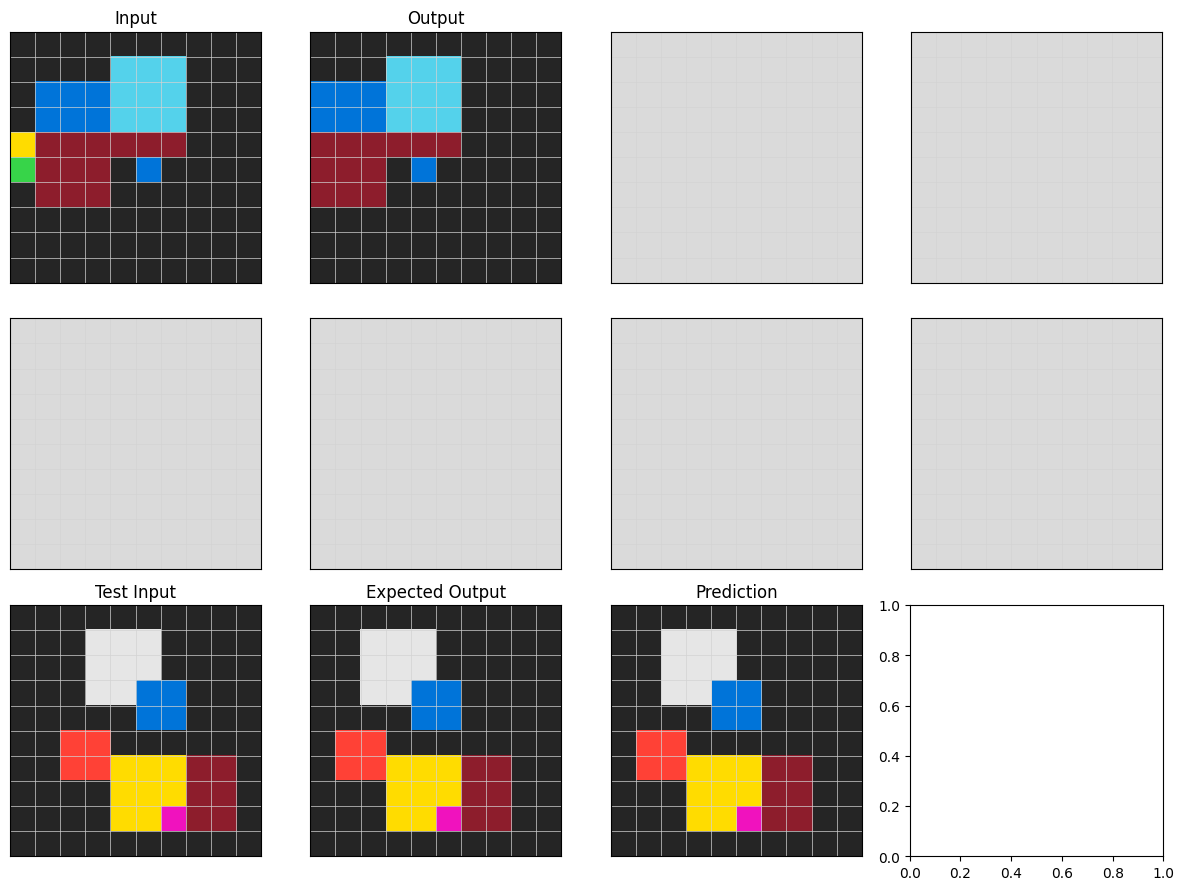

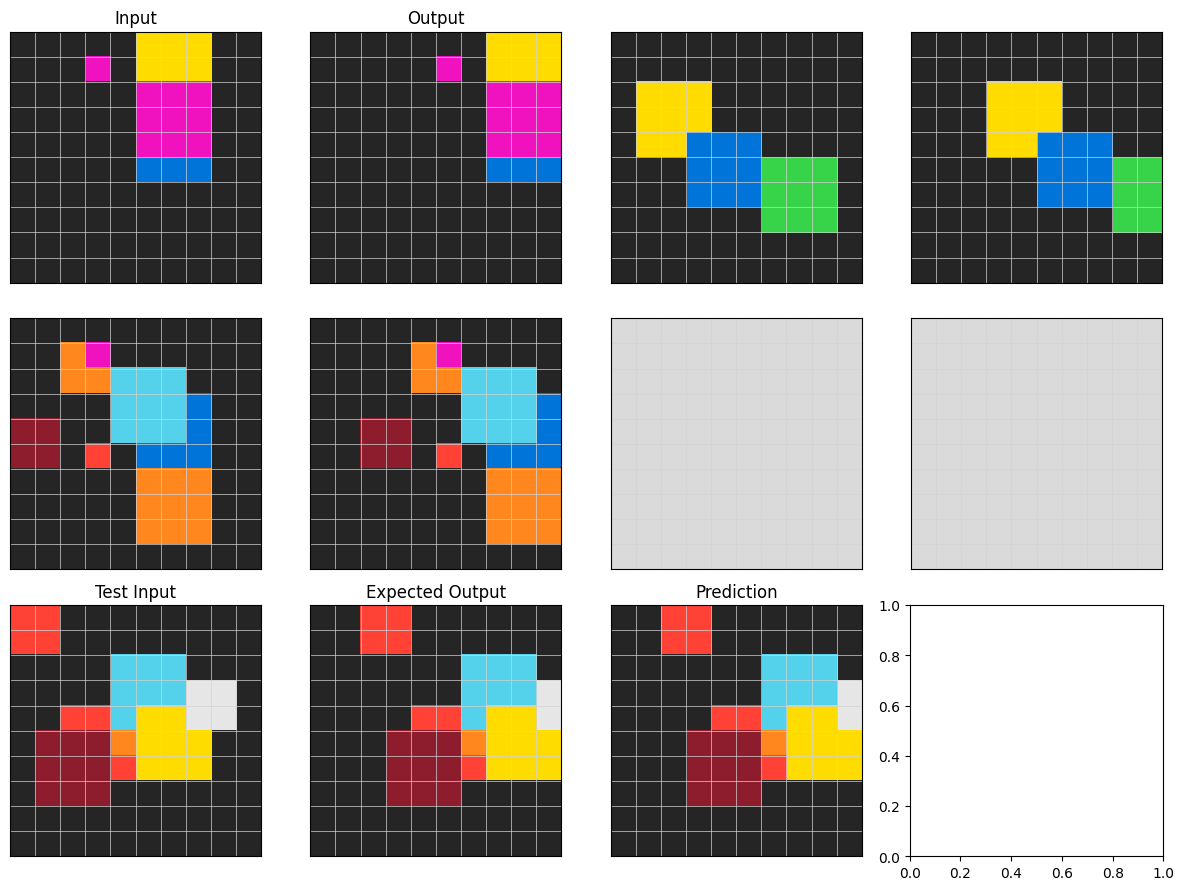

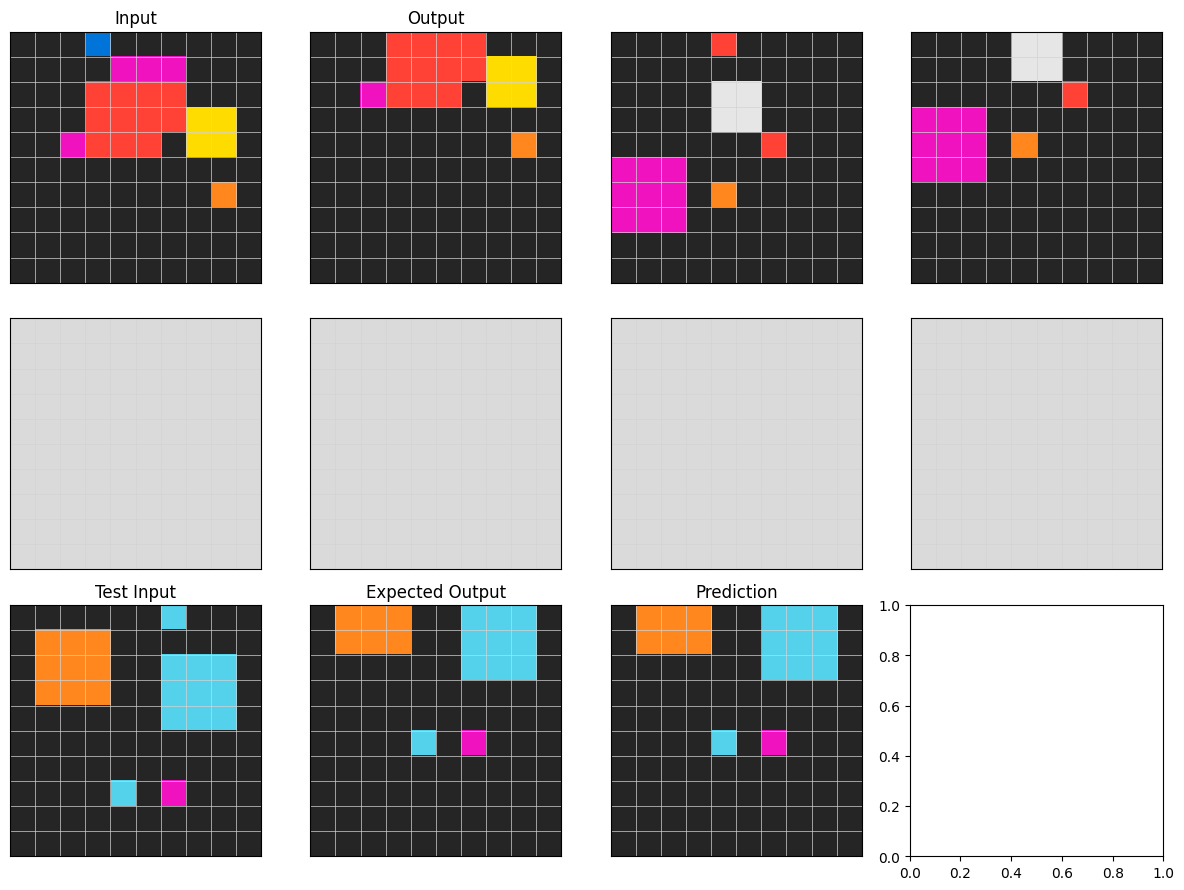

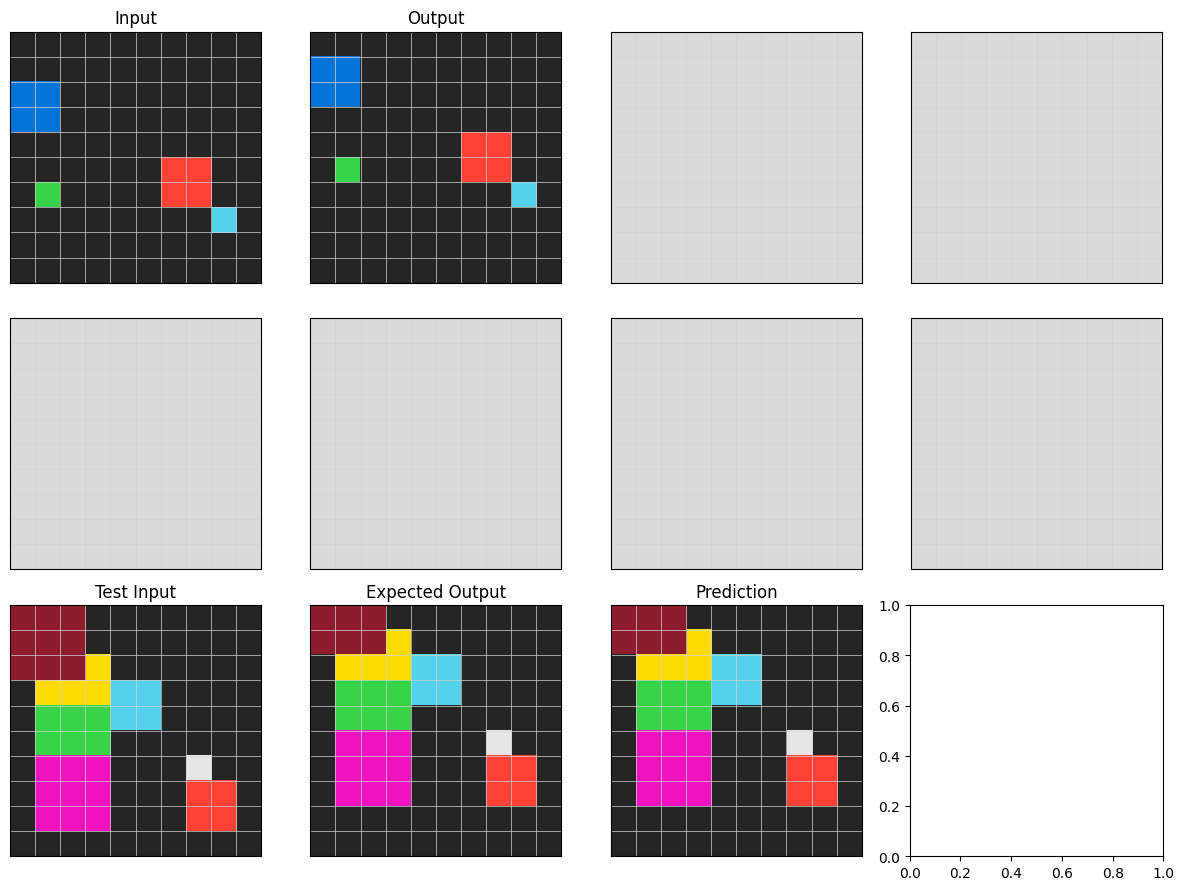

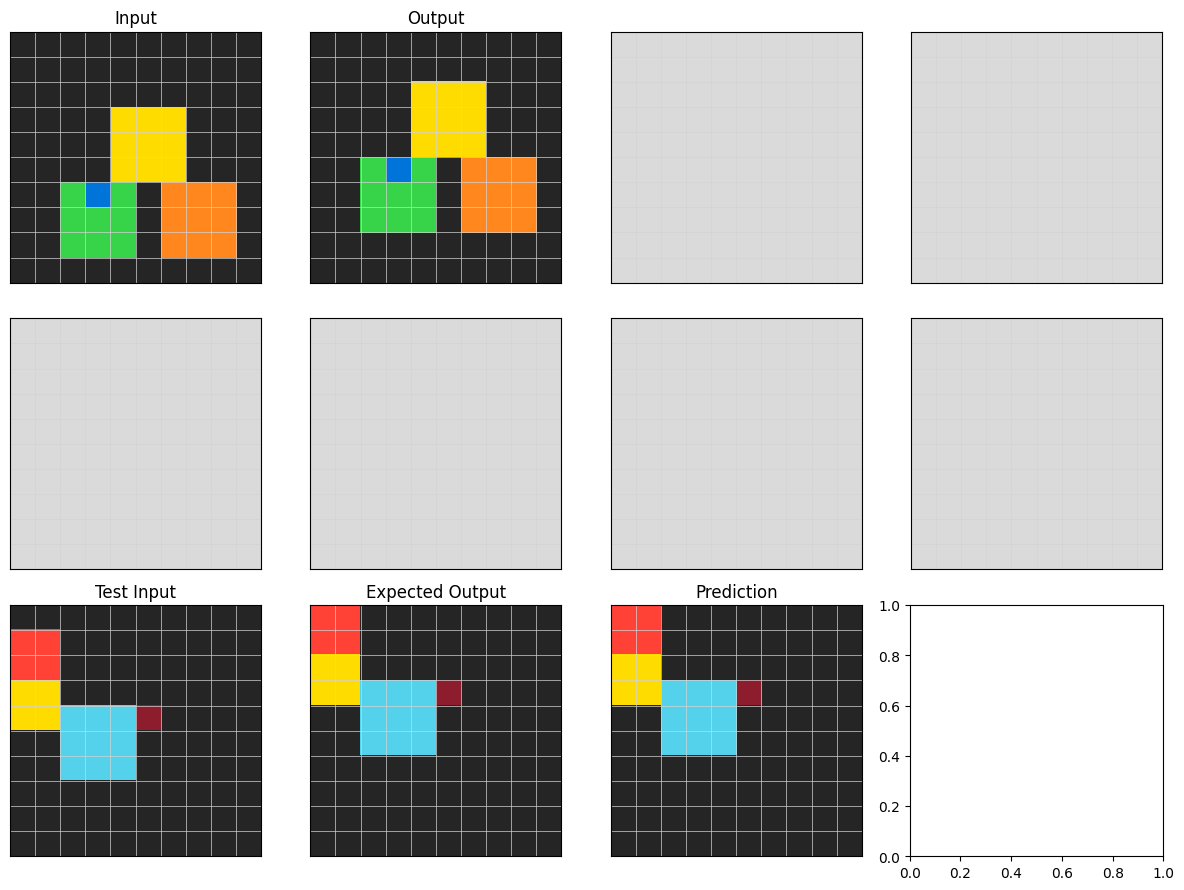

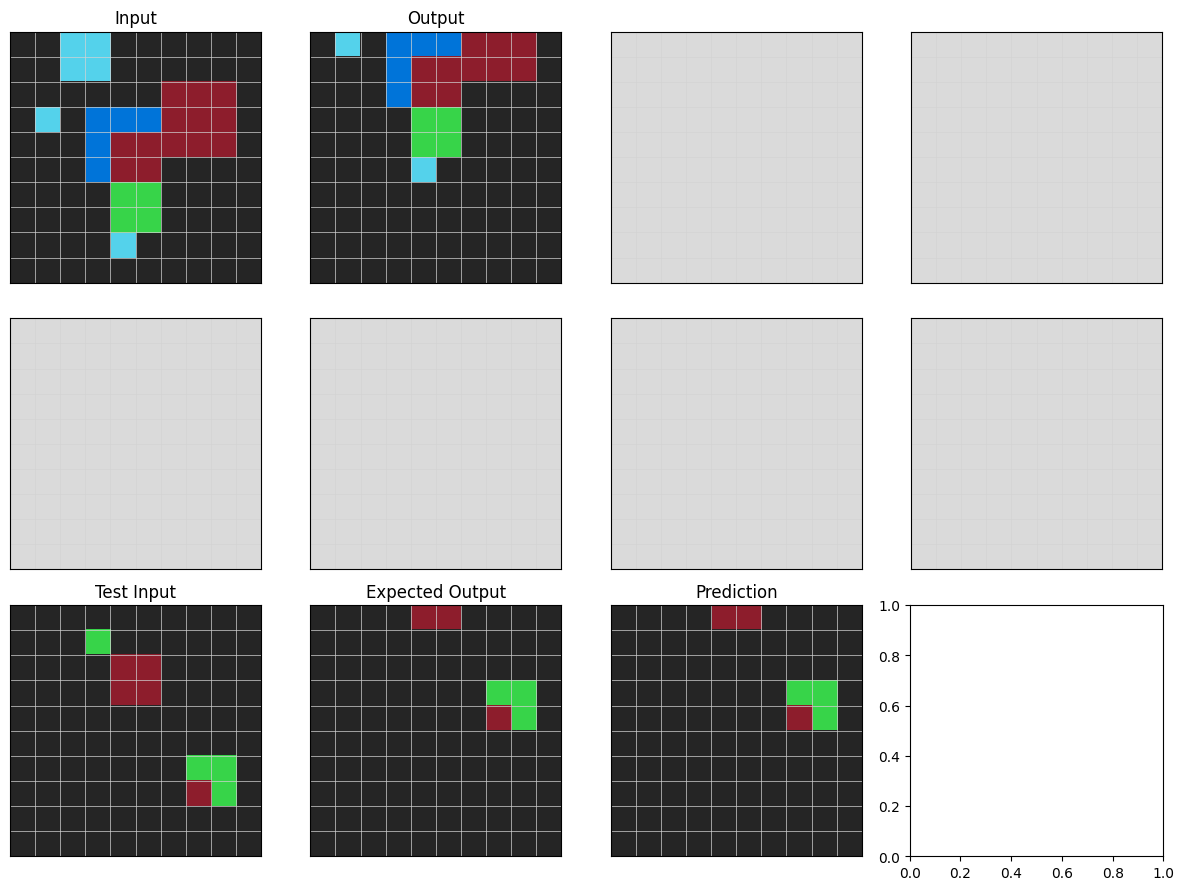

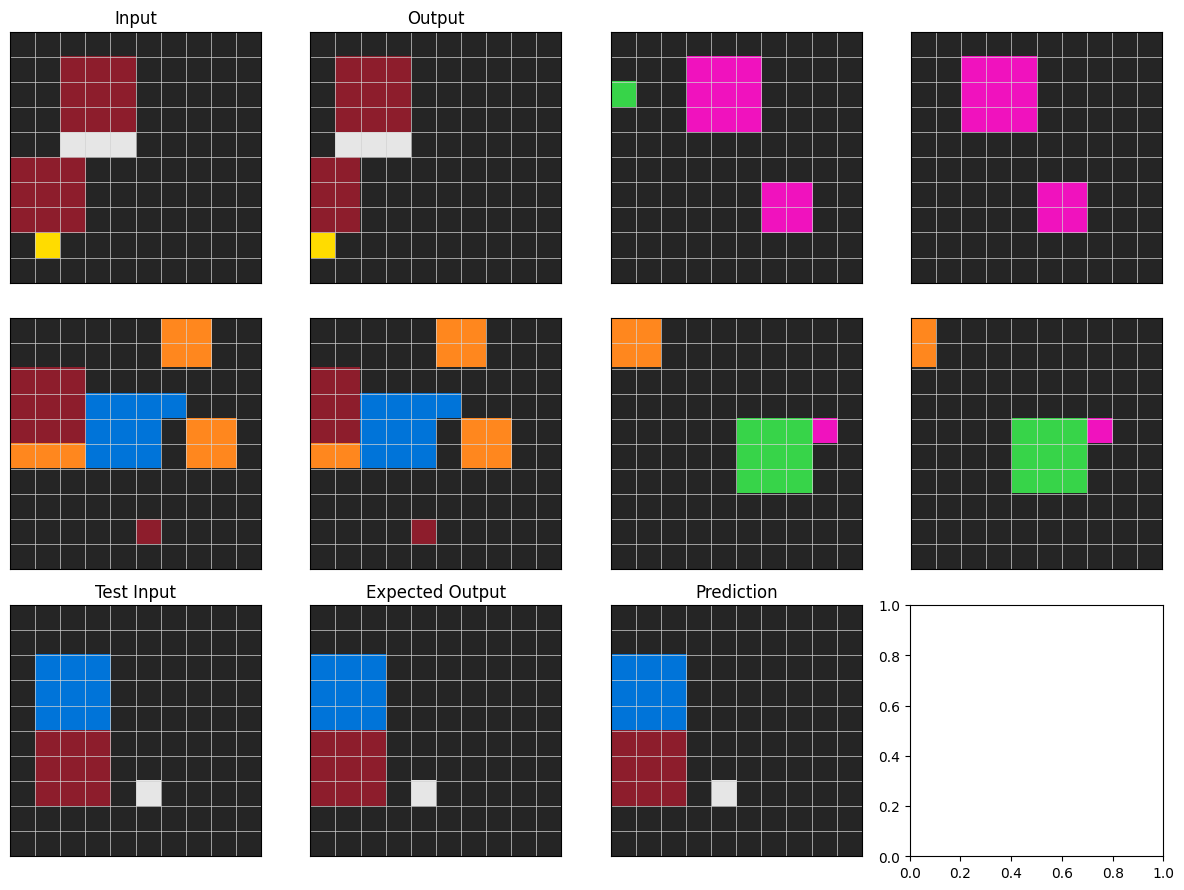

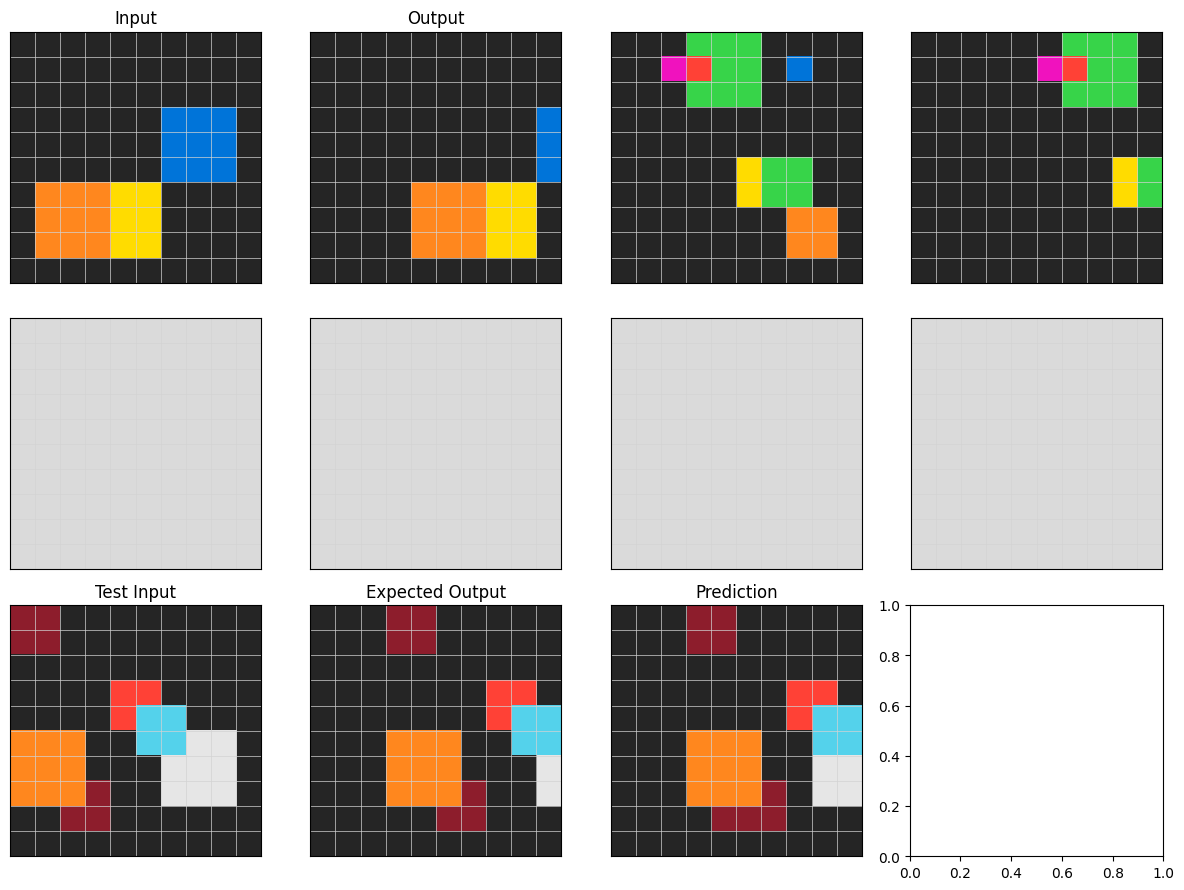

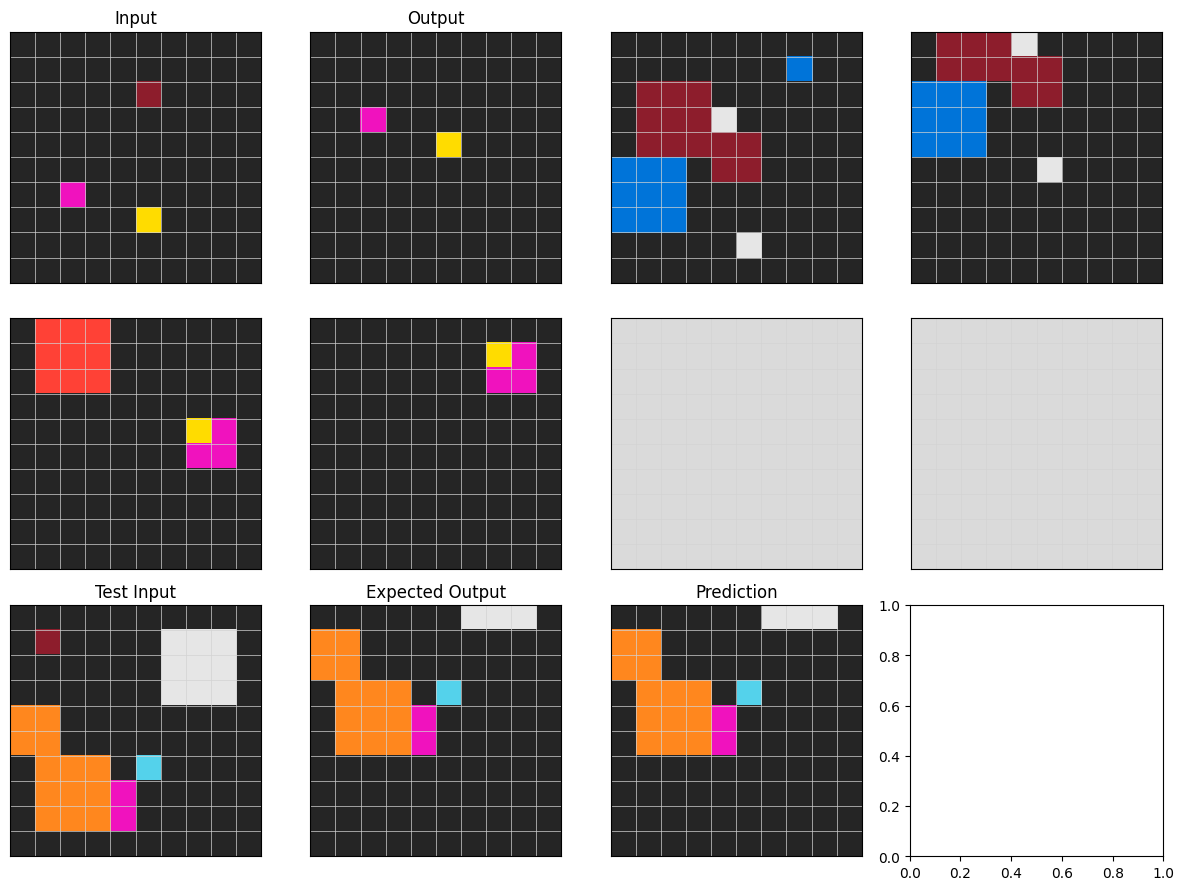

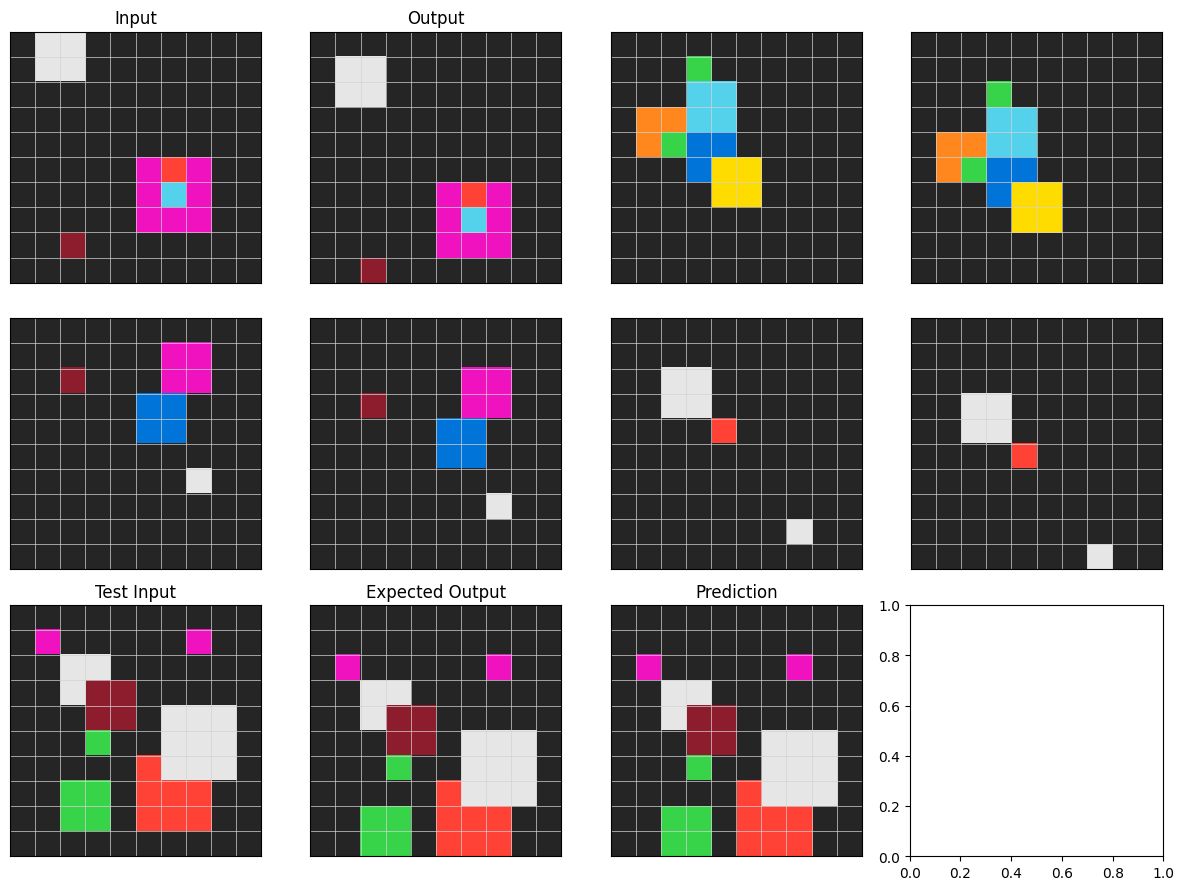

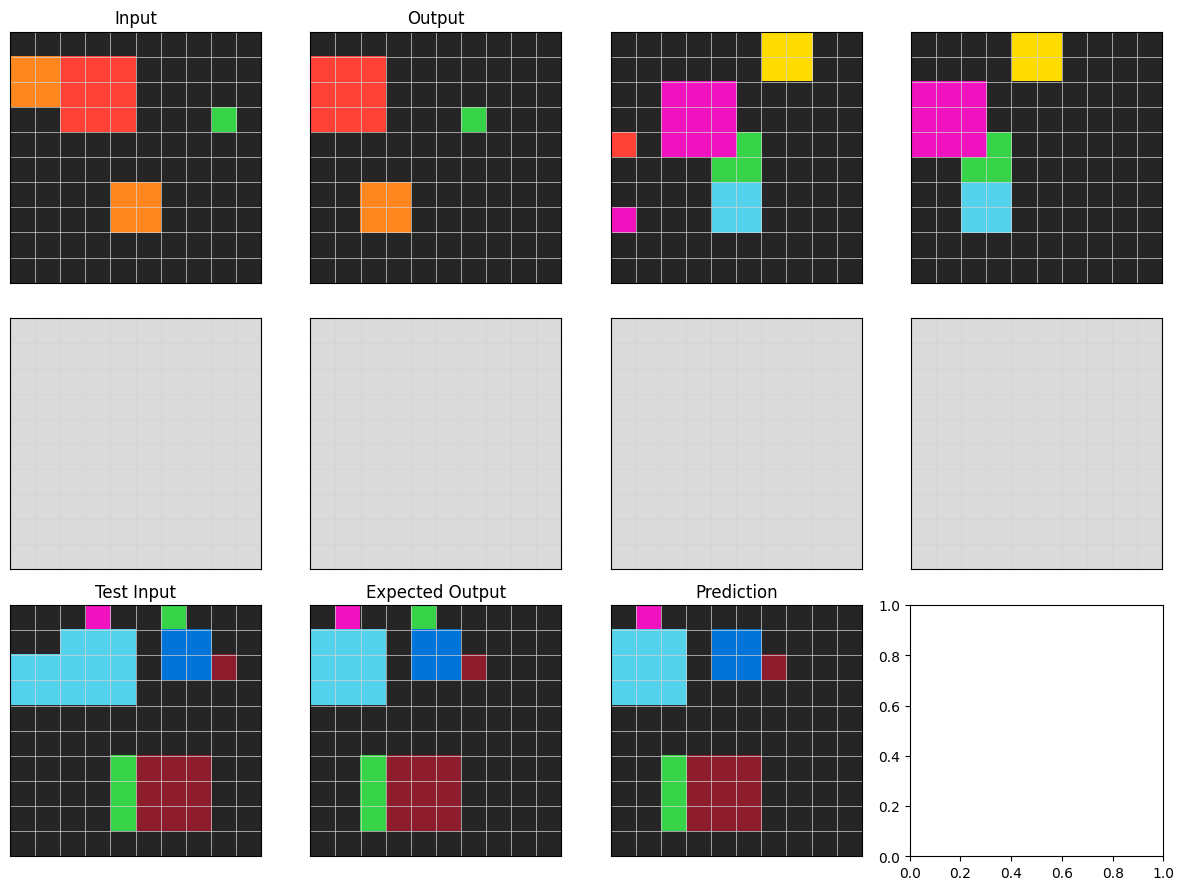

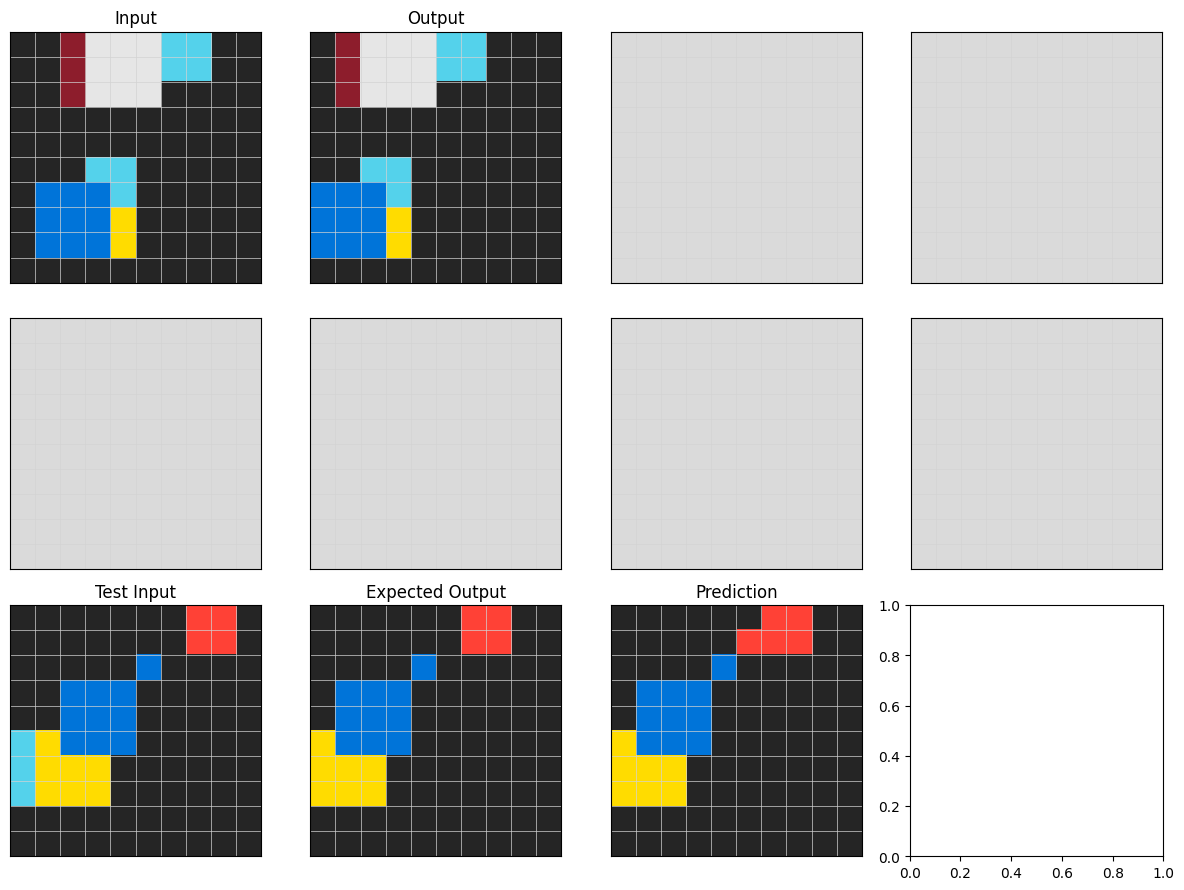

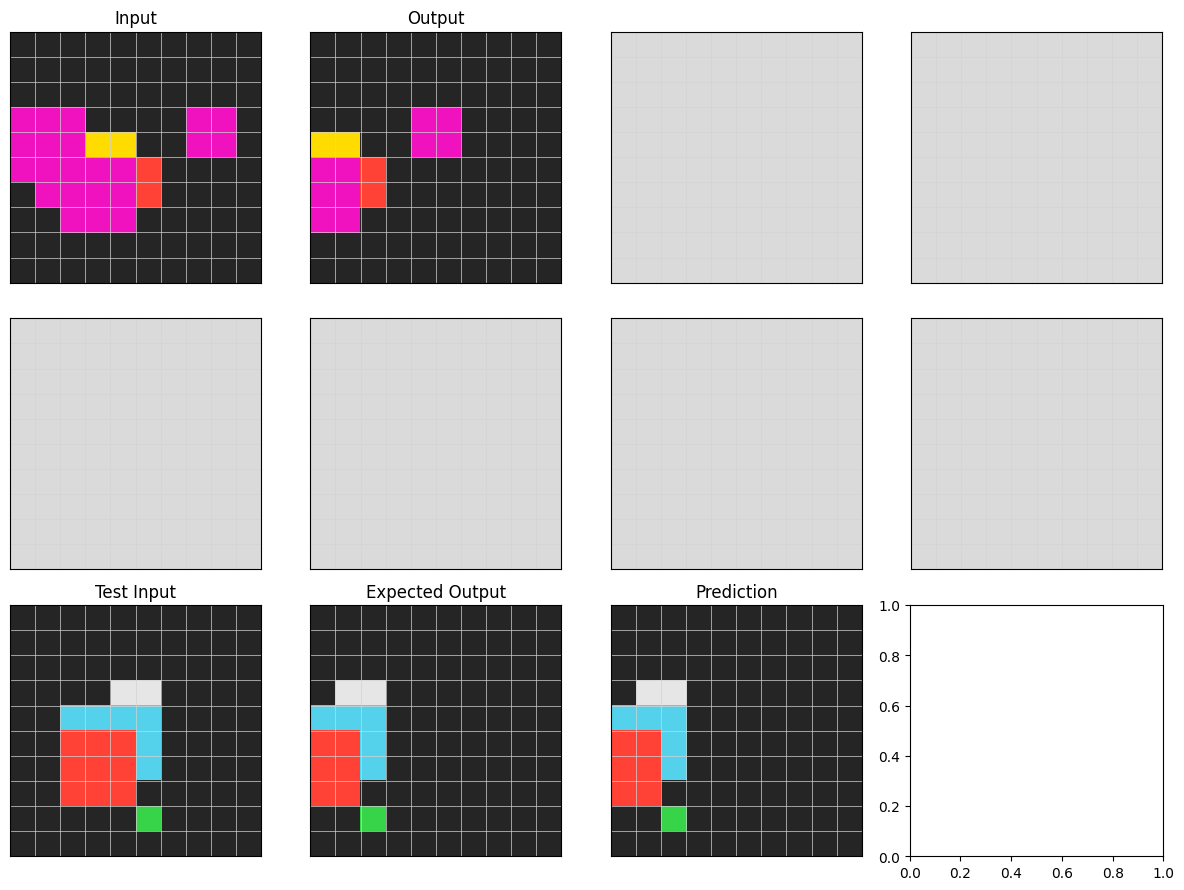

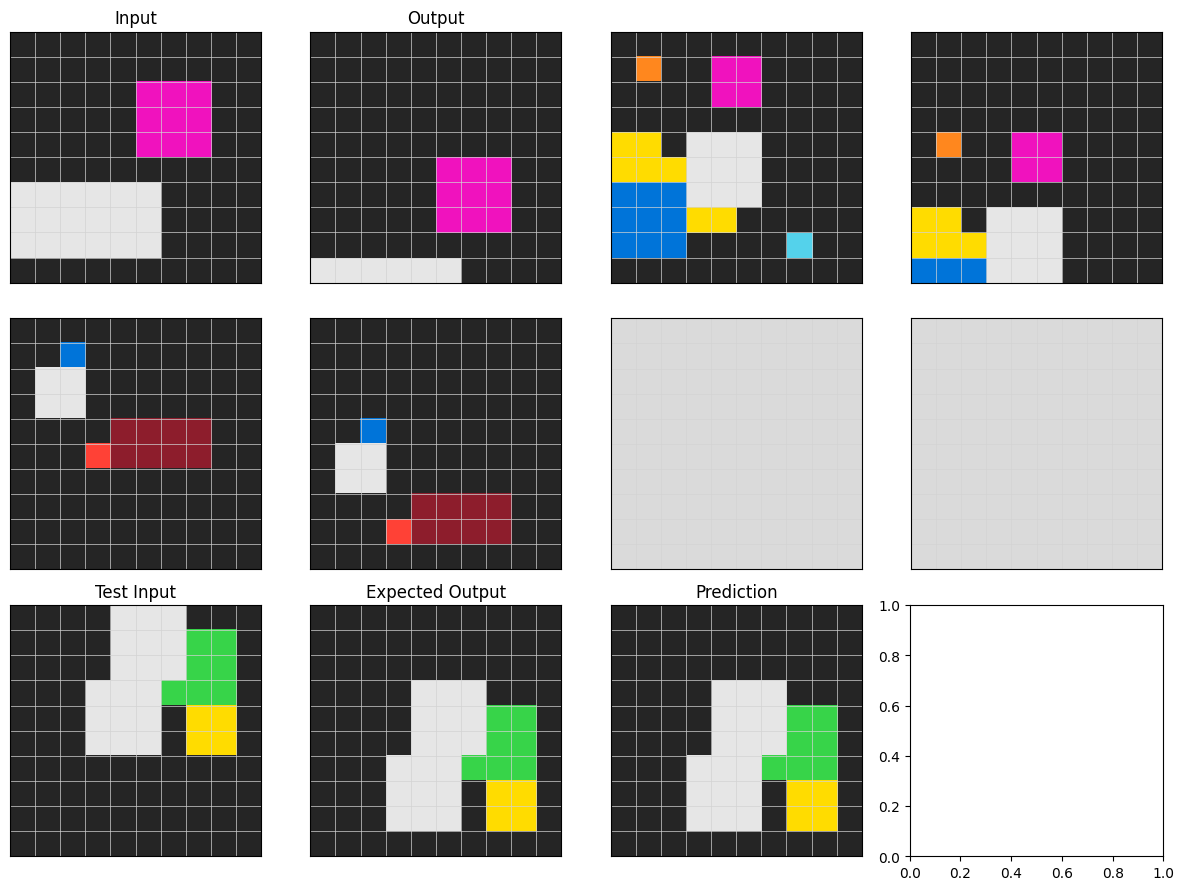

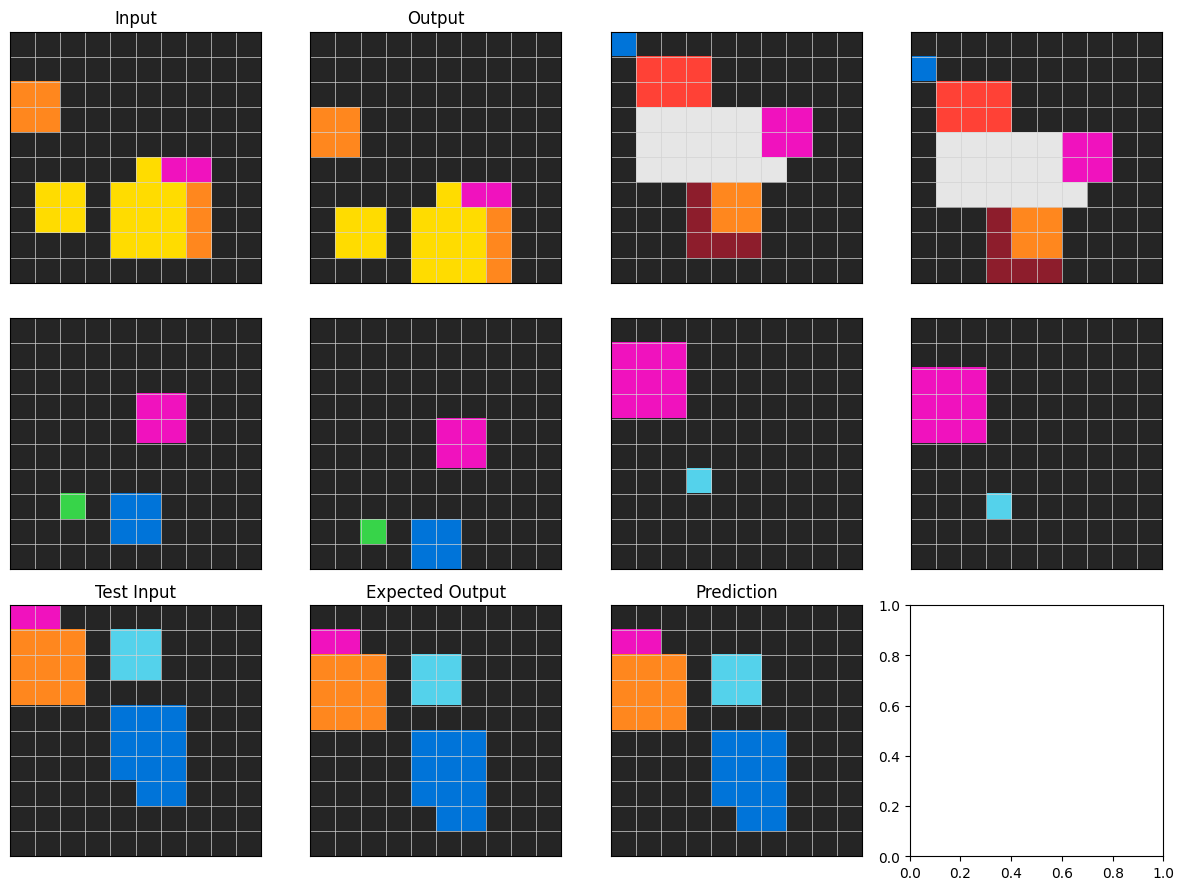

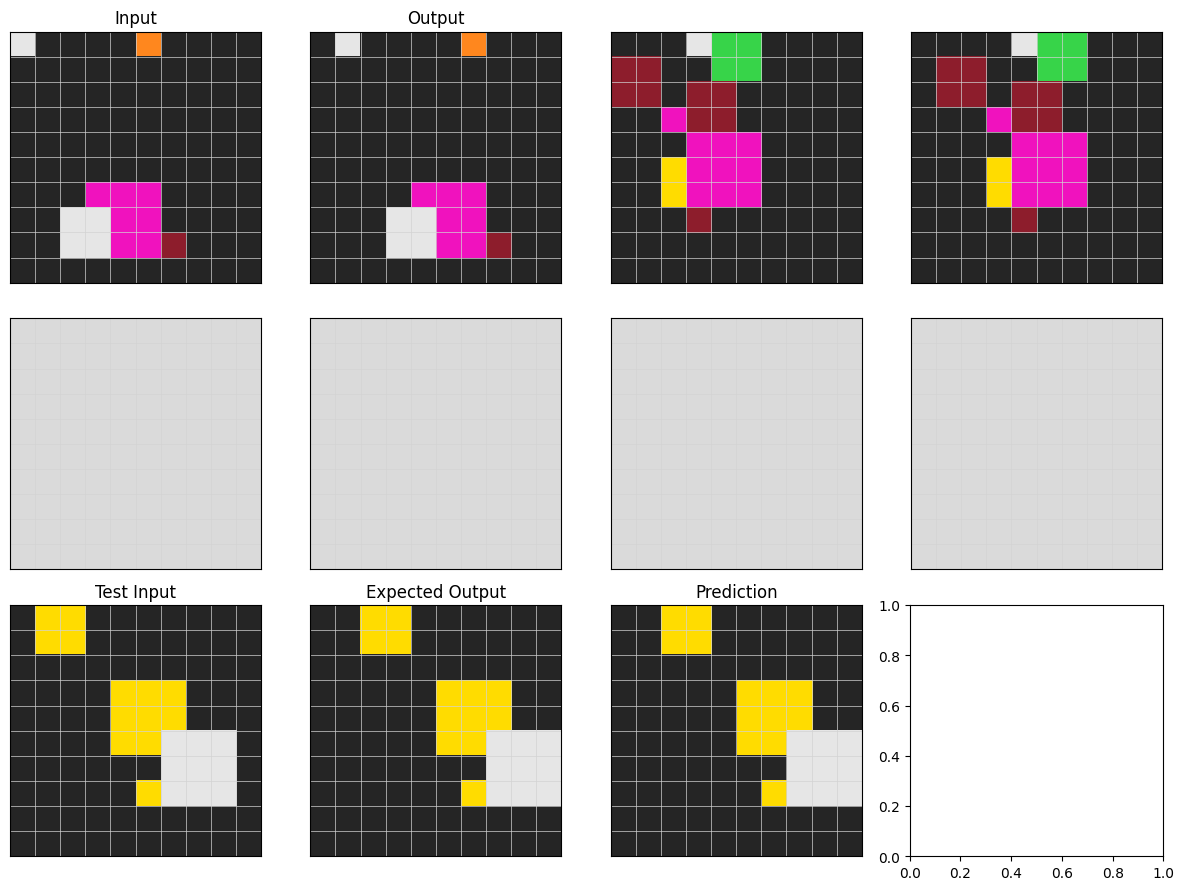

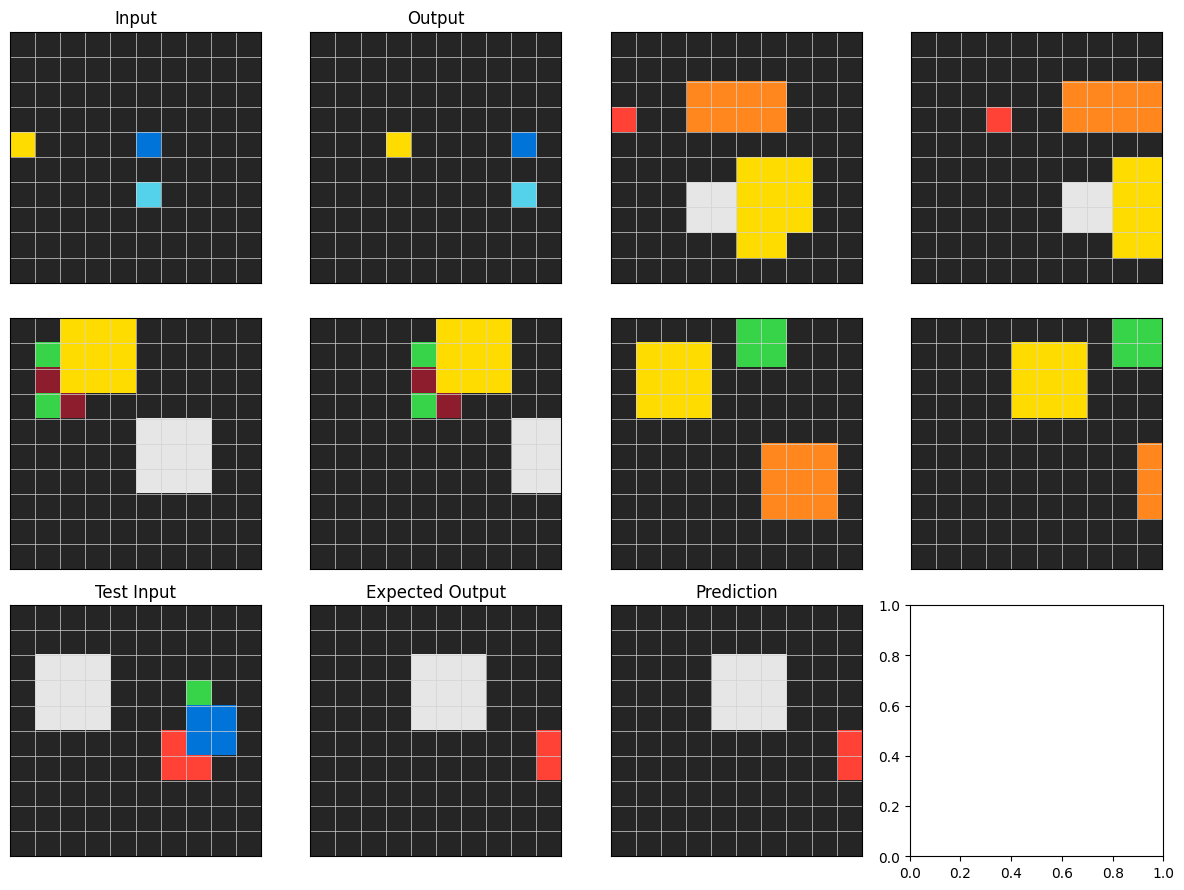

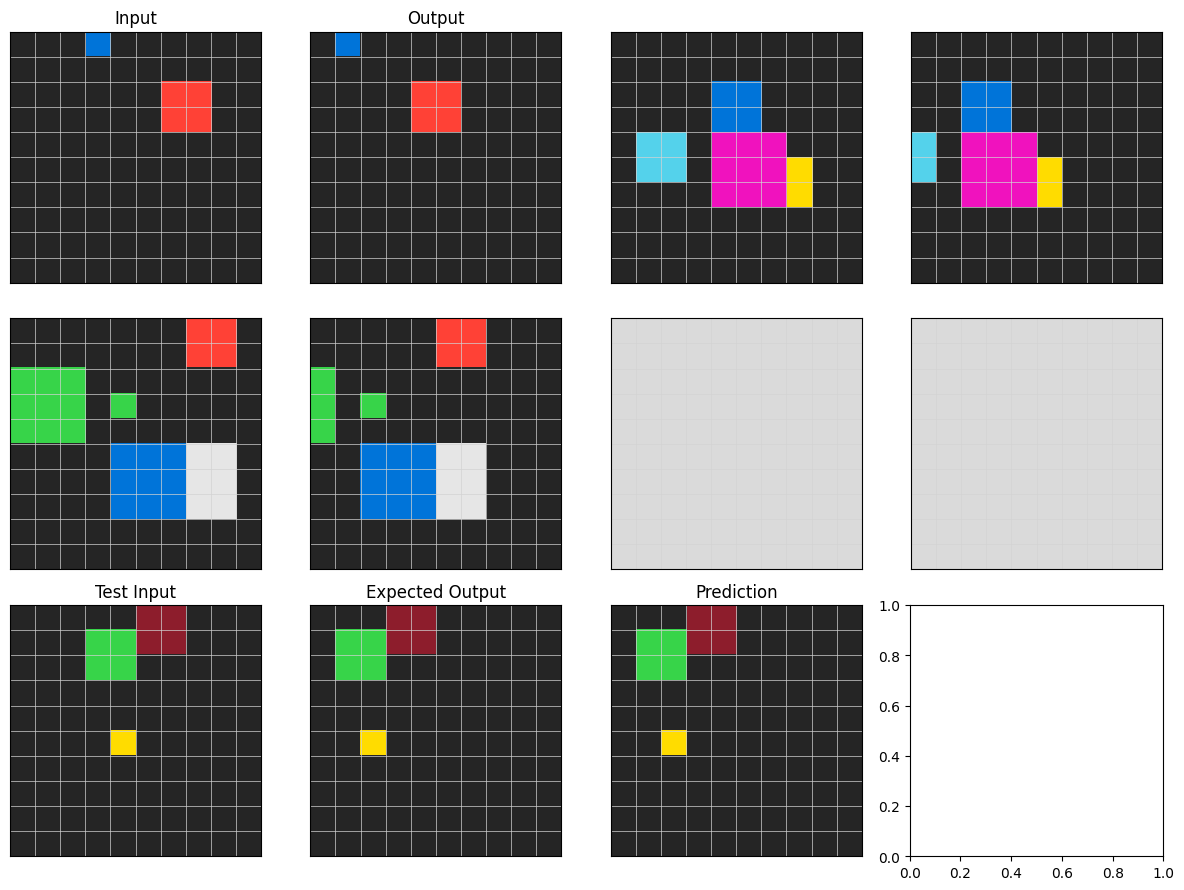

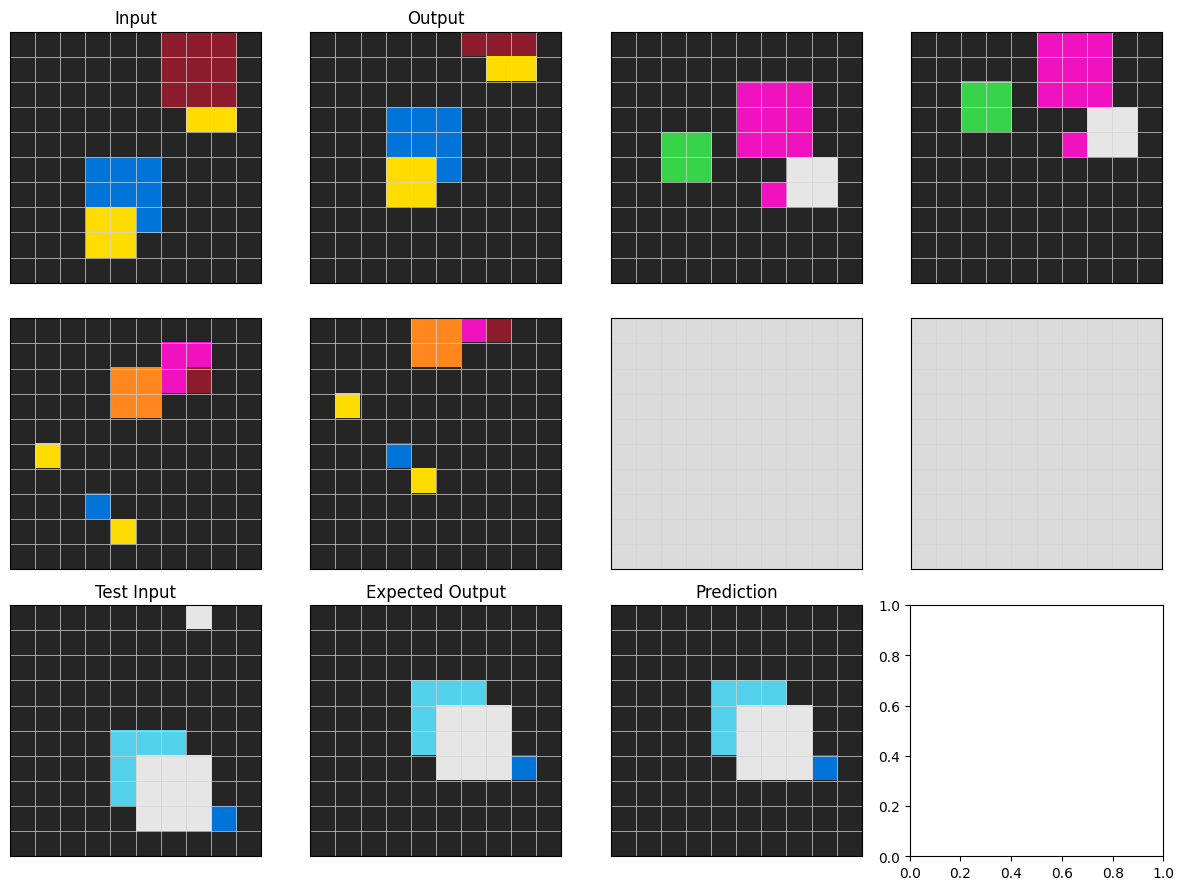

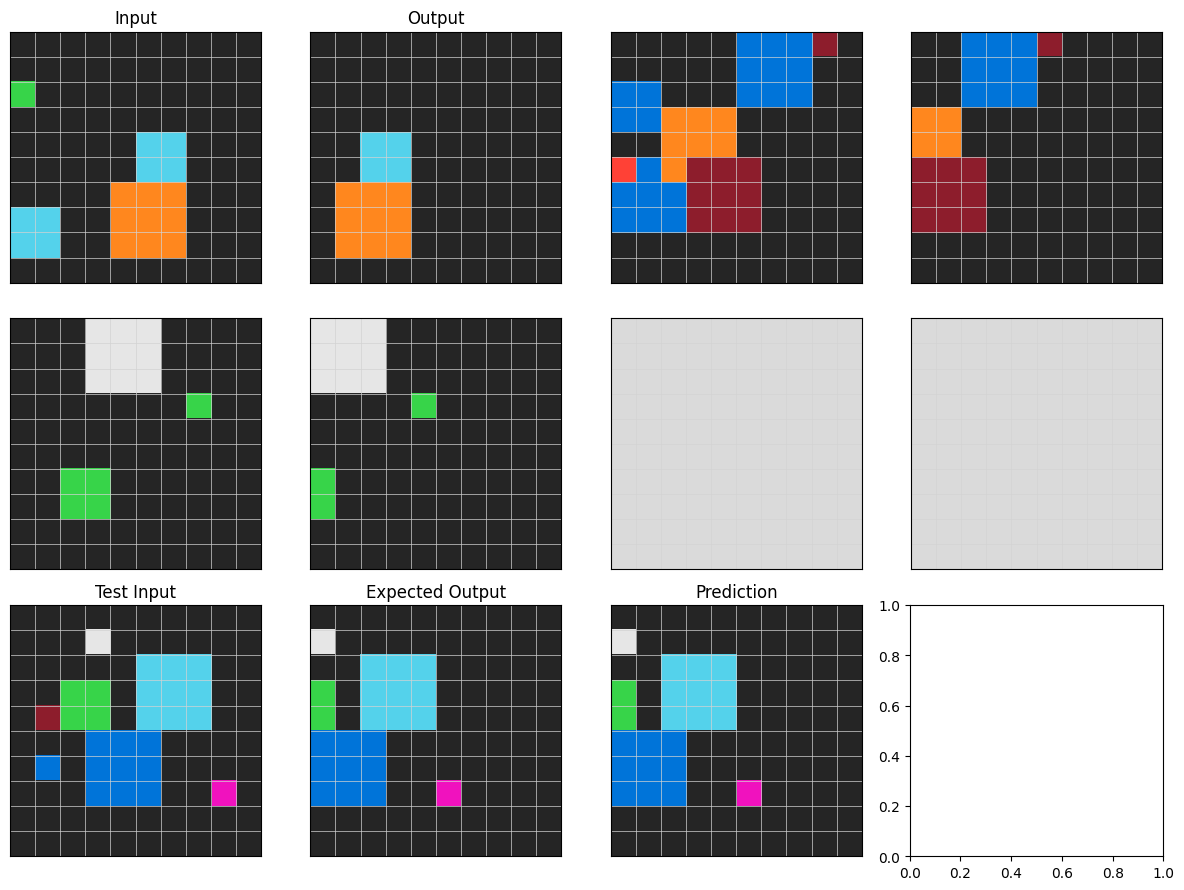

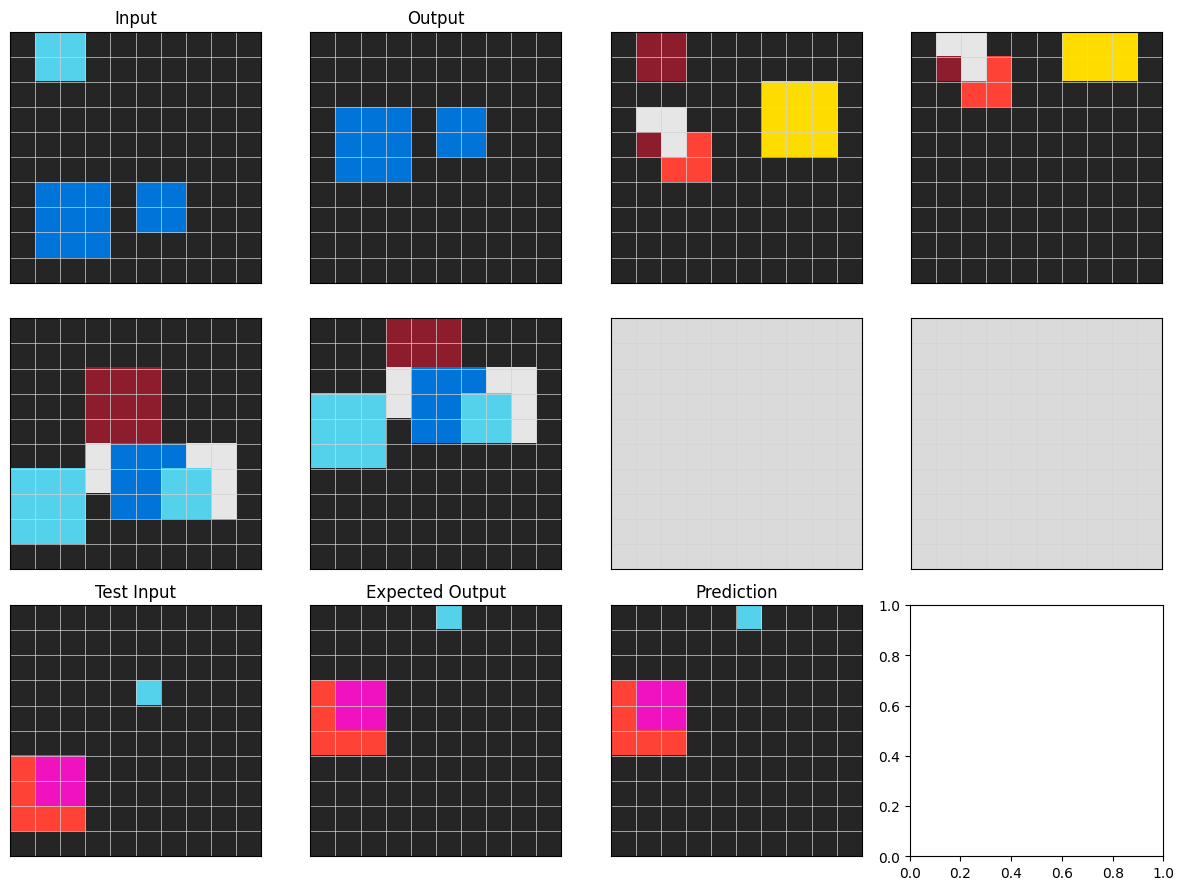

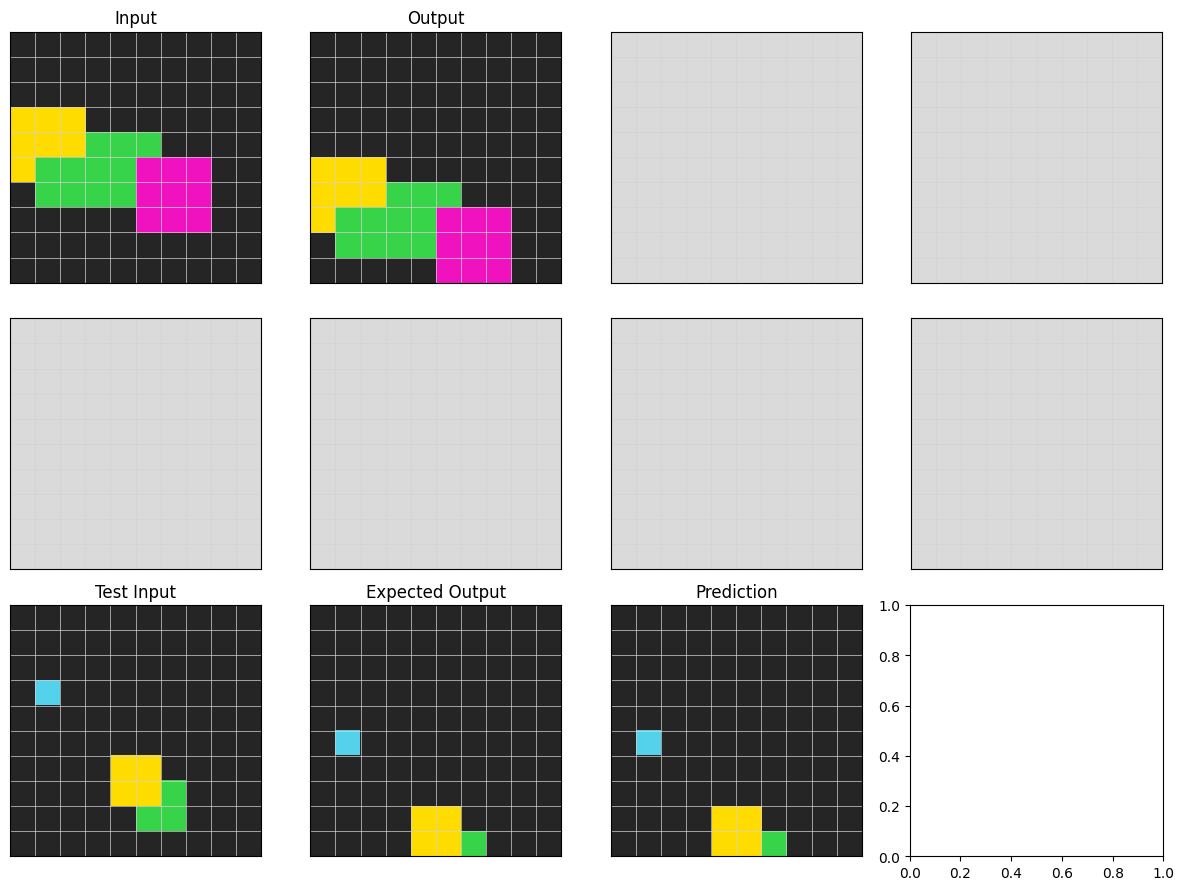

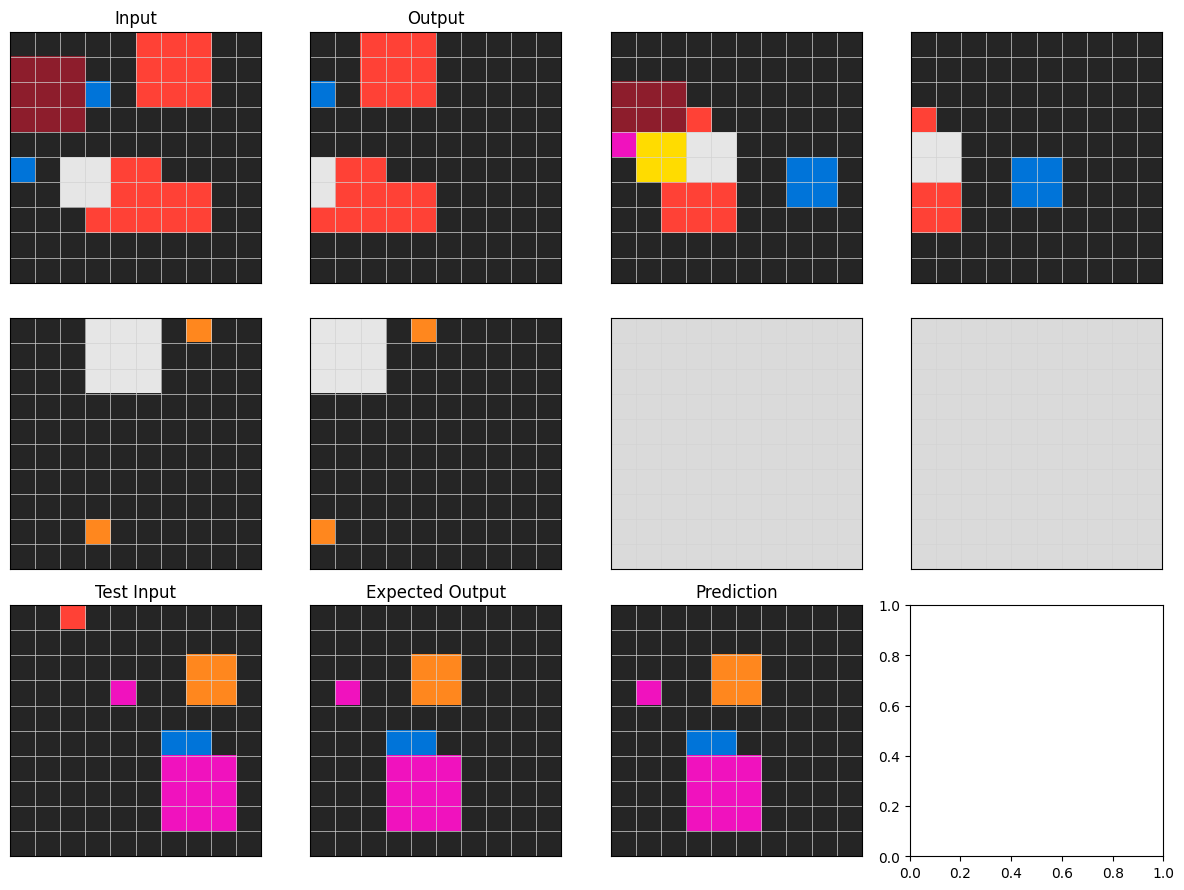

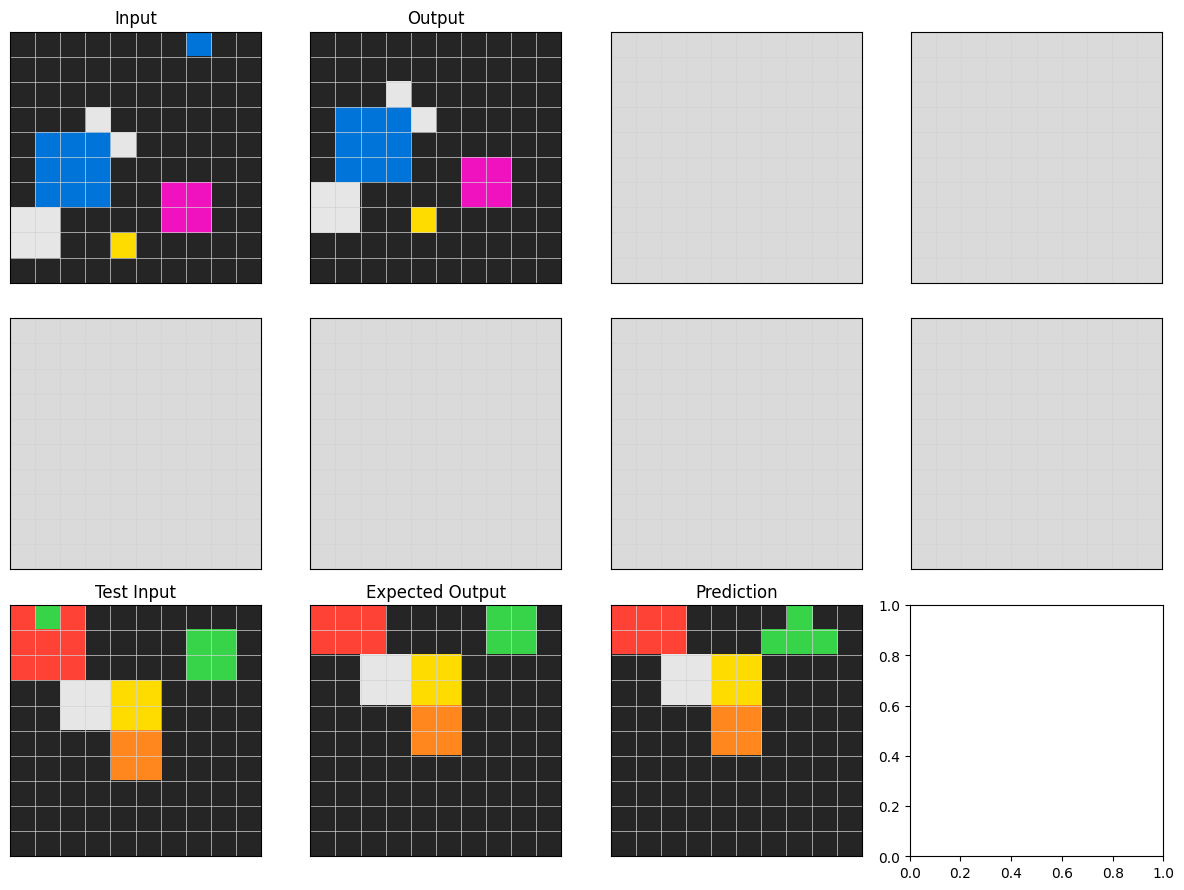

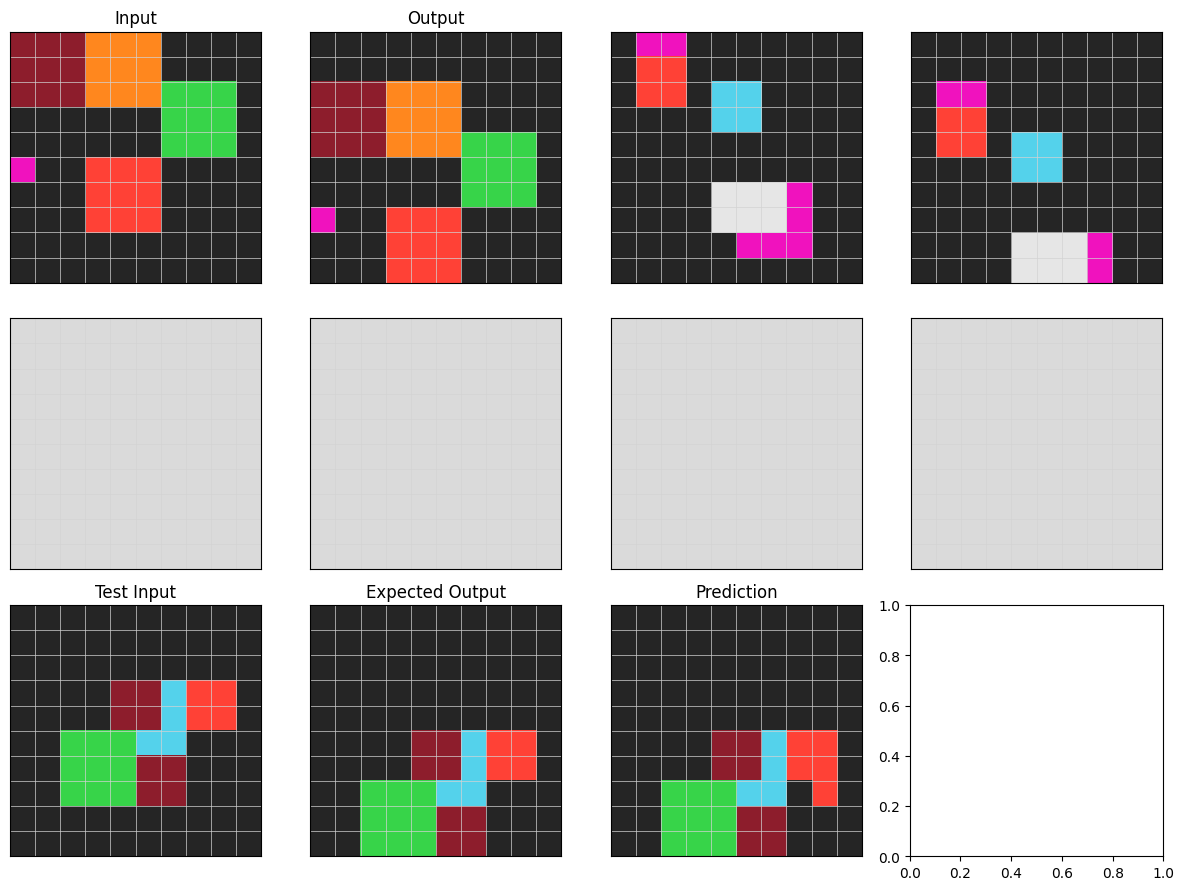

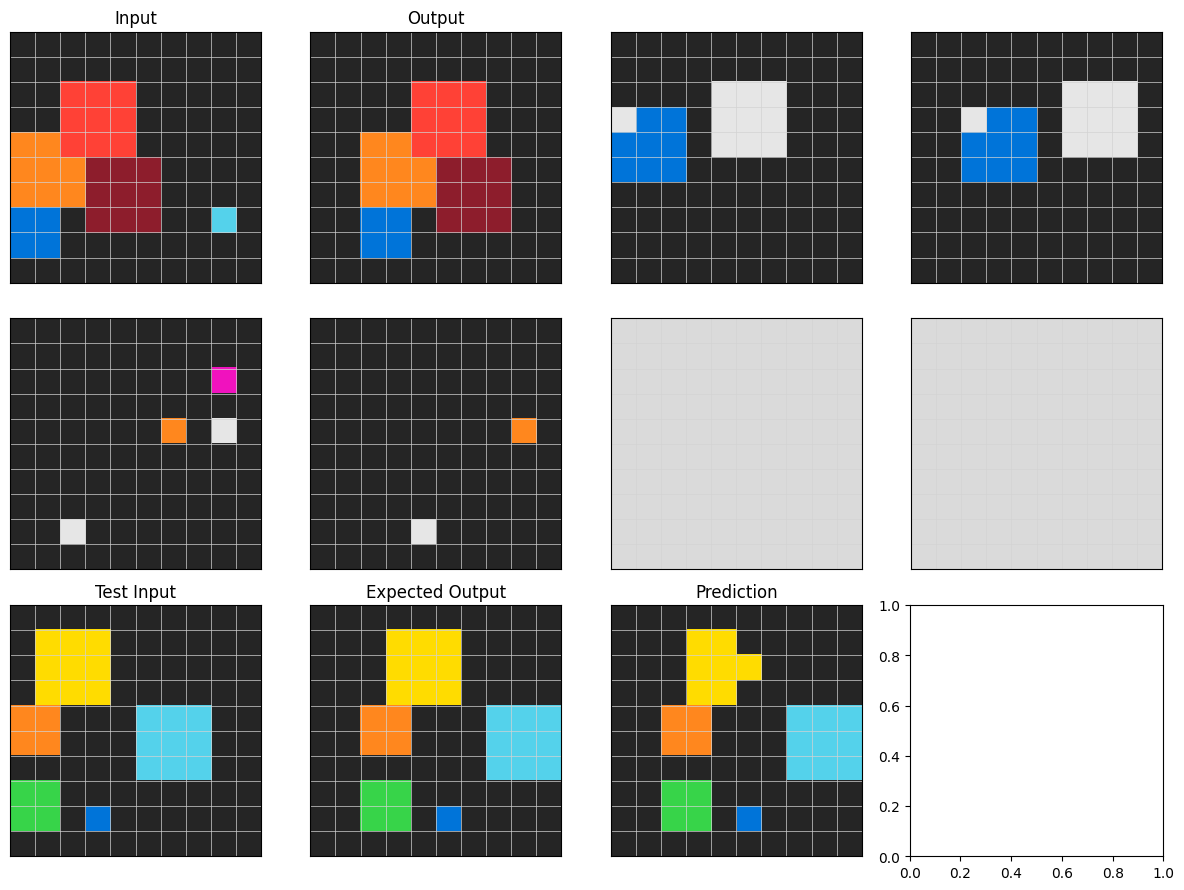

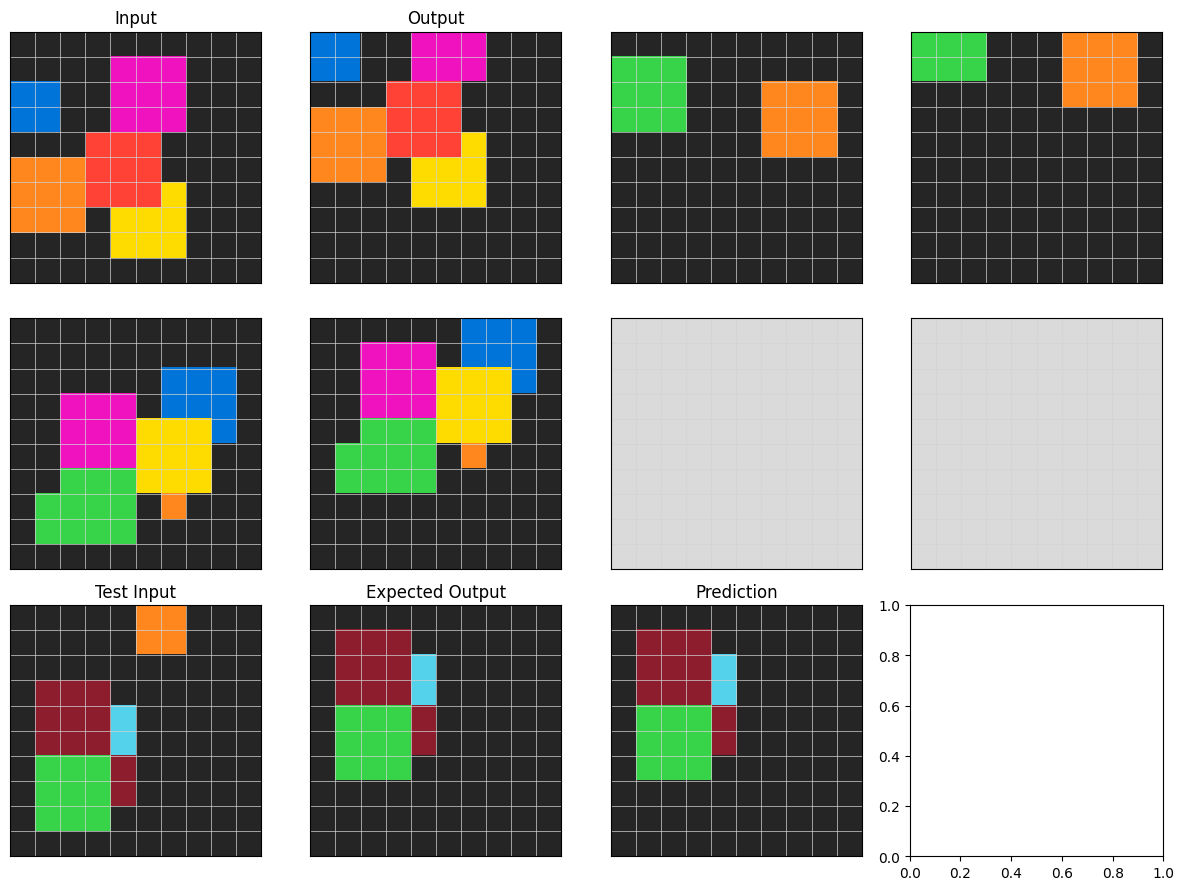

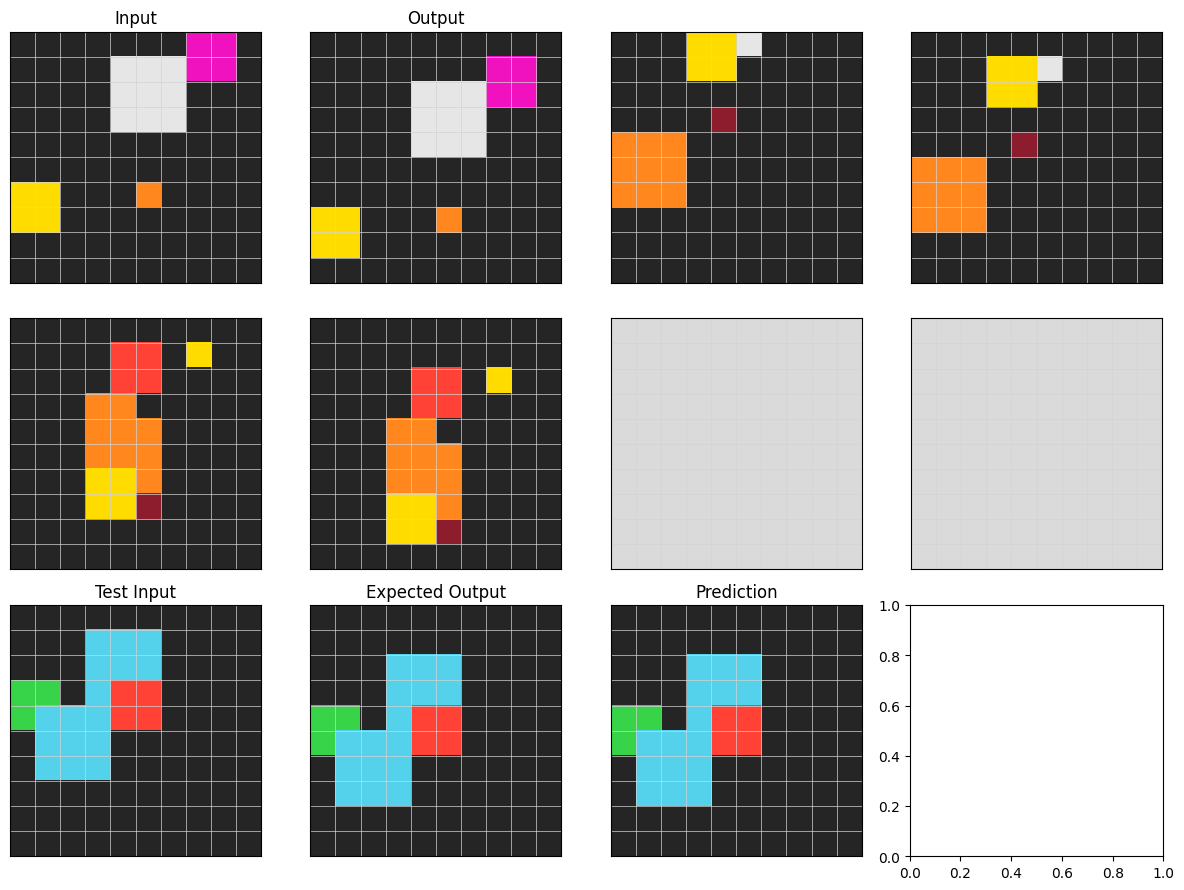

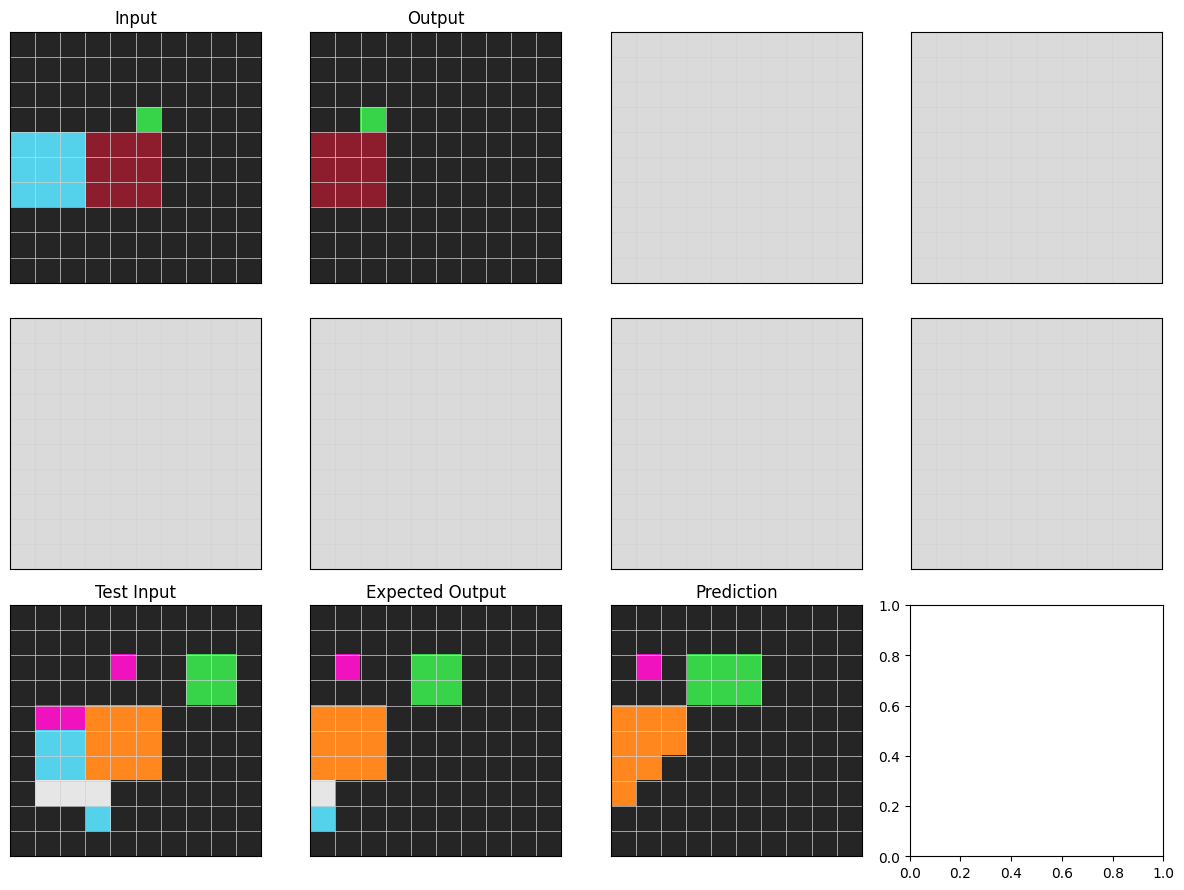

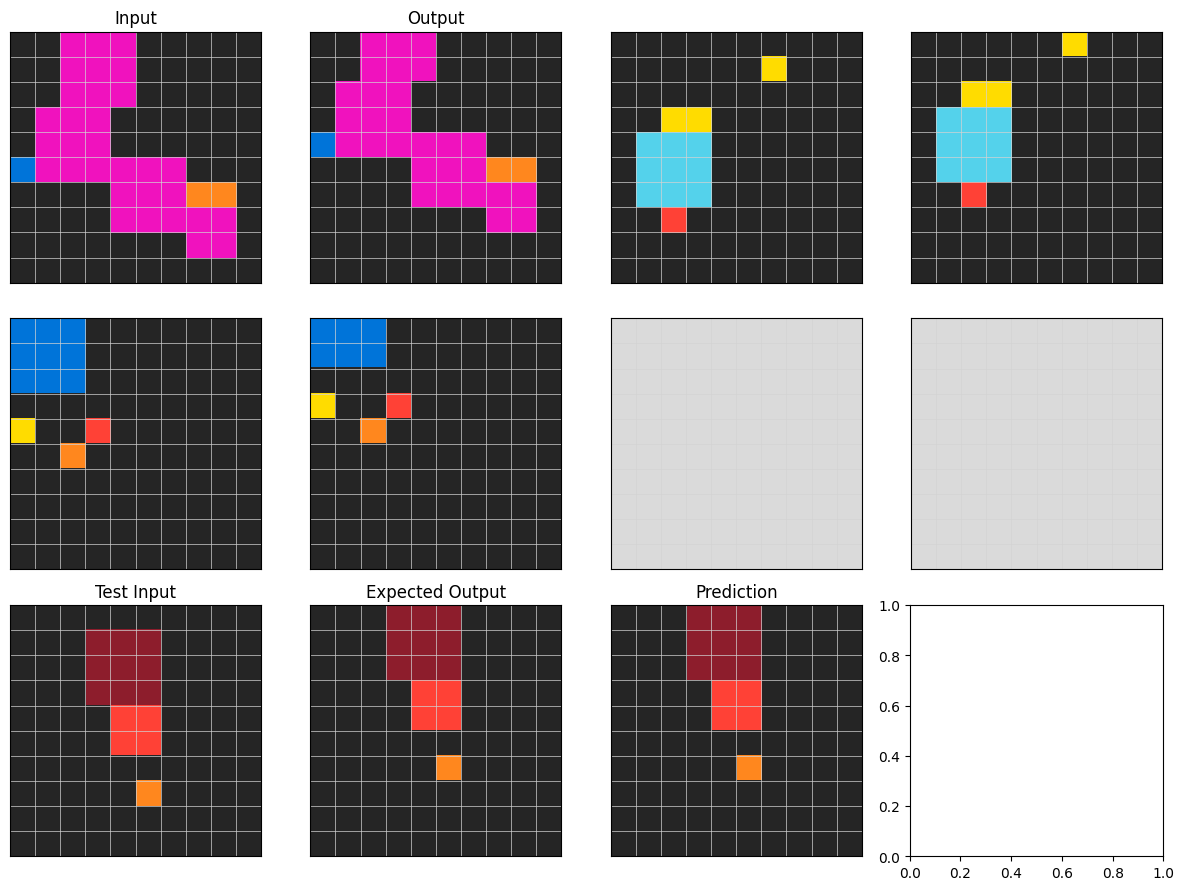

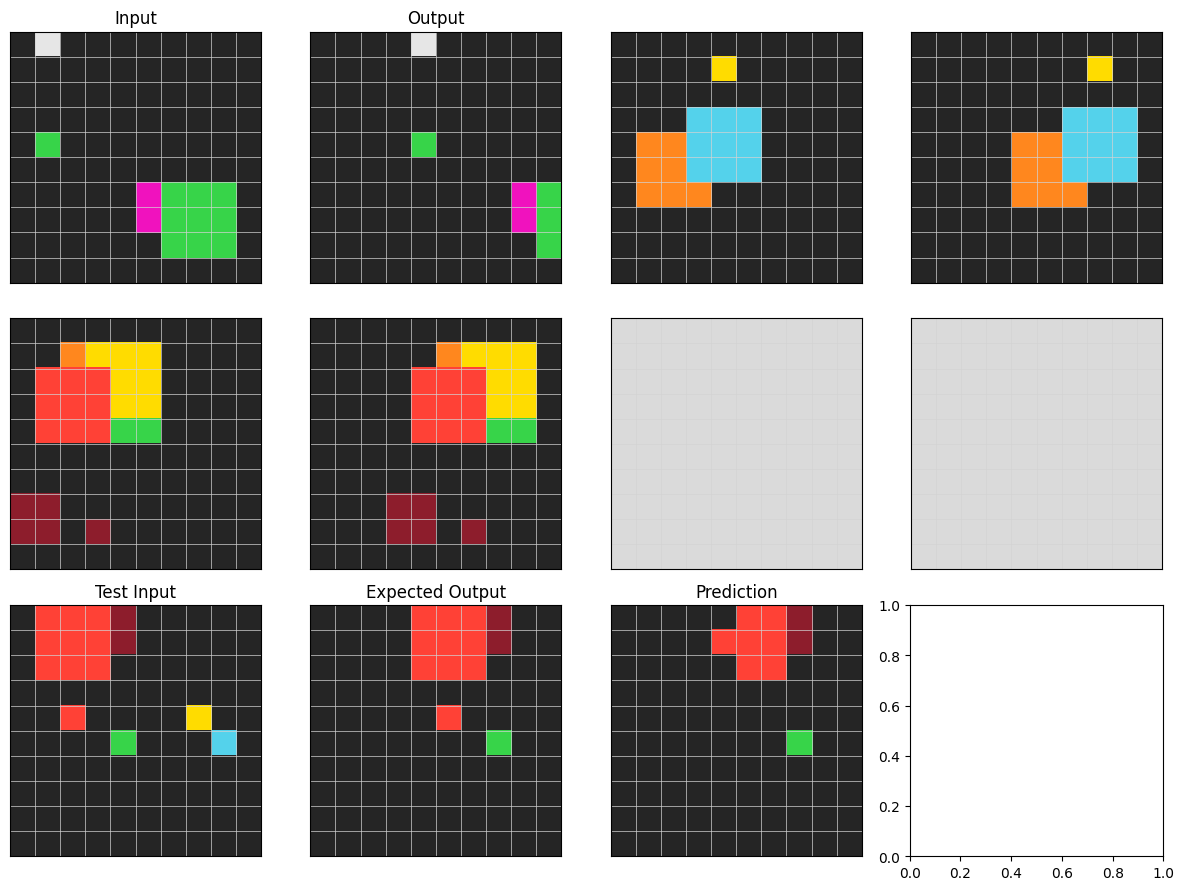

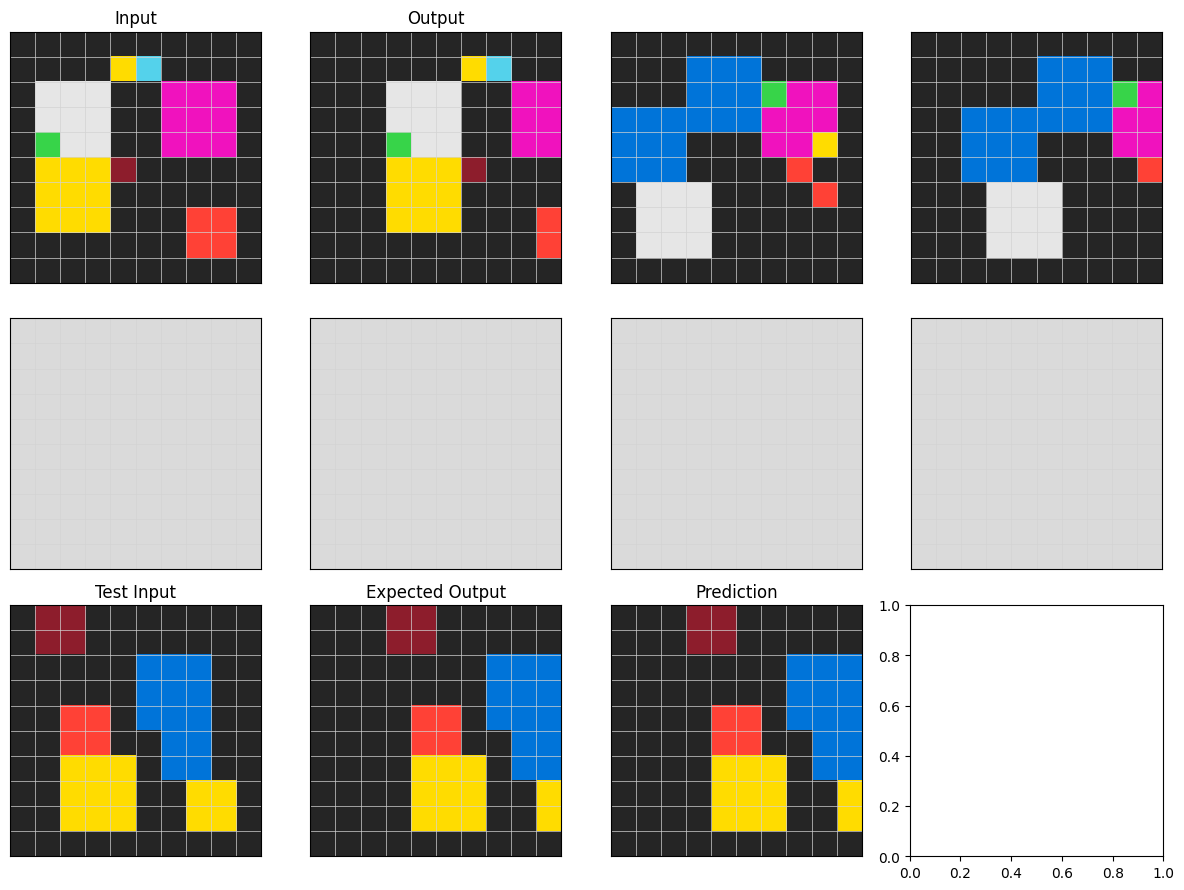

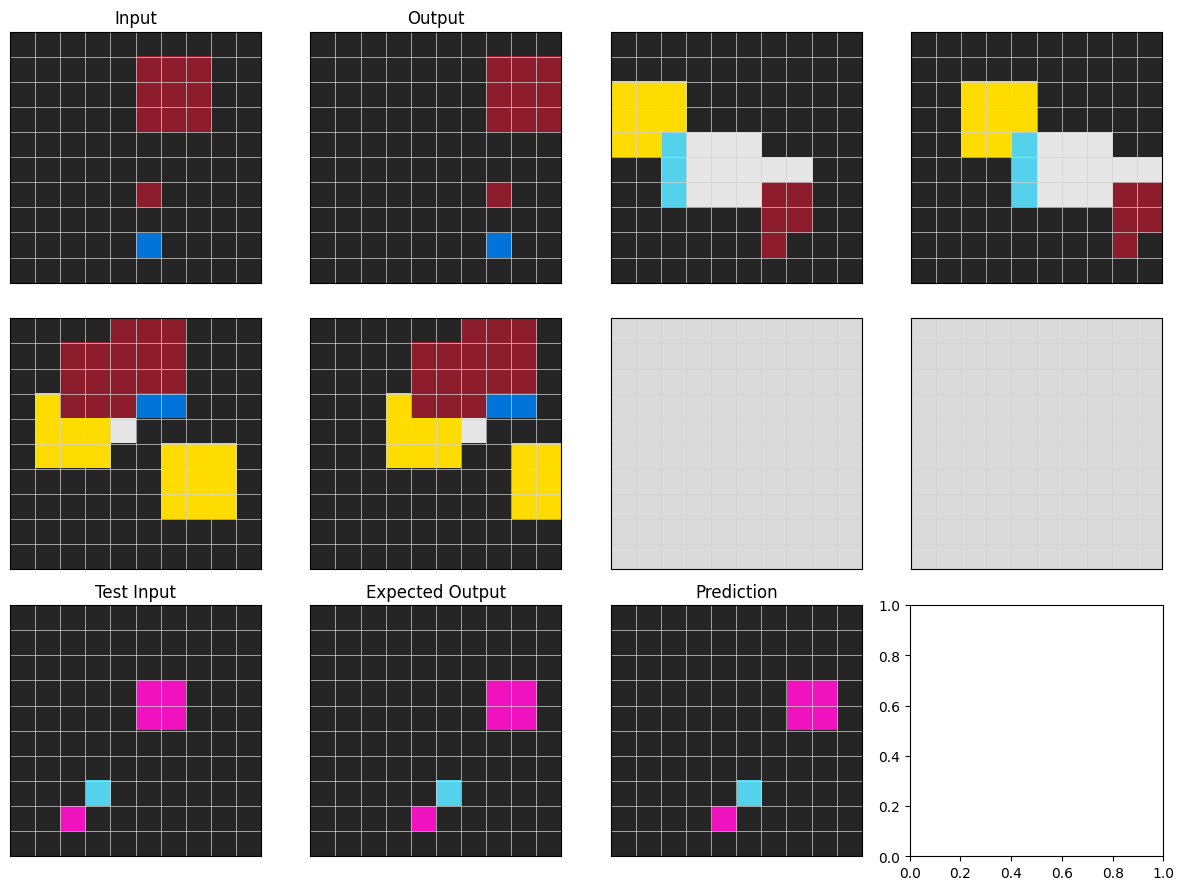

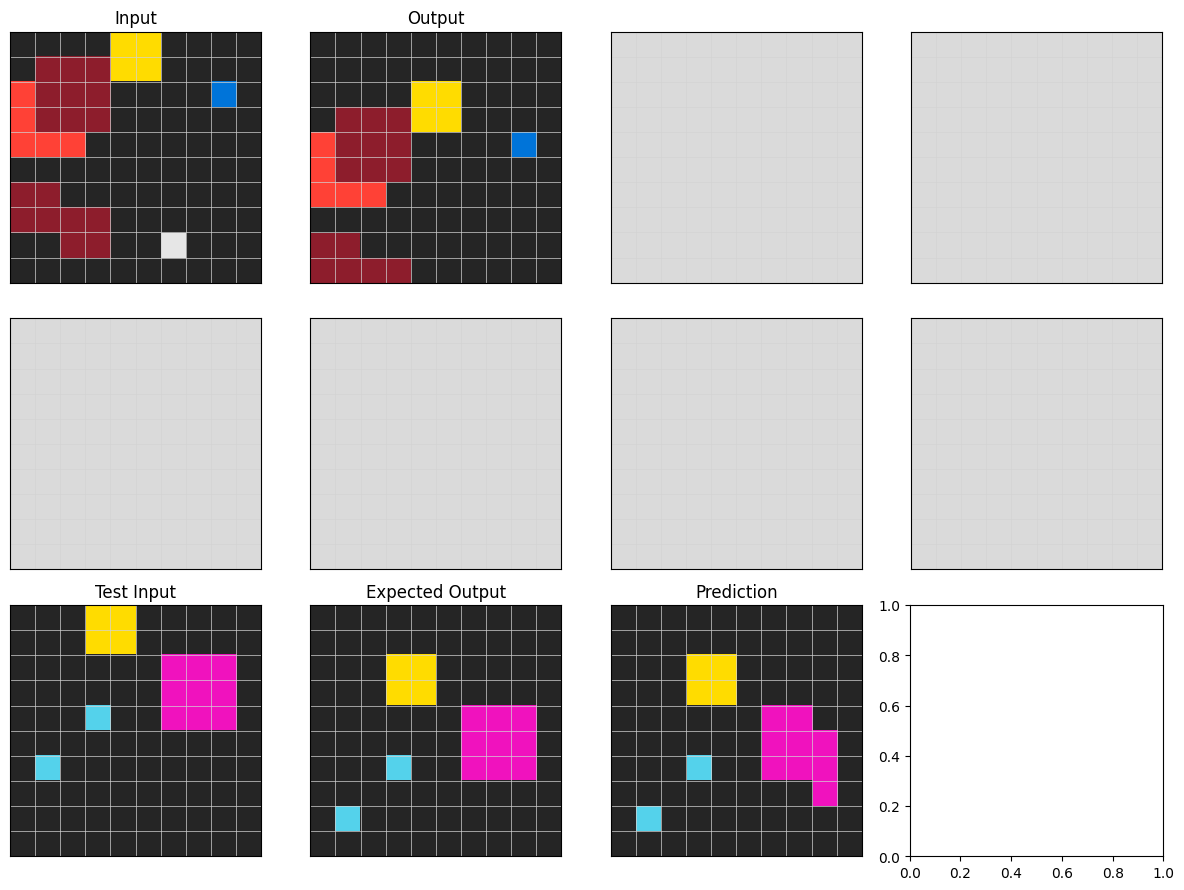

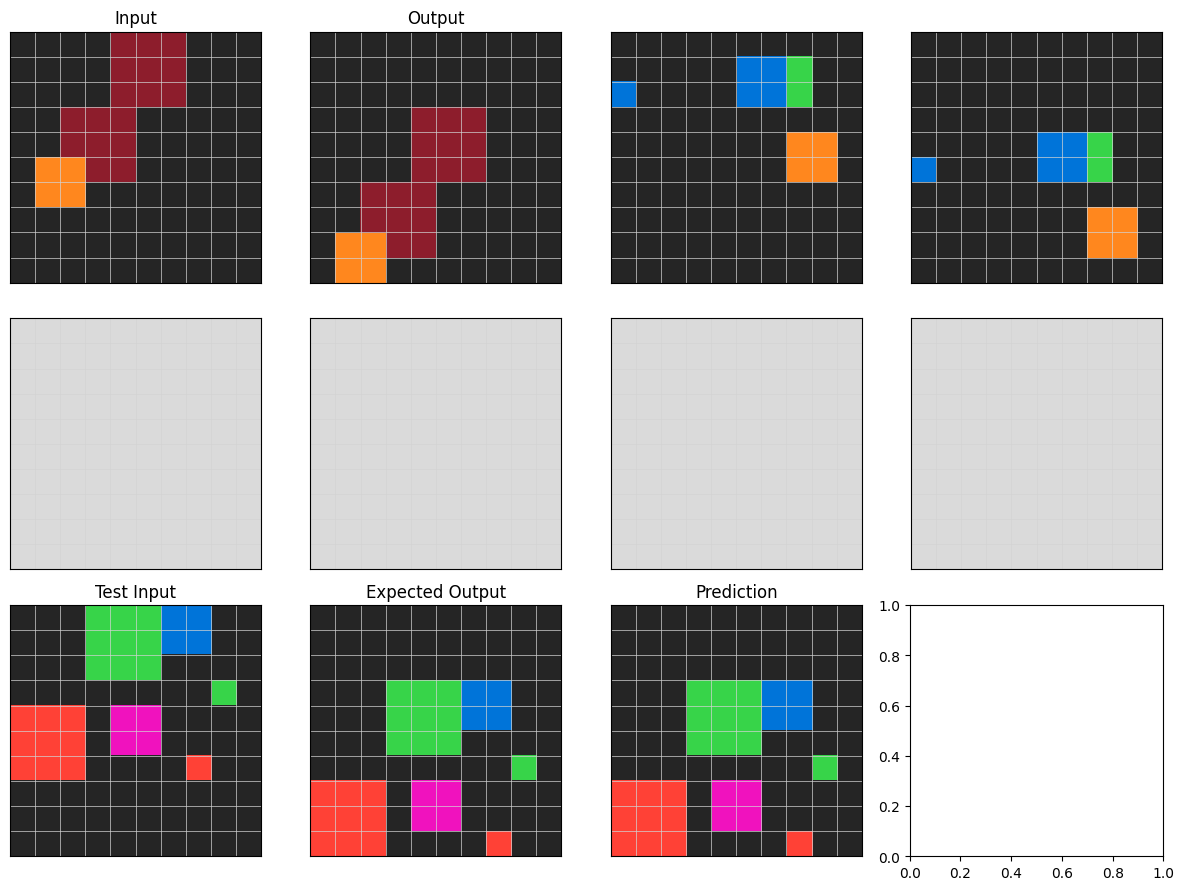

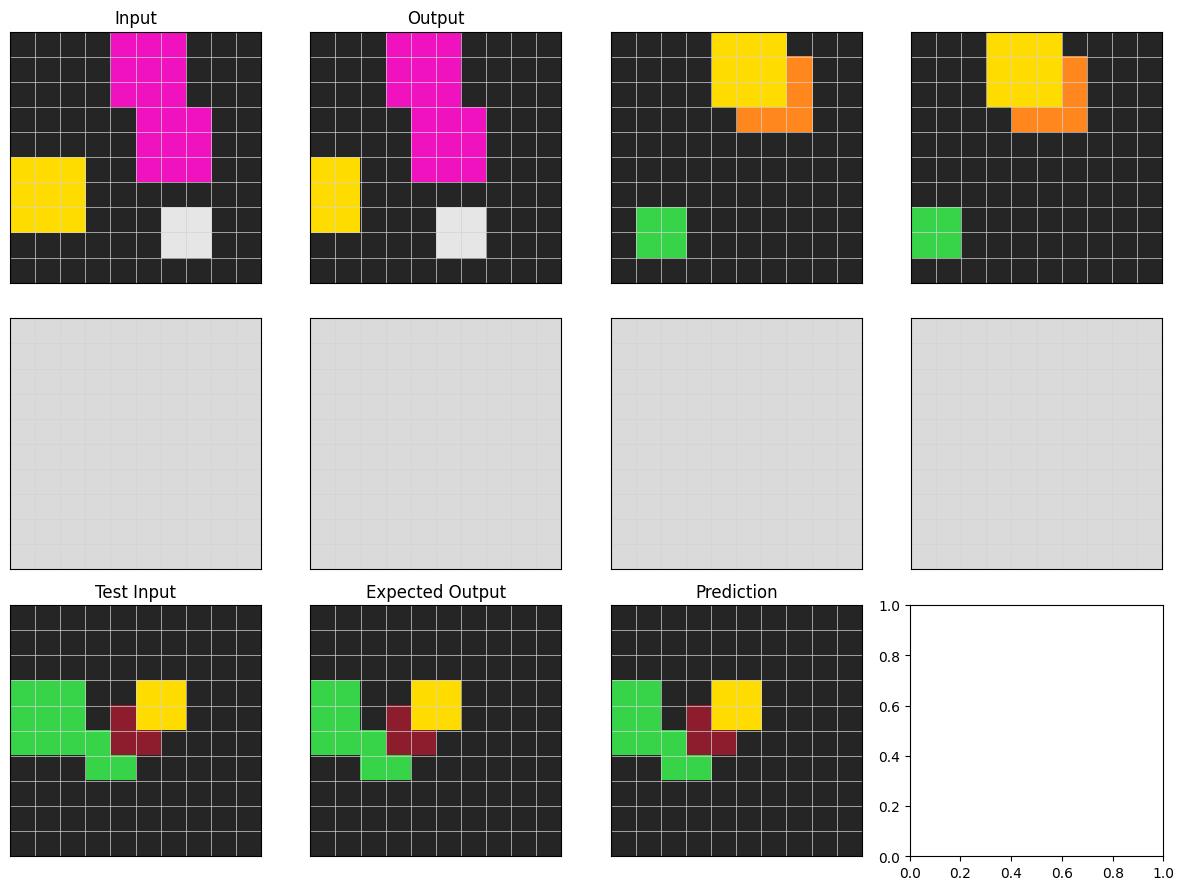

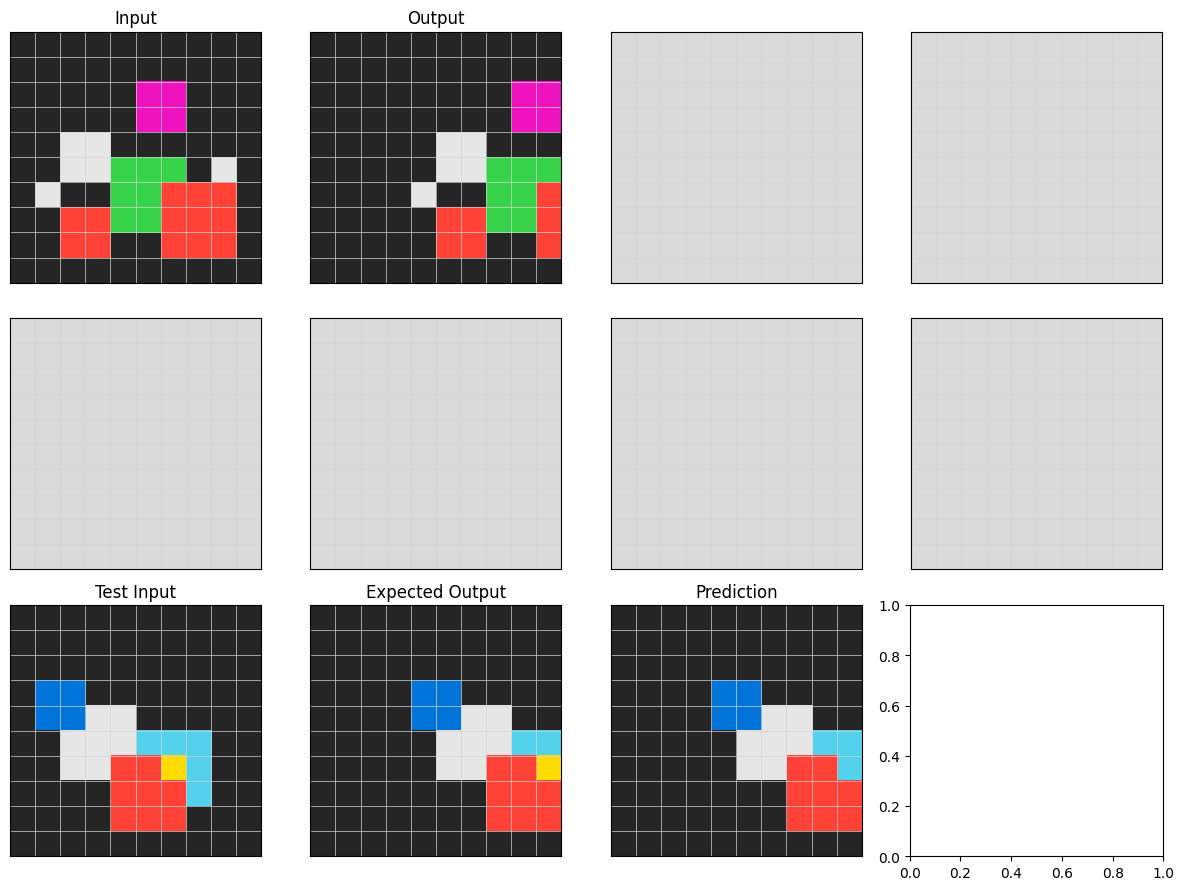

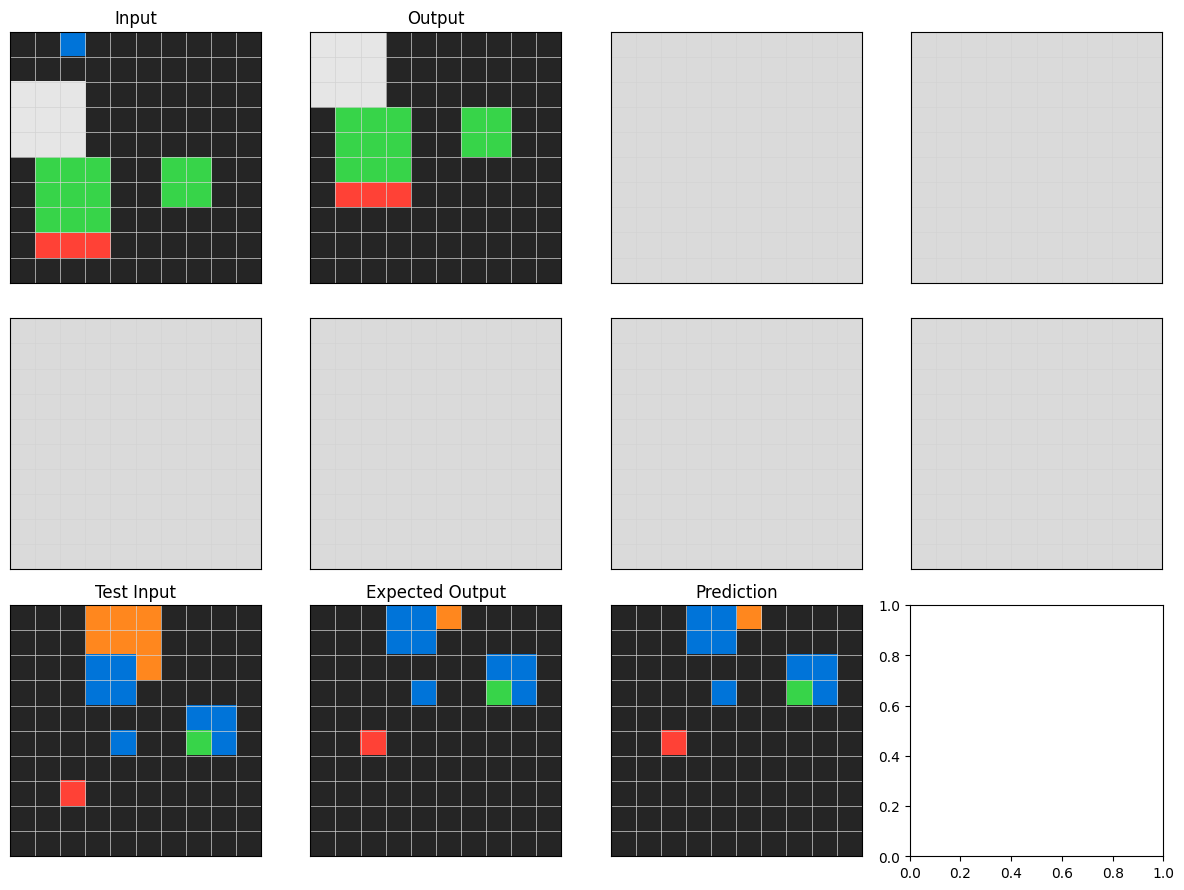

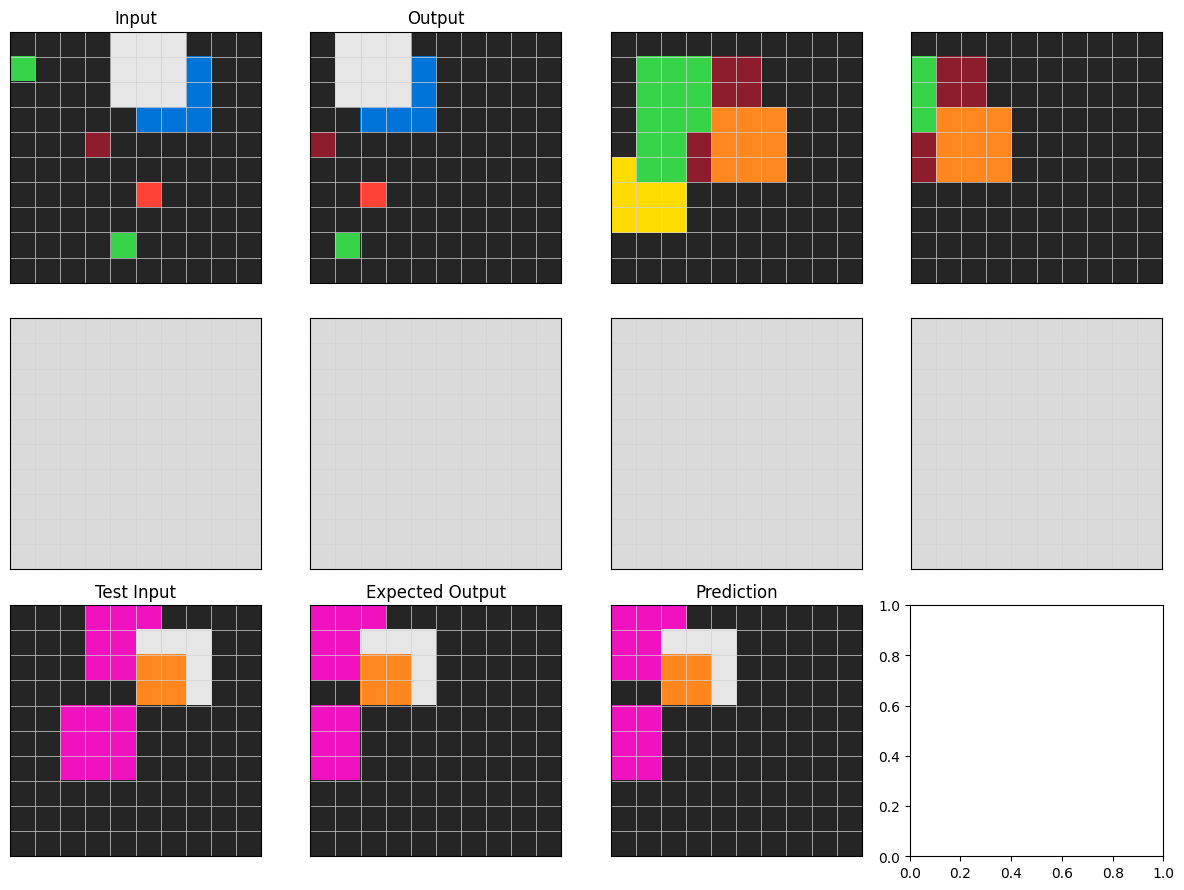

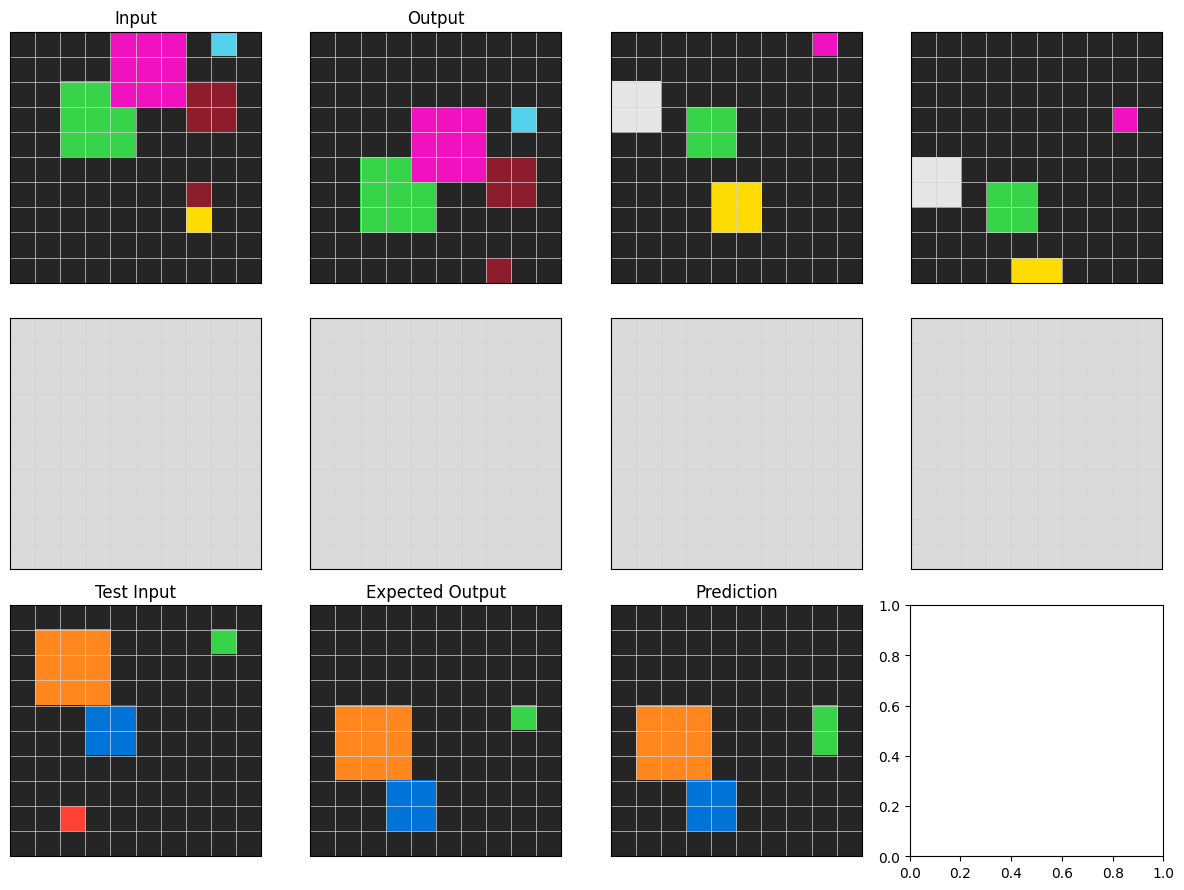

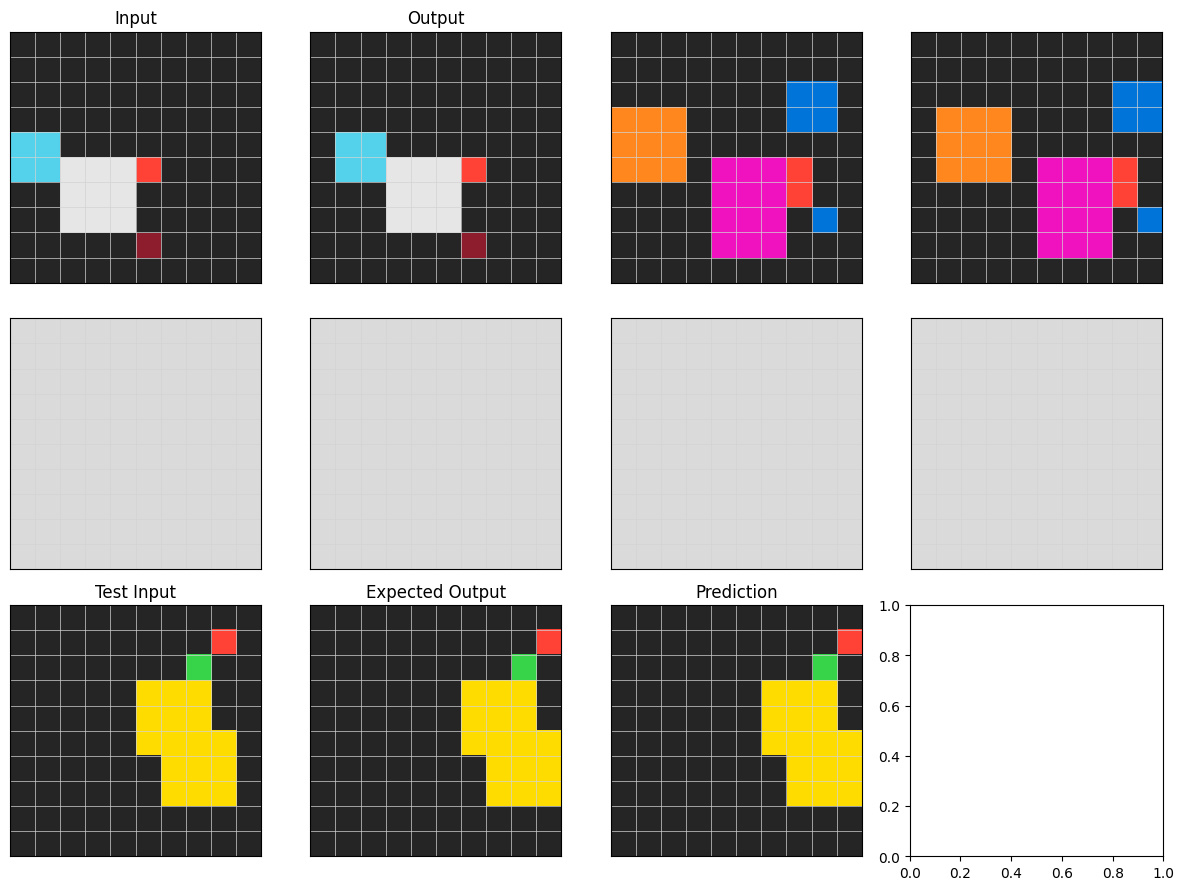

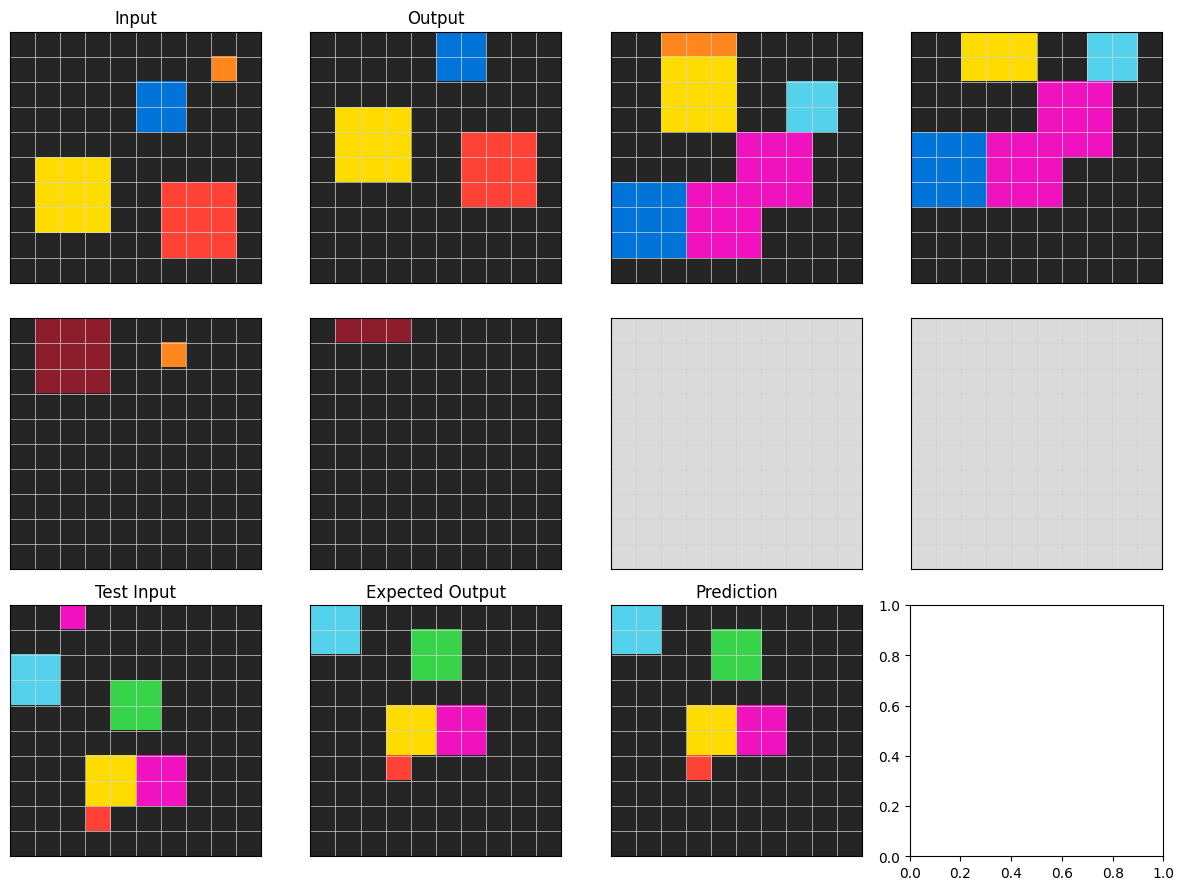

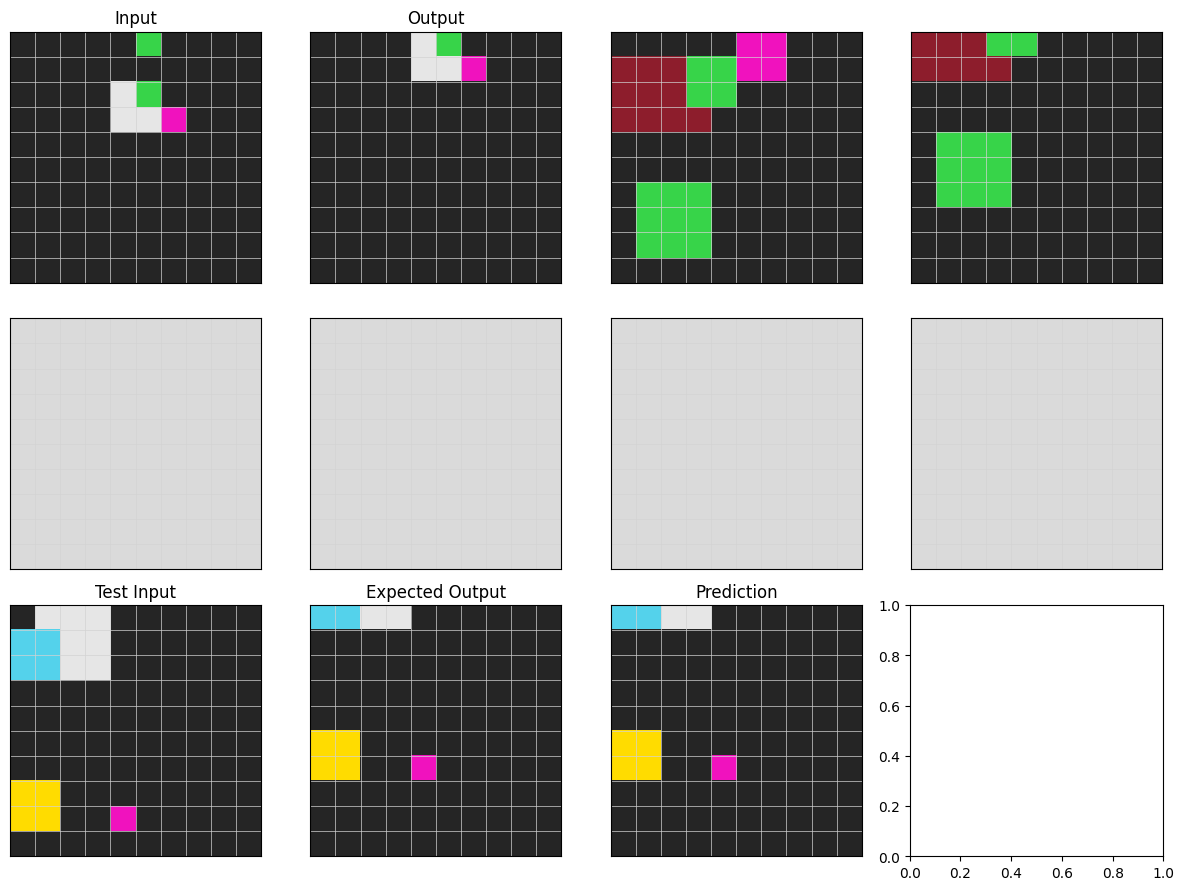

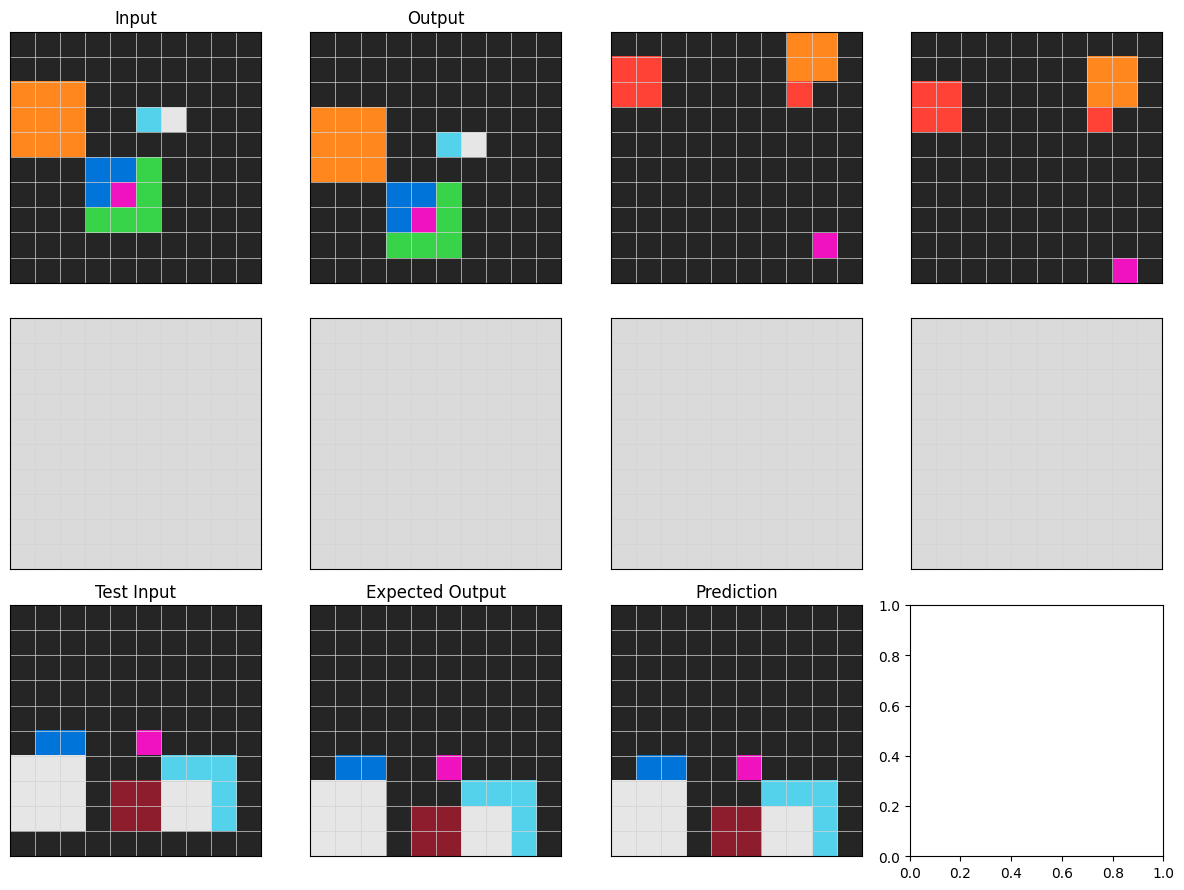

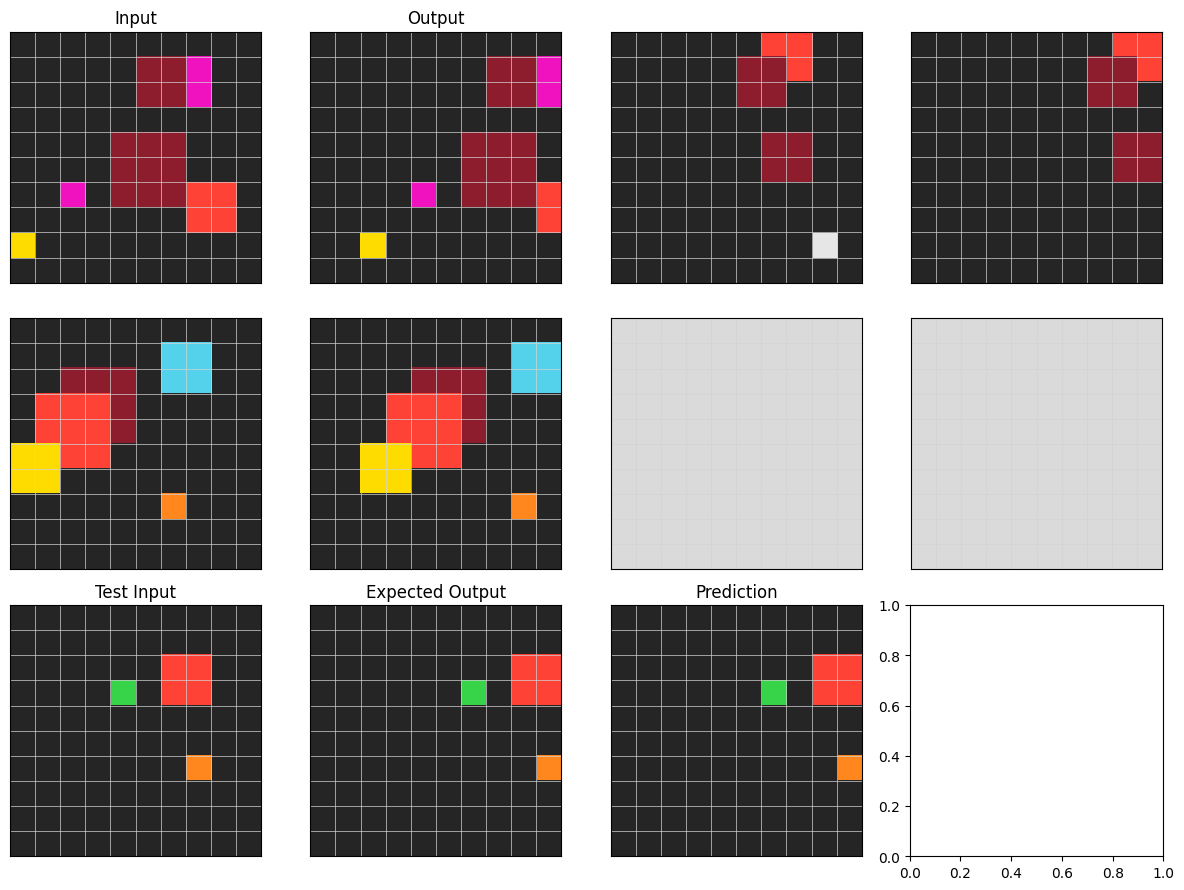

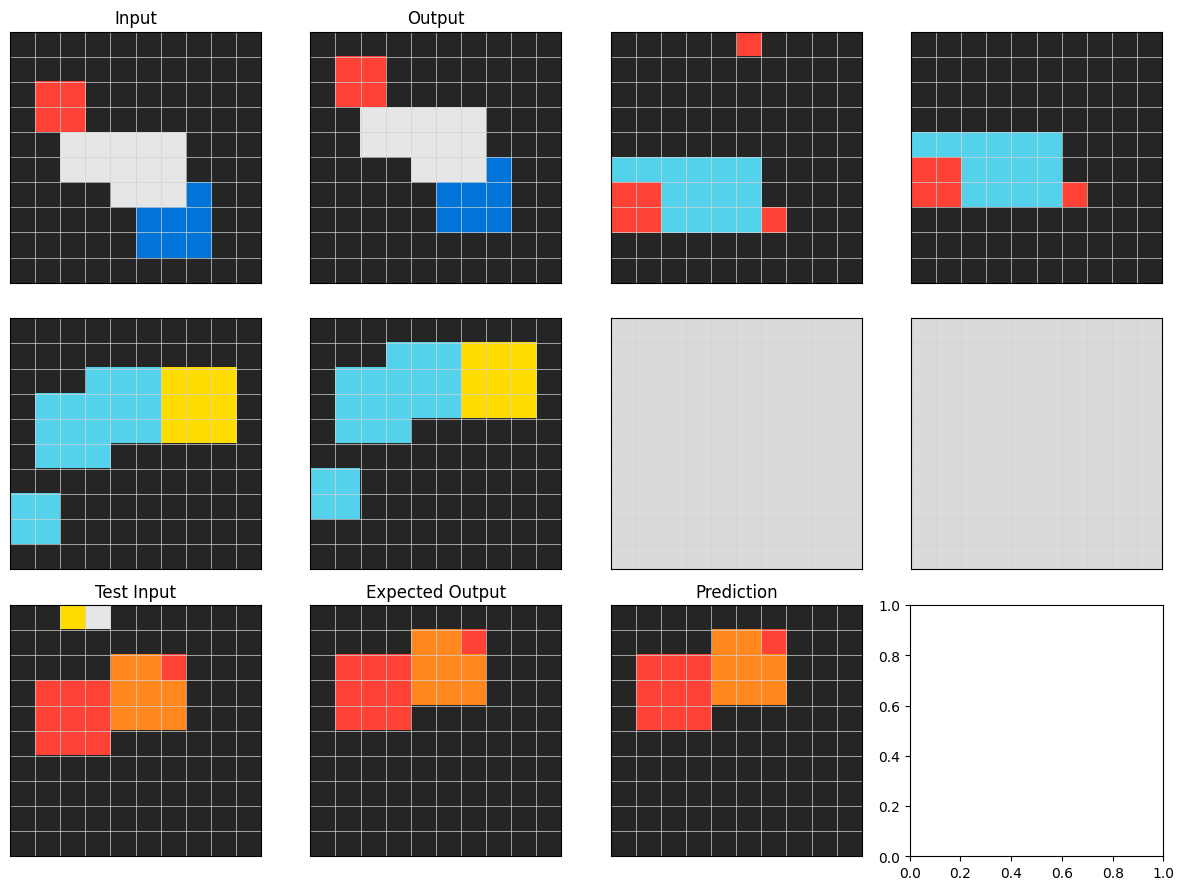

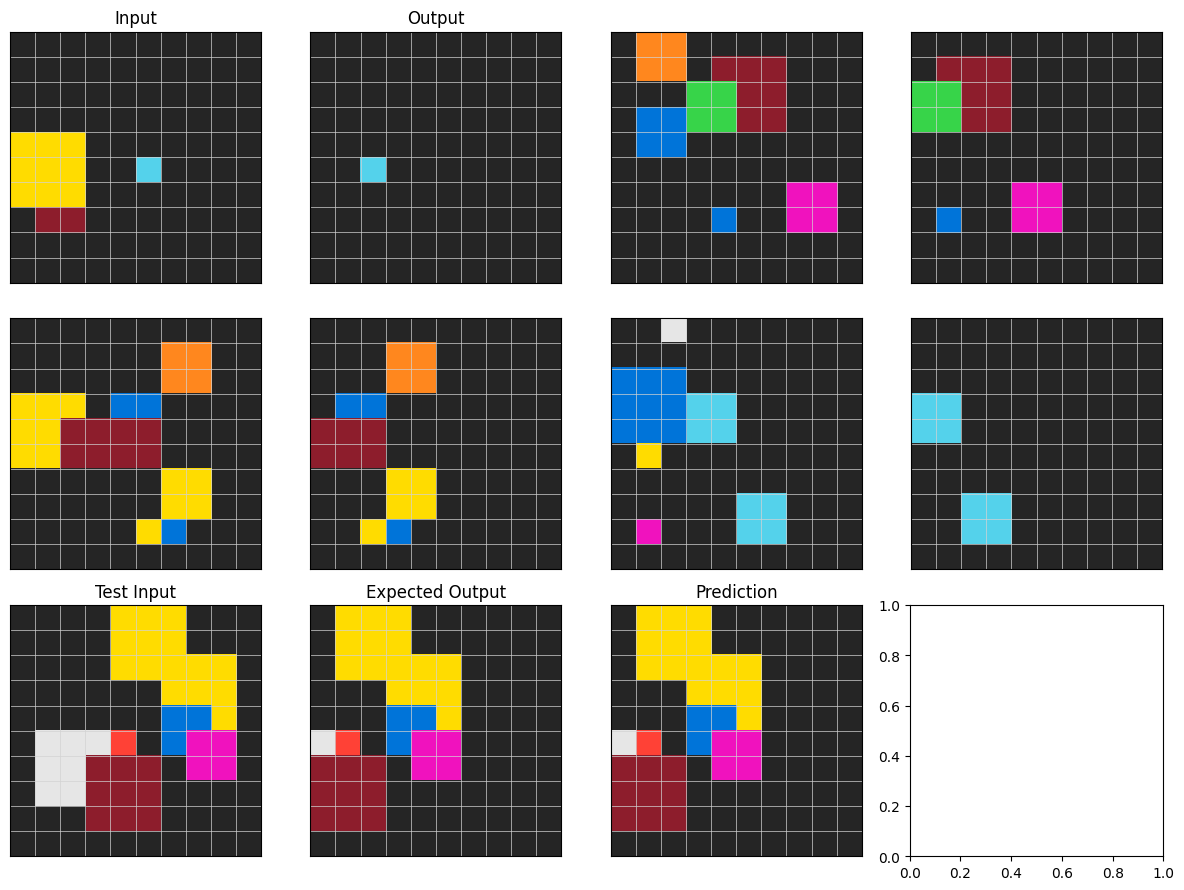

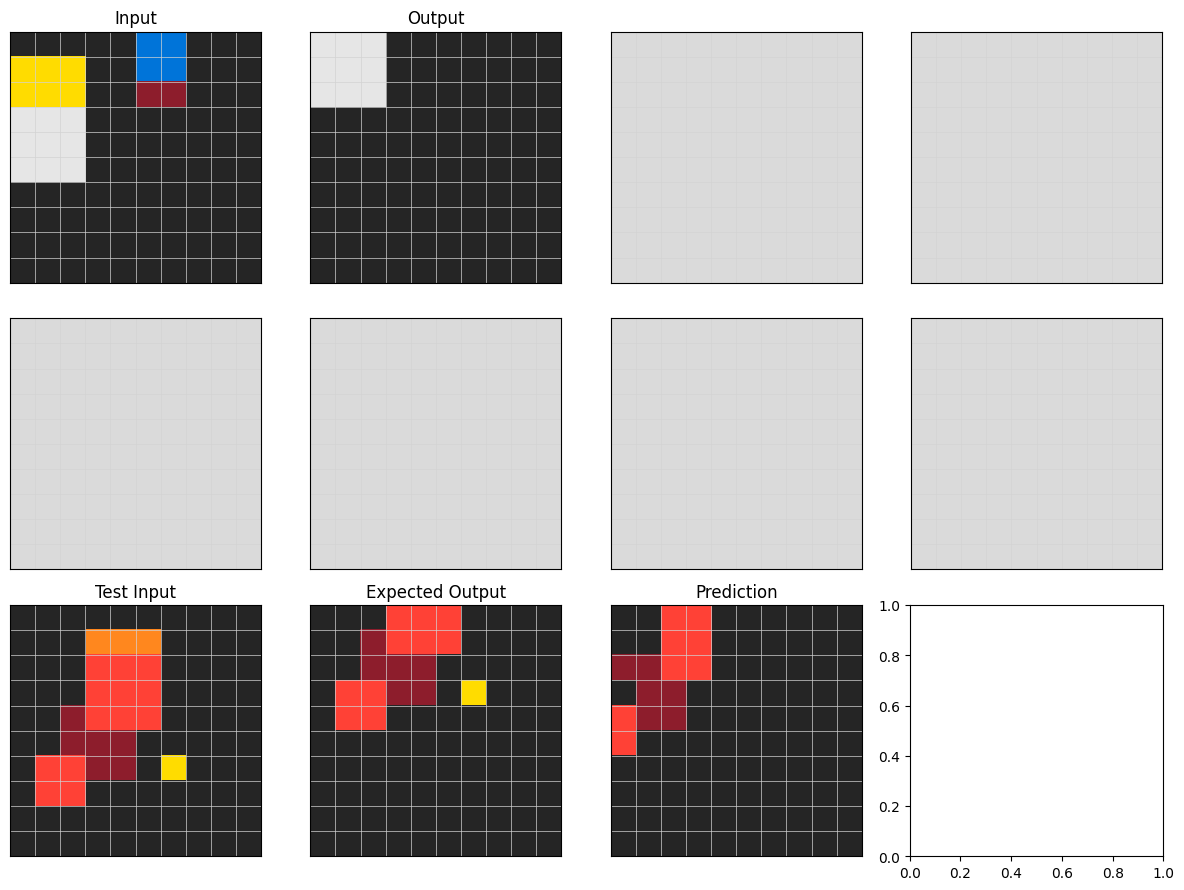

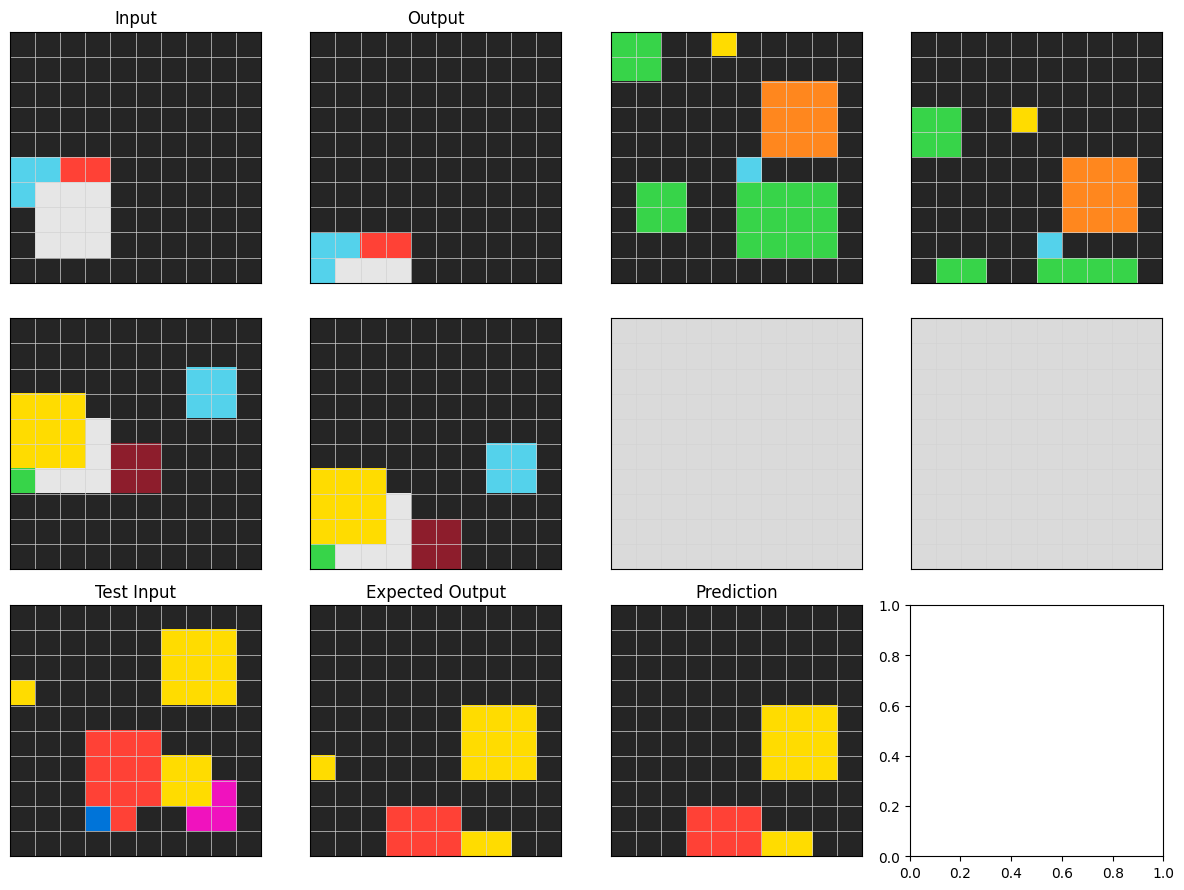

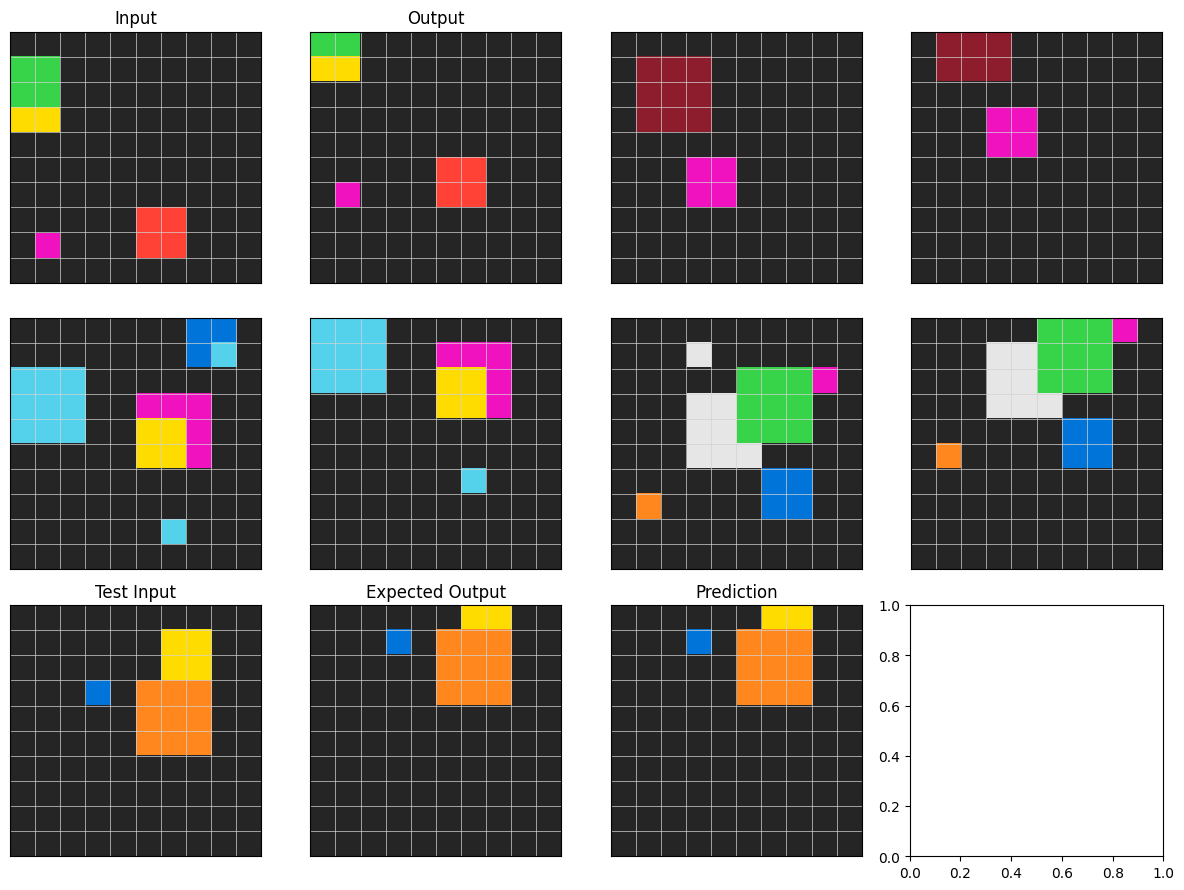

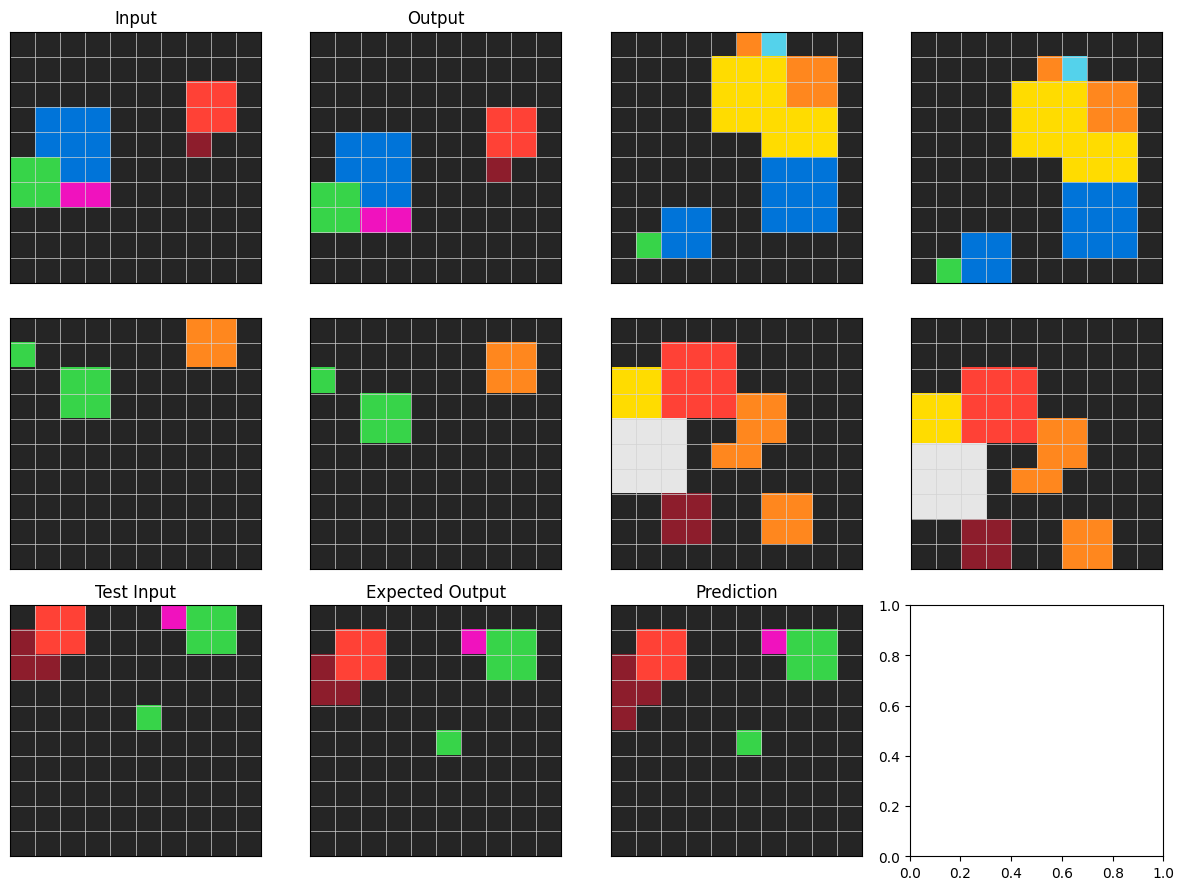

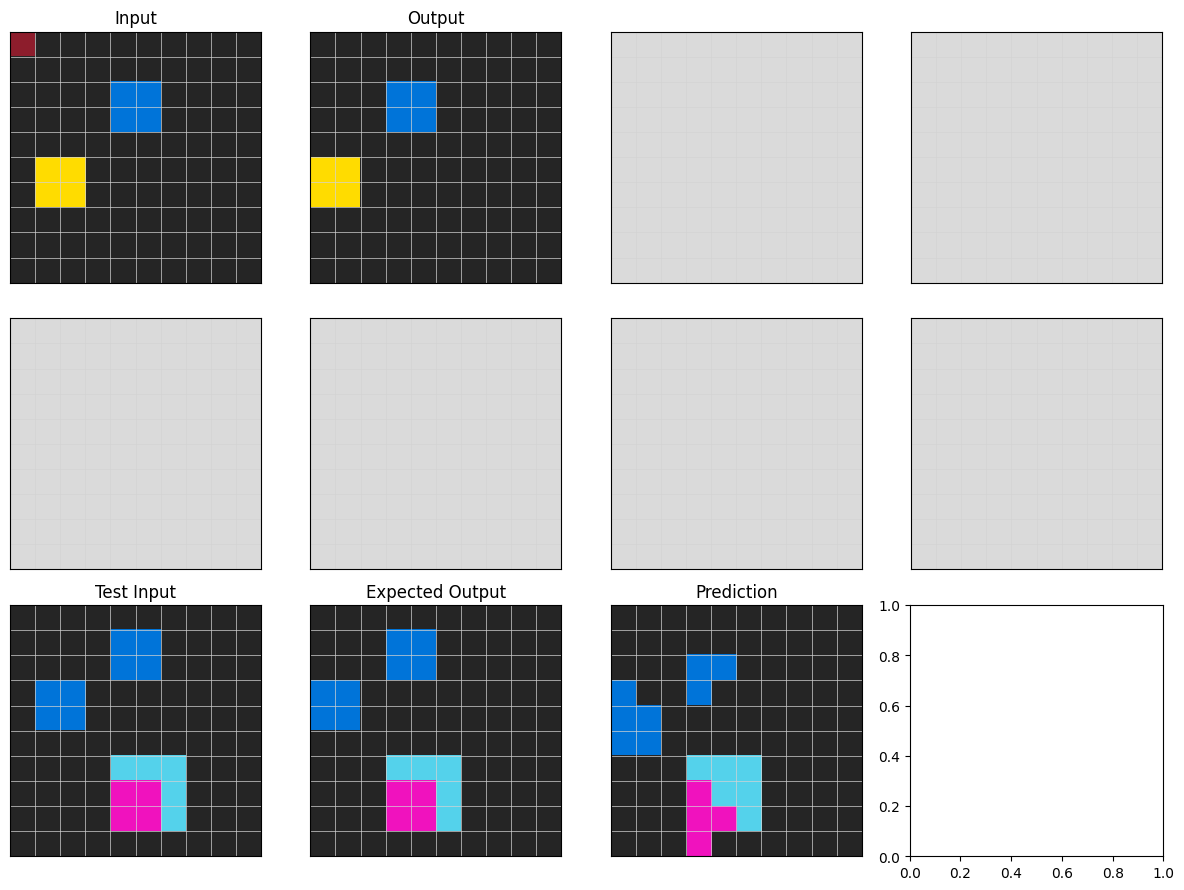

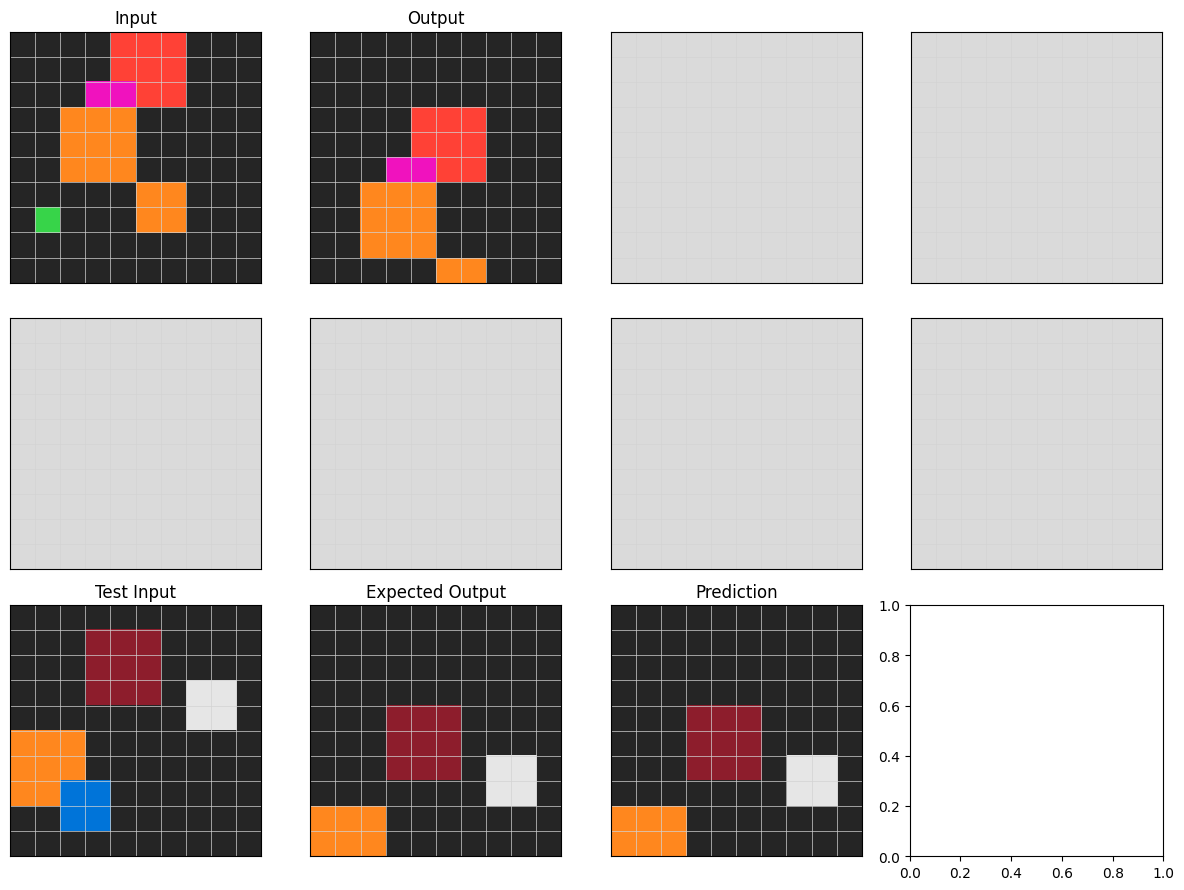

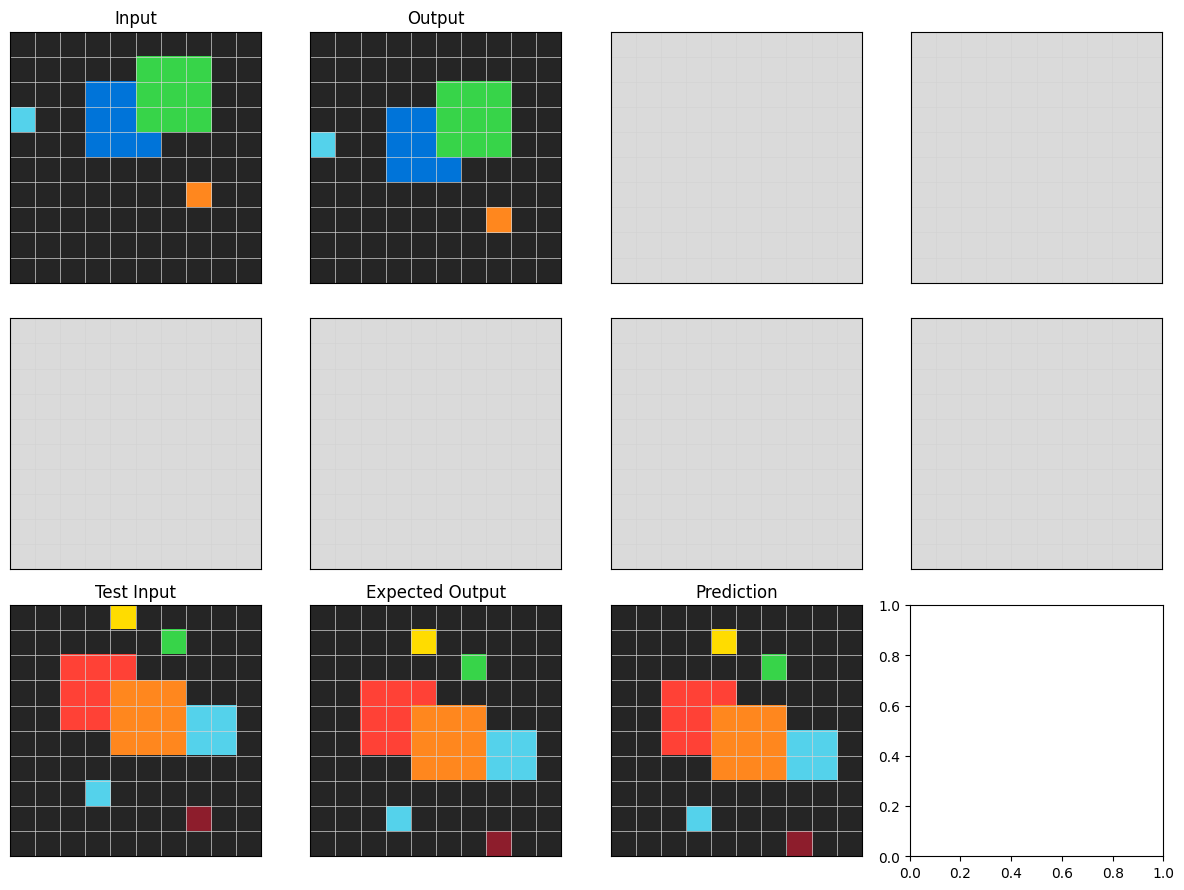

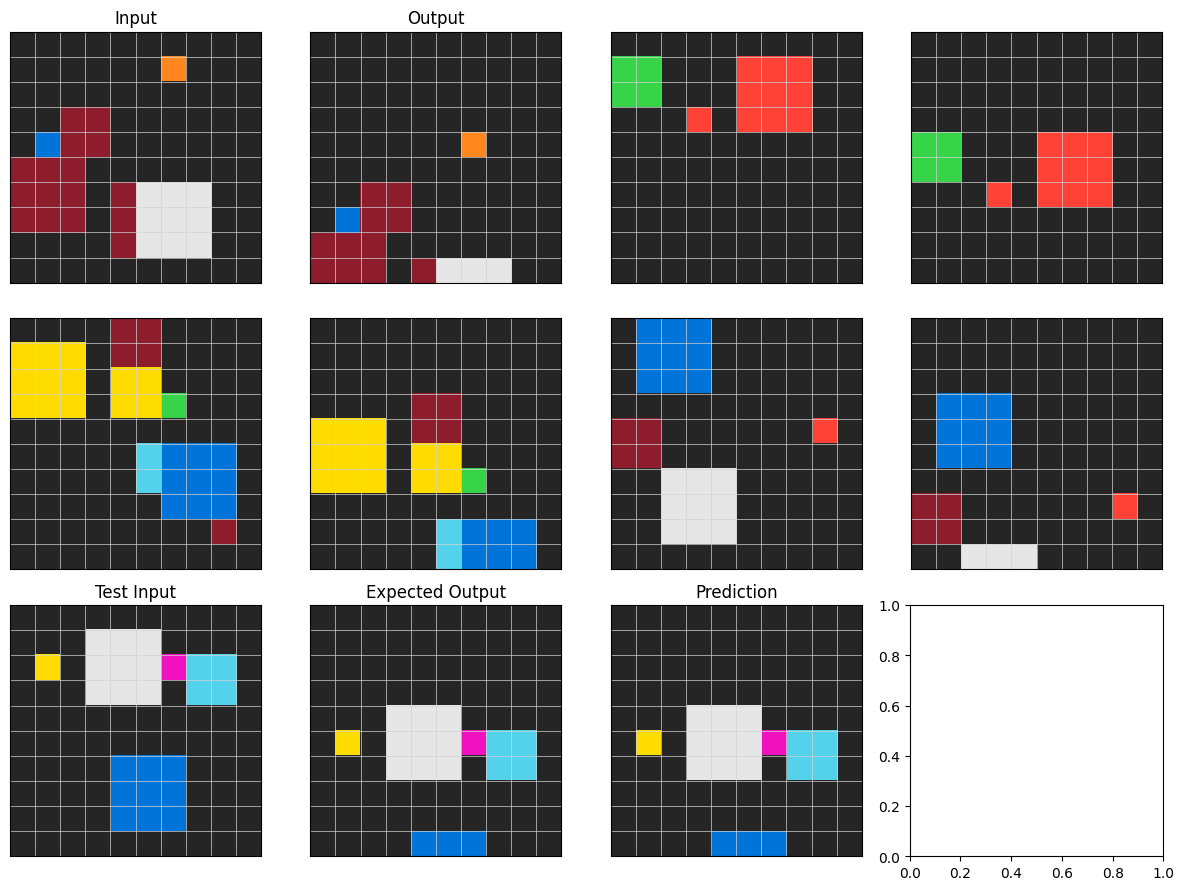

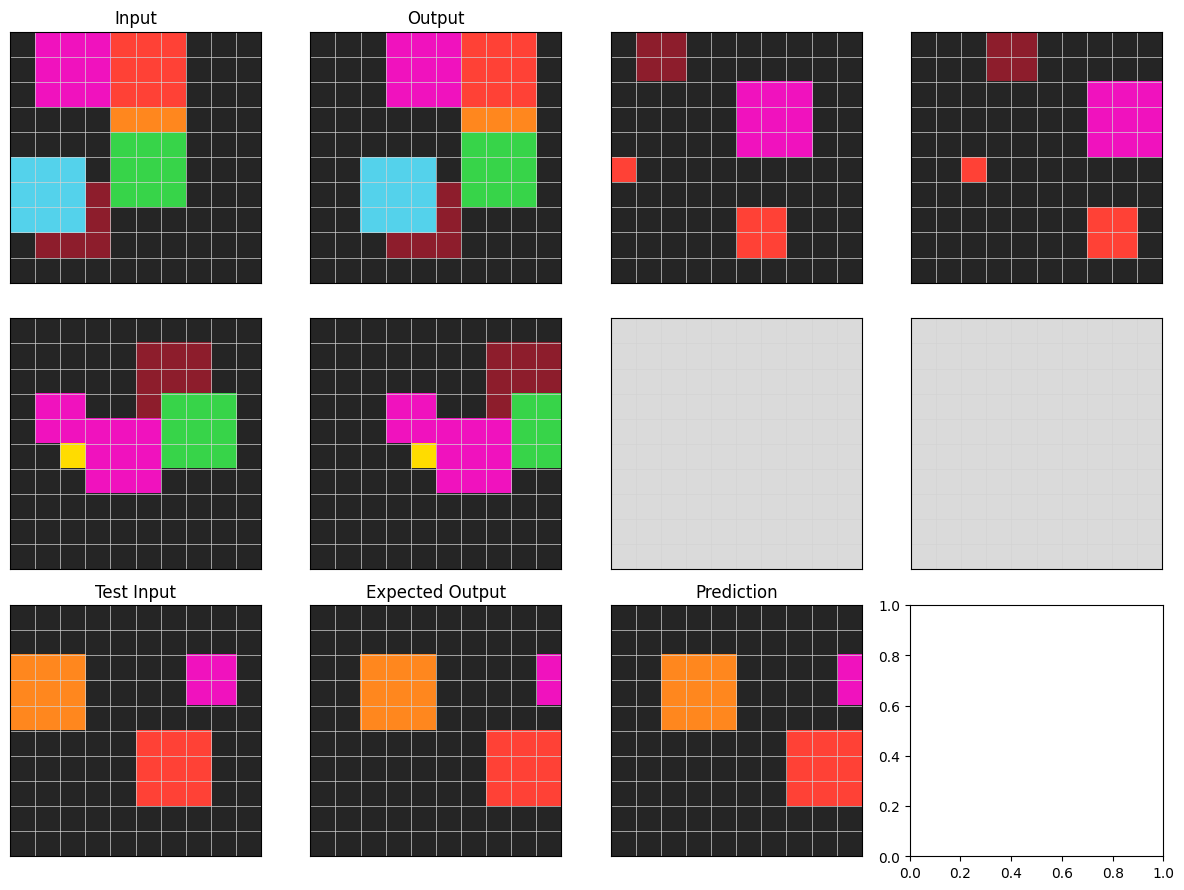

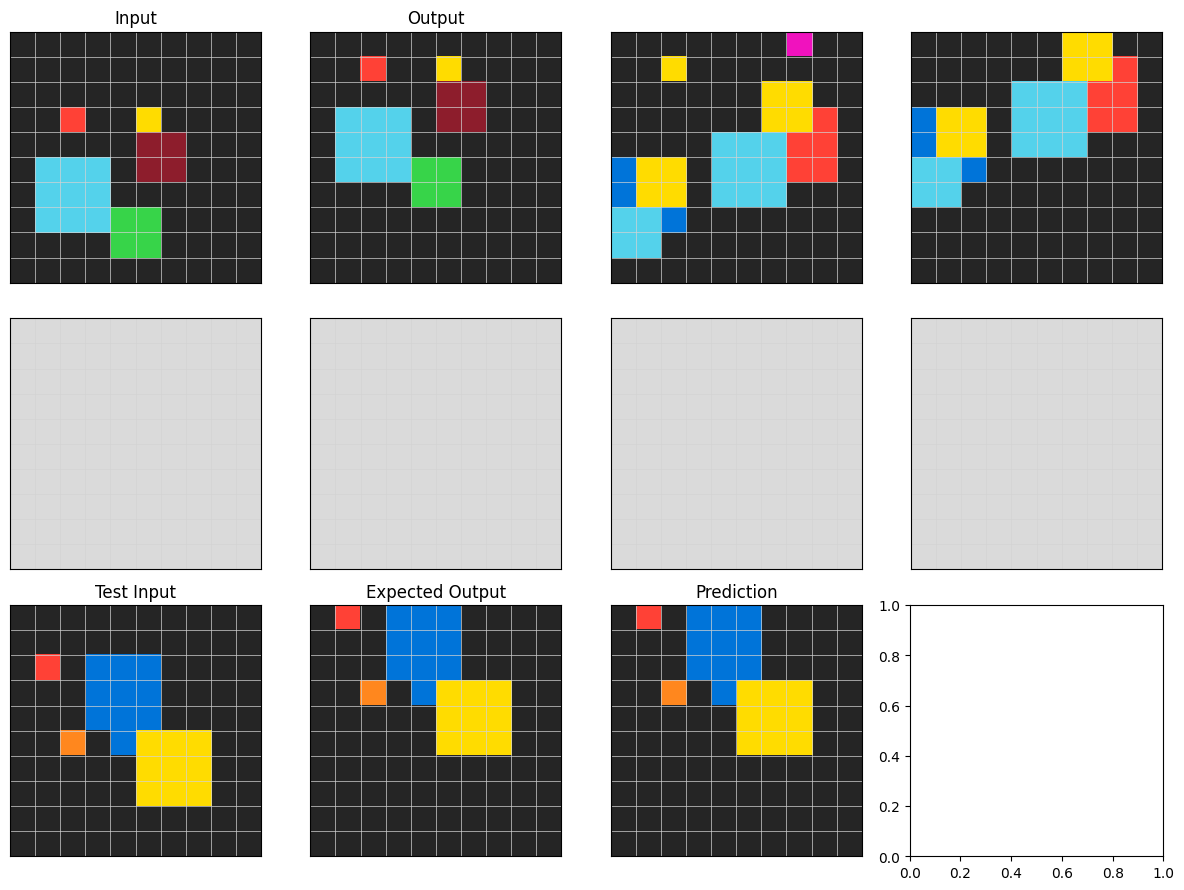

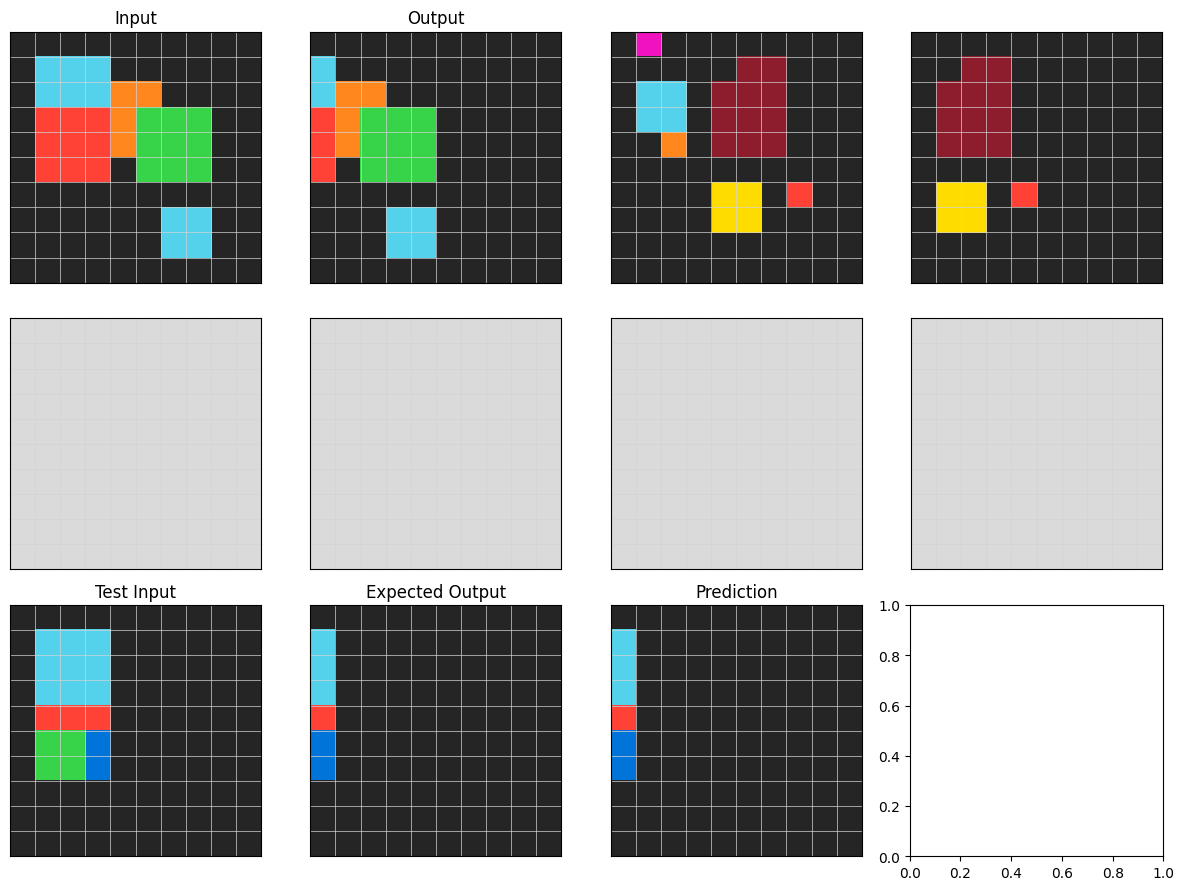

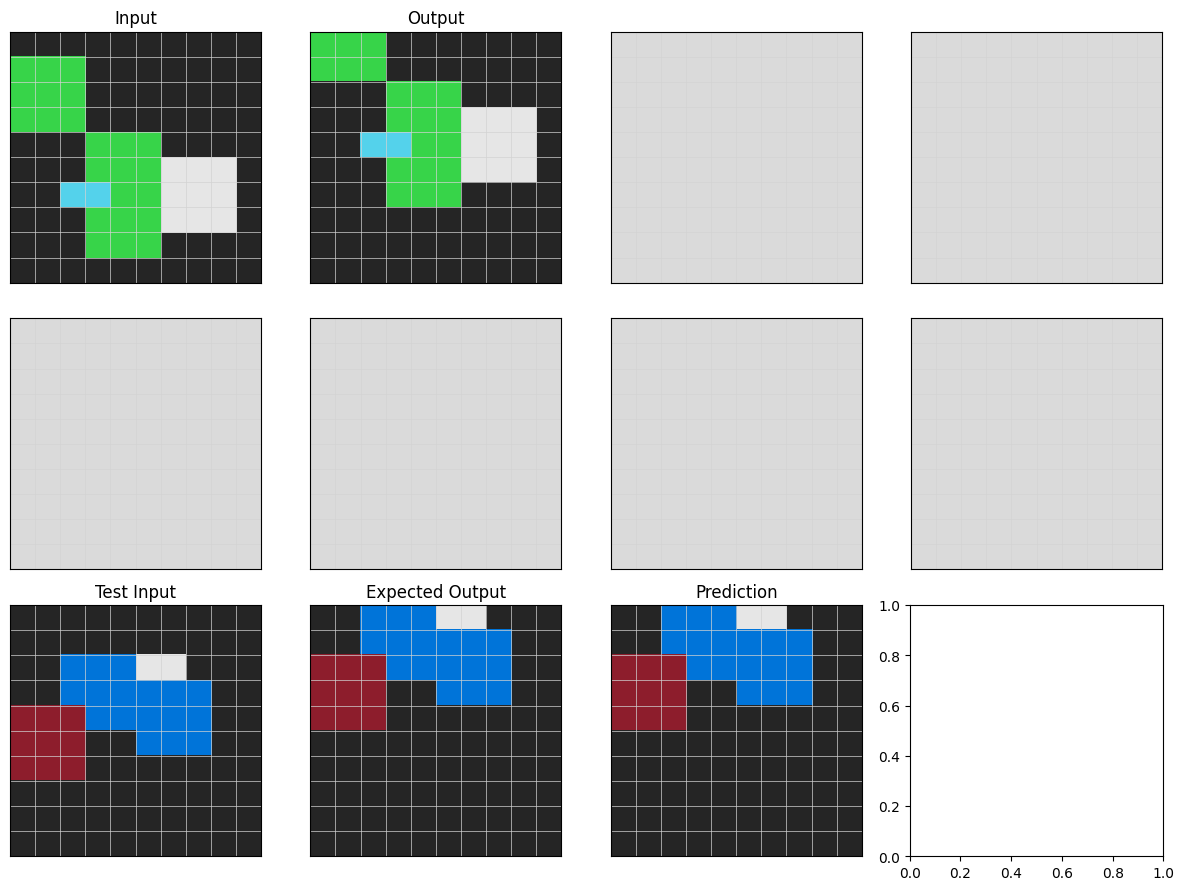

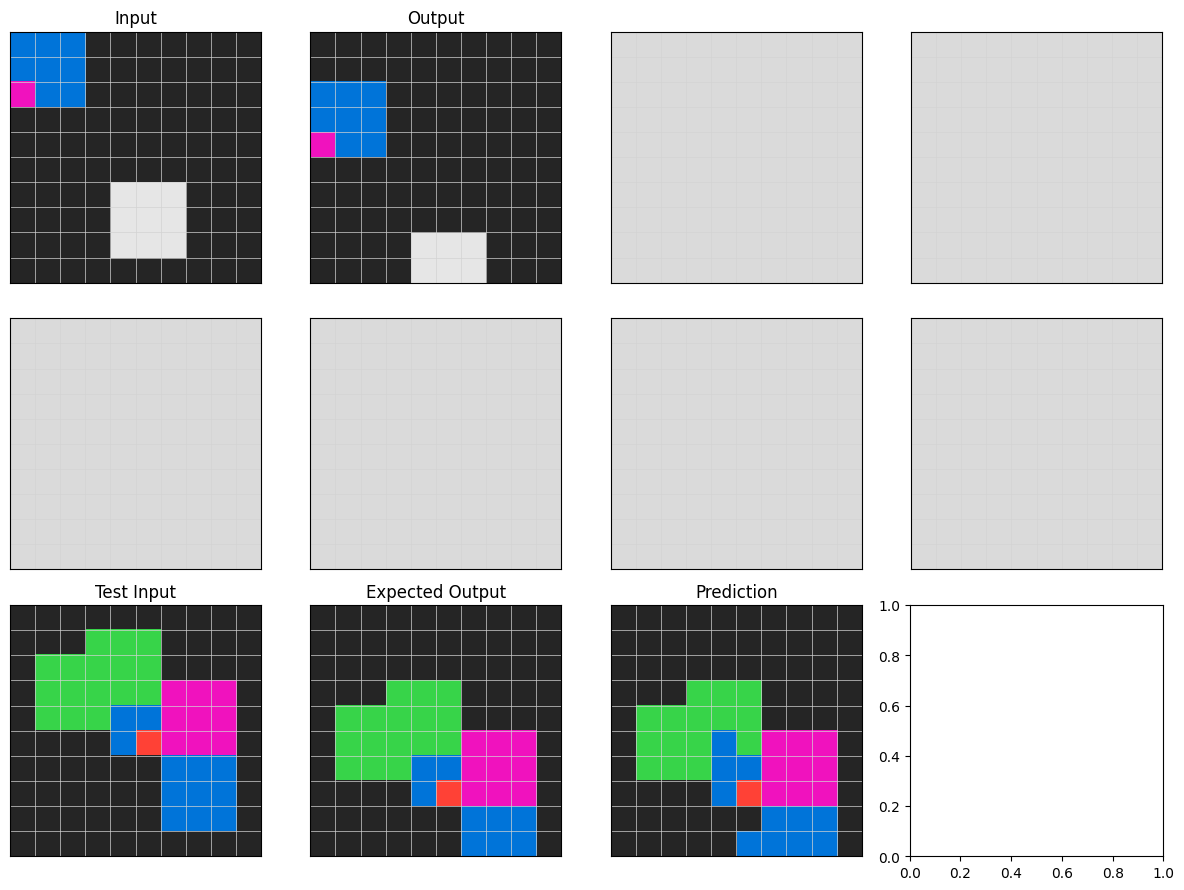

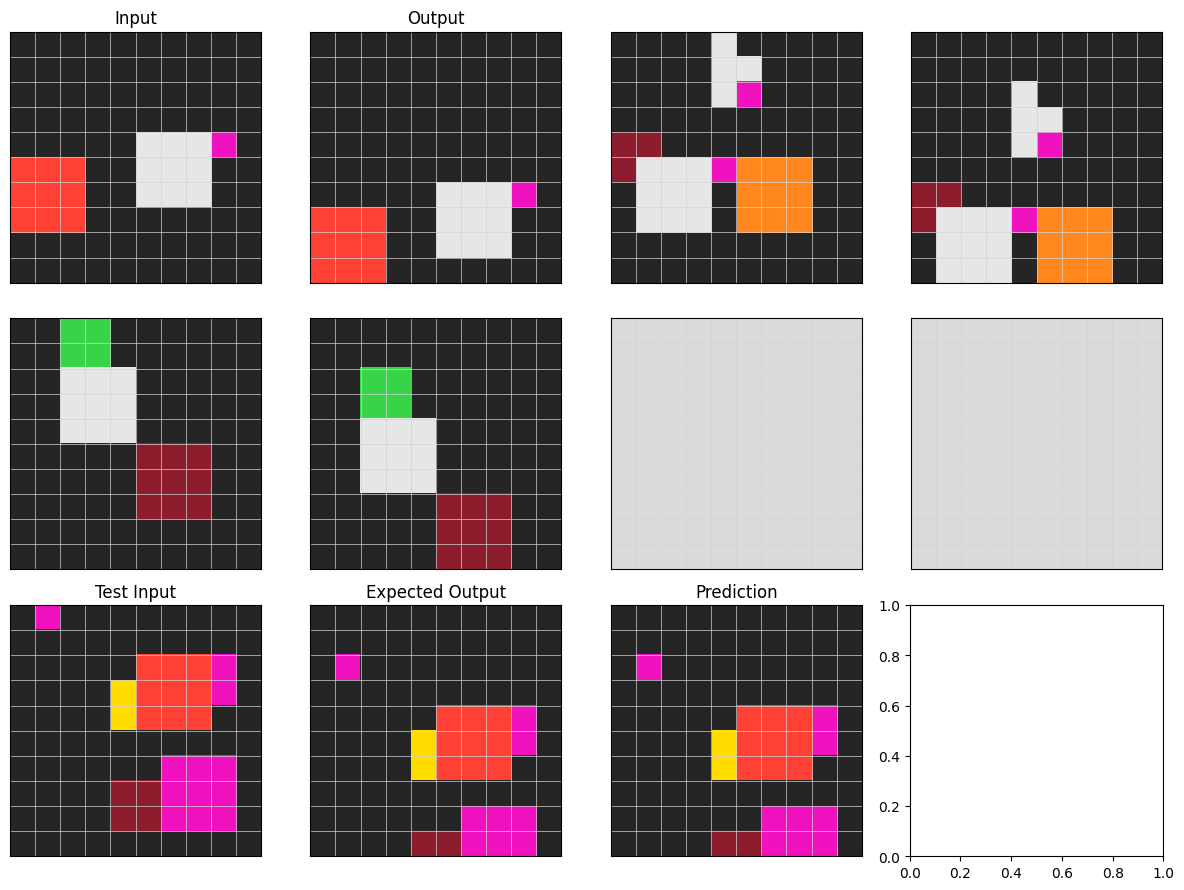

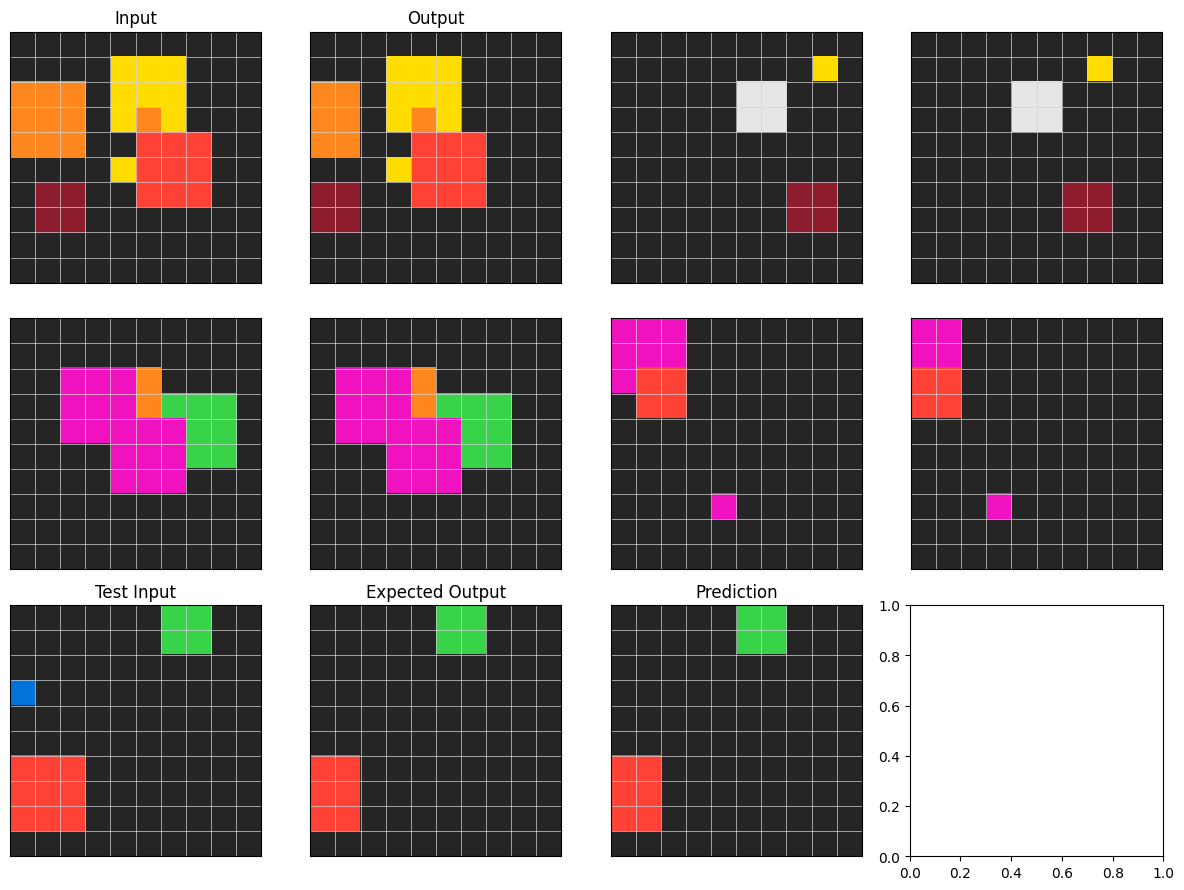

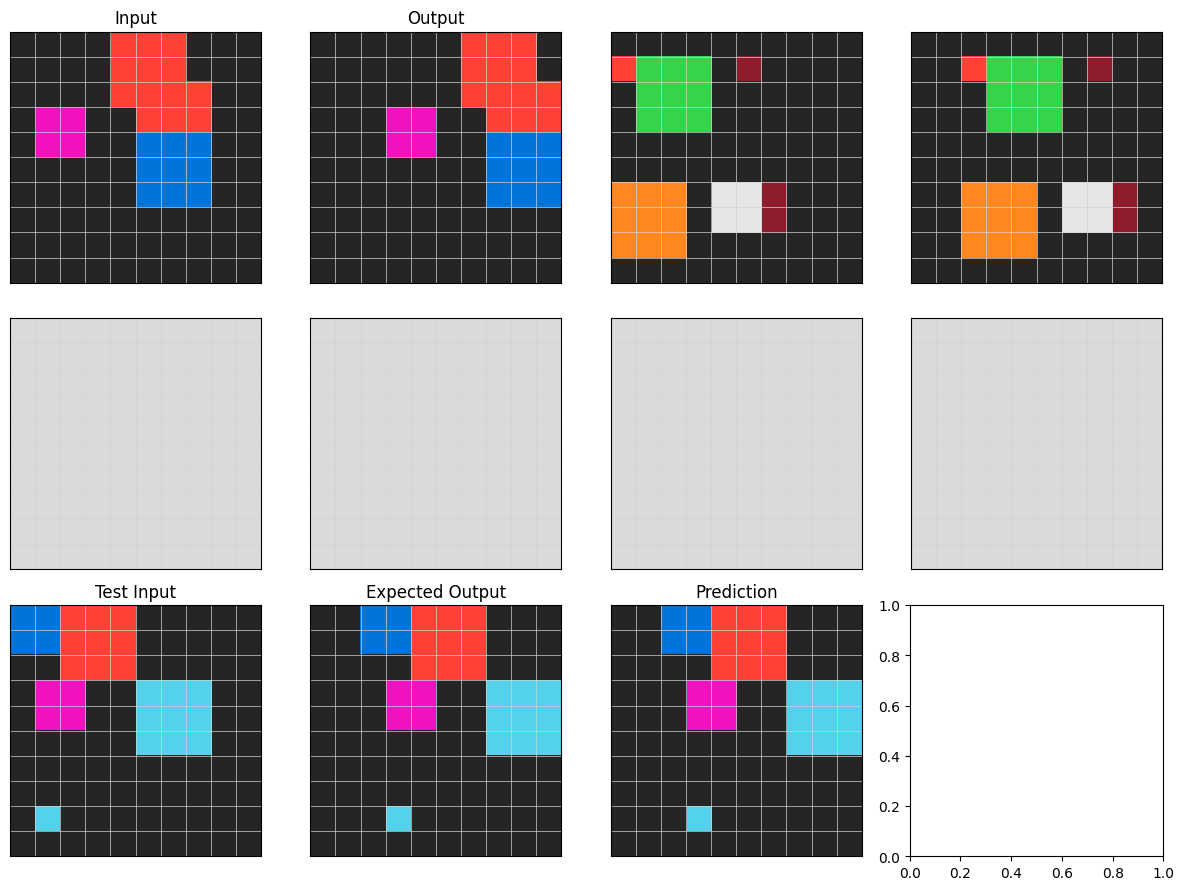

In [11]:
from arc_prize.vis import visualize_tensors


eval_model = modal.Function.lookup("arc-prize", "evaluate_model")
output = eval_model.remote("deadly_crack_alien", ["/vol/data/move_many_random"])
for item in output["output"]:
  visualize_tensors(torch.Tensor(item["grids"]).squeeze(0), torch.Tensor(item["output_grid"]).squeeze(0), torch.Tensor(item["predictions"]).squeeze(0))


In [ ]:
from arc_prize.vis import visualize_output_query, visualize_tensors


# model = ARCTransformer(d_model=d_model, num_heads=num_heads, num_layers=num_layers, d_ff=dim_feedforward, grid_dim=max_grid_size, num_colors=num_colors, num_train_pairs=max_context_pairs, dropout=dropout).to(device)

model_file_name = "models/model_75i3sirg.pth"
if model_file_name is not None:
    state_dict = torch.load(model_file_name, map_location=device)
    model.load_state_dict(state_dict)

model.eval()
eval_loader = DataLoader(val_dataset, batch_size=1, shuffle=True, collate_fn=collate_arc_fn, num_workers=0)
# batch = next(iter(eval_loader))

# visualize_output_query(model.output_query)


for i, batch in enumerate(eval_loader):
    grids, grid_masks, output_grid = [item.to(device) for item in batch]

    predictions = model.generate(grids, grid_masks)
    print(predictions.shape)

    visualize_tensors(grids.squeeze(0), output_grid.squeeze(0), predictions.squeeze(0))

